## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import train_test
import friedman3Dataset
import network
import dataset
import matplotlib.pyplot as plt
import sanityChecks
import performanceMetrics
import torch 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error 
import scrapbook as sb
from statistics import mean
import numpy as np
from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.tab_model import TabNetRegressor

## Dataset

In [3]:
#Dataset Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [4]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)

          X1           X2        X3         X4         Y
0  95.528601   354.123415  0.740022   4.593874  1.248143
1  72.198282   526.987067  0.016304   4.500364  0.217827
2  68.380665  1121.427697  0.166939   6.903453  1.135567
3  96.664362  1224.154726  0.500441  10.222341  1.423768
4  21.298330   412.262186  0.669841   1.584406  1.404574


## Parameters 

In [5]:
n_epochs = 1000
batch_size = 32
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## GAN Model

**Training GAN for n_epochs number of epochs** 

In [6]:
generator = network.GeneratorTabnet(n_features+1).to(device)
discriminator = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(generator.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(discriminator.parameters(), lr=0.001, betas=(0.5, 0.999))

In [7]:
discLossG1,genLossG1 = train_test.training_GAN(discriminator,generator,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,device)


tensor([[-0.1739],
        [-0.0945],
        [-0.8687],
        [-0.5796],
        [ 0.1587],
        [ 0.4502],
        [ 0.0599],
        [-0.2748],
        [-0.1910],
        [-0.3926],
        [ 0.1589],
        [-0.7219],
        [ 0.2165],
        [-0.3611],
        [-0.0893],
        [-0.1034],
        [-0.3626],
        [ 1.0543],
        [-0.3473],
        [ 0.2418],
        [ 0.4143],
        [-0.7191],
        [-0.3259],
        [-0.9563],
        [-0.2244],
        [ 0.1582],
        [ 0.5516],
        [-0.6688],
        [ 0.3598],
        [-0.4485],
        [ 1.2031],
        [ 1.2074]], grad_fn=<MmBackward>)


tensor([[ 0.9611],
        [ 0.2155],
        [-0.3297],
        [ 0.0796],
        [-0.2230],
        [ 0.4417],
        [ 0.1787],
        [-0.0032],
        [-0.2395],
        [ 0.0276],
        [ 0.4264],
        [-0.6815],
        [ 0.2412],
        [ 0.2903],
        [-0.5149],
        [ 0.0346],
        [ 0.0182],
        [ 0.2204],
        [-0.6420],
        [-0.3210],
        [-0.1199],
        [-0.0794],
        [-0.0821],
        [ 0.0046],
        [ 0.5293],
        [ 0.2032],
        [-0.9317],
        [ 0.0437],
        [ 0.3860],
        [-0.2791],
        [-2.4635],
        [ 0.7810]], grad_fn=<MmBackward>)
tensor([[-0.0887],
        [ 0.0309],
        [ 0.3197],
        [-0.3827],
        [ 0.2929],
        [-0.1682],
        [ 1.4444],
        [-0.0154],
        [ 0.3919],
        [ 0.6012],
        [ 0.3468],
        [-0.0353],
        [ 0.0592],
        [ 0.0053],
        [ 0.1369],
        [-0.8950],
        [-0.2248],
        [ 0.9933],
        [ 0.8990],
        

tensor([[ 0.0064],
        [ 0.3056],
        [-0.0748],
        [ 0.3462],
        [ 0.4499],
        [ 0.5331],
        [ 0.2289],
        [ 0.0559],
        [ 0.1143],
        [ 0.5299],
        [-2.4417],
        [ 0.1288],
        [-2.0516],
        [-0.6267],
        [ 0.3111],
        [ 0.2085],
        [-2.6243],
        [ 1.4705],
        [-0.8463],
        [ 0.1011],
        [-1.6116],
        [ 0.2522],
        [-0.5931],
        [-1.2833],
        [ 0.1529],
        [-0.2449],
        [-1.8816],
        [-0.2815],
        [ 1.0717],
        [ 0.5319],
        [ 0.9820],
        [-0.2088]], grad_fn=<MmBackward>)


tensor([[ 0.5702],
        [-0.6712],
        [-0.4441],
        [-1.0771],
        [-2.1314],
        [ 0.3392],
        [ 0.2923],
        [-0.6102],
        [-0.0518],
        [-0.1891],
        [-1.0956],
        [-2.2415],
        [ 0.4020],
        [ 0.3791],
        [-0.7965],
        [-0.4784],
        [ 0.0652],
        [-0.2932],
        [ 0.6464],
        [ 0.6419],
        [-0.2021],
        [ 0.5259],
        [-0.1392],
        [ 0.4924],
        [-0.0158],
        [-0.3568],
        [-0.4254],
        [-0.1271],
        [ 0.3126],
        [-0.0073],
        [ 0.8200],
        [ 0.0760]], grad_fn=<MmBackward>)
tensor([[ 0.4497],
        [-0.7854],
        [-0.2544],
        [-0.4822],
        [ 0.7884],
        [ 0.0038],
        [ 0.9758],
        [-0.0680],
        [-0.5488],
        [ 0.2374],
        [-0.2508],
        [-0.6203],
        [ 0.4720],
        [-1.0747],
        [ 0.7653],
        [ 0.3828],
        [ 0.0591],
        [ 0.5152],
        [-1.4187],
        

tensor([[ 0.4160],
        [ 0.8475],
        [-0.0757],
        [-4.5806],
        [-1.1853],
        [-1.0941],
        [ 0.2468],
        [ 0.3556],
        [-0.4805],
        [-0.2520],
        [ 0.1087],
        [ 1.1032],
        [ 0.3922],
        [ 0.1979],
        [-2.6733],
        [ 0.2063],
        [ 0.0785],
        [-1.1785],
        [-1.0257],
        [ 0.0776],
        [ 0.0636],
        [ 0.0298],
        [ 0.0395],
        [ 0.1481],
        [-0.7401],
        [-0.2656],
        [ 1.1924],
        [ 0.3678],
        [-0.9074],
        [-0.2946],
        [ 0.3444],
        [-1.3050]], grad_fn=<MmBackward>)


tensor([[ 0.2396],
        [ 0.4927],
        [ 0.1145],
        [-3.3806],
        [-0.2951],
        [ 0.9078],
        [ 0.5975],
        [ 0.5134],
        [-0.2574],
        [ 0.3280],
        [-0.3847],
        [ 1.2333],
        [-1.0534],
        [ 0.0058],
        [-4.6036],
        [-0.6726],
        [ 0.0748],
        [ 0.6588],
        [ 0.3293],
        [-1.9660],
        [-0.4021],
        [-0.1472],
        [-0.1590],
        [ 0.3367],
        [ 0.3760],
        [-0.1443],
        [ 1.0670],
        [-0.9752],
        [ 0.0221],
        [-0.2626],
        [ 0.3214],
        [-0.2443]], grad_fn=<MmBackward>)
tensor([[-0.8800],
        [ 0.2264],
        [ 0.3955],
        [-0.7272],
        [-0.1466],
        [ 0.1741],
        [ 0.5320],
        [-1.6676],
        [ 0.4181],
        [-0.1591],
        [ 0.0787],
        [ 0.0509],
        [-1.0882],
        [-0.7926],
        [-1.0707],
        [ 0.3262]], grad_fn=<MmBackward>)
tensor([[-0.6911],
        [ 0.2726],
    

tensor([[-0.4301],
        [ 0.0231],
        [-0.8754],
        [ 1.0735],
        [ 0.0076],
        [-0.0237],
        [ 0.2978],
        [-0.1515],
        [-1.1124],
        [ 0.3964],
        [ 0.6502],
        [-0.4350],
        [ 0.1064],
        [-0.8744],
        [ 1.2435],
        [ 0.3480],
        [-0.0532],
        [-0.5199],
        [ 0.9489],
        [ 0.2371],
        [-0.0873],
        [ 0.5127],
        [ 0.3051],
        [ 0.1351],
        [-1.6119],
        [-0.4457],
        [-4.5300],
        [-0.8889],
        [-0.0592],
        [-0.0795],
        [-0.1561],
        [ 0.6979]], grad_fn=<MmBackward>)


tensor([[-0.4842],
        [ 1.1464],
        [ 0.0369],
        [ 0.9415],
        [ 0.0967],
        [-0.9765],
        [ 0.1649],
        [-0.9961],
        [-0.8746],
        [ 0.4034],
        [ 0.1581],
        [-1.6338],
        [-0.2586],
        [ 0.6406],
        [ 0.3975],
        [ 0.1866],
        [ 0.3418],
        [-0.1239],
        [-0.6664],
        [-0.1460],
        [-0.6763],
        [ 0.5619],
        [ 0.4455],
        [-0.7761],
        [-2.2378],
        [-0.6667],
        [ 0.2979],
        [-1.9662],
        [-1.5642],
        [-0.3090],
        [ 0.4542],
        [-0.3765]], grad_fn=<MmBackward>)
tensor([[-0.7724],
        [ 1.6120],
        [ 0.1209],
        [ 0.0192],
        [-0.0633],
        [-2.6948],
        [-0.1131],
        [-1.4118],
        [-0.0957],
        [ 0.4208],
        [-0.1083],
        [-0.2814],
        [-0.4494],
        [ 0.6250],
        [-0.1002],
        [ 0.6941]], grad_fn=<MmBackward>)
tensor([[-0.4166],
        [ 0.1732],
    

tensor([[ 0.4061],
        [-1.6475],
        [-2.3214],
        [ 0.1395],
        [ 0.2172],
        [-0.1484],
        [ 0.2980],
        [-0.2312],
        [ 0.4873],
        [ 0.8438],
        [ 0.0199],
        [-1.5429],
        [ 0.5587],
        [ 0.1690],
        [ 0.0977],
        [-0.3443],
        [-0.2057],
        [ 0.0864],
        [-0.1019],
        [-0.0530],
        [-0.5582],
        [-0.8807],
        [-0.0281],
        [ 0.1365],
        [-0.9321],
        [ 0.9526],
        [ 1.3756],
        [ 0.6375],
        [-0.3651],
        [ 0.2969],
        [-0.0313],
        [-0.4898]], grad_fn=<MmBackward>)
tensor([[-0.1302],
        [-0.3180],
        [-0.6461],
        [-0.1169],
        [-1.4979],
        [-0.6821],
        [ 0.4386],
        [-0.3221],
        [-0.4462],
        [ 0.1352],
        [-1.2006],
        [ 0.2986],
        [ 0.9941],
        [ 0.4365],
        [ 0.5472],
        [-2.4991]], grad_fn=<MmBackward>)


tensor([[ 0.5535],
        [-0.1880],
        [-0.9494],
        [-1.2537],
        [ 1.1999],
        [-0.1059],
        [ 0.5609],
        [-0.6010],
        [ 0.8111],
        [-0.1745],
        [-0.5236],
        [-1.3876],
        [-1.4482],
        [ 0.9168],
        [-0.0229],
        [-0.3665]], grad_fn=<MmBackward>)
tensor([[-6.9224e-01],
        [ 4.4589e-02],
        [-1.6324e-01],
        [-1.2555e+00],
        [ 8.8978e-02],
        [ 4.4483e-02],
        [-1.4263e+00],
        [-1.1407e-01],
        [ 5.2305e-01],
        [ 3.1057e-01],
        [ 1.4456e-01],
        [-4.9975e+00],
        [-5.0834e-01],
        [ 4.1528e-04],
        [-1.5716e+00],
        [ 1.3970e-01],
        [ 2.3077e-01],
        [ 3.9735e-02],
        [-6.0765e-01],
        [ 2.1139e-01],
        [ 1.3290e-01],
        [ 5.6061e-02],
        [-1.7357e+00],
        [ 2.0666e+00],
        [ 5.3091e-01],
        [ 1.1895e-01],
        [ 1.3703e-01],
        [ 7.6542e-01],
        [-3.8515e-01],
      

tensor([[-0.6163],
        [-0.0727],
        [ 0.3638],
        [ 0.3835],
        [-1.4823],
        [ 1.2209],
        [-0.9159],
        [-0.6770],
        [ 1.0560],
        [ 0.6202],
        [ 0.5839],
        [ 1.7510],
        [-0.0776],
        [ 0.2112],
        [-0.3955],
        [-0.3131]], grad_fn=<MmBackward>)
tensor([[-0.2234],
        [ 0.1862],
        [ 0.4115],
        [-0.1890],
        [-1.1573],
        [ 1.2762],
        [ 0.6223],
        [ 0.1777],
        [ 0.1143],
        [-0.2533],
        [-1.6872],
        [ 0.6173],
        [-0.9527],
        [-0.0953],
        [ 0.0782],
        [ 0.8791]], grad_fn=<MmBackward>)


tensor([[ 0.0296],
        [ 0.3319],
        [ 0.4414],
        [-0.1828],
        [-0.5683],
        [ 0.2505],
        [-2.2042],
        [-0.2146],
        [ 0.4770],
        [-0.0802],
        [ 1.0420],
        [ 0.8558],
        [ 1.6464],
        [-0.1028],
        [ 0.1828],
        [ 0.4857],
        [-3.2291],
        [-1.1360],
        [-0.3152],
        [ 0.8546],
        [-0.7387],
        [ 0.0637],
        [ 0.1067],
        [ 0.4977],
        [ 0.6336],
        [ 0.5941],
        [-0.5042],
        [ 0.5069],
        [ 1.0726],
        [-1.2677],
        [ 0.4541],
        [ 0.0161]], grad_fn=<MmBackward>)
tensor([[ 0.0557],
        [ 0.2695],
        [ 0.6042],
        [-0.0042],
        [-4.0847],
        [ 0.0550],
        [ 0.5501],
        [-0.4850],
        [ 0.0881],
        [ 1.3652],
        [ 0.7498],
        [ 0.4070],
        [-0.7663],
        [ 0.6131],
        [ 0.3990],
        [ 0.3857],
        [-0.7069],
        [ 2.9644],
        [-0.1424],
        

tensor([[ 1.7507],
        [ 1.8760],
        [ 0.4789],
        [ 0.2572],
        [-0.8623],
        [ 1.0632],
        [-0.5678],
        [ 0.1312],
        [-1.5841],
        [ 0.0119],
        [-0.7436],
        [-2.2285],
        [-0.5567],
        [ 0.0030],
        [ 0.7279],
        [ 0.7046]], grad_fn=<MmBackward>)
tensor([[-0.4472],
        [ 1.3763],
        [-1.6211],
        [ 0.1639],
        [-0.3657],
        [ 0.5589],
        [-0.4431],
        [ 0.6283],
        [-0.2184],
        [ 0.2023],
        [-1.1754],
        [ 0.7860],
        [ 1.2916],
        [-0.4067],
        [ 0.4026],
        [ 1.6785],
        [-1.6525],
        [ 0.4670],
        [ 1.0992],
        [ 0.2333],
        [ 0.2183],
        [ 0.2491],
        [ 0.3785],
        [ 0.2108],
        [ 0.2460],
        [ 0.9331],
        [ 2.0198],
        [ 0.9063],
        [ 0.3735],
        [-0.4892],
        [-1.6983],
        [-0.0164]], grad_fn=<MmBackward>)


tensor([[-0.1641],
        [-0.3602],
        [ 1.2431],
        [-0.0464],
        [-0.1303],
        [ 0.4985],
        [-0.2744],
        [ 0.4121],
        [-0.2890],
        [-0.1187],
        [ 0.2440],
        [ 0.6480],
        [ 1.4037],
        [ 0.2879],
        [ 0.8180],
        [ 1.2648],
        [-0.3050],
        [-0.3971],
        [ 1.0070],
        [ 0.2990],
        [-0.6200],
        [ 1.0838],
        [ 0.4742],
        [ 0.1210],
        [ 0.1327],
        [ 0.7341],
        [-0.9410],
        [ 0.7174],
        [ 0.5085],
        [-0.6792],
        [ 0.7362],
        [-1.0562]], grad_fn=<MmBackward>)
tensor([[ 2.0636e-01],
        [-2.4944e-01],
        [ 6.4508e-01],
        [ 1.8832e+00],
        [ 9.3120e-02],
        [ 1.4259e-01],
        [-1.0901e+00],
        [-3.0735e+00],
        [-1.6707e+00],
        [ 1.5181e+00],
        [ 5.5038e-01],
        [ 1.6246e+00],
        [-1.1106e+00],
        [-3.5321e-01],
        [-1.1952e+00],
        [-4.6972e-01],
 

tensor([[ 1.0702],
        [-0.9434],
        [-0.3387],
        [-0.7130],
        [ 1.2208],
        [ 1.3155],
        [ 0.5708],
        [ 0.3619],
        [ 0.6127],
        [-0.1929],
        [-0.0635],
        [ 1.1403],
        [ 0.8419],
        [ 0.4110],
        [-0.5524],
        [ 1.2409],
        [ 1.8693],
        [ 0.5982],
        [ 1.1656],
        [-0.5684],
        [-0.2683],
        [ 0.2059],
        [-0.2634],
        [ 0.9531],
        [ 0.7217],
        [-0.2387],
        [-0.4990],
        [ 0.7870],
        [-1.1602],
        [ 0.2099],
        [ 0.5430],
        [-0.2916]], grad_fn=<MmBackward>)
tensor([[ 2.2930e+00],
        [ 8.2573e-01],
        [ 3.9581e-01],
        [-2.5291e+00],
        [ 5.8548e-01],
        [ 1.4130e+00],
        [ 7.4957e-01],
        [ 4.2430e-01],
        [-1.0616e-02],
        [ 1.4660e+00],
        [ 1.7270e-01],
        [ 5.1092e-01],
        [ 1.7225e+00],
        [ 6.5148e-01],
        [ 2.0596e-03],
        [ 3.3920e-01],
 

tensor([[-0.4946],
        [ 0.1014],
        [ 0.7422],
        [ 0.3812],
        [-1.3524],
        [ 0.7233],
        [-0.2420],
        [ 0.4012],
        [ 0.4885],
        [ 0.2791],
        [ 1.3654],
        [ 0.4605],
        [-0.7486],
        [ 0.0757],
        [ 1.9533],
        [ 0.6919],
        [-0.2528],
        [-0.2937],
        [-0.2910],
        [ 0.2387],
        [-0.6985],
        [ 1.6092],
        [-2.0639],
        [ 0.6733],
        [-0.0289],
        [-0.0061],
        [ 0.9807],
        [ 0.9966],
        [ 1.8518],
        [ 0.8400],
        [-0.6734],
        [-0.2058]], grad_fn=<MmBackward>)
tensor([[-0.0082],
        [-0.3384],
        [ 1.8685],
        [ 0.2102],
        [ 0.5647],
        [ 0.2287],
        [ 0.0659],
        [ 0.3032],
        [-1.1837],
        [ 0.2928],
        [-0.3820],
        [ 0.5732],
        [-0.3816],
        [ 0.1412],
        [ 2.7081],
        [ 0.3260],
        [ 0.0287],
        [ 0.1492],
        [ 1.1159],
        

tensor([[-0.7000],
        [-0.5098],
        [-0.3799],
        [-0.0455],
        [ 0.2625],
        [ 0.5797],
        [-0.4404],
        [-0.1489],
        [ 0.7425],
        [ 0.5493],
        [ 1.1840],
        [ 1.1079],
        [ 0.1384],
        [ 0.2155],
        [ 0.4504],
        [ 0.1076],
        [-1.0431],
        [ 0.4671],
        [ 1.3106],
        [ 1.9155],
        [-0.4102],
        [-0.8175],
        [-0.0573],
        [-0.0797],
        [ 0.5802],
        [ 2.5240],
        [-1.1091],
        [-0.4704],
        [-0.4146],
        [ 0.3515],
        [ 1.0699],
        [ 1.7153]], grad_fn=<MmBackward>)
tensor([[ 1.9946],
        [ 0.2853],
        [ 0.0784],
        [-3.2598],
        [ 0.3731],
        [ 0.2380],
        [-0.5226],
        [-0.4126],
        [ 0.5130],
        [-0.2409],
        [ 0.2973],
        [-0.0868],
        [ 0.9991],
        [ 0.0204],
        [ 0.1221],
        [ 1.1281],
        [ 0.7860],
        [-1.0470],
        [-0.0976],
        

tensor([[ 4.2105],
        [ 0.1457],
        [ 0.1178],
        [ 1.7620],
        [-0.0429],
        [ 0.3846],
        [ 0.1101],
        [-0.5125],
        [ 0.3452],
        [ 0.7693],
        [ 0.9399],
        [-0.0681],
        [ 1.0513],
        [ 0.1713],
        [ 0.1919],
        [ 0.7204],
        [ 0.6318],
        [-0.8996],
        [ 0.6247],
        [-2.8342],
        [ 0.4113],
        [ 0.8897],
        [ 1.8029],
        [-0.1562],
        [ 1.1929],
        [ 0.5727],
        [ 0.0334],
        [ 0.8085],
        [ 0.2004],
        [ 1.0634],
        [ 0.4239],
        [ 0.1345]], grad_fn=<MmBackward>)
tensor([[ 0.4010],
        [-0.2428],
        [ 1.2995],
        [ 0.4519],
        [-0.7816],
        [ 0.5871],
        [ 0.2969],
        [-0.1784],
        [ 0.1066],
        [-1.3812],
        [ 0.7611],
        [ 0.6323],
        [ 1.8798],
        [-0.0301],
        [ 2.2741],
        [-0.5044]], grad_fn=<MmBackward>)
tensor([[ 0.6404],
        [-0.1174],
    

tensor([[ 1.9587],
        [ 2.3634],
        [ 0.7158],
        [-0.6235],
        [ 0.2671],
        [ 1.1578],
        [ 0.0513],
        [-0.3412],
        [-0.5382],
        [ 0.2197],
        [ 1.4543],
        [ 1.7440],
        [ 0.5409],
        [ 0.2957],
        [ 0.6299],
        [-0.1190],
        [-0.5922],
        [ 0.9631],
        [ 0.4899],
        [ 0.1313],
        [ 0.3160],
        [ 2.1419],
        [ 0.4894],
        [-2.6176],
        [-1.0392],
        [ 0.9468],
        [-1.0643],
        [ 0.1679],
        [-1.4168],
        [ 0.0708],
        [ 2.1591],
        [ 0.6014]], grad_fn=<MmBackward>)
tensor([[ 1.8203],
        [ 2.9793],
        [-0.2728],
        [-0.5736],
        [ 0.3947],
        [ 1.0248],
        [-2.0261],
        [-0.3825],
        [-0.4501],
        [-0.1717],
        [ 0.7964],
        [ 2.1400],
        [ 0.5759],
        [ 0.4633],
        [ 2.3161],
        [-0.6866],
        [-0.1115],
        [-1.4808],
        [ 0.2810],
        

tensor([[ 0.5482],
        [ 0.3693],
        [ 0.7650],
        [ 0.4938],
        [ 1.1820],
        [ 0.4441],
        [-0.6961],
        [ 0.8521],
        [-0.0953],
        [ 1.4411],
        [ 1.6977],
        [-2.0560],
        [ 0.6608],
        [-0.0169],
        [-0.5946],
        [ 0.5100]], grad_fn=<MmBackward>)
tensor([[-0.9810],
        [ 1.8740],
        [-0.5235],
        [ 0.6876],
        [ 0.2945],
        [ 1.2815],
        [ 0.5360],
        [ 0.4315],
        [ 0.0996],
        [ 2.6413],
        [-2.0665],
        [ 1.1375],
        [ 0.4171],
        [-0.2555],
        [-0.9634],
        [ 1.2989]], grad_fn=<MmBackward>)
tensor([[ 0.5739],
        [-0.6289],
        [ 0.9349],
        [ 0.3310],
        [-1.2878],
        [ 1.3251],
        [ 0.5627],
        [ 0.2189],
        [ 0.5777],
        [ 0.1411],
        [ 0.3158],
        [ 0.7526],
        [ 0.8428],
        [ 1.3687],
        [-0.6005],
        [ 0.4102],
        [ 0.5272],
        [ 1.9377],
    

tensor([[ 0.0766],
        [ 0.2258],
        [ 0.1653],
        [-0.1055],
        [ 2.0827],
        [-0.5639],
        [ 1.2707],
        [ 1.0117],
        [-0.2622],
        [ 0.4109],
        [-1.2509],
        [ 0.5006],
        [-0.8769],
        [ 0.2981],
        [-1.3698],
        [ 1.5279],
        [-0.1490],
        [ 0.8592],
        [ 2.2009],
        [ 0.2888],
        [ 0.1610],
        [ 1.0636],
        [-0.0774],
        [ 0.7123],
        [ 0.1573],
        [ 2.8687],
        [-0.1223],
        [ 2.8196],
        [-1.3432],
        [ 0.0542],
        [ 1.2515],
        [-1.4757]], grad_fn=<MmBackward>)
tensor([[-0.1074],
        [-1.4216],
        [ 1.4388],
        [ 1.0183],
        [ 1.0964],
        [ 0.7831],
        [ 1.5638],
        [ 1.5370],
        [ 0.5220],
        [-0.5053],
        [ 0.0146],
        [ 0.5306],
        [-0.3425],
        [ 0.6097],
        [-2.4993],
        [-0.2588]], grad_fn=<MmBackward>)


tensor([[-0.4501],
        [ 0.4822],
        [ 0.8156],
        [ 0.5109],
        [ 0.5848],
        [ 1.1905],
        [ 1.0575],
        [-2.3070],
        [-0.6462],
        [ 0.7523],
        [ 1.0784],
        [ 0.2959],
        [ 0.1360],
        [ 1.0901],
        [-0.2304],
        [-0.9528]], grad_fn=<MmBackward>)
tensor([[ 0.7497],
        [-1.2029],
        [ 1.1687],
        [ 0.7220],
        [ 0.4313],
        [-0.0128],
        [-1.2579],
        [ 3.1775],
        [ 1.5117],
        [-1.0378],
        [ 1.7682],
        [ 1.5116],
        [-0.4110],
        [ 0.3433],
        [-0.4209],
        [ 0.4366],
        [-2.3981],
        [ 0.2932],
        [-0.5339],
        [ 0.9261],
        [ 1.9694],
        [-0.9101],
        [ 0.4588],
        [ 0.9451],
        [ 0.2371],
        [-0.1161],
        [-0.4287],
        [ 0.0094],
        [-0.3364],
        [-1.0437],
        [ 2.2348],
        [ 0.1966]], grad_fn=<MmBackward>)
tensor([[ 1.8699],
        [-0.8481],
    

tensor([[-2.8205],
        [ 0.3862],
        [-1.4852],
        [-1.5474],
        [ 1.2783],
        [ 0.5735],
        [ 0.9155],
        [ 1.7881],
        [ 0.3976],
        [ 2.6199],
        [ 0.7565],
        [-0.2781],
        [-0.2630],
        [ 1.3920],
        [ 0.2929],
        [-0.0622]], grad_fn=<MmBackward>)
tensor([[-1.7568],
        [ 1.1739],
        [ 1.1387],
        [-0.3784],
        [ 0.1287],
        [ 0.4359],
        [-0.9861],
        [-0.1959],
        [ 0.5983],
        [ 1.3564],
        [ 0.5195],
        [-2.0639],
        [-1.0719],
        [ 2.2417],
        [ 0.4339],
        [-0.5714]], grad_fn=<MmBackward>)


tensor([[ 0.1838],
        [-0.6160],
        [ 0.2372],
        [-0.1048],
        [-0.3760],
        [-0.3711],
        [ 1.6471],
        [-0.9772],
        [ 0.6608],
        [ 0.9416],
        [-0.7297],
        [ 1.2558],
        [-0.3736],
        [ 0.7474],
        [ 0.3095],
        [ 0.2158],
        [ 1.2017],
        [ 0.4912],
        [ 0.1711],
        [-0.0331],
        [-0.8753],
        [-0.1129],
        [-1.2410],
        [ 1.0803],
        [-0.3473],
        [ 1.5233],
        [ 1.3240],
        [ 2.0899],
        [ 0.3093],
        [-0.1287],
        [-0.6791],
        [-0.7460]], grad_fn=<MmBackward>)
tensor([[ 1.2810],
        [-0.5702],
        [ 0.3372],
        [ 1.0762],
        [ 0.6196],
        [ 0.1462],
        [ 1.1707],
        [-0.8771],
        [-2.4040],
        [ 0.8485],
        [-0.5897],
        [ 1.3737],
        [-0.0584],
        [ 0.8515],
        [-0.6541],
        [-0.3611],
        [ 0.6021],
        [ 0.8754],
        [ 1.0442],
        

tensor([[ 0.2232],
        [-1.7401],
        [ 0.1947],
        [ 0.3991],
        [ 1.3775],
        [ 0.7571],
        [-0.0443],
        [ 0.3823],
        [ 1.3042],
        [ 0.3984],
        [-2.1178],
        [ 0.8541],
        [-0.7349],
        [ 2.2628],
        [ 0.3546],
        [ 0.1332]], grad_fn=<MmBackward>)
tensor([[-1.3680],
        [ 1.4446],
        [ 1.4029],
        [ 0.5629],
        [ 0.4619],
        [-0.4123],
        [-0.6609],
        [ 0.4090],
        [ 0.4951],
        [-0.3156],
        [-1.0931],
        [-1.3017],
        [ 0.4901],
        [ 2.9103],
        [ 0.1787],
        [-0.6346]], grad_fn=<MmBackward>)


tensor([[ 0.6219],
        [-1.2812],
        [-0.2492],
        [-0.7587],
        [-2.8625],
        [ 0.3292],
        [ 0.5654],
        [ 0.4166],
        [-0.5709],
        [ 0.5879],
        [-0.8571],
        [ 1.0650],
        [ 0.6850],
        [ 1.9635],
        [ 1.7522],
        [ 1.4101],
        [ 0.2306],
        [ 0.7218],
        [ 0.9473],
        [ 1.0888],
        [ 0.0672],
        [ 0.8172],
        [-2.3980],
        [ 2.9479],
        [-3.5034],
        [ 0.2209],
        [ 0.2174],
        [ 0.5842],
        [ 0.7801],
        [-0.8891],
        [-1.0973],
        [ 0.4305]], grad_fn=<MmBackward>)
tensor([[ 0.4389],
        [-2.2653],
        [-0.1507],
        [-0.8088],
        [-0.7754],
        [-0.2709],
        [ 1.3680],
        [-0.0614],
        [-1.3383],
        [ 0.1917],
        [-1.1263],
        [ 1.7488],
        [ 0.4990],
        [ 1.0008],
        [ 1.4206],
        [-0.9373],
        [ 0.0749],
        [ 1.8728],
        [-0.5786],
        

tensor([[-0.3353],
        [ 0.7311],
        [-0.9286],
        [ 1.0430],
        [ 1.6625],
        [-1.0075],
        [-0.3814],
        [ 0.2386],
        [-0.1532],
        [ 1.9402],
        [ 0.9611],
        [-2.2042],
        [-1.1173],
        [-1.1383],
        [ 0.4779],
        [ 0.1716],
        [ 0.2239],
        [ 0.9067],
        [ 0.5318],
        [ 1.9189],
        [-0.5304],
        [-1.2485],
        [ 0.3138],
        [ 0.0089],
        [ 0.1931],
        [-1.0029],
        [ 0.4926],
        [-0.0913],
        [-2.3927],
        [-0.4121],
        [ 1.0736],
        [-0.7054]], grad_fn=<MmBackward>)


tensor([[ 1.1098],
        [ 1.2680],
        [-0.4422],
        [ 0.0070],
        [-0.4018],
        [ 1.0494],
        [ 0.1048],
        [ 0.8162],
        [-0.1771],
        [ 0.0345],
        [ 0.0898],
        [-1.5441],
        [-0.3166],
        [-0.7953],
        [ 1.0179],
        [ 0.2951],
        [-0.4848],
        [-3.6257],
        [ 0.9563],
        [ 1.9832],
        [-0.2443],
        [ 0.9061],
        [ 0.6068],
        [-0.4612],
        [-0.2819],
        [ 0.3410],
        [-0.5172],
        [-0.5992],
        [-2.1289],
        [ 1.8110],
        [ 0.7826],
        [ 0.5722]], grad_fn=<MmBackward>)
tensor([[ 0.3068],
        [ 0.9118],
        [ 0.5538],
        [ 0.5898],
        [-0.5045],
        [-0.1192],
        [-2.2711],
        [ 0.2724],
        [-1.0797],
        [ 0.4726],
        [-0.5981],
        [ 1.6284],
        [ 0.4644],
        [ 0.5794],
        [-0.3766],
        [-1.5100],
        [-1.4743],
        [ 0.7646],
        [-2.2521],
        

tensor([[-0.0606],
        [ 0.9855],
        [-0.5303],
        [ 0.5119],
        [-0.7045],
        [-0.3189],
        [ 0.8394],
        [ 0.2597],
        [-2.6236],
        [-1.9860],
        [-1.1136],
        [ 0.4241],
        [ 1.3664],
        [-0.2888],
        [ 1.0282],
        [ 0.1270],
        [ 0.3923],
        [ 1.5843],
        [-1.3608],
        [ 0.4490],
        [-0.5458],
        [-2.5609],
        [ 1.1792],
        [ 0.1419],
        [-2.3125],
        [ 0.2317],
        [ 0.1765],
        [-0.0423],
        [-1.4749],
        [ 0.7677],
        [ 1.1456],
        [ 1.0543]], grad_fn=<MmBackward>)


tensor([[ 1.0113],
        [-1.8771],
        [-1.0827],
        [ 0.0504],
        [ 1.5181],
        [-0.4497],
        [-2.0875],
        [ 1.0607],
        [ 0.2773],
        [-0.1861],
        [ 0.4675],
        [-2.4541],
        [-1.4969],
        [-0.0117],
        [-0.2723],
        [ 0.1992],
        [ 0.5744],
        [ 1.5131],
        [-0.2936],
        [-0.3511],
        [ 1.3917],
        [-1.7531],
        [-0.3858],
        [ 1.3419],
        [-0.2827],
        [-2.6821],
        [ 1.3579],
        [-0.7827],
        [ 1.2238],
        [ 0.3356],
        [ 1.6170],
        [ 1.0329]], grad_fn=<MmBackward>)
tensor([[ 0.5629],
        [-2.0314],
        [-1.4183],
        [ 0.6273],
        [ 1.8499],
        [ 0.3519],
        [-1.4043],
        [ 1.2519],
        [ 0.1175],
        [ 0.5732],
        [-0.9364],
        [ 0.1745],
        [ 0.4332],
        [ 0.1859],
        [ 0.0287],
        [ 0.4850],
        [-0.0523],
        [ 0.3984],
        [-0.1196],
        

tensor([[-0.4152],
        [-0.6793],
        [-2.6967],
        [ 1.4508],
        [-1.5758],
        [-0.3118],
        [ 0.8315],
        [-1.4410],
        [ 0.1050],
        [-2.5710],
        [-0.3860],
        [ 0.2928],
        [ 0.5658],
        [ 1.3907],
        [ 0.1108],
        [-2.1242],
        [ 0.6320],
        [-0.4770],
        [ 0.6783],
        [ 2.1852],
        [-0.3024],
        [ 1.2465],
        [-2.6853],
        [ 1.2794],
        [ 2.3746],
        [ 0.5791],
        [-0.2122],
        [-1.0691],
        [ 0.6493],
        [-1.0941],
        [ 1.2530],
        [ 0.1775]], grad_fn=<MmBackward>)


tensor([[-0.1017],
        [-0.6806],
        [-2.0682],
        [ 2.0534],
        [-0.9177],
        [-1.8638],
        [ 0.0626],
        [-2.1467],
        [-1.7474],
        [-1.2144],
        [-0.2487],
        [-0.5884],
        [ 0.1916],
        [ 1.0539],
        [-0.2333],
        [ 0.3753],
        [ 0.6593],
        [-2.2485],
        [ 0.0135],
        [ 1.3164],
        [-0.3083],
        [ 0.4832],
        [ 1.0375],
        [ 0.4872],
        [ 0.7336],
        [ 1.2658],
        [-0.5557],
        [-0.5973],
        [ 0.5619],
        [ 1.5988],
        [ 0.6959],
        [ 0.7514]], grad_fn=<MmBackward>)
tensor([[-0.4733],
        [-1.9883],
        [ 0.2311],
        [ 0.3261],
        [ 1.5892],
        [-0.2385],
        [ 0.0232],
        [-0.4454],
        [ 1.1717],
        [-1.2973],
        [ 0.5710],
        [-0.1221],
        [ 1.7108],
        [-0.2660],
        [-1.8578],
        [-1.5524]], grad_fn=<MmBackward>)
tensor([[-0.3870],
        [ 0.8481],
    

tensor([[-0.2915],
        [ 1.2546],
        [-1.0164],
        [ 1.1746],
        [-0.4887],
        [-0.1259],
        [-1.0727],
        [ 0.2385],
        [ 1.6220],
        [ 0.4037],
        [-0.9027],
        [ 0.2581],
        [ 1.3759],
        [-1.9328],
        [ 0.2360],
        [ 0.3417],
        [-0.4405],
        [ 1.7136],
        [ 0.1183],
        [ 1.5771],
        [ 0.9573],
        [ 0.4169],
        [-3.8058],
        [ 0.1383],
        [-1.7734],
        [-1.7001],
        [ 0.2106],
        [ 1.2830],
        [ 1.7994],
        [ 0.1412],
        [ 0.5563],
        [-3.6181]], grad_fn=<MmBackward>)


tensor([[-0.8764],
        [-0.9459],
        [ 0.9789],
        [-0.1631],
        [-0.1823],
        [ 0.5386],
        [-1.5705],
        [ 1.1729],
        [ 1.0167],
        [ 0.5948],
        [ 0.7038],
        [-1.3996],
        [ 0.2014],
        [ 0.5421],
        [-0.4781],
        [ 0.6601]], grad_fn=<MmBackward>)
tensor([[-2.8841],
        [ 0.9824],
        [ 0.9224],
        [-0.5267],
        [-2.1632],
        [ 0.5708],
        [ 0.4052],
        [ 1.6055],
        [ 0.5593],
        [ 1.1560],
        [ 0.7572],
        [-2.1785],
        [ 0.6620],
        [ 0.2498],
        [ 0.1652],
        [ 0.4117]], grad_fn=<MmBackward>)
tensor([[ 1.3389e+00],
        [ 1.7433e+00],
        [-8.2917e-01],
        [-1.4935e+00],
        [ 1.4316e-03],
        [ 2.4058e+00],
        [-1.3687e-01],
        [ 4.3267e-01],
        [-1.1873e-01],
        [-2.3094e+00],
        [ 1.4199e+00],
        [-2.4206e-01],
        [ 7.1582e-01],
        [ 1.1465e+00],
        [ 5.9092e-02],
 

tensor([[ 0.6482],
        [ 0.7574],
        [ 0.1248],
        [ 0.5848],
        [ 0.2052],
        [ 0.7822],
        [-2.1118],
        [-0.2515],
        [-1.3208],
        [ 2.0648],
        [-2.5468],
        [ 0.2087],
        [ 0.2115],
        [-0.1282],
        [-0.4429],
        [ 1.0840]], grad_fn=<MmBackward>)
tensor([[-1.1999],
        [ 0.7876],
        [ 0.2621],
        [ 1.5074],
        [ 0.6834],
        [ 1.3757],
        [-1.8249],
        [ 1.0054],
        [ 0.1697],
        [ 1.6433],
        [-2.3642],
        [-1.3885],
        [ 0.4787],
        [-0.5614],
        [ 0.5667],
        [-0.1020]], grad_fn=<MmBackward>)
tensor([[-1.2396],
        [ 0.9138],
        [-0.4367],
        [ 1.8668],
        [ 1.6441],
        [-0.0856],
        [ 1.1223],
        [-0.9623],
        [-1.4352],
        [-0.2498],
        [-0.0152],
        [ 1.2628],
        [ 0.4738],
        [-0.7937],
        [ 1.1477],
        [ 0.6505],
        [ 0.5630],
        [-0.2309],
    

tensor([[ 1.2232],
        [ 1.2897],
        [ 0.7378],
        [-2.7034],
        [ 0.8356],
        [-0.2598],
        [-0.2658],
        [ 0.7579],
        [ 0.0456],
        [-0.0035],
        [-2.8919],
        [ 1.2536],
        [ 0.8062],
        [-0.1351],
        [ 0.4843],
        [-1.3955],
        [ 0.0504],
        [ 0.3387],
        [ 0.9706],
        [-1.6106],
        [ 0.2752],
        [ 0.1338],
        [ 0.2140],
        [ 0.1311],
        [ 0.9268],
        [ 0.4388],
        [-0.0925],
        [ 0.7149],
        [ 0.3689],
        [ 0.2185],
        [-1.9538],
        [-0.1792]], grad_fn=<MmBackward>)
tensor([[ 2.5630],
        [ 1.7898],
        [ 0.8690],
        [-1.8087],
        [ 0.0835],
        [-0.0529],
        [-0.2163],
        [ 0.2909],
        [ 0.4848],
        [ 0.3061],
        [-1.7751],
        [ 2.3228],
        [ 1.5200],
        [ 0.0687],
        [-3.4353],
        [-2.2267],
        [ 0.2680],
        [ 0.5389],
        [ 2.0167],
        

tensor([[ 0.6812],
        [ 0.9741],
        [ 0.8398],
        [ 0.6330],
        [-0.5990],
        [-1.0094],
        [ 0.2703],
        [-0.6797],
        [ 0.5719],
        [-0.4259],
        [-0.4348],
        [-2.1713],
        [ 0.4546],
        [ 0.6508],
        [ 0.5747],
        [ 1.6148],
        [-0.2218],
        [ 0.7284],
        [ 0.9949],
        [-0.5881],
        [ 0.2445],
        [-1.9750],
        [-0.7439],
        [ 0.4493],
        [ 0.6744],
        [ 0.8758],
        [ 1.2374],
        [ 0.2431],
        [ 0.0784],
        [ 0.3106],
        [ 0.2141],
        [ 0.3858]], grad_fn=<MmBackward>)
tensor([[ 0.4290],
        [-1.4658],
        [ 1.8632],
        [-1.3298],
        [ 0.2521],
        [ 1.6981],
        [ 0.4209],
        [-0.0464],
        [ 0.2993],
        [ 0.2512],
        [-0.0267],
        [ 1.2032],
        [ 0.1920],
        [ 1.2090],
        [ 0.6332],
        [ 0.8499],
        [ 0.8547],
        [ 0.9788],
        [ 0.3107],
        

tensor([[ 0.4967],
        [ 0.5361],
        [ 0.4165],
        [ 0.0731],
        [-1.8415],
        [ 0.5292],
        [-0.1557],
        [ 0.1225],
        [ 1.5109],
        [ 1.1030],
        [-0.2152],
        [-0.4383],
        [ 0.8982],
        [ 1.4478],
        [ 0.3642],
        [ 0.8978],
        [ 1.7323],
        [ 0.4024],
        [-1.3285],
        [ 0.2505],
        [ 0.5468],
        [-1.9145],
        [ 0.8718],
        [-0.3749],
        [ 0.9588],
        [ 0.1386],
        [-1.3983],
        [-1.0384],
        [ 0.0975],
        [-2.2865],
        [-1.7118],
        [ 0.6348]], grad_fn=<MmBackward>)
tensor([[ 0.3302],
        [ 0.7595],
        [ 0.0993],
        [ 1.0060],
        [-1.8929],
        [ 0.8464],
        [ 0.1725],
        [ 0.3663],
        [ 1.5133],
        [ 0.8281],
        [ 0.2227],
        [-0.1118],
        [ 0.4115],
        [ 0.7519],
        [ 0.7003],
        [ 0.7487],
        [ 0.1829],
        [ 0.8171],
        [-0.5101],
        

tensor([[ 1.3806e+00],
        [ 7.5274e-01],
        [-1.4625e+00],
        [-3.0107e-02],
        [ 7.0666e-01],
        [ 1.6815e-01],
        [-1.4822e+00],
        [-3.7627e-02],
        [ 3.6041e-01],
        [-1.2230e+00],
        [-4.6579e-01],
        [ 4.7225e-01],
        [ 5.6078e-01],
        [ 5.2947e-01],
        [ 2.0111e-04],
        [-1.4419e+00],
        [ 8.0075e-01],
        [-1.5523e+00],
        [ 6.3969e-01],
        [ 1.9041e-01],
        [ 4.8809e-01],
        [-2.7657e-02],
        [ 8.3590e-01],
        [ 4.2250e-01],
        [ 4.1423e-01],
        [ 2.0888e+00],
        [-1.8185e-01],
        [ 8.2095e-01],
        [ 7.3846e-01],
        [ 6.8032e-01],
        [ 3.1393e-01],
        [ 3.6723e-01]], grad_fn=<MmBackward>)
tensor([[ 0.5817],
        [ 0.7517],
        [ 1.7557],
        [-0.9556],
        [ 0.7031],
        [ 0.3379],
        [-0.1192],
        [-0.5702],
        [ 0.5546],
        [ 0.2939],
        [ 0.4918],
        [ 0.9065],
        [ 0.8

tensor([[-0.5014],
        [ 1.6338],
        [ 0.7139],
        [ 0.4635],
        [-0.8559],
        [ 0.9180],
        [ 0.6097],
        [-0.1916],
        [ 0.6988],
        [-1.1081],
        [ 0.2914],
        [-0.4132],
        [-1.2440],
        [-0.3352],
        [ 0.3848],
        [ 1.2140]], grad_fn=<MmBackward>)
tensor([[-1.1348],
        [-0.9629],
        [ 0.3328],
        [-1.8672],
        [ 0.4500],
        [-2.0282],
        [ 0.2531],
        [ 0.4121],
        [-0.1554],
        [ 0.9275],
        [ 0.4612],
        [ 2.2209],
        [ 0.3899],
        [ 0.3602],
        [-0.7328],
        [ 0.7253],
        [ 0.2668],
        [ 0.3832],
        [ 0.6103],
        [ 1.1638],
        [ 0.3852],
        [-2.8869],
        [ 0.5567],
        [ 0.1099],
        [ 0.6272],
        [ 0.7242],
        [ 0.1071],
        [ 1.1769],
        [ 0.7198],
        [ 0.6087],
        [-0.1664],
        [ 0.1693]], grad_fn=<MmBackward>)
tensor([[ 0.4661],
        [-0.1829],
    

tensor([[ 0.6464],
        [ 0.0922],
        [ 0.7371],
        [ 0.5457],
        [ 0.7069],
        [ 0.3083],
        [ 0.0651],
        [-1.2699],
        [-1.4502],
        [ 0.3702],
        [ 0.0365],
        [ 0.3804],
        [-0.3363],
        [ 1.1024],
        [ 0.8877],
        [-0.1147],
        [-0.7613],
        [ 0.9270],
        [-1.1989],
        [-1.8409],
        [-1.5891],
        [ 1.6282],
        [-0.0871],
        [ 0.3868],
        [ 0.5327],
        [ 0.6757],
        [ 0.5135],
        [ 0.3359],
        [-0.5154],
        [ 0.2246],
        [-1.5083],
        [ 0.8994]], grad_fn=<MmBackward>)
tensor([[ 1.4036],
        [ 0.0458],
        [ 0.6130],
        [ 0.5128],
        [-0.2023],
        [ 0.1161],
        [ 0.4236],
        [-1.7646],
        [ 0.7437],
        [-0.0248],
        [-1.4711],
        [ 0.8309],
        [ 0.1886],
        [ 1.1679],
        [-0.1803],
        [-1.4490]], grad_fn=<MmBackward>)
tensor([[ 0.9423],
        [-0.2012],
    

tensor([[ 0.2495],
        [ 0.1486],
        [ 0.9177],
        [-0.0256],
        [ 0.3259],
        [ 1.0791],
        [-1.1368],
        [ 0.2248],
        [-1.8219],
        [-1.6601],
        [ 0.5597],
        [ 0.5455],
        [ 0.6645],
        [ 0.6166],
        [-0.4326],
        [ 0.1005],
        [-1.5144],
        [-0.1399],
        [-0.5429],
        [ 1.5485],
        [ 0.3653],
        [ 0.4847],
        [-0.5224],
        [ 0.9914],
        [-1.2361],
        [-1.5850],
        [-1.5108],
        [-1.9678],
        [ 0.3443],
        [ 1.0521],
        [ 0.7237],
        [-0.0135]], grad_fn=<MmBackward>)
tensor([[-0.0162],
        [ 0.1880],
        [ 0.9200],
        [ 0.5446],
        [ 0.4506],
        [ 0.6991],
        [ 0.3814],
        [ 0.2243],
        [-1.2339],
        [-1.7260],
        [ 0.5569],
        [ 0.1097],
        [ 0.5203],
        [ 0.7399],
        [-0.3370],
        [ 0.2710],
        [-0.5357],
        [ 0.1069],
        [ 0.4538],
        

tensor([[-1.9727],
        [ 2.2675],
        [ 0.1653],
        [ 0.4116],
        [-1.4558],
        [-0.0151],
        [-0.1865],
        [-1.5291],
        [-0.0602],
        [ 0.1562],
        [ 0.5837],
        [ 0.3916],
        [ 0.7714],
        [ 0.6802],
        [ 0.3564],
        [ 1.0049],
        [ 0.4023],
        [-1.0485],
        [ 1.4328],
        [ 0.3396],
        [ 0.3370],
        [-0.5793],
        [ 0.9780],
        [-0.7674],
        [ 0.0488],
        [ 0.2435],
        [ 0.6029],
        [-1.6015],
        [ 0.6893],
        [ 0.1341],
        [-2.0900],
        [ 0.2900]], grad_fn=<MmBackward>)
tensor([[-0.8418],
        [-0.0622],
        [ 0.1803],
        [-1.4003],
        [ 0.6396],
        [-1.1431],
        [-0.5357],
        [ 1.0210],
        [ 0.7405],
        [ 0.4864],
        [-0.0577],
        [ 1.0849],
        [-2.1487],
        [ 0.7450],
        [ 0.0454],
        [ 0.7003]], grad_fn=<MmBackward>)
tensor([[-1.0270],
        [ 0.1385],
    

tensor([[ 0.5665],
        [ 0.8313],
        [-1.5424],
        [ 0.2926],
        [ 0.7889],
        [ 1.4601],
        [-0.2950],
        [ 0.9503],
        [ 1.1568],
        [-2.7882],
        [ 0.2065],
        [-1.6103],
        [-1.6742],
        [-0.1961],
        [ 0.7609],
        [-0.4851],
        [ 0.6596],
        [ 0.1996],
        [ 1.2439],
        [-0.6946],
        [ 0.5502],
        [-1.2365],
        [-1.0654],
        [ 0.8328],
        [ 0.6189],
        [ 0.1722],
        [-0.5934],
        [ 0.2268],
        [ 0.8923],
        [ 1.0609],
        [-0.0434],
        [ 0.0760]], grad_fn=<MmBackward>)
tensor([[ 0.5909],
        [ 0.6257],
        [-0.7633],
        [ 0.2564],
        [ 1.5105],
        [-0.1223],
        [-2.0909],
        [ 1.5914],
        [-0.4587],
        [ 0.4267],
        [ 0.4554],
        [-0.7612],
        [-1.0082],
        [-0.0660],
        [ 0.8584],
        [ 0.0165],
        [ 0.6087],
        [ 0.5288],
        [ 0.0704],
        

tensor([[-0.6404],
        [ 0.5446],
        [ 0.8606],
        [ 0.8547],
        [ 0.8637],
        [ 0.5384],
        [-0.7627],
        [-1.1018],
        [ 0.8719],
        [-2.6618],
        [ 0.1630],
        [-0.4510],
        [-0.5681],
        [ 0.9012],
        [ 0.0762],
        [ 1.1528],
        [ 0.6640],
        [ 0.1300],
        [ 0.3563],
        [ 0.9631],
        [ 0.5918],
        [ 0.2072],
        [ 0.3720],
        [-0.6341],
        [-2.1189],
        [ 0.5734],
        [ 0.8660],
        [ 0.5888],
        [-0.2606],
        [-0.4288],
        [-0.4944],
        [-1.2299]], grad_fn=<MmBackward>)
tensor([[-0.2098],
        [ 0.6382],
        [ 0.1515],
        [ 0.4919],
        [ 1.2622],
        [ 0.6002],
        [ 0.5355],
        [-0.4065],
        [ 0.6193],
        [-0.5243],
        [-0.0288],
        [-0.4811],
        [ 0.5495],
        [ 0.7809],
        [ 0.2338],
        [ 1.0145],
        [ 0.6821],
        [-1.5306],
        [ 0.9718],
        

tensor([[-0.0375],
        [ 2.2518],
        [ 0.0989],
        [ 0.6208],
        [ 0.7293],
        [ 0.3053],
        [-0.9782],
        [-0.4465],
        [ 0.3241],
        [ 1.2619],
        [ 0.7923],
        [ 0.6575],
        [-0.1332],
        [ 0.5730],
        [ 1.1769],
        [ 0.1016],
        [-1.4162],
        [ 0.9385],
        [ 0.3432],
        [ 0.1610],
        [-1.9222],
        [-0.2625],
        [ 0.4393],
        [ 0.0934],
        [-0.3363],
        [ 1.2069],
        [ 0.5034],
        [ 0.8162],
        [-0.7832],
        [-0.8182],
        [-0.6855],
        [-0.0698]], grad_fn=<MmBackward>)
tensor([[ 4.9495e-01],
        [ 2.5632e-01],
        [-2.1511e+00],
        [-1.7439e+00],
        [ 4.2818e-01],
        [ 4.4339e-01],
        [ 1.1393e+00],
        [-1.3282e-01],
        [-7.6030e-01],
        [ 1.8574e-01],
        [ 1.9788e-01],
        [ 7.9074e-01],
        [ 8.6439e-01],
        [-2.0094e-01],
        [-1.3696e+00],
        [-9.7241e-01],
 

tensor([[ 0.7512],
        [ 0.5053],
        [-3.8117],
        [ 0.2552],
        [ 0.8260],
        [ 0.4481],
        [ 0.3183],
        [-1.2135],
        [ 0.7785],
        [ 0.0613],
        [ 1.3930],
        [ 0.6767],
        [ 0.7889],
        [ 0.6389],
        [ 1.0959],
        [-0.4521],
        [ 1.0203],
        [ 0.9373],
        [ 0.3175],
        [-0.0404],
        [ 0.6302],
        [-0.3132],
        [ 0.7196],
        [ 0.5464],
        [ 1.0279],
        [-0.5566],
        [-0.4343],
        [-0.3607],
        [-0.6633],
        [-1.0329],
        [-1.2513],
        [ 0.7562]], grad_fn=<MmBackward>)
tensor([[-2.5478],
        [ 1.0939],
        [ 0.5965],
        [ 1.0071],
        [ 0.6065],
        [-1.1468],
        [ 0.3261],
        [-0.1671],
        [-0.1042],
        [ 1.8098],
        [ 0.5009],
        [-0.0341],
        [-1.3026],
        [ 0.3514],
        [ 0.2883],
        [-0.4749],
        [ 0.2613],
        [ 0.5664],
        [ 0.2891],
        

tensor([[-0.1164],
        [ 1.0731],
        [-0.4661],
        [ 0.8708],
        [ 0.2961],
        [-0.1889],
        [ 0.2334],
        [ 0.3976],
        [ 0.9112],
        [ 1.6652],
        [ 0.3167],
        [ 0.0561],
        [ 0.7985],
        [ 0.4225],
        [-0.6446],
        [ 0.9561],
        [ 1.1524],
        [ 0.5202],
        [ 1.5147],
        [-1.9171],
        [-0.9671],
        [-0.8988],
        [ 0.9041],
        [-1.2185],
        [-0.2139],
        [ 0.4521],
        [ 0.2665],
        [ 0.7231],
        [-0.6361],
        [ 0.3844],
        [ 0.2139],
        [ 0.8573]], grad_fn=<MmBackward>)
tensor([[-0.1389],
        [-1.5260],
        [-2.3885],
        [ 0.5139],
        [ 0.6146],
        [ 0.8397],
        [ 0.9150],
        [ 0.4949],
        [ 0.7145],
        [ 0.3802],
        [ 0.2703],
        [-1.1575],
        [ 0.7861],
        [-0.6851],
        [-0.5499],
        [ 0.5849],
        [-0.2846],
        [ 0.7769],
        [-0.1064],
        

tensor([[-0.7069],
        [ 1.5004],
        [ 1.0935],
        [ 0.5710],
        [-0.6318],
        [ 0.3826],
        [-0.7185],
        [-0.9147],
        [ 0.9447],
        [ 0.9067],
        [ 0.2018],
        [ 1.2171],
        [-0.6482],
        [ 0.0160],
        [ 1.6523],
        [ 0.7374],
        [-0.7544],
        [ 0.3840],
        [ 0.5528],
        [ 1.0260],
        [ 0.0867],
        [ 0.0141],
        [-1.2886],
        [ 0.2537],
        [ 0.4847],
        [ 0.7124],
        [ 0.3392],
        [ 0.5097],
        [-0.1955],
        [ 0.2548],
        [ 0.0069],
        [-2.8752]], grad_fn=<MmBackward>)
tensor([[-0.8950],
        [ 1.4491],
        [ 0.7152],
        [ 0.2618],
        [-1.7926],
        [ 0.9611],
        [ 0.4351],
        [-0.7968],
        [ 0.6071],
        [ 0.7181],
        [ 0.2341],
        [ 0.7135],
        [-1.0762],
        [ 0.0970],
        [ 1.4377],
        [ 0.8441],
        [-1.2633],
        [ 0.8912],
        [ 0.0930],
        

tensor([[-0.8448],
        [ 0.9888],
        [ 0.2356],
        [ 0.4071],
        [-2.2057],
        [ 1.6241],
        [ 0.5113],
        [-0.1964],
        [ 0.2608],
        [-0.2750],
        [ 0.5021],
        [ 0.3302],
        [ 0.1904],
        [ 0.3286],
        [ 0.2528],
        [-2.2146],
        [ 1.7945],
        [ 0.3609],
        [ 0.1417],
        [ 0.2323],
        [ 0.4326],
        [-0.6021],
        [ 0.4770],
        [ 1.2613],
        [-2.4331],
        [ 0.0559],
        [ 0.6505],
        [-1.2512],
        [ 0.2511],
        [-0.5232],
        [ 0.7585],
        [ 1.0188]], grad_fn=<MmBackward>)
tensor([[ 1.0787],
        [ 0.9524],
        [-1.9703],
        [ 0.2131],
        [ 0.6730],
        [ 0.2787],
        [-0.8379],
        [ 0.5463],
        [ 0.6360],
        [ 1.9401],
        [ 0.1359],
        [ 0.8176],
        [-0.6506],
        [-1.5677],
        [-0.6958],
        [ 0.8586]], grad_fn=<MmBackward>)
tensor([[ 0.6016],
        [ 1.0017],
    

tensor([[-0.0563],
        [-0.5849],
        [ 0.3232],
        [-0.0117],
        [-0.4833],
        [ 0.4285],
        [ 0.7119],
        [ 0.9522],
        [ 0.6274],
        [ 1.0322],
        [-1.0262],
        [ 0.7083],
        [-0.0523],
        [ 0.4518],
        [-1.9218],
        [ 0.0179]], grad_fn=<MmBackward>)
tensor([[ 0.0744],
        [-0.7585],
        [ 0.9188],
        [ 0.1340],
        [ 1.3745],
        [ 0.8572],
        [ 0.6286],
        [ 1.0658],
        [-0.3918],
        [ 0.8156],
        [-1.6617],
        [ 0.3648],
        [-0.2390],
        [-0.1357],
        [-1.6997],
        [ 0.6694]], grad_fn=<MmBackward>)
tensor([[-0.2986],
        [-0.3162],
        [ 0.3559],
        [-0.8548],
        [ 0.2471],
        [-0.7206],
        [ 0.8158],
        [-0.1825],
        [-0.3064],
        [ 0.8054],
        [-0.3165],
        [-1.4300],
        [ 0.2254],
        [-0.2419],
        [ 0.4141],
        [ 0.0096],
        [ 0.3760],
        [ 0.8955],
    

tensor([[ 0.8294],
        [ 0.3787],
        [ 0.1094],
        [-0.1176],
        [-1.0706],
        [ 0.9346],
        [ 0.5368],
        [ 1.0284],
        [ 0.3927],
        [ 0.4291],
        [ 0.8638],
        [-1.3087],
        [ 0.5264],
        [-0.3533],
        [ 1.3923],
        [ 0.3615],
        [-2.3190],
        [ 1.1202],
        [ 0.4928],
        [-1.2720],
        [ 0.5478],
        [-0.4493],
        [-2.2838],
        [ 0.2795],
        [ 0.4411],
        [-0.5951],
        [ 1.3495],
        [ 0.3485],
        [-2.0634],
        [-0.4279],
        [ 0.3905],
        [ 0.0533]], grad_fn=<MmBackward>)
tensor([[ 0.1334],
        [ 0.9358],
        [ 0.5353],
        [ 0.2571],
        [-0.3628],
        [ 0.4968],
        [ 0.3788],
        [ 1.3223],
        [ 0.8506],
        [ 0.4307],
        [ 0.3496],
        [-1.1577],
        [ 0.6021],
        [-0.1961],
        [-0.0451],
        [ 0.2122],
        [-1.7844],
        [ 1.0314],
        [ 0.7027],
        

tensor([[ 0.4089],
        [-0.1687],
        [ 0.4115],
        [ 1.1788],
        [ 0.1007],
        [ 0.5591],
        [-0.4713],
        [ 0.4870],
        [-0.4660],
        [ 0.0509],
        [-0.8231],
        [ 0.3055],
        [-1.2311],
        [ 0.2247],
        [-3.3010],
        [ 1.1517],
        [ 0.5137],
        [ 0.2878],
        [ 0.5999],
        [-0.3675],
        [ 0.1761],
        [ 0.2285],
        [-1.3073],
        [ 0.1218],
        [ 0.3575],
        [ 0.6447],
        [ 0.4285],
        [ 1.2825],
        [ 0.3038],
        [ 0.5453],
        [-0.2830],
        [-0.7200]], grad_fn=<MmBackward>)
tensor([[-2.9465],
        [-0.0068],
        [ 0.3311],
        [ 0.5866],
        [ 0.5660],
        [ 0.8561],
        [ 0.5390],
        [-0.7022],
        [ 0.2511],
        [-0.9823],
        [-0.0619],
        [ 0.2512],
        [ 0.1613],
        [ 0.4679],
        [ 0.1864],
        [ 0.2523]], grad_fn=<MmBackward>)
tensor([[-1.2890],
        [-1.1613],
    

tensor([[-2.7038],
        [ 0.0628],
        [ 0.7920],
        [ 1.1168],
        [ 0.0365],
        [-0.0420],
        [ 0.7750],
        [-0.2426],
        [-0.4697],
        [ 0.3964],
        [ 0.4259],
        [-0.8053],
        [ 0.5559],
        [ 0.5326],
        [-0.9329],
        [-3.0724],
        [ 1.1160],
        [ 0.8770],
        [ 0.0417],
        [ 0.2319],
        [ 0.0620],
        [ 0.3724],
        [-0.7955],
        [-1.1717],
        [-1.4615],
        [-0.1488],
        [ 0.6747],
        [-1.8761],
        [ 0.9306],
        [ 0.4378],
        [ 1.2223],
        [ 0.4495]], grad_fn=<MmBackward>)
tensor([[-0.7132],
        [ 0.5936],
        [-1.9695],
        [ 0.5678],
        [ 1.1429],
        [-0.6904],
        [-0.1236],
        [ 0.4257],
        [ 0.5600],
        [-0.7934],
        [-0.3413],
        [ 0.2296],
        [ 0.2292],
        [ 0.4613],
        [ 0.3271],
        [ 0.6588]], grad_fn=<MmBackward>)
tensor([[ 0.7863],
        [ 0.1619],
    

tensor([[-0.0258],
        [ 1.2390],
        [ 0.5204],
        [ 0.8830],
        [ 0.4432],
        [-1.2909],
        [ 0.6588],
        [ 0.1860],
        [ 0.5440],
        [ 0.9433],
        [ 1.0162],
        [ 0.2903],
        [-2.5717],
        [-0.0822],
        [ 0.7197],
        [ 0.0383],
        [-2.5385],
        [ 0.6724],
        [ 1.1921],
        [ 0.3163],
        [ 0.5648],
        [ 0.6007],
        [ 0.1668],
        [-0.9241],
        [ 1.1241],
        [-0.0910],
        [-0.3155],
        [ 0.3430],
        [ 0.4109],
        [-2.2797],
        [ 0.6351],
        [-1.9154]], grad_fn=<MmBackward>)
tensor([[-0.7991],
        [ 0.7670],
        [ 1.0846],
        [ 0.4365],
        [ 0.6306],
        [ 0.3660],
        [-0.7718],
        [-0.0095],
        [ 0.6363],
        [ 0.9051],
        [-0.4559],
        [ 0.4622],
        [-0.6044],
        [ 0.5441],
        [ 0.5835],
        [ 0.0681],
        [-1.4773],
        [ 0.9348],
        [ 0.7173],
        

tensor([[ 0.4326],
        [ 1.4345],
        [-3.0243],
        [-1.2716],
        [ 0.5657],
        [ 0.7995],
        [ 0.6658],
        [ 1.0130],
        [-0.3154],
        [-0.7717],
        [ 0.1116],
        [ 0.3930],
        [-0.1525],
        [-1.0393],
        [ 0.7014],
        [ 0.5044]], grad_fn=<MmBackward>)
tensor([[ 0.6061],
        [ 0.4219],
        [ 0.7004],
        [ 0.6928],
        [-0.0503],
        [ 0.3050],
        [ 0.7793],
        [ 0.3622],
        [ 0.6539],
        [ 0.4059],
        [-2.3822],
        [ 0.6591],
        [ 0.2732],
        [ 0.8073],
        [-1.6943],
        [ 0.7391],
        [ 0.7848],
        [ 0.6752],
        [ 0.6465],
        [ 1.3240],
        [ 0.7090],
        [ 0.6510],
        [-1.9611],
        [ 0.4645],
        [-1.3741],
        [-1.6906],
        [ 0.6584],
        [-1.4378],
        [ 0.7696],
        [ 0.6446],
        [-3.8142],
        [ 0.4491]], grad_fn=<MmBackward>)
tensor([[ 0.9232],
        [ 0.5776],
    

tensor([[ 0.8408],
        [ 0.8783],
        [ 0.1947],
        [ 0.7337],
        [-0.0163],
        [-0.3701],
        [ 0.4692],
        [ 0.7097],
        [-1.8169],
        [-0.1873],
        [ 0.3761],
        [ 1.0161],
        [ 0.7589],
        [-1.7864],
        [-1.7924],
        [ 0.6431]], grad_fn=<MmBackward>)
tensor([[-0.6857],
        [ 0.6984],
        [ 0.1711],
        [ 0.9610],
        [ 0.8066],
        [-0.7098],
        [ 0.5184],
        [ 0.7406],
        [-2.2001],
        [-0.1087],
        [ 0.4116],
        [ 0.9910],
        [ 0.5984],
        [ 0.1401],
        [-1.3686],
        [ 0.5720]], grad_fn=<MmBackward>)
tensor([[ 0.5453],
        [ 0.8200],
        [-1.3853],
        [ 0.9642],
        [ 0.2394],
        [ 0.9622],
        [ 0.6525],
        [ 0.9842],
        [ 0.9679],
        [ 0.2089],
        [-1.5637],
        [ 0.3216],
        [ 0.3988],
        [ 0.5240],
        [ 0.7125],
        [-0.9594],
        [ 0.0328],
        [ 0.8388],
    

tensor([[ 0.8975],
        [ 0.4931],
        [-1.3696],
        [ 1.1574],
        [ 0.2761],
        [ 0.4306],
        [ 0.6146],
        [ 1.2566],
        [ 1.1255],
        [-0.2678],
        [-2.4625],
        [ 0.0286],
        [ 0.4563],
        [ 0.7155],
        [ 0.7385],
        [-1.0762],
        [ 0.8770],
        [ 0.7129],
        [ 0.3287],
        [-1.3796],
        [ 0.7247],
        [-0.8584],
        [-0.0224],
        [-0.7183],
        [ 1.1073],
        [ 0.2590],
        [ 0.6198],
        [ 0.6463],
        [-1.6371],
        [-3.7821],
        [-0.0255],
        [ 1.1889]], grad_fn=<MmBackward>)
tensor([[ 0.7707],
        [ 0.0213],
        [ 0.3705],
        [ 1.0167],
        [-0.4546],
        [ 0.5188],
        [ 0.2294],
        [-0.3827],
        [-0.1683],
        [-0.5705],
        [ 1.0053],
        [-0.4071],
        [ 0.3434],
        [ 0.8804],
        [ 0.3386],
        [ 0.3054],
        [-2.1000],
        [ 0.9458],
        [-1.0118],
        

tensor([[ 0.5328],
        [-1.3908],
        [ 0.8662],
        [-0.0435],
        [ 1.0800],
        [ 0.8067],
        [ 0.3508],
        [ 0.4636],
        [ 0.2078],
        [-0.1368],
        [-1.8570],
        [-1.2360],
        [ 0.2396],
        [ 0.8757],
        [ 0.6908],
        [ 0.3316],
        [-1.6753],
        [ 0.3299],
        [ 0.7886],
        [-0.7448],
        [ 0.3125],
        [-0.9531],
        [ 0.7349],
        [ 0.2706],
        [ 1.6328],
        [-0.2047],
        [ 0.8295],
        [ 0.2614],
        [ 0.1016],
        [-2.1339],
        [ 0.5770],
        [-1.0225]], grad_fn=<MmBackward>)
tensor([[-1.5053],
        [-0.1956],
        [-0.1025],
        [ 0.4662],
        [-0.2980],
        [ 0.3437],
        [-3.0328],
        [ 0.3795],
        [ 0.8334],
        [ 0.6598],
        [ 0.2539],
        [ 0.9707],
        [ 0.7136],
        [ 0.9562],
        [-0.0616],
        [ 0.0224],
        [ 0.0800],
        [ 0.3288],
        [ 0.8956],
        

tensor([[ 0.6201],
        [ 0.2191],
        [ 1.0148],
        [ 0.5418],
        [ 1.0468],
        [ 0.2689],
        [-0.1661],
        [-0.7997],
        [ 0.6366],
        [ 0.1232],
        [-0.3113],
        [ 0.0025],
        [-1.1674],
        [ 0.7581],
        [ 0.5532],
        [ 0.9114],
        [ 0.7521],
        [ 0.0764],
        [ 0.8647],
        [-1.1839],
        [ 0.3269],
        [ 0.6390],
        [ 0.1255],
        [-2.4723],
        [ 0.9240],
        [-1.5605],
        [ 0.4546],
        [-0.8132],
        [ 0.4272],
        [ 1.3425],
        [ 0.7437],
        [-0.5351]], grad_fn=<MmBackward>)
tensor([[ 0.4352],
        [ 0.7856],
        [ 0.6562],
        [ 1.1203],
        [ 0.4556],
        [ 0.7640],
        [ 1.2909],
        [-0.7359],
        [ 0.6621],
        [ 0.7369],
        [-0.7602],
        [ 0.1554],
        [-2.7834],
        [ 0.4350],
        [ 0.1227],
        [ 0.3932],
        [ 0.9986],
        [-0.0246],
        [ 0.8552],
        

tensor([[ 1.2143],
        [ 0.9504],
        [ 0.4554],
        [ 0.1996],
        [ 0.3590],
        [ 0.8106],
        [ 0.5053],
        [ 0.4918],
        [-0.8263],
        [ 0.0985],
        [ 0.8877],
        [ 0.2316],
        [-1.2672],
        [-1.1410],
        [ 0.6093],
        [-1.4160],
        [ 0.2059],
        [-2.7232],
        [-0.2610],
        [ 0.3497],
        [ 1.1536],
        [-1.3399],
        [ 0.4236],
        [ 0.4326],
        [ 0.9732],
        [ 0.9575],
        [-0.2633],
        [-0.9413],
        [ 0.3075],
        [ 0.5450],
        [ 1.4343],
        [ 0.8159]], grad_fn=<MmBackward>)
tensor([[ 0.7276],
        [ 0.7363],
        [ 0.4368],
        [ 0.1100],
        [ 0.5111],
        [ 1.2261],
        [ 0.5555],
        [ 0.3098],
        [-3.4752],
        [-0.5577],
        [ 0.6076],
        [ 0.6459],
        [-1.1053],
        [-1.1967],
        [ 0.7789],
        [-0.0088],
        [ 0.7735],
        [-1.9558],
        [-0.8350],
        

tensor([[-1.1841],
        [ 0.1040],
        [ 0.8689],
        [-0.0412],
        [-1.6883],
        [ 0.5814],
        [-1.6938],
        [ 0.4336],
        [-0.3903],
        [-0.8281],
        [ 0.1690],
        [-1.9071],
        [ 0.0414],
        [ 1.1262],
        [-0.5107],
        [ 0.9033],
        [ 0.8397],
        [-0.4422],
        [ 0.1593],
        [ 0.1944],
        [-0.7382],
        [ 0.6538],
        [ 0.8333],
        [ 0.6054],
        [ 0.5247],
        [ 0.4067],
        [ 0.4754],
        [ 0.4489],
        [ 0.6031],
        [ 0.4087],
        [ 1.0721],
        [ 1.4789]], grad_fn=<MmBackward>)
tensor([[-0.8421],
        [ 0.0317],
        [ 0.8232],
        [-0.1242],
        [-0.6432],
        [ 0.7475],
        [-2.7791],
        [ 0.5862],
        [ 1.1857],
        [-1.7728],
        [-0.6258],
        [-1.5107],
        [ 0.4237],
        [ 0.6998],
        [-2.1133],
        [ 0.6339],
        [ 0.6673],
        [ 0.0247],
        [ 0.5972],
        

tensor([[ 0.6247],
        [ 0.3390],
        [ 0.4308],
        [ 0.0969],
        [ 0.9170],
        [ 0.7662],
        [ 0.3620],
        [-0.7680],
        [-1.3257],
        [-0.1233],
        [ 0.5302],
        [ 0.8290],
        [-0.3033],
        [-0.0052],
        [ 0.0511],
        [ 0.3748],
        [ 0.3816],
        [ 0.3163],
        [-2.1113],
        [-0.6286],
        [ 0.8900],
        [-0.8080],
        [-0.2314],
        [ 0.5666],
        [ 0.8056],
        [-0.6034],
        [ 0.5787],
        [-2.4604],
        [ 0.4043],
        [ 0.2811],
        [-0.7807],
        [ 0.7124]], grad_fn=<MmBackward>)
tensor([[ 0.5260],
        [ 1.1562],
        [ 0.3779],
        [ 0.3897],
        [ 0.7113],
        [ 0.9052],
        [ 0.3806],
        [-0.8317],
        [-0.7141],
        [-0.7105],
        [ 0.7969],
        [ 0.6044],
        [-0.6190],
        [-0.1175],
        [-0.0270],
        [ 0.4291],
        [ 0.4670],
        [ 0.3469],
        [-2.7816],
        

tensor([[ 0.8788],
        [ 0.7105],
        [-1.3692],
        [ 1.0405],
        [ 0.3540],
        [-2.4834],
        [ 0.5275],
        [-2.5532],
        [-0.7782],
        [ 1.0970],
        [ 0.3521],
        [ 0.5395],
        [ 0.6644],
        [ 0.9195],
        [ 0.4718],
        [ 0.8828],
        [-0.1892],
        [-0.3228],
        [ 0.5153],
        [ 0.4772],
        [ 0.2755],
        [ 0.4832],
        [-0.6905],
        [ 0.2474],
        [ 0.3050],
        [-0.4327],
        [-2.0240],
        [ 0.4378],
        [ 0.5390],
        [ 0.1195],
        [ 0.5223],
        [ 0.0753]], grad_fn=<MmBackward>)
tensor([[ 0.5195],
        [ 0.0294],
        [-1.3645],
        [ 0.4108],
        [ 0.6668],
        [-1.8745],
        [ 0.4739],
        [-3.5506],
        [-0.4731],
        [ 0.3133],
        [ 0.5038],
        [-0.7942],
        [-0.2117],
        [ 1.3551],
        [ 0.3981],
        [ 1.0559],
        [ 0.6549],
        [ 0.1020],
        [ 0.3459],
        

tensor([[-0.8391],
        [ 0.4583],
        [-0.5039],
        [-2.5454],
        [-1.8027],
        [ 0.3885],
        [ 0.0504],
        [ 0.3801],
        [ 1.2357],
        [ 0.5581],
        [ 0.0800],
        [-2.1249],
        [ 1.2976],
        [-0.2235],
        [ 0.2236],
        [ 1.0117],
        [ 0.2661],
        [ 0.6591],
        [-2.2760],
        [-0.3172],
        [ 0.9473],
        [ 0.4670],
        [ 0.5660],
        [ 0.8974],
        [-0.7373],
        [ 0.4693],
        [ 0.2565],
        [ 0.3412],
        [ 0.8840],
        [ 1.2894],
        [ 0.7029],
        [-0.8170]], grad_fn=<MmBackward>)
tensor([[ 0.3529],
        [ 0.7782],
        [-0.1251],
        [-0.1270],
        [ 0.9789],
        [-0.1264],
        [ 1.0319],
        [ 0.0093],
        [ 0.5345],
        [ 0.5602],
        [ 0.7575],
        [-0.0732],
        [ 0.0166],
        [-0.4817],
        [ 0.4097],
        [-3.1687]], grad_fn=<MmBackward>)
tensor([[ 0.7380],
        [ 0.2730],
    

tensor([[-1.8461],
        [-0.1513],
        [ 0.3563],
        [ 0.3781],
        [ 1.1561],
        [ 0.4649],
        [-1.9530],
        [ 0.8872],
        [-0.6434],
        [-0.8984],
        [ 0.6515],
        [ 0.9387],
        [ 0.3812],
        [ 0.7070],
        [ 0.0034],
        [ 0.4230],
        [-2.6361],
        [ 0.8012],
        [-0.5766],
        [ 0.2367],
        [-0.0172],
        [ 0.3847],
        [-1.7136],
        [ 0.9982],
        [ 0.6651],
        [-0.6184],
        [ 0.9107],
        [-0.1887],
        [ 0.7332],
        [ 0.5144],
        [-0.9975],
        [ 0.8354]], grad_fn=<MmBackward>)
tensor([[ 0.4737],
        [ 0.7094],
        [ 0.9838],
        [-0.8670],
        [ 0.7092],
        [-2.9694],
        [-0.0964],
        [ 0.2273],
        [ 0.1288],
        [ 0.8240],
        [-0.9958],
        [ 0.4623],
        [ 0.7699],
        [ 0.3404],
        [ 0.6467],
        [ 0.4617]], grad_fn=<MmBackward>)
tensor([[ 0.5040],
        [ 1.0151],
    

tensor([[ 0.7634],
        [ 0.7287],
        [ 1.1042],
        [ 0.2024],
        [ 0.9292],
        [ 0.5164],
        [ 0.4024],
        [ 0.2890],
        [-0.0722],
        [-1.6167],
        [-0.6012],
        [ 0.0903],
        [ 0.2514],
        [-0.0884],
        [-1.8262],
        [-1.8706],
        [ 0.9433],
        [ 0.7036],
        [-1.2606],
        [-1.8023],
        [ 0.7889],
        [ 0.5720],
        [ 0.9272],
        [ 1.1497],
        [-0.1618],
        [ 0.7791],
        [ 1.0199],
        [ 0.7156],
        [ 0.6037],
        [ 0.6610],
        [ 0.9565],
        [-2.2072]], grad_fn=<MmBackward>)
tensor([[-1.0114],
        [ 0.6353],
        [ 0.3627],
        [ 0.4577],
        [ 0.4642],
        [-3.8751],
        [ 0.6309],
        [-0.4944],
        [-0.8783],
        [ 0.6910],
        [-1.1266],
        [ 0.8640],
        [ 1.3167],
        [-0.0782],
        [ 0.1708],
        [ 0.4231],
        [ 0.2459],
        [ 0.1536],
        [ 0.5763],
        

tensor([[ 0.4583],
        [ 0.6530],
        [ 0.3572],
        [ 0.7134],
        [-1.8327],
        [ 0.0428],
        [ 0.9466],
        [ 0.4823],
        [ 0.3197],
        [ 0.4386],
        [ 0.3498],
        [ 0.4355],
        [ 0.4931],
        [ 0.6165],
        [ 0.8312],
        [-0.3028],
        [-0.4196],
        [-0.6086],
        [ 0.3659],
        [-0.5063],
        [-2.5573],
        [-1.9593],
        [-1.1103],
        [-0.0098],
        [ 0.2257],
        [ 0.5102],
        [ 0.4489],
        [-2.8638],
        [ 0.8027],
        [ 0.0443],
        [ 0.7306],
        [ 0.9623]], grad_fn=<MmBackward>)
tensor([[-0.7173],
        [ 0.3429],
        [-0.8985],
        [-0.4693],
        [ 0.1000],
        [ 1.1155],
        [ 0.6640],
        [ 0.5152],
        [ 0.6538],
        [ 0.5471],
        [-1.1283],
        [ 0.2314],
        [ 1.1427],
        [-0.8055],
        [-0.8155],
        [ 0.0081]], grad_fn=<MmBackward>)
tensor([[ 0.8119],
        [ 0.7969],
    

tensor([[-0.8659],
        [ 0.3693],
        [-2.1191],
        [ 0.5210],
        [ 0.8361],
        [ 0.4488],
        [ 1.0755],
        [ 0.9675],
        [-0.9012],
        [-0.4280],
        [ 0.7064],
        [-1.4788],
        [ 0.4746],
        [ 0.4368],
        [-0.6508],
        [ 1.0384]], grad_fn=<MmBackward>)
tensor([[ 1.2302],
        [ 0.6074],
        [ 0.8978],
        [-1.1386],
        [-1.2903],
        [ 1.2913],
        [ 0.4857],
        [-0.2571],
        [ 0.5151],
        [ 1.1304],
        [-1.1297],
        [ 0.5659],
        [ 0.7562],
        [ 0.0459],
        [ 0.8431],
        [ 0.4831],
        [ 0.6941],
        [ 0.5583],
        [ 0.0361],
        [ 0.2902],
        [-0.2527],
        [ 0.2488],
        [ 0.7814],
        [ 0.3607],
        [-1.0087],
        [-0.4607],
        [ 0.2112],
        [ 0.9356],
        [ 0.3204],
        [-1.5345],
        [-0.2732],
        [-0.5763]], grad_fn=<MmBackward>)
tensor([[ 0.6514],
        [ 0.7053],
    

tensor([[ 1.1542],
        [-1.4032],
        [ 0.8294],
        [-0.7625],
        [ 0.2988],
        [ 0.0586],
        [ 0.2845],
        [ 0.4973],
        [ 0.6968],
        [ 0.4437],
        [ 0.8578],
        [-1.8089],
        [ 0.3298],
        [ 0.2652],
        [ 0.8329],
        [-0.0761],
        [ 0.3457],
        [ 1.3154],
        [ 0.0388],
        [ 0.4984],
        [-1.3515],
        [ 0.4554],
        [ 0.1028],
        [ 0.0979],
        [ 0.5255],
        [-1.8539],
        [-0.8728],
        [ 0.4871],
        [-1.6783],
        [-2.2010],
        [ 0.3506],
        [ 0.7067]], grad_fn=<MmBackward>)
tensor([[ 1.1425],
        [-1.7833],
        [-0.0937],
        [-0.9616],
        [ 0.4946],
        [ 0.8037],
        [ 0.2514],
        [ 0.5888],
        [ 0.8799],
        [ 1.0702],
        [ 0.5436],
        [-1.9904],
        [-0.0319],
        [ 0.6019],
        [ 0.5761],
        [-0.1483],
        [ 0.2222],
        [ 1.1040],
        [-0.6207],
        

tensor([[-2.0504],
        [ 0.8794],
        [ 0.4650],
        [ 0.8856],
        [ 0.5174],
        [ 0.7540],
        [-0.3951],
        [ 0.1595],
        [ 0.3883],
        [ 0.8099],
        [ 0.1552],
        [-1.1733],
        [ 0.4222],
        [ 0.7222],
        [-0.9982],
        [ 0.7956],
        [-0.4774],
        [ 0.0691],
        [-0.9930],
        [ 0.8661],
        [-2.3967],
        [ 0.5867],
        [ 0.9971],
        [-0.1842],
        [ 0.5302],
        [ 0.8550],
        [ 0.4489],
        [-0.1014],
        [-1.3748],
        [-0.3247],
        [ 0.7691],
        [-0.6680]], grad_fn=<MmBackward>)
tensor([[ 1.0184],
        [ 0.7404],
        [ 0.9957],
        [ 0.6009],
        [ 0.5198],
        [ 0.3536],
        [ 0.2526],
        [ 0.7504],
        [-1.2129],
        [ 0.0786],
        [-1.4619],
        [ 0.9327],
        [-0.5577],
        [ 0.3663],
        [ 0.5810],
        [ 0.3416],
        [ 0.7929],
        [ 0.7441],
        [-0.6105],
        

tensor([[ 0.6483],
        [ 0.0167],
        [ 0.1251],
        [-0.7108],
        [-0.5606],
        [ 0.5191],
        [ 0.2578],
        [ 0.2818],
        [ 0.9839],
        [ 0.4674],
        [ 0.7740],
        [-1.3894],
        [ 0.7555],
        [-1.9230],
        [-0.8082],
        [ 0.5607]], grad_fn=<MmBackward>)
tensor([[ 0.9959],
        [-0.1288],
        [ 0.6501],
        [-0.7748],
        [ 0.7441],
        [ 1.1263],
        [-0.0625],
        [-0.6662],
        [ 0.6197],
        [ 1.1968],
        [ 0.1578],
        [-1.5226],
        [ 0.6387],
        [-1.8510],
        [-0.3701],
        [ 0.2893]], grad_fn=<MmBackward>)
tensor([[ 0.4996],
        [ 0.3431],
        [ 0.5021],
        [ 0.9533],
        [ 0.2591],
        [ 0.4141],
        [ 0.2786],
        [ 0.6419],
        [ 0.7731],
        [ 0.3306],
        [ 0.0739],
        [ 0.9308],
        [-0.4788],
        [-0.3826],
        [-1.3244],
        [ 0.1567],
        [ 0.6928],
        [-0.5084],
    

tensor([[ 0.4134],
        [ 0.7329],
        [-0.2429],
        [ 0.7463],
        [-1.2831],
        [ 0.8322],
        [ 0.4398],
        [ 1.0822],
        [ 1.1517],
        [ 0.0341],
        [-0.0407],
        [-0.0457],
        [ 0.4739],
        [ 0.4857],
        [-1.4491],
        [ 0.2173],
        [-2.0758],
        [ 0.4117],
        [ 0.8933],
        [ 0.8345],
        [ 0.5215],
        [ 1.2399],
        [ 0.2506],
        [ 0.3336],
        [ 0.6825],
        [-0.7571],
        [ 0.4318],
        [-0.0674],
        [-2.7187],
        [-0.6784],
        [-0.2458],
        [ 0.7511]], grad_fn=<MmBackward>)
tensor([[-1.7299],
        [ 0.8154],
        [-2.1560],
        [ 0.5824],
        [ 0.8220],
        [ 1.0821],
        [ 0.4983],
        [ 0.5916],
        [-0.1543],
        [ 0.1542],
        [ 0.5411],
        [-0.2320],
        [-0.2953],
        [ 1.3983],
        [-1.9376],
        [ 0.4504]], grad_fn=<MmBackward>)
tensor([[-1.7645],
        [ 0.6019],
    

tensor([[-1.2152e-03],
        [-1.1093e+00],
        [ 7.3948e-01],
        [-1.5694e+00],
        [ 7.3610e-01],
        [ 7.0702e-01],
        [ 5.7169e-01],
        [ 1.0609e+00],
        [-6.9096e-01],
        [-8.5384e-01],
        [ 3.3949e-01],
        [-1.4811e+00],
        [-7.6000e-01],
        [ 1.1987e+00],
        [ 7.9661e-01],
        [ 1.4147e+00]], grad_fn=<MmBackward>)
tensor([[ 0.7555],
        [-0.3619],
        [ 0.2953],
        [-1.1609],
        [ 0.3955],
        [ 0.6899],
        [-3.7042],
        [ 0.5873],
        [-0.7150],
        [ 0.3179],
        [-2.1330],
        [-1.2575],
        [ 1.1054],
        [-1.8023],
        [ 0.4606],
        [-0.5378],
        [ 0.5611],
        [ 0.6133],
        [-1.1505],
        [ 0.5923],
        [ 0.6351],
        [ 0.6606],
        [ 0.8539],
        [ 0.5486],
        [-0.4529],
        [-0.0536],
        [ 1.1862],
        [ 1.0073],
        [-1.0942],
        [ 1.0955],
        [ 0.8290],
        [ 0.3164]], 

tensor([[ 0.3160],
        [ 0.9809],
        [ 0.9457],
        [ 0.2231],
        [ 0.0033],
        [ 1.2811],
        [-1.3131],
        [ 0.8118],
        [ 0.6145],
        [-0.3167],
        [ 0.8622],
        [-1.7177],
        [ 0.2262],
        [-2.1157],
        [-1.0038],
        [ 0.4265]], grad_fn=<MmBackward>)
tensor([[-0.4970],
        [-0.9997],
        [ 0.6441],
        [-0.4723],
        [ 0.1387],
        [-0.3670],
        [ 0.5283],
        [ 0.8007],
        [ 0.5365],
        [ 0.7924],
        [ 0.7514],
        [ 0.7786],
        [-0.2191],
        [-0.0107],
        [ 0.3666],
        [-1.6844],
        [-1.7913],
        [ 0.8229],
        [ 0.1675],
        [ 0.7335],
        [ 0.2885],
        [ 0.6213],
        [ 1.1247],
        [ 0.4632],
        [-1.8060],
        [ 1.1793],
        [-1.8658],
        [ 0.7184],
        [-0.3572],
        [-0.2286],
        [-1.1153],
        [ 0.0830]], grad_fn=<MmBackward>)
tensor([[ 0.2853],
        [-1.0915],
    

tensor([[ 0.9597],
        [ 0.6730],
        [-0.3559],
        [ 0.6005],
        [-0.1274],
        [ 0.6716],
        [ 0.7923],
        [-2.7952],
        [ 0.1271],
        [-1.4142],
        [ 0.3341],
        [-0.8581],
        [ 0.4242],
        [ 0.9493],
        [-0.1700],
        [-1.0538]], grad_fn=<MmBackward>)
tensor([[ 0.8459],
        [ 0.4875],
        [ 0.3475],
        [ 0.5645],
        [-0.3347],
        [ 0.2150],
        [ 0.3700],
        [-2.5599],
        [ 0.6764],
        [-0.8646],
        [ 0.3862],
        [-0.6861],
        [ 0.9017],
        [ 0.7149],
        [ 0.8540],
        [-2.0124]], grad_fn=<MmBackward>)
tensor([[ 0.7877],
        [-0.5216],
        [-0.6083],
        [ 0.3184],
        [ 1.2007],
        [ 1.1764],
        [-0.3427],
        [ 0.5155],
        [ 0.4931],
        [ 1.0934],
        [ 0.7577],
        [-1.2215],
        [ 0.4443],
        [-1.7237],
        [-0.7753],
        [ 0.7250],
        [ 0.2698],
        [-2.0375],
    

tensor([[ 0.1857],
        [-0.5188],
        [ 0.4350],
        [-1.1861],
        [-1.7025],
        [-0.7902],
        [ 0.4859],
        [ 0.2883],
        [ 0.6561],
        [-0.3254],
        [-0.1000],
        [ 0.1136],
        [ 0.6046],
        [ 0.9895],
        [ 0.7369],
        [ 0.2404]], grad_fn=<MmBackward>)
tensor([[ 0.8074],
        [-1.1363],
        [ 0.2805],
        [-1.4011],
        [-2.0461],
        [-0.2678],
        [ 0.0296],
        [-0.0976],
        [-0.0819],
        [ 1.4406],
        [-0.0624],
        [ 0.5904],
        [ 0.4258],
        [ 0.9202],
        [ 0.5725],
        [ 0.5140]], grad_fn=<MmBackward>)
tensor([[ 0.7840],
        [-0.8864],
        [-0.0631],
        [-1.0034],
        [ 0.2714],
        [ 0.0697],
        [-0.0765],
        [ 0.4701],
        [-0.4486],
        [ 0.6253],
        [ 0.1467],
        [ 0.9607],
        [-1.4883],
        [ 1.0370],
        [-1.0178],
        [-1.8507],
        [ 0.1179],
        [ 1.4781],
    

tensor([[-0.6016],
        [-1.3227],
        [ 0.3506],
        [ 0.0235],
        [-0.5352],
        [ 0.3913],
        [ 0.4189],
        [-0.1380],
        [ 0.5904],
        [ 0.4179],
        [-0.6806],
        [-0.1597],
        [ 0.7283],
        [ 0.6201],
        [ 1.3270],
        [ 1.1793],
        [-1.4282],
        [ 1.3876],
        [ 0.6263],
        [-2.7582],
        [ 0.2850],
        [ 0.4571],
        [-0.1553],
        [ 0.0743],
        [ 0.5251],
        [ 0.9449],
        [ 0.6768],
        [-1.5396],
        [ 0.9452],
        [ 0.9202],
        [ 0.6284],
        [-1.5936]], grad_fn=<MmBackward>)
tensor([[ 0.6265],
        [-1.7247],
        [ 0.4420],
        [ 1.0920],
        [ 0.7296],
        [-1.1183],
        [-1.6371],
        [ 0.7480],
        [-1.2525],
        [ 1.4949],
        [ 0.0817],
        [ 0.7595],
        [-0.5122],
        [ 0.5872],
        [ 0.4599],
        [-0.0461]], grad_fn=<MmBackward>)
tensor([[ 0.6839],
        [-2.7336],
    

tensor([[-1.9221],
        [ 0.7899],
        [ 0.7150],
        [ 0.4991],
        [-1.3040],
        [-0.0425],
        [ 0.6177],
        [ 0.6856],
        [ 0.8237],
        [ 0.7955],
        [ 0.3662],
        [ 0.4777],
        [ 0.6231],
        [ 0.2430],
        [ 0.6058],
        [ 0.4856],
        [ 0.5669],
        [ 1.4878],
        [-3.0499],
        [-0.4119],
        [-0.6385],
        [ 1.0258],
        [ 0.6848],
        [-1.7341],
        [-0.9652],
        [-0.2853],
        [ 0.1340],
        [ 0.6637],
        [ 0.2006],
        [ 0.2215],
        [ 0.3416],
        [ 0.8464]], grad_fn=<MmBackward>)
tensor([[-0.4049],
        [-1.6066],
        [ 0.5248],
        [ 0.5356],
        [ 0.3844],
        [ 0.6481],
        [ 1.1070],
        [ 0.8940],
        [ 0.8413],
        [ 0.0894],
        [-1.1702],
        [-1.8724],
        [ 0.7236],
        [-0.0055],
        [-0.3362],
        [ 0.5794]], grad_fn=<MmBackward>)
tensor([[-1.3514],
        [-1.3680],
    

tensor([[ 0.4636],
        [-1.5820],
        [ 0.3223],
        [ 0.1412],
        [-0.4293],
        [-2.0123],
        [-2.4033],
        [ 0.8555],
        [ 0.5317],
        [-0.2011],
        [ 1.0804],
        [-1.6788],
        [ 0.4795],
        [ 0.4902],
        [ 0.7250],
        [-1.0239],
        [-0.7815],
        [ 0.3700],
        [ 0.5430],
        [ 0.4183],
        [ 0.6723],
        [ 0.3580],
        [ 0.6087],
        [ 0.2136],
        [ 0.8442],
        [ 0.5881],
        [-1.9238],
        [ 0.9194],
        [-0.0406],
        [ 0.2559],
        [ 0.3649],
        [ 0.7191]], grad_fn=<MmBackward>)
tensor([[ 0.4573],
        [-0.9055],
        [ 0.6559],
        [ 0.2827],
        [-1.2683],
        [-1.9149],
        [-1.6921],
        [ 0.5409],
        [ 0.3506],
        [-0.5913],
        [ 0.7411],
        [-1.0688],
        [ 0.5401],
        [ 0.3186],
        [ 0.7699],
        [-2.2935],
        [-0.4546],
        [ 0.5059],
        [ 0.5577],
        

tensor([[ 8.4162e-01],
        [ 4.8071e-01],
        [ 1.3748e-01],
        [ 9.8676e-01],
        [ 7.9153e-02],
        [-1.5917e+00],
        [ 6.3161e-01],
        [-1.1157e+00],
        [-1.8367e+00],
        [ 1.5912e-01],
        [-7.9947e-01],
        [ 6.3789e-01],
        [ 5.8813e-01],
        [ 2.6707e-01],
        [ 2.1938e-01],
        [ 9.4898e-01],
        [ 4.6101e-01],
        [-2.3561e+00],
        [-2.6314e-01],
        [ 3.6737e-01],
        [-6.5867e-01],
        [-2.1716e-01],
        [ 1.7168e-01],
        [ 5.3523e-01],
        [ 1.0284e+00],
        [-1.1917e+00],
        [ 6.9689e-01],
        [ 3.5030e-04],
        [ 6.0005e-01],
        [ 6.9615e-01],
        [-3.1991e-01],
        [ 5.8120e-01]], grad_fn=<MmBackward>)
tensor([[ 1.1721],
        [ 0.8260],
        [-0.8570],
        [ 0.5485],
        [ 0.3609],
        [-2.2200],
        [ 0.7348],
        [ 0.4539],
        [-1.5189],
        [ 0.0239],
        [ 0.1617],
        [ 0.4010],
        [ 0.8

tensor([[ 0.4904],
        [-0.6733],
        [ 0.7803],
        [ 0.5921],
        [-0.1116],
        [ 0.1231],
        [ 0.6833],
        [ 0.7645],
        [-1.0486],
        [ 0.5939],
        [ 0.3400],
        [ 0.0664],
        [ 0.9110],
        [ 0.8421],
        [ 0.9741],
        [ 0.2860],
        [-0.1383],
        [ 0.9719],
        [-1.3814],
        [ 0.2644],
        [-2.5716],
        [ 0.9817],
        [-0.2006],
        [-1.1652],
        [ 0.9676],
        [ 0.7497],
        [-0.8368],
        [-1.0791],
        [ 0.3269],
        [-0.0621],
        [ 0.6576],
        [-0.3992]], grad_fn=<MmBackward>)
tensor([[-2.3246],
        [ 0.2413],
        [ 0.2519],
        [ 0.8962],
        [-0.1531],
        [-1.3480],
        [ 1.1064],
        [ 0.8173],
        [-2.0751],
        [ 0.9727],
        [ 0.5827],
        [-0.2642],
        [-0.5930],
        [ 0.0512],
        [ 0.7153],
        [ 1.0548],
        [ 1.1590],
        [-0.3458],
        [ 0.3788],
        

tensor([[ 0.5071],
        [-2.9246],
        [-0.8528],
        [-0.8506],
        [-0.3211],
        [ 0.8372],
        [ 0.3983],
        [-1.4084],
        [ 1.0633],
        [ 0.2900],
        [-1.9062],
        [ 0.7720],
        [ 0.6120],
        [-1.9059],
        [ 0.6999],
        [ 0.2132],
        [ 0.9624],
        [ 0.7627],
        [ 1.1338],
        [ 1.2396],
        [ 0.2127],
        [ 0.4247],
        [ 0.1538],
        [ 0.3582],
        [ 0.8336],
        [-0.4469],
        [-0.9842],
        [ 0.0103],
        [-0.0101],
        [ 0.8013],
        [ 0.2353],
        [-0.5556]], grad_fn=<MmBackward>)
tensor([[ 0.4767],
        [-2.0568],
        [-0.3041],
        [-1.1261],
        [ 0.1029],
        [ 0.9551],
        [ 0.3418],
        [-1.7136],
        [ 0.6021],
        [-0.0287],
        [-0.6976],
        [ 1.0825],
        [ 0.6399],
        [-2.3439],
        [ 0.6776],
        [-0.2535],
        [ 0.8739],
        [ 0.6106],
        [ 0.2069],
        

tensor([[ 0.3499],
        [-0.5381],
        [ 0.5215],
        [-1.0149],
        [ 0.7710],
        [-1.8225],
        [ 0.5973],
        [ 0.1642],
        [ 0.7822],
        [ 0.7569],
        [ 0.3758],
        [ 0.4776],
        [ 0.5356],
        [ 0.1611],
        [-0.0800],
        [-0.3323],
        [ 0.2690],
        [-0.8834],
        [-0.1839],
        [-2.2522],
        [ 0.4178],
        [ 0.5874],
        [ 0.8586],
        [-0.3747],
        [ 0.5919],
        [ 0.2811],
        [-0.3997],
        [ 1.5870],
        [ 0.8163],
        [ 0.0032],
        [ 0.7930],
        [-2.1484]], grad_fn=<MmBackward>)
tensor([[ 0.6536],
        [-1.2376],
        [ 0.2224],
        [ 0.9513],
        [ 0.7358],
        [ 1.0183],
        [ 0.4985],
        [ 0.1550],
        [ 0.3805],
        [-0.1715],
        [-0.0564],
        [ 0.7737],
        [-1.4176],
        [-0.5002],
        [-0.0219],
        [-1.1186]], grad_fn=<MmBackward>)
tensor([[ 0.7374],
        [ 0.3922],
    

tensor([[ 0.4756],
        [-0.0093],
        [-0.0787],
        [ 0.7329],
        [ 0.4590],
        [-1.0135],
        [ 0.0235],
        [ 0.5743],
        [ 1.0869],
        [-0.3441],
        [ 0.6106],
        [ 0.2105],
        [-1.6184],
        [ 0.3979],
        [ 0.6925],
        [ 1.9762],
        [-3.8838],
        [-0.0073],
        [ 0.5937],
        [ 0.8986],
        [ 0.3626],
        [-0.1818],
        [ 0.2946],
        [-0.0953],
        [ 0.9595],
        [ 0.4743],
        [ 0.3837],
        [ 0.9140],
        [-0.1661],
        [ 0.6214],
        [ 0.4500],
        [-1.7564]], grad_fn=<MmBackward>)
tensor([[ 0.4974],
        [ 0.3478],
        [ 0.3351],
        [ 0.9606],
        [-0.2580],
        [-0.5844],
        [ 0.6514],
        [ 0.8980],
        [ 0.7164],
        [-1.4920],
        [ 0.7530],
        [ 0.9700],
        [-0.2765],
        [ 0.5776],
        [ 0.4270],
        [ 0.0788],
        [-3.6884],
        [ 0.5258],
        [ 0.5513],
        

tensor([[-2.2732],
        [ 0.5426],
        [-3.5169],
        [ 0.1819],
        [ 0.2879],
        [ 0.3411],
        [ 0.7076],
        [ 0.7513],
        [-0.1956],
        [ 0.5075],
        [ 0.6786],
        [ 0.1091],
        [-0.6612],
        [-0.1943],
        [ 0.0481],
        [ 0.6414],
        [ 0.7737],
        [-1.9000],
        [-0.3626],
        [ 0.6651],
        [-1.5691],
        [ 1.0424],
        [ 0.0202],
        [ 0.5831],
        [ 1.3019],
        [ 0.6749],
        [ 0.3073],
        [-1.0877],
        [ 0.8197],
        [ 0.7015],
        [ 0.5326],
        [ 0.3549]], grad_fn=<MmBackward>)
tensor([[-1.3609],
        [ 0.3388],
        [-2.5827],
        [ 0.1920],
        [ 0.5738],
        [ 0.6020],
        [ 0.5705],
        [ 0.7907],
        [-0.5762],
        [ 0.8430],
        [ 0.7326],
        [-0.2423],
        [-1.4823],
        [-0.5728],
        [ 0.4745],
        [ 0.4887],
        [-0.3059],
        [-1.4482],
        [ 0.0811],
        

tensor([[ 0.8093],
        [ 0.4857],
        [ 0.8813],
        [ 0.8461],
        [ 0.7210],
        [ 0.5504],
        [-0.0331],
        [-0.8240],
        [-2.5774],
        [-0.9478],
        [ 0.9096],
        [ 0.4437],
        [ 0.4418],
        [ 0.4682],
        [ 0.7599],
        [-0.2617],
        [ 0.6745],
        [ 0.3745],
        [ 0.3980],
        [ 1.5693],
        [-2.8749],
        [-0.2829],
        [-3.2811],
        [ 0.7296],
        [ 0.5616],
        [ 0.5060],
        [ 0.8218],
        [ 0.8370],
        [ 0.6529],
        [ 0.6359],
        [ 0.8724],
        [-0.3715]], grad_fn=<MmBackward>)
tensor([[ 1.0397],
        [ 0.5338],
        [ 0.6307],
        [ 0.9387],
        [ 1.1031],
        [ 0.5009],
        [ 0.0547],
        [-1.1274],
        [-3.2625],
        [-1.9212],
        [ 1.1849],
        [ 1.0369],
        [ 0.6887],
        [ 0.2458],
        [ 0.8642],
        [-0.5167],
        [ 0.5842],
        [ 0.3106],
        [ 0.1343],
        

tensor([[ 0.2827],
        [ 1.7417],
        [ 0.7163],
        [ 0.1998],
        [ 0.2155],
        [-0.4989],
        [ 0.6615],
        [ 0.3995],
        [ 0.5666],
        [-1.2516],
        [-1.5238],
        [ 0.6940],
        [ 0.5033],
        [-1.7692],
        [-0.7491],
        [-0.5217],
        [ 0.2859],
        [ 0.3681],
        [ 0.3454],
        [-1.3012],
        [ 0.2210],
        [ 0.8836],
        [-2.2735],
        [ 0.5548],
        [ 0.4294],
        [ 0.4319],
        [ 0.6058],
        [ 0.5929],
        [-1.2353],
        [ 0.4076],
        [ 0.7977],
        [ 0.4828]], grad_fn=<MmBackward>)
tensor([[ 0.6091],
        [ 0.8352],
        [ 0.7392],
        [-0.1201],
        [ 0.1898],
        [-0.3613],
        [ 1.0105],
        [ 0.4068],
        [ 0.5972],
        [-0.5491],
        [-1.0625],
        [ 0.5134],
        [ 0.6746],
        [-2.1000],
        [-0.3626],
        [ 0.0371],
        [ 0.6899],
        [ 0.4114],
        [ 0.2787],
        

tensor([[ 0.1281],
        [ 1.0915],
        [ 0.0282],
        [ 0.7025],
        [ 0.4411],
        [ 0.4778],
        [-3.5972],
        [-2.4850],
        [ 0.4600],
        [ 0.3731],
        [ 1.0803],
        [ 1.1867],
        [ 0.3686],
        [ 0.0623],
        [ 0.0235],
        [-0.0962],
        [ 0.8449],
        [ 0.7333],
        [ 0.7840],
        [-1.4044],
        [-1.0439],
        [ 0.0683],
        [ 1.2091],
        [ 0.6397],
        [ 0.7007],
        [-0.5002],
        [-0.3989],
        [-1.5082],
        [ 0.2946],
        [ 0.8057],
        [ 0.3645],
        [-0.6748]], grad_fn=<MmBackward>)
tensor([[ 0.5292],
        [ 0.8347],
        [ 0.2550],
        [ 0.6845],
        [ 0.1478],
        [ 0.3542],
        [-3.5578],
        [-0.4087],
        [ 0.8267],
        [ 1.0773],
        [ 1.1547],
        [ 0.9406],
        [ 0.1782],
        [ 0.5223],
        [-0.1204],
        [-1.1556],
        [ 0.7197],
        [ 0.5580],
        [ 0.7335],
        

tensor([[ 0.8203],
        [ 0.7882],
        [ 0.1307],
        [ 0.4896],
        [-2.5382],
        [ 0.3711],
        [ 0.3910],
        [ 0.3896],
        [-2.3477],
        [-0.0115],
        [-1.0262],
        [ 0.6798],
        [ 0.6833],
        [ 0.1924],
        [ 0.4172],
        [ 0.6648],
        [-0.3848],
        [-0.0104],
        [-0.5056],
        [-0.3798],
        [ 0.8011],
        [ 1.4530],
        [-1.6668],
        [ 0.4511],
        [-0.0832],
        [ 0.3245],
        [ 0.6580],
        [ 0.8649],
        [ 0.9235],
        [-0.8811],
        [ 0.4945],
        [ 0.6234]], grad_fn=<MmBackward>)
tensor([[ 0.9649],
        [ 0.5276],
        [ 0.4050],
        [ 0.3982],
        [-4.2039],
        [ 0.2697],
        [ 0.7005],
        [ 0.2220],
        [-1.5448],
        [ 0.8268],
        [-1.0918],
        [ 0.8455],
        [ 0.7984],
        [ 0.3665],
        [ 1.0460],
        [ 0.6298],
        [ 0.1277],
        [-0.6789],
        [-1.1793],
        

tensor([[ 1.0260],
        [ 0.7719],
        [ 0.7301],
        [ 0.6488],
        [ 0.0349],
        [ 0.4599],
        [-1.3925],
        [ 0.2039],
        [ 0.3197],
        [ 1.0629],
        [-1.2808],
        [ 1.1033],
        [ 0.4908],
        [-1.4760],
        [-0.6533],
        [-0.6930],
        [-0.5869],
        [ 0.6828],
        [-0.6048],
        [ 0.1557],
        [ 0.1467],
        [ 0.1764],
        [-1.7484],
        [ 0.2550],
        [ 0.5402],
        [-0.6520],
        [ 0.4042],
        [ 1.2870],
        [-2.6870],
        [ 0.7367],
        [ 0.9856],
        [ 0.3163]], grad_fn=<MmBackward>)
tensor([[ 0.3621],
        [-1.7990],
        [-0.1635],
        [ 0.3782],
        [-0.0581],
        [ 0.5817],
        [ 1.0497],
        [ 0.5899],
        [ 0.8721],
        [-0.1964],
        [-2.4221],
        [ 1.0803],
        [ 0.0958],
        [ 0.4108],
        [ 0.5912],
        [ 0.5111],
        [ 0.5102],
        [ 0.1373],
        [ 0.5251],
        

tensor([[-2.6952],
        [-0.3084],
        [ 0.9217],
        [ 0.8081],
        [ 0.5168],
        [ 0.6253],
        [ 0.7329],
        [-1.6869],
        [ 0.7946],
        [ 0.2763],
        [ 1.1254],
        [ 0.2530],
        [-0.1738],
        [-0.2354],
        [ 0.4779],
        [-0.0609],
        [ 0.4450],
        [ 0.2953],
        [-0.5645],
        [-2.2625],
        [-1.1141],
        [ 1.0751],
        [ 0.6273],
        [-1.6694],
        [ 0.4986],
        [ 0.3095],
        [ 0.4140],
        [-0.2096],
        [ 0.2575],
        [ 0.6749],
        [ 0.3821],
        [ 0.2477]], grad_fn=<MmBackward>)
tensor([[ 4.8648e-01],
        [ 4.5164e-01],
        [ 3.0954e-01],
        [-1.2836e+00],
        [-1.9013e-01],
        [ 8.9997e-01],
        [-2.2888e-01],
        [ 6.9876e-01],
        [ 8.2961e-01],
        [-1.5970e+00],
        [ 5.1687e-01],
        [-1.9757e-01],
        [-9.3999e-01],
        [ 2.0868e-01],
        [-2.0005e+00],
        [-1.4784e-01],
 

tensor([[ 0.3406],
        [ 0.9406],
        [-0.1574],
        [ 0.6534],
        [-3.3704],
        [ 0.2358],
        [ 0.7100],
        [ 0.3822],
        [-0.6126],
        [ 0.3765],
        [-2.5783],
        [ 0.4868],
        [ 0.6109],
        [-0.3801],
        [ 0.3872],
        [ 0.9313],
        [-0.4391],
        [ 0.8314],
        [ 0.8731],
        [ 0.2209],
        [ 0.6929],
        [ 0.4692],
        [-2.2712],
        [ 0.1609],
        [ 0.6355],
        [-0.3265],
        [-1.4209],
        [ 0.3336],
        [ 1.5174],
        [ 0.3870],
        [ 0.7482],
        [-0.3617]], grad_fn=<MmBackward>)
tensor([[ 0.0813],
        [ 0.4917],
        [-0.9620],
        [ 0.5095],
        [ 0.9735],
        [-0.1295],
        [-1.4507],
        [ 0.7025],
        [-0.1024],
        [ 0.8764],
        [ 0.4502],
        [-0.3717],
        [ 0.4815],
        [ 0.6236],
        [ 0.7102],
        [-3.0736],
        [-2.1312],
        [ 0.9124],
        [ 0.4985],
        

tensor([[ 0.7063],
        [ 0.3121],
        [ 0.5384],
        [ 0.9424],
        [ 0.1292],
        [ 0.4626],
        [ 0.6522],
        [-0.8567],
        [ 0.6042],
        [-0.7199],
        [ 0.6530],
        [ 0.3705],
        [-1.3711],
        [ 0.4625],
        [ 0.8964],
        [-2.8823]], grad_fn=<MmBackward>)
tensor([[ 0.6980],
        [ 0.7383],
        [ 0.5390],
        [ 0.3312],
        [ 0.9529],
        [-0.4785],
        [ 0.9340],
        [-1.2113],
        [ 0.6505],
        [-0.3843],
        [ 0.7651],
        [ 0.3944],
        [-1.8237],
        [ 0.6955],
        [ 0.7728],
        [-0.9875]], grad_fn=<MmBackward>)
tensor([[ 0.5258],
        [ 0.6809],
        [-1.4265],
        [ 0.7647],
        [ 0.4625],
        [ 0.9664],
        [-2.0204],
        [ 0.4725],
        [ 0.6636],
        [ 0.3496],
        [-1.5188],
        [ 0.5804],
        [-0.1662],
        [ 0.1868],
        [ 0.6055],
        [ 1.0221],
        [ 0.5417],
        [-1.7643],
    

tensor([[ 0.6936],
        [ 0.5818],
        [-0.2520],
        [-1.9465],
        [ 1.0948],
        [-0.1020],
        [ 0.9095],
        [ 0.6932],
        [ 1.1604],
        [ 0.7540],
        [ 0.4826],
        [ 0.8964],
        [ 1.0864],
        [ 0.3407],
        [ 0.5441],
        [-2.0933],
        [-1.3832],
        [ 0.6261],
        [-1.2082],
        [-0.9975],
        [ 0.6239],
        [ 1.1187],
        [ 0.4105],
        [ 0.9438],
        [ 0.0722],
        [-0.3439],
        [-0.6150],
        [ 0.4665],
        [ 0.3584],
        [ 0.0809],
        [ 0.1675],
        [-0.4841]], grad_fn=<MmBackward>)
tensor([[ 1.0706],
        [-1.6640],
        [-0.2517],
        [ 0.3270],
        [ 0.9656],
        [ 1.0679],
        [-1.9589],
        [ 0.1471],
        [ 0.8685],
        [ 0.8089],
        [-0.3799],
        [ 0.3292],
        [-0.8419],
        [ 0.5370],
        [-0.8099],
        [ 0.3601]], grad_fn=<MmBackward>)
tensor([[ 1.1019],
        [-0.7876],
    

tensor([[ 0.7473],
        [-0.9444],
        [ 0.8195],
        [ 0.9192],
        [ 0.0060],
        [ 0.2642],
        [ 0.5692],
        [-0.2011],
        [ 0.4224],
        [ 0.3142],
        [-1.7433],
        [-0.0566],
        [-0.4050],
        [ 0.6971],
        [-0.1157],
        [ 0.8329]], grad_fn=<MmBackward>)
tensor([[-0.1402],
        [-2.5959],
        [ 0.5103],
        [ 0.3161],
        [ 0.9019],
        [ 0.3455],
        [ 0.2504],
        [-0.0781],
        [ 0.3800],
        [ 0.4985],
        [-2.3704],
        [ 1.1562],
        [ 0.1370],
        [ 0.7247],
        [ 0.3526],
        [ 0.6237]], grad_fn=<MmBackward>)
tensor([[ 0.5641],
        [-1.2004],
        [ 0.3316],
        [-0.1252],
        [-2.1339],
        [ 1.0314],
        [-0.1551],
        [-1.5062],
        [ 0.9970],
        [ 0.4861],
        [ 0.3073],
        [-1.9344],
        [-1.2110],
        [ 0.5192],
        [-0.3332],
        [ 0.5242],
        [ 0.3157],
        [ 0.4119],
    

tensor([[ 0.4450],
        [ 0.4889],
        [-1.0863],
        [-1.0136],
        [ 0.5387],
        [ 0.5093],
        [-1.8581],
        [ 0.3650],
        [-0.1213],
        [ 0.5228],
        [ 1.0236],
        [ 0.7114],
        [ 0.6045],
        [ 0.0609],
        [ 0.0394],
        [ 0.4049]], grad_fn=<MmBackward>)
tensor([[-2.1813],
        [-0.1600],
        [ 0.7654],
        [ 0.7647],
        [-0.3044],
        [ 0.2913],
        [ 0.0641],
        [ 1.3326],
        [ 0.9623],
        [ 0.4294],
        [ 0.0331],
        [ 0.6582],
        [-2.1201],
        [ 0.2585],
        [ 0.7100],
        [-0.2077],
        [-2.5900],
        [ 0.6672],
        [ 0.3200],
        [ 0.0310],
        [ 0.1212],
        [ 0.3361],
        [ 0.4672],
        [-1.2193],
        [ 0.2894],
        [-0.2743],
        [ 0.8546],
        [ 0.4498],
        [ 0.5691],
        [ 0.9678],
        [ 0.4846],
        [ 0.9238]], grad_fn=<MmBackward>)
tensor([[-1.8759],
        [ 0.4893],
    

tensor([[ 1.1018],
        [-2.5795],
        [ 0.6706],
        [ 0.1763],
        [-0.1285],
        [-0.0918],
        [ 0.7321],
        [ 0.2268],
        [-0.1377],
        [ 0.9524],
        [ 1.0410],
        [-0.7288],
        [ 0.4231],
        [-1.0672],
        [ 0.5295],
        [ 0.4479]], grad_fn=<MmBackward>)
tensor([[-1.5166],
        [ 0.4042],
        [ 0.3670],
        [ 0.0395],
        [ 0.6612],
        [ 0.4312],
        [-1.9747],
        [ 0.4379],
        [ 0.4271],
        [ 0.9727],
        [ 0.9521],
        [-0.6824],
        [ 0.4523],
        [-0.5789],
        [ 0.6938],
        [ 0.5304],
        [ 0.6943],
        [-2.9251],
        [ 0.4543],
        [-2.1948],
        [ 0.5735],
        [-1.7759],
        [ 0.8228],
        [ 1.0440],
        [-1.1996],
        [ 0.9164],
        [ 0.5356],
        [-0.2454],
        [ 0.7590],
        [-0.2224],
        [ 0.6247],
        [ 0.8095]], grad_fn=<MmBackward>)
tensor([[-0.0190],
        [-0.2520],
    

tensor([[ 1.1165],
        [ 0.5823],
        [-0.9094],
        [ 0.5635],
        [-0.1661],
        [ 0.0314],
        [ 1.1459],
        [ 0.5154],
        [-2.2861],
        [ 0.2869],
        [ 0.1636],
        [ 0.4221],
        [ 0.3586],
        [-0.4519],
        [-0.8403],
        [ 0.4387]], grad_fn=<MmBackward>)
tensor([[ 0.3257],
        [ 0.7120],
        [-1.7576],
        [-0.2338],
        [ 0.0930],
        [ 0.3296],
        [ 0.8461],
        [-0.1840],
        [ 0.8052],
        [ 0.4863],
        [-0.4234],
        [ 0.5141],
        [ 0.7695],
        [ 0.0348],
        [ 0.8073],
        [ 0.1468],
        [ 0.0274],
        [ 1.1093],
        [-2.8636],
        [-0.9694],
        [-1.1268],
        [ 0.7949],
        [ 0.5764],
        [ 0.7217],
        [ 0.8927],
        [ 0.4042],
        [-0.1647],
        [ 0.4906],
        [ 0.1811],
        [ 0.1431],
        [-0.1776],
        [ 0.7110]], grad_fn=<MmBackward>)
tensor([[ 0.2647],
        [ 0.6076],
    

tensor([[ 0.5580],
        [-0.1080],
        [-2.5034],
        [-1.2701],
        [ 0.4752],
        [ 0.8319],
        [-1.4910],
        [-0.7580],
        [ 0.8094],
        [ 0.6671],
        [ 0.7615],
        [ 0.7829],
        [ 0.7671],
        [ 0.6189],
        [-0.4273],
        [ 0.4961]], grad_fn=<MmBackward>)
tensor([[-0.0072],
        [ 0.6477],
        [ 0.6886],
        [ 0.5173],
        [-0.0502],
        [ 0.7985],
        [-1.9753],
        [ 0.5115],
        [ 1.2436],
        [-0.3179],
        [ 0.1665],
        [ 0.6561],
        [-0.5896],
        [-0.2298],
        [ 0.4072],
        [ 0.2413],
        [ 0.2634],
        [ 0.3556],
        [-0.0987],
        [ 0.5211],
        [-2.5234],
        [-1.1046],
        [ 0.3235],
        [ 0.4315],
        [ 0.2405],
        [-0.4990],
        [-0.1807],
        [ 0.3320],
        [ 0.2885],
        [-1.7594],
        [ 0.5193],
        [ 0.5631]], grad_fn=<MmBackward>)
tensor([[-0.0262],
        [ 0.6017],
    

tensor([[-8.7138e-01],
        [ 4.8186e-01],
        [-1.2476e+00],
        [-3.7609e-01],
        [ 2.8152e-01],
        [ 6.5757e-01],
        [-2.1587e-01],
        [-3.5039e-02],
        [ 7.0774e-01],
        [ 8.4835e-01],
        [ 7.2404e-01],
        [ 5.9882e-01],
        [ 6.2601e-01],
        [ 6.2713e-01],
        [-1.2024e+00],
        [ 4.9475e-01],
        [ 3.7309e-01],
        [ 4.8371e-01],
        [ 7.2030e-01],
        [ 8.6106e-01],
        [ 8.2895e-01],
        [ 6.6851e-01],
        [ 6.6908e-01],
        [ 4.7197e-01],
        [-2.1652e+00],
        [-2.9928e-01],
        [ 4.8351e-01],
        [ 6.3047e-01],
        [-6.2841e-04],
        [-3.1369e+00],
        [ 3.0143e-01],
        [-2.8638e+00]], grad_fn=<MmBackward>)
tensor([[ 0.0187],
        [ 0.5964],
        [-1.4984],
        [-0.4993],
        [ 0.5266],
        [ 0.5271],
        [-0.1761],
        [-0.3178],
        [ 0.5731],
        [ 0.5801],
        [ 0.7521],
        [ 0.3470],
        [ 0.6

tensor([[ 0.5486],
        [ 0.8277],
        [-0.3100],
        [-0.1008],
        [ 0.3943],
        [-1.7365],
        [ 0.3673],
        [ 0.6461],
        [ 0.6936],
        [ 0.0661],
        [-1.3369],
        [ 0.3319],
        [-0.6654],
        [-0.0504],
        [ 0.4182],
        [ 0.8294],
        [ 0.3661],
        [-1.8594],
        [ 0.7047],
        [-0.1356],
        [ 0.7113],
        [ 0.2853],
        [ 0.2646],
        [ 0.6422],
        [-0.3840],
        [ 0.2630],
        [-1.3372],
        [-1.6387],
        [ 1.0229],
        [ 0.6901],
        [ 0.6762],
        [ 0.6988]], grad_fn=<MmBackward>)
tensor([[ 4.3005e-01],
        [ 8.7977e-01],
        [ 6.1494e-01],
        [ 4.1182e-01],
        [ 1.2709e+00],
        [-1.5339e+00],
        [ 6.3849e-01],
        [ 6.2515e-01],
        [ 6.4317e-01],
        [ 2.2994e-01],
        [ 2.9142e-01],
        [ 4.5256e-01],
        [ 3.5755e-01],
        [ 4.8232e-01],
        [ 4.6198e-01],
        [-3.0009e+00],
 

tensor([[ 0.4810],
        [ 0.5145],
        [ 0.0437],
        [ 0.5197],
        [-0.4040],
        [ 0.5501],
        [ 0.4326],
        [ 0.4706],
        [ 0.7577],
        [-0.1140],
        [-1.8619],
        [ 0.6223],
        [ 0.5404],
        [ 0.3483],
        [ 0.0229],
        [-1.1074],
        [ 1.0143],
        [ 0.0837],
        [ 0.9995],
        [ 0.9016],
        [-0.1882],
        [ 0.4092],
        [ 0.3084],
        [ 0.5361],
        [-2.1987],
        [ 0.5717],
        [ 0.8195],
        [ 0.2492],
        [-0.1537],
        [-0.1911],
        [-2.9825],
        [ 0.7045]], grad_fn=<MmBackward>)
tensor([[ 0.2960],
        [ 0.6597],
        [ 0.2001],
        [ 0.6435],
        [ 0.2650],
        [ 0.3346],
        [ 0.3584],
        [ 0.3037],
        [ 0.5881],
        [-0.5899],
        [-1.7060],
        [ 0.4121],
        [ 0.1828],
        [ 0.3982],
        [-0.2072],
        [-1.0325],
        [ 0.5848],
        [ 0.1319],
        [ 0.6839],
        

tensor([[ 0.4743],
        [ 0.4861],
        [-2.3498],
        [ 1.0538],
        [ 0.9452],
        [ 0.7320],
        [-0.2589],
        [ 0.6282],
        [-1.8472],
        [ 0.1721],
        [ 0.7836],
        [ 0.2924],
        [ 1.0964],
        [ 0.2394],
        [-1.6137],
        [ 0.0301],
        [-3.6817],
        [ 0.8857],
        [ 0.3135],
        [ 0.1030],
        [ 0.5360],
        [ 0.6901],
        [ 0.9170],
        [ 0.7604],
        [ 0.1028],
        [-0.1018],
        [ 0.9759],
        [ 0.1863],
        [ 0.5215],
        [-1.5040],
        [ 0.5122],
        [ 0.5778]], grad_fn=<MmBackward>)
tensor([[ 0.7594],
        [ 0.4578],
        [-1.9409],
        [ 1.0353],
        [ 1.2703],
        [ 0.6479],
        [-0.6100],
        [ 0.4104],
        [-2.1180],
        [ 0.2123],
        [ 0.6708],
        [-0.0477],
        [ 0.7797],
        [ 0.2700],
        [-2.0499],
        [-0.1111],
        [-3.4120],
        [ 0.8685],
        [ 0.5927],
        

tensor([[ 0.8626],
        [-2.2243],
        [ 0.3459],
        [-1.7387],
        [-0.0801],
        [ 0.6524],
        [ 0.4546],
        [ 0.3202],
        [ 0.7877],
        [ 0.4920],
        [ 0.8346],
        [ 0.4138],
        [ 0.0379],
        [ 0.4750],
        [ 0.3820],
        [ 0.1723],
        [-0.1165],
        [-1.1857],
        [ 0.9121],
        [ 0.5561],
        [ 0.0687],
        [ 1.4660],
        [-0.1627],
        [-1.4578],
        [ 0.2151],
        [ 0.7358],
        [-1.2589],
        [ 0.2129],
        [ 0.2483],
        [ 0.5635],
        [ 0.9129],
        [-2.2017]], grad_fn=<MmBackward>)
tensor([[-2.4603],
        [-1.1346],
        [ 0.3516],
        [ 0.6296],
        [ 0.8427],
        [ 0.5000],
        [-0.9132],
        [ 0.9237],
        [ 0.4915],
        [ 1.1324],
        [-0.0501],
        [ 0.5012],
        [-0.7011],
        [-1.3335],
        [ 0.3505],
        [ 0.6887]], grad_fn=<MmBackward>)
tensor([[-1.1054],
        [-2.1040],
    

tensor([[ 1.0003],
        [ 0.3619],
        [ 0.4832],
        [-0.1231],
        [-3.9861],
        [ 0.2179],
        [-0.2588],
        [-1.8370],
        [ 0.6594],
        [ 0.3352],
        [ 0.6443],
        [ 0.5012],
        [-0.0960],
        [ 0.6312],
        [ 0.3912],
        [ 0.6229]], grad_fn=<MmBackward>)
tensor([[ 0.5383],
        [ 0.8845],
        [ 0.7020],
        [-0.0776],
        [-1.0633],
        [ 0.6303],
        [-0.6774],
        [-2.0353],
        [ 0.7874],
        [ 0.1724],
        [-0.4120],
        [ 0.7482],
        [-0.3830],
        [ 1.1098],
        [ 0.0885],
        [ 0.5700]], grad_fn=<MmBackward>)
tensor([[-0.7264],
        [-0.5006],
        [ 0.5556],
        [ 0.8124],
        [ 0.3563],
        [ 1.0493],
        [ 0.6881],
        [ 0.6732],
        [-0.8107],
        [ 0.2725],
        [ 0.1823],
        [-0.1324],
        [ 0.0704],
        [ 0.2129],
        [-1.3334],
        [ 1.0842],
        [ 0.3237],
        [-0.3811],
    

tensor([[-1.7204],
        [ 0.7944],
        [ 0.1381],
        [ 0.1898],
        [-0.6819],
        [ 0.2858],
        [-0.0945],
        [-0.0204],
        [ 1.5716],
        [ 0.4039],
        [ 0.5318],
        [ 0.1201],
        [ 0.6011],
        [-0.1261],
        [-0.7035],
        [ 0.5469]], grad_fn=<MmBackward>)
tensor([[-0.0513],
        [ 0.8318],
        [ 0.2796],
        [ 0.3779],
        [-0.7258],
        [ 1.2162],
        [ 1.3298],
        [ 0.0332],
        [ 0.3034],
        [-0.5503],
        [ 0.3826],
        [ 0.0209],
        [ 0.7065],
        [-0.8319],
        [-0.5700],
        [-0.3648]], grad_fn=<MmBackward>)
tensor([[ 0.2628],
        [ 0.3173],
        [-0.4793],
        [ 0.3537],
        [ 0.3943],
        [ 0.3963],
        [ 0.7846],
        [-1.0597],
        [ 0.5035],
        [ 0.4025],
        [ 0.4162],
        [ 0.6383],
        [ 0.4372],
        [-0.6369],
        [ 0.2190],
        [-0.2521],
        [ 0.2011],
        [ 0.3479],
    

tensor([[ 0.9011],
        [ 0.7929],
        [-0.3351],
        [-0.1964],
        [ 0.7837],
        [-0.3829],
        [-0.8923],
        [ 0.3672],
        [ 0.1408],
        [-0.2113],
        [ 0.4951],
        [ 0.5417],
        [ 1.0516],
        [ 0.5796],
        [ 0.4897],
        [-0.3589],
        [ 1.1525],
        [ 0.3824],
        [-1.2474],
        [ 0.2915],
        [-0.2092],
        [ 0.6974],
        [ 0.8534],
        [-2.9607],
        [ 0.8290],
        [ 0.4888],
        [ 0.5509],
        [-1.3197],
        [ 0.2747],
        [ 0.7607],
        [-1.1853],
        [-2.3222]], grad_fn=<MmBackward>)
tensor([[ 0.4085],
        [-0.2024],
        [ 0.3792],
        [-1.0361],
        [ 0.8578],
        [ 0.3621],
        [-0.3074],
        [ 0.4475],
        [-1.4558],
        [ 0.7442],
        [ 0.9159],
        [ 0.6551],
        [-0.1882],
        [ 0.4346],
        [ 0.6028],
        [-1.5189]], grad_fn=<MmBackward>)
tensor([[ 0.5557],
        [-0.2052],
    

tensor([[-0.9078],
        [-0.8350],
        [ 0.3911],
        [ 0.6400],
        [-0.4767],
        [ 0.9976],
        [ 0.7948],
        [-0.2089],
        [ 0.0952],
        [ 0.7037],
        [ 0.6791],
        [-0.0961],
        [-1.0912],
        [ 0.5986],
        [ 0.8420],
        [ 0.3571],
        [-2.4623],
        [ 0.7850],
        [ 0.4288],
        [-0.3914],
        [ 0.5539],
        [ 0.1256],
        [-1.0402],
        [ 1.1633],
        [ 0.7859],
        [ 0.8159],
        [ 0.8083],
        [-1.2891],
        [-1.4197],
        [ 0.3716],
        [-3.2782],
        [ 0.4463]], grad_fn=<MmBackward>)
tensor([[-0.8265],
        [-0.8889],
        [ 0.4875],
        [ 0.3683],
        [-0.8366],
        [ 1.0785],
        [ 0.5405],
        [-0.2774],
        [ 0.0727],
        [ 0.7230],
        [ 0.6075],
        [ 0.3250],
        [-1.1657],
        [ 0.4802],
        [ 0.7623],
        [ 0.2337],
        [-2.5344],
        [ 1.2559],
        [ 0.4667],
        

tensor([[ 0.4018],
        [-2.6788],
        [ 0.3861],
        [ 0.8397],
        [ 0.4392],
        [ 0.7800],
        [-0.9662],
        [ 0.7332],
        [-1.3678],
        [ 0.4546],
        [-0.6749],
        [ 0.2865],
        [ 1.1247],
        [ 0.1537],
        [ 0.4251],
        [ 0.0506],
        [-1.8824],
        [ 0.6004],
        [ 0.8065],
        [ 0.7848],
        [ 0.4292],
        [-0.2437],
        [ 0.5574],
        [ 0.8195],
        [-1.4925],
        [ 0.6404],
        [-0.0554],
        [-0.2506],
        [ 0.6156],
        [ 0.3576],
        [-0.3965],
        [ 0.6761]], grad_fn=<MmBackward>)
tensor([[ 0.6295],
        [ 0.5273],
        [-0.7422],
        [ 0.4741],
        [-1.8593],
        [ 0.2750],
        [ 0.7616],
        [-0.1916],
        [ 0.8136],
        [ 0.6923],
        [-0.6188],
        [ 0.6726],
        [ 0.2350],
        [ 0.5862],
        [ 0.2560],
        [ 0.7152],
        [ 0.2843],
        [-1.5709],
        [-0.0446],
        

tensor([[ 2.5536e-01],
        [ 1.8439e-01],
        [-2.6376e-01],
        [ 1.0777e-01],
        [ 1.1564e+00],
        [-1.9230e+00],
        [ 4.4877e-01],
        [ 6.2577e-02],
        [-1.3816e-03],
        [ 4.4210e-01],
        [-2.1252e-01],
        [ 4.5310e-01],
        [ 3.3160e-01],
        [ 8.2061e-01],
        [ 1.3667e-01],
        [ 4.7048e-01],
        [-1.1575e+00],
        [ 5.7563e-01],
        [-1.7809e-01],
        [ 7.8791e-01],
        [-2.1107e-01],
        [-4.4896e-01],
        [ 2.4065e-01],
        [-7.3859e-01],
        [ 5.0428e-01],
        [ 5.0301e-01],
        [ 3.6256e-01],
        [-1.0040e+00],
        [ 6.3530e-01],
        [-3.3160e+00],
        [ 1.3970e+00],
        [ 5.7214e-01]], grad_fn=<MmBackward>)
tensor([[ 0.6843],
        [ 0.5047],
        [-0.0917],
        [ 0.6900],
        [ 1.0250],
        [-1.6374],
        [-0.4916],
        [ 0.2092],
        [-0.3049],
        [ 0.5845],
        [ 0.2535],
        [ 0.5681],
        [-0.7

tensor([[ 0.4490],
        [ 0.7664],
        [-0.2006],
        [ 0.5590],
        [ 0.4566],
        [ 0.7904],
        [-1.1578],
        [ 0.8255],
        [ 1.2140],
        [ 0.3525],
        [ 0.6205],
        [-0.1103],
        [-0.5160],
        [ 0.2403],
        [-1.1662],
        [ 1.3398]], grad_fn=<MmBackward>)
tensor([[ 0.9708],
        [ 0.1336],
        [-2.8646],
        [ 0.5575],
        [ 0.8981],
        [ 0.5589],
        [-3.0350],
        [ 0.6366],
        [ 0.4821],
        [ 0.0480],
        [-0.6944],
        [ 0.9550],
        [ 1.3300],
        [ 0.2459],
        [ 0.6323],
        [-0.7920],
        [ 1.0019],
        [ 0.3752],
        [-0.4292],
        [-0.1428],
        [-1.0529],
        [ 0.2853],
        [ 0.7382],
        [ 0.7744],
        [ 0.8724],
        [ 0.1437],
        [-0.6602],
        [ 0.4667],
        [ 0.8230],
        [ 1.0278],
        [ 0.4702],
        [-0.8241]], grad_fn=<MmBackward>)
tensor([[ 0.9198],
        [-0.3078],
    

tensor([[-0.9368],
        [ 0.8462],
        [-0.6302],
        [-0.3164],
        [ 0.4579],
        [ 0.7049],
        [ 0.5803],
        [ 0.3946],
        [ 0.4464],
        [ 0.9006],
        [-0.7804],
        [ 0.4478],
        [-0.8465],
        [ 0.6609],
        [ 0.7153],
        [ 0.8175],
        [ 0.8817],
        [ 1.1498],
        [ 0.1387],
        [-0.7523],
        [ 0.4548],
        [-2.3737],
        [ 0.5503],
        [ 0.2055],
        [ 0.5058],
        [-0.3783],
        [-0.2009],
        [-0.2927],
        [-0.2429],
        [ 0.9557],
        [-2.3060],
        [-1.7476]], grad_fn=<MmBackward>)
tensor([[-0.8140],
        [ 0.9501],
        [-0.9805],
        [ 0.5041],
        [ 0.5403],
        [ 0.7625],
        [ 0.7275],
        [ 0.3635],
        [ 0.3891],
        [ 0.7887],
        [-0.7186],
        [ 0.6708],
        [-1.4604],
        [ 0.4704],
        [ 0.5159],
        [ 1.0755],
        [ 0.7539],
        [ 1.0163],
        [ 0.5994],
        

tensor([[ 0.6847],
        [-0.3540],
        [-0.0626],
        [-0.1596],
        [-1.8351],
        [-2.2086],
        [ 0.1195],
        [ 0.4408],
        [ 0.9217],
        [ 0.7913],
        [-0.1826],
        [ 0.8918],
        [ 0.0470],
        [-0.6448],
        [ 0.8152],
        [ 1.0284]], grad_fn=<MmBackward>)
tensor([[ 0.6613],
        [ 0.3404],
        [ 0.5594],
        [ 0.5922],
        [-0.3483],
        [ 0.8377],
        [ 0.8166],
        [-1.9690],
        [ 0.7756],
        [ 0.1144],
        [ 0.9117],
        [-0.1589],
        [ 0.0704],
        [-0.0743],
        [ 0.1325],
        [ 0.4464],
        [-2.1847],
        [-0.5086],
        [-2.0411],
        [-0.4663],
        [ 0.2050],
        [ 0.7815],
        [ 0.4565],
        [ 0.4434],
        [ 0.2122],
        [ 1.1874],
        [-0.7504],
        [ 0.1738],
        [-2.6524],
        [ 0.8756],
        [ 0.5650],
        [ 0.6623]], grad_fn=<MmBackward>)
tensor([[-1.3852e-01],
        [ 6.7316e-0

tensor([[ 0.3016],
        [ 0.2779],
        [-1.4171],
        [ 0.5989],
        [ 1.4509],
        [ 0.5504],
        [-0.3035],
        [ 0.5621],
        [ 0.6943],
        [-3.6507],
        [ 0.6596],
        [ 0.2177],
        [-0.5187],
        [-2.3885],
        [-0.5254],
        [-0.7175],
        [-1.0969],
        [ 0.8620],
        [-1.1570],
        [ 1.0643],
        [-1.2844],
        [ 0.2072],
        [ 0.4014],
        [ 0.8141],
        [ 0.4992],
        [ 0.6835],
        [ 0.5965],
        [ 0.5526],
        [ 0.5923],
        [ 0.2254],
        [-1.0396],
        [ 0.7121]], grad_fn=<MmBackward>)
tensor([[ 0.2500],
        [-0.1682],
        [ 1.1813],
        [-0.2391],
        [-0.1991],
        [ 0.5720],
        [ 0.8177],
        [ 0.1830],
        [ 0.4964],
        [ 0.2956],
        [ 0.7570],
        [-1.4126],
        [-1.5653],
        [-0.5757],
        [ 0.7375],
        [ 1.0227]], grad_fn=<MmBackward>)
tensor([[-0.1651],
        [ 0.3746],
    

tensor([[-2.6530],
        [ 0.9075],
        [-0.9847],
        [ 0.0594],
        [ 0.4167],
        [ 0.9632],
        [-2.6654],
        [ 0.4913],
        [ 0.5448],
        [-0.0397],
        [ 0.4094],
        [ 0.5750],
        [-0.2634],
        [ 0.9787],
        [ 0.6492],
        [ 0.7673]], grad_fn=<MmBackward>)
tensor([[-4.2885],
        [ 0.9214],
        [ 0.3685],
        [ 0.4286],
        [ 0.5756],
        [ 0.8096],
        [-2.2745],
        [ 0.4755],
        [ 0.5151],
        [-0.7833],
        [ 0.6077],
        [ 0.4901],
        [ 0.0477],
        [ 0.8962],
        [ 0.6571],
        [ 0.4278]], grad_fn=<MmBackward>)
tensor([[-0.3746],
        [ 0.8535],
        [ 0.0593],
        [ 0.8921],
        [-2.8791],
        [ 0.8375],
        [-0.4930],
        [ 0.8700],
        [-0.0613],
        [ 0.0478],
        [ 0.0273],
        [ 0.5731],
        [-0.7074],
        [-1.0434],
        [-0.3730],
        [ 0.6385],
        [ 1.0687],
        [ 0.7401],
    

tensor([[-0.0862],
        [ 1.1423],
        [-0.3111],
        [-1.3014],
        [-0.1811],
        [-1.3420],
        [ 0.5592],
        [ 0.4751],
        [ 0.2776],
        [-3.0527],
        [-0.1015],
        [ 1.0254],
        [ 0.6255],
        [ 0.2316],
        [ 0.6433],
        [ 0.1824],
        [ 0.3781],
        [ 0.4126],
        [ 0.1555],
        [ 0.7942],
        [ 0.0452],
        [-1.6949],
        [ 0.3579],
        [-0.1999],
        [-0.5212],
        [ 0.4197],
        [ 0.5169],
        [ 0.5342],
        [ 0.5148],
        [ 0.0724],
        [-1.3452],
        [ 0.3984]], grad_fn=<MmBackward>)
tensor([[ 0.0346],
        [ 0.5900],
        [ 0.6505],
        [-0.9418],
        [-0.5322],
        [-2.4110],
        [ 0.8876],
        [ 0.5557],
        [ 0.6167],
        [-2.7984],
        [-0.2735],
        [ 1.0638],
        [ 0.5621],
        [ 0.8345],
        [ 0.0924],
        [ 0.5428],
        [ 0.4346],
        [ 0.3200],
        [ 0.4754],
        

tensor([[ 0.6549],
        [ 0.8439],
        [-0.6293],
        [-0.5538],
        [-0.8459],
        [ 0.7347],
        [-0.0909],
        [-0.0755],
        [-1.1315],
        [ 0.5668],
        [ 0.5392],
        [ 0.2783],
        [-0.4996],
        [-0.0842],
        [ 0.8235],
        [ 0.1518]], grad_fn=<MmBackward>)
tensor([[-0.9471],
        [ 0.6867],
        [ 0.6273],
        [ 0.9592],
        [ 0.5006],
        [-2.0083],
        [-2.8963],
        [-0.6963],
        [ 0.4090],
        [-0.1262],
        [-0.2545],
        [ 0.7777],
        [ 0.6438],
        [ 1.1068],
        [ 0.5307],
        [ 0.6971],
        [ 0.7745],
        [-0.0758],
        [-0.9197],
        [ 1.4952],
        [ 1.0063],
        [ 0.8186],
        [-0.2603],
        [ 0.9636],
        [ 1.1029],
        [-1.7527],
        [-0.1736],
        [-0.1130],
        [ 0.7092],
        [ 0.4736],
        [ 0.8396],
        [-1.6226]], grad_fn=<MmBackward>)
tensor([[-1.0252],
        [ 0.9515],
    

tensor([[ 0.4195],
        [ 0.3987],
        [ 0.9106],
        [ 0.2067],
        [ 1.1224],
        [-2.9177],
        [ 0.2940],
        [ 0.8218],
        [ 0.9553],
        [ 0.8415],
        [ 0.3511],
        [-0.0703],
        [-0.2327],
        [-1.0593],
        [ 0.3456],
        [ 0.5604],
        [ 0.4395],
        [-0.5997],
        [ 0.6274],
        [-0.6268],
        [ 0.6180],
        [ 0.1070],
        [ 0.1853],
        [ 0.6565],
        [ 0.7387],
        [-0.3449],
        [ 0.2935],
        [ 0.7758],
        [ 0.8781],
        [ 0.3146],
        [-1.3018],
        [ 0.0595]], grad_fn=<MmBackward>)
tensor([[ 6.1939e-01],
        [ 6.5254e-01],
        [ 4.8855e-01],
        [ 1.1876e-04],
        [-2.9881e-01],
        [ 6.0182e-01],
        [-8.8642e-01],
        [-1.2262e+00],
        [ 7.9735e-01],
        [-4.3557e-03],
        [ 7.0971e-01],
        [-1.6733e-01],
        [ 6.8161e-01],
        [ 6.9230e-01],
        [ 3.0234e-01],
        [ 7.6235e-01],
 

tensor([[ 0.0573],
        [ 0.9041],
        [-1.1598],
        [ 1.3512],
        [ 0.3433],
        [-0.0845],
        [ 0.6709],
        [-0.1101],
        [-0.2612],
        [-0.2947],
        [-0.8786],
        [ 0.3473],
        [ 1.0337],
        [ 1.0355],
        [-0.4822],
        [ 0.5444]], grad_fn=<MmBackward>)
tensor([[ 0.3104],
        [ 1.2901],
        [-1.2601],
        [ 1.0135],
        [ 0.8420],
        [-1.3545],
        [ 0.3540],
        [ 0.7405],
        [-0.7599],
        [-0.6102],
        [-0.1558],
        [-0.8591],
        [ 0.5840],
        [ 0.6694],
        [ 0.2312],
        [ 0.6906]], grad_fn=<MmBackward>)
tensor([[ 0.4253],
        [ 0.6104],
        [ 0.0302],
        [-2.3722],
        [ 0.6968],
        [-0.1655],
        [ 0.8934],
        [ 0.1737],
        [-0.3738],
        [ 0.9532],
        [ 0.4273],
        [-1.2702],
        [-1.1313],
        [ 1.0695],
        [ 0.4030],
        [ 0.7294],
        [ 0.2158],
        [-0.4969],
    

tensor([[ 0.1695],
        [ 0.9415],
        [ 0.4903],
        [ 0.6744],
        [ 0.7902],
        [ 0.2171],
        [-1.6624],
        [-1.0324],
        [ 0.3117],
        [ 0.2348],
        [ 0.0637],
        [ 0.8722],
        [-2.2412],
        [ 0.2784],
        [ 0.5012],
        [ 0.8010],
        [-0.1245],
        [ 0.5685],
        [ 0.1870],
        [-0.3395],
        [ 0.4241],
        [ 0.8441],
        [ 0.9649],
        [ 0.3434],
        [ 0.5487],
        [-0.6246],
        [ 0.8468],
        [-0.8532],
        [ 0.3463],
        [-0.2586],
        [ 0.8854],
        [-1.3038]], grad_fn=<MmBackward>)
tensor([[-0.1633],
        [ 0.7739],
        [ 0.3745],
        [ 0.0218],
        [ 0.6203],
        [ 0.4174],
        [-1.6267],
        [-1.2945],
        [ 0.1769],
        [ 0.1907],
        [ 0.7500],
        [ 0.8253],
        [-1.9172],
        [ 0.1957],
        [ 0.1507],
        [ 0.8167],
        [-0.6518],
        [ 0.7894],
        [-0.1436],
        

tensor([[-0.4110],
        [ 0.2287],
        [-1.0974],
        [-0.4628],
        [ 0.2224],
        [ 0.2763],
        [ 0.3718],
        [-2.1962],
        [ 0.0388],
        [ 0.6677],
        [ 0.1591],
        [ 0.3297],
        [ 0.4114],
        [ 1.0457],
        [-0.1805],
        [-0.1503]], grad_fn=<MmBackward>)
tensor([[-0.2495],
        [ 0.2530],
        [-0.1951],
        [ 0.3655],
        [ 0.4435],
        [ 0.4618],
        [ 0.3781],
        [-2.2543],
        [ 0.3043],
        [ 1.0245],
        [ 0.1409],
        [ 0.3448],
        [ 0.4170],
        [ 1.1391],
        [-0.1018],
        [-0.2101]], grad_fn=<MmBackward>)
tensor([[-1.7278],
        [-0.2067],
        [ 0.9855],
        [-3.4321],
        [ 0.6447],
        [ 0.5248],
        [ 0.6400],
        [ 1.0034],
        [ 0.5997],
        [ 0.9016],
        [ 0.6738],
        [-0.4322],
        [ 0.9452],
        [-0.2110],
        [ 0.8739],
        [-1.7186],
        [-1.9268],
        [-0.2800],
    

tensor([[-0.1900],
        [ 0.4545],
        [ 0.8207],
        [-0.8886],
        [ 0.8070],
        [ 0.5601],
        [-0.3326],
        [ 0.0940],
        [ 0.5016],
        [ 0.8228],
        [ 0.5569],
        [-0.3198],
        [ 0.3792],
        [-0.1612],
        [ 0.3651],
        [ 0.5340],
        [-1.2826],
        [-2.4653],
        [-0.0206],
        [ 0.9144],
        [-0.3877],
        [-1.6283],
        [ 0.3698],
        [ 1.2017],
        [ 0.7765],
        [ 0.2830],
        [-1.4464],
        [ 0.4984],
        [ 0.6579],
        [ 1.0050],
        [ 0.8138],
        [ 0.7489]], grad_fn=<MmBackward>)
tensor([[ 5.9827e-01],
        [ 6.6482e-01],
        [ 7.3615e-01],
        [-8.2079e-01],
        [ 4.2422e-01],
        [ 6.4245e-01],
        [-1.2864e+00],
        [-1.0573e+00],
        [ 3.8785e-01],
        [ 6.5891e-01],
        [ 7.1108e-01],
        [-1.1360e-01],
        [ 5.7057e-01],
        [-3.1923e-01],
        [ 1.0904e-01],
        [ 4.5093e-01],
 

tensor([[ 0.0224],
        [-0.2982],
        [ 0.7680],
        [-0.8259],
        [-0.4961],
        [ 0.2767],
        [ 0.8933],
        [ 0.0386],
        [ 0.6666],
        [ 0.5577],
        [ 0.3870],
        [ 1.0511],
        [-1.5956],
        [ 0.9324],
        [-0.1257],
        [ 0.8285],
        [-0.0804],
        [-1.6183],
        [ 0.5272],
        [ 0.6965],
        [-3.5142],
        [ 0.2222],
        [ 0.6149],
        [-2.4341],
        [ 0.7140],
        [ 0.5094],
        [ 0.5017],
        [ 1.2277],
        [ 0.7089],
        [-2.4323],
        [ 0.6420],
        [ 0.5906]], grad_fn=<MmBackward>)
tensor([[-0.1443],
        [-0.7390],
        [ 0.3650],
        [ 0.9866],
        [-1.3615],
        [ 0.3596],
        [-0.3655],
        [-2.3081],
        [ 0.9465],
        [-2.5818],
        [ 0.0565],
        [ 0.3204],
        [ 1.0875],
        [ 0.5780],
        [-0.4604],
        [ 0.5451],
        [ 0.3409],
        [-1.5568],
        [ 0.0338],
        

tensor([[ 0.1846],
        [ 0.5948],
        [ 0.9666],
        [ 0.4146],
        [-2.2270],
        [ 1.1584],
        [ 0.2913],
        [-0.8130],
        [ 1.1459],
        [ 0.4235],
        [ 0.8276],
        [-0.5034],
        [ 0.5132],
        [ 0.0529],
        [ 0.4223],
        [-1.5262]], grad_fn=<MmBackward>)
tensor([[ 0.0475],
        [ 0.7385],
        [-0.0071],
        [ 0.3521],
        [-2.3863],
        [ 0.1018],
        [ 0.5432],
        [-0.3963],
        [ 1.4342],
        [ 0.4183],
        [ 0.6202],
        [-0.6283],
        [-0.1374],
        [ 0.1575],
        [-0.0386],
        [-2.1496]], grad_fn=<MmBackward>)
tensor([[ 0.0220],
        [ 0.5763],
        [ 0.6668],
        [-0.0150],
        [ 1.0176],
        [ 1.1760],
        [-1.3701],
        [ 0.8806],
        [ 0.2259],
        [-1.1192],
        [-1.0871],
        [ 0.2668],
        [ 0.4067],
        [ 1.7038],
        [-0.1730],
        [ 0.8352],
        [ 0.5321],
        [ 0.5065],
    

tensor([[ 0.8434],
        [ 0.2709],
        [-1.2922],
        [-0.2530],
        [ 0.0825],
        [-1.3757],
        [ 0.9025],
        [ 0.1786],
        [-0.0156],
        [ 1.2676],
        [-2.0692],
        [ 0.4006],
        [ 0.1654],
        [ 0.7103],
        [ 0.5575],
        [ 0.8475]], grad_fn=<MmBackward>)
tensor([[ 0.6022],
        [ 0.1765],
        [ 0.7923],
        [ 0.6656],
        [ 0.3395],
        [ 0.2009],
        [-0.8729],
        [ 0.8306],
        [-0.3224],
        [ 0.9081],
        [-0.7953],
        [ 0.1705],
        [ 0.4011],
        [-0.3947],
        [ 0.6294],
        [-3.5453],
        [-2.3255],
        [ 0.5702],
        [ 0.7962],
        [ 0.3817],
        [-0.0256],
        [ 0.4352],
        [-2.2755],
        [-0.1822],
        [ 0.8821],
        [ 1.2255],
        [ 0.5355],
        [ 0.8101],
        [ 0.6408],
        [ 0.6632],
        [-0.4775],
        [-2.1592]], grad_fn=<MmBackward>)
tensor([[ 2.6853e-01],
        [ 2.4120e-0

tensor([[-0.3170],
        [-0.8636],
        [ 0.3037],
        [-3.6049],
        [-1.3672],
        [ 0.7209],
        [-0.8375],
        [ 0.0678],
        [ 0.1053],
        [ 0.7315],
        [ 0.7237],
        [ 0.4652],
        [ 0.3152],
        [ 0.3428],
        [ 0.6554],
        [ 0.3789],
        [-0.1850],
        [-0.6029],
        [ 0.7526],
        [ 0.3610],
        [ 0.6764],
        [-0.2952],
        [-0.2698],
        [ 0.5324],
        [-0.0941],
        [ 0.5983],
        [ 0.8298],
        [-0.4304],
        [ 0.3910],
        [ 0.6294],
        [ 0.6314],
        [ 0.9296]], grad_fn=<MmBackward>)
tensor([[ 0.1956],
        [-0.6412],
        [-0.7666],
        [-3.0849],
        [-0.9887],
        [ 0.7899],
        [-1.4586],
        [ 0.0868],
        [ 0.2390],
        [ 0.3942],
        [ 0.7499],
        [ 0.4480],
        [-0.0575],
        [ 0.4073],
        [ 0.6783],
        [-0.4549],
        [-1.0874],
        [-0.4555],
        [ 0.7105],
        

tensor([[ 0.3591],
        [-0.8825],
        [ 0.3924],
        [ 1.0033],
        [ 0.0134],
        [-0.6550],
        [ 0.6983],
        [ 0.5937],
        [-0.8975],
        [ 0.3735],
        [ 0.0161],
        [-1.4563],
        [ 0.4799],
        [-1.3382],
        [ 0.1103],
        [ 0.5945],
        [ 1.0004],
        [ 0.6202],
        [ 0.5208],
        [ 1.2388],
        [ 1.7429],
        [ 0.5623],
        [ 0.6405],
        [ 0.5047],
        [-0.0543],
        [ 0.5478],
        [-0.1852],
        [-0.8304],
        [ 0.2605],
        [-0.3502],
        [-3.5180],
        [-0.3470]], grad_fn=<MmBackward>)
tensor([[ 0.2130],
        [ 0.4528],
        [ 0.1782],
        [ 0.6797],
        [ 0.0394],
        [-0.7817],
        [ 1.0329],
        [ 0.5806],
        [-0.8916],
        [ 0.3237],
        [-0.1520],
        [-1.3313],
        [ 0.3224],
        [-1.4466],
        [-0.1660],
        [ 0.8256],
        [ 0.8230],
        [ 0.7072],
        [ 1.1107],
        

tensor([[ 0.4757],
        [ 0.4378],
        [-1.5096],
        [ 0.7926],
        [-0.1087],
        [ 0.6905],
        [ 0.3007],
        [-1.2293],
        [ 0.3070],
        [ 1.2179],
        [ 0.3087],
        [ 0.2989],
        [ 0.3762],
        [-2.2544],
        [-0.5272],
        [ 0.9077],
        [ 0.8154],
        [ 0.3129],
        [-2.4985],
        [ 0.1593],
        [ 0.2890],
        [ 0.4886],
        [ 0.6713],
        [-0.2788],
        [ 0.5396],
        [ 0.9480],
        [-0.5312],
        [-1.8338],
        [ 0.1470],
        [ 0.9291],
        [ 0.4997],
        [ 0.8514]], grad_fn=<MmBackward>)
tensor([[ 0.5482],
        [ 0.0279],
        [ 0.1116],
        [ 0.5440],
        [ 0.7420],
        [-0.4131],
        [ 1.1415],
        [-0.2304],
        [-0.5626],
        [-0.6004],
        [-2.0722],
        [ 0.5739],
        [ 0.9165],
        [ 0.4552],
        [ 0.3351],
        [ 0.9291]], grad_fn=<MmBackward>)
tensor([[ 1.0695],
        [ 0.2704],
    

tensor([[ 0.6240],
        [ 0.0477],
        [ 0.7667],
        [ 1.0098],
        [-0.4360],
        [ 0.6616],
        [ 0.5461],
        [-0.0178],
        [ 0.9717],
        [-2.6973],
        [ 0.4626],
        [-1.4273],
        [-0.2049],
        [-0.6831],
        [ 0.6580],
        [ 0.5155]], grad_fn=<MmBackward>)
tensor([[ 0.7829],
        [-1.2947],
        [ 0.6318],
        [-0.2230],
        [ 0.5881],
        [-1.9375],
        [ 0.8847],
        [ 0.5460],
        [ 1.0352],
        [ 0.2933],
        [ 0.5237],
        [ 0.0718],
        [-1.9764],
        [ 0.7732],
        [-0.5813],
        [-0.4429],
        [-0.0286],
        [-0.6883],
        [-0.0815],
        [ 0.4262],
        [ 0.0932],
        [ 0.9422],
        [ 0.7242],
        [-0.9474],
        [ 0.4922],
        [ 0.8007],
        [-0.3806],
        [-0.1169],
        [ 0.6722],
        [-0.2296],
        [ 0.6224],
        [ 0.0147]], grad_fn=<MmBackward>)
tensor([[ 0.7214],
        [-1.7067],
    

tensor([[ 0.5963],
        [ 0.7930],
        [-1.8288],
        [ 0.4950],
        [-0.2947],
        [-1.1742],
        [-0.8557],
        [ 0.1626],
        [-0.0501],
        [-1.9002],
        [ 0.7795],
        [ 0.5200],
        [ 1.0562],
        [ 1.1119],
        [ 0.3952],
        [ 0.3407],
        [-0.3411],
        [ 0.9038],
        [ 0.5054],
        [ 0.2062],
        [ 0.7262],
        [-1.3921],
        [ 0.4330],
        [ 0.0395],
        [ 0.6424],
        [ 0.7991],
        [-0.1864],
        [ 0.3607],
        [ 0.2563],
        [ 0.6618],
        [-0.1150],
        [-3.0686]], grad_fn=<MmBackward>)
tensor([[ 0.4414],
        [ 0.6857],
        [-1.4828],
        [-0.1628],
        [-0.1777],
        [-0.9249],
        [-0.8754],
        [ 0.0739],
        [-0.4634],
        [-1.6740],
        [ 0.9392],
        [ 0.6564],
        [ 0.8000],
        [ 1.1262],
        [ 0.4853],
        [ 0.5822],
        [-0.2546],
        [ 0.7261],
        [ 0.3983],
        

tensor([[ 0.7625],
        [ 0.3616],
        [ 0.4272],
        [ 1.0679],
        [-0.9233],
        [-0.3300],
        [ 0.5145],
        [ 0.7101],
        [ 0.7843],
        [ 0.3981],
        [-0.3714],
        [ 0.4328],
        [-2.3875],
        [ 0.8583],
        [-0.6136],
        [ 0.5073]], grad_fn=<MmBackward>)
tensor([[-2.2510],
        [-0.4619],
        [ 0.4350],
        [-1.5248],
        [-1.0614],
        [ 0.1025],
        [ 0.1858],
        [ 0.0184],
        [ 0.1413],
        [ 0.7779],
        [ 0.5425],
        [ 0.6034],
        [-1.6383],
        [-0.1171],
        [ 0.9661],
        [ 0.5974],
        [-1.1128],
        [-0.7177],
        [ 0.3960],
        [-0.2155],
        [ 0.9226],
        [ 0.6517],
        [-0.5305],
        [ 0.7119],
        [-0.8663],
        [-1.0947],
        [ 0.9814],
        [ 0.7766],
        [ 0.7097],
        [ 1.2360],
        [ 0.5960],
        [ 0.8907]], grad_fn=<MmBackward>)
tensor([[-2.2872],
        [-0.3583],
    

tensor([[-2.9379],
        [ 0.3904],
        [-0.5254],
        [ 0.4271],
        [ 0.4960],
        [ 0.5174],
        [-1.1522],
        [ 0.6712],
        [ 0.6199],
        [-0.2565],
        [-0.5796],
        [ 0.4799],
        [ 0.6926],
        [ 0.6776],
        [ 0.5785],
        [ 0.0535],
        [-0.6268],
        [ 0.4102],
        [ 0.8487],
        [-0.3003],
        [-0.4540],
        [ 0.2997],
        [ 0.4976],
        [ 0.3656],
        [ 0.4381],
        [ 0.6829],
        [ 0.3143],
        [ 0.0522],
        [ 0.7151],
        [ 0.5905],
        [-1.9125],
        [ 0.4309]], grad_fn=<MmBackward>)
tensor([[-1.7844],
        [ 1.1647],
        [ 0.3051],
        [ 0.4600],
        [ 0.4147],
        [-0.0622],
        [-0.2071],
        [ 1.4200],
        [ 0.0917],
        [ 0.7888],
        [ 0.3901],
        [-0.7356],
        [-0.9972],
        [ 0.7265],
        [-0.8874],
        [ 0.2782]], grad_fn=<MmBackward>)
tensor([[-2.1624],
        [ 1.0368],
    

tensor([[ 0.6761],
        [ 0.2586],
        [-2.9095],
        [ 0.2056],
        [-0.3280],
        [ 0.3759],
        [ 1.5322],
        [ 0.5956],
        [-1.6745],
        [ 0.6462],
        [ 0.7433],
        [ 0.5564],
        [-1.2260],
        [-1.8777],
        [ 0.7705],
        [ 0.3373],
        [-1.7248],
        [ 0.5802],
        [ 0.3098],
        [ 0.4403],
        [ 0.4181],
        [ 0.6074],
        [ 0.6988],
        [ 0.5329],
        [ 0.6058],
        [ 0.7218],
        [ 0.4903],
        [-1.6340],
        [ 0.4864],
        [ 0.3302],
        [ 0.4390],
        [-1.6733]], grad_fn=<MmBackward>)
tensor([[ 0.4601],
        [ 0.6860],
        [-3.8530],
        [ 0.4678],
        [-0.2973],
        [ 0.3138],
        [ 0.3729],
        [ 0.7743],
        [-0.9175],
        [ 0.6448],
        [ 0.7474],
        [ 0.5957],
        [ 0.1511],
        [-1.5337],
        [ 0.6537],
        [-0.0592],
        [-2.0468],
        [ 0.4816],
        [ 0.4129],
        

tensor([[ 0.2446],
        [ 0.4521],
        [ 1.0099],
        [ 0.4359],
        [ 0.4254],
        [ 1.0323],
        [-1.3497],
        [ 1.0072],
        [-0.2318],
        [-0.4435],
        [-1.7547],
        [ 1.0578],
        [-0.0863],
        [-0.3186],
        [ 0.6689],
        [ 0.4848],
        [-0.1391],
        [ 0.6654],
        [-1.7323],
        [ 0.3853],
        [ 0.9779],
        [ 0.0965],
        [ 0.5813],
        [ 0.7913],
        [-0.1124],
        [ 0.6877],
        [ 0.3789],
        [ 0.6632],
        [-1.2341],
        [ 0.1810],
        [-0.7238],
        [-2.5690]], grad_fn=<MmBackward>)
tensor([[ 0.2459],
        [ 0.4517],
        [ 1.4414],
        [ 0.9244],
        [ 0.3457],
        [ 0.8264],
        [-1.2582],
        [ 0.6213],
        [-0.2739],
        [-0.4790],
        [-0.9239],
        [ 0.7748],
        [ 0.8678],
        [-0.4607],
        [ 0.5460],
        [ 0.5068],
        [-0.1027],
        [ 0.5901],
        [-1.6624],
        

tensor([[ 1.1393],
        [ 0.5012],
        [-0.1231],
        [ 0.3252],
        [-0.2904],
        [ 0.3354],
        [-2.6936],
        [-0.4454],
        [ 0.8287],
        [ 1.0548],
        [-0.9114],
        [-1.1343],
        [-0.2175],
        [ 0.6998],
        [ 0.8181],
        [ 0.3265],
        [ 0.9796],
        [-0.2677],
        [ 0.5694],
        [-0.3250],
        [-0.3978],
        [ 0.2364],
        [-0.3691],
        [ 0.6461],
        [ 0.5116],
        [ 0.6573],
        [ 0.3534],
        [-1.9585],
        [ 0.9797],
        [ 0.3866],
        [ 0.0097],
        [-0.4954]], grad_fn=<MmBackward>)
tensor([[ 0.8473],
        [ 0.5853],
        [-0.1225],
        [ 0.7396],
        [-0.1429],
        [ 0.5098],
        [-2.8937],
        [-1.6443],
        [ 0.6938],
        [ 1.1699],
        [-0.5713],
        [-0.8766],
        [ 0.5698],
        [ 0.5489],
        [ 0.5574],
        [ 0.7525],
        [ 0.7778],
        [-0.3761],
        [ 0.9797],
        

tensor([[ 0.9141],
        [ 0.7872],
        [ 0.6413],
        [-0.9575],
        [ 0.6636],
        [-0.5375],
        [-1.8581],
        [ 0.2305],
        [ 0.4404],
        [ 0.5924],
        [ 0.7746],
        [ 0.6743],
        [ 0.5542],
        [ 0.7030],
        [ 0.8108],
        [ 0.6724],
        [-0.2721],
        [ 0.5032],
        [ 0.7286],
        [ 0.4440],
        [ 0.6924],
        [-0.4074],
        [ 0.0693],
        [-1.8593],
        [ 0.5410],
        [-2.2244],
        [-1.0994],
        [ 0.5758],
        [-0.1542],
        [-0.4962],
        [ 0.1056],
        [-0.8446]], grad_fn=<MmBackward>)
tensor([[ 0.7795],
        [ 0.0932],
        [ 1.4202],
        [ 0.5363],
        [ 0.9668],
        [ 0.7367],
        [ 0.8763],
        [ 0.9535],
        [ 0.5949],
        [-1.2876],
        [-0.3114],
        [ 0.8110],
        [ 1.1216],
        [-0.5661],
        [ 0.6783],
        [-0.9034],
        [ 0.2888],
        [ 1.1514],
        [-0.2243],
        

tensor([[-0.3219],
        [ 0.6981],
        [ 0.5563],
        [ 0.2384],
        [-0.8768],
        [ 0.9010],
        [-0.4492],
        [-0.3180],
        [ 0.5520],
        [-0.7757],
        [ 0.5868],
        [ 0.4481],
        [ 0.6120],
        [ 0.3682],
        [ 0.3875],
        [ 0.3926],
        [ 0.6619],
        [-1.0933],
        [ 0.6247],
        [ 0.3838],
        [ 0.9039],
        [-2.7849],
        [ 0.3301],
        [-0.6344],
        [ 0.7123],
        [ 0.9693],
        [ 0.6419],
        [ 0.6086],
        [ 0.5470],
        [-0.9219],
        [ 0.4760],
        [-2.2186]], grad_fn=<MmBackward>)
tensor([[-0.5663],
        [ 0.8049],
        [-0.2584],
        [ 0.5897],
        [-0.8399],
        [ 0.9385],
        [ 0.2739],
        [-0.1372],
        [ 0.6356],
        [-0.5668],
        [ 0.4510],
        [ 0.3226],
        [ 0.8361],
        [ 0.3667],
        [ 0.0500],
        [ 0.3219],
        [ 0.5506],
        [-1.3342],
        [ 0.6344],
        

tensor([[-0.1352],
        [ 0.3810],
        [-0.0450],
        [ 0.4881],
        [ 0.9077],
        [-0.4035],
        [ 1.0718],
        [ 0.2791],
        [ 0.6953],
        [ 0.0411],
        [ 0.4808],
        [ 0.4431],
        [ 0.2118],
        [ 1.6571],
        [-0.0106],
        [ 0.6124],
        [ 0.1408],
        [-2.4862],
        [ 0.1298],
        [ 0.4795],
        [ 0.3474],
        [-2.5222],
        [ 0.3310],
        [-3.5910],
        [ 0.8336],
        [ 0.3949],
        [ 0.6147],
        [ 1.0635],
        [-1.4400],
        [ 0.4334],
        [-0.2525],
        [ 0.1705]], grad_fn=<MmBackward>)
tensor([[-0.4466],
        [ 0.5353],
        [-0.3976],
        [-0.4444],
        [ 0.7467],
        [ 0.2371],
        [ 0.6472],
        [ 0.5540],
        [ 0.8617],
        [-0.2271],
        [ 0.5709],
        [ 0.0158],
        [ 0.4693],
        [ 0.6812],
        [ 0.1520],
        [ 0.5947],
        [ 0.1576],
        [-2.5677],
        [ 0.2880],
        

tensor([[ 0.9133],
        [ 0.6451],
        [ 0.1902],
        [ 0.5743],
        [ 0.7848],
        [ 0.7746],
        [-4.5612],
        [ 0.4685],
        [ 0.5802],
        [-0.0997],
        [ 1.5301],
        [ 0.5123],
        [ 0.9008],
        [ 0.8573],
        [ 0.8413],
        [ 0.4281],
        [-0.2228],
        [ 0.2508],
        [-0.3743],
        [ 0.5571],
        [ 0.7773],
        [ 0.5617],
        [ 0.6133],
        [-1.1079],
        [-0.5139],
        [-0.9882],
        [-1.9582],
        [-0.1707],
        [-0.2351],
        [ 0.3825],
        [ 0.3615],
        [ 0.6260]], grad_fn=<MmBackward>)
tensor([[ 7.6310e-01],
        [ 4.7802e-01],
        [ 1.2120e-02],
        [ 1.0191e+00],
        [ 4.8135e-01],
        [ 8.9990e-01],
        [-4.5582e+00],
        [ 5.5774e-01],
        [ 6.6939e-01],
        [-4.2132e-03],
        [ 5.1016e-01],
        [ 5.5677e-01],
        [ 6.6841e-01],
        [ 7.8737e-01],
        [ 5.3221e-01],
        [ 5.9495e-01],
 

tensor([[-0.4545],
        [-2.0903],
        [ 0.6787],
        [ 0.1451],
        [ 0.6452],
        [ 0.3330],
        [ 0.8422],
        [ 0.7802],
        [ 0.9753],
        [ 0.3206],
        [-1.2463],
        [-1.8430],
        [ 0.7149],
        [ 0.4193],
        [ 0.2770],
        [ 0.7735]], grad_fn=<MmBackward>)
tensor([[ 0.0053],
        [-1.0382],
        [ 0.6601],
        [ 0.3847],
        [-0.1243],
        [-3.2763],
        [ 0.9614],
        [-0.0524],
        [ 1.2384],
        [ 0.8327],
        [-0.8178],
        [-0.8482],
        [ 0.3207],
        [ 0.5390],
        [-0.5419],
        [ 0.7715],
        [ 0.3888],
        [ 0.7503],
        [ 0.3144],
        [ 0.7851],
        [ 0.1019],
        [-0.0782],
        [ 0.2451],
        [ 0.3578],
        [ 0.8805],
        [-0.1623],
        [ 0.7408],
        [-0.1535],
        [ 0.5877],
        [-2.2732],
        [ 0.4987],
        [ 0.6551]], grad_fn=<MmBackward>)
tensor([[-0.7237],
        [-1.1742],
    

tensor([[-2.1215],
        [-0.5105],
        [-0.3302],
        [ 0.3703],
        [ 0.2578],
        [-2.8892],
        [ 0.5865],
        [-0.1379],
        [ 0.8879],
        [ 0.5648],
        [ 1.2170],
        [-1.2713],
        [ 0.0142],
        [ 0.6218],
        [ 0.9353],
        [ 0.5301]], grad_fn=<MmBackward>)
tensor([[-0.9573],
        [ 0.1539],
        [-0.2374],
        [ 0.6098],
        [ 0.0463],
        [-2.7033],
        [ 0.3596],
        [-0.1628],
        [ 0.9730],
        [ 1.1200],
        [ 0.5259],
        [-0.6167],
        [-0.3370],
        [ 0.8085],
        [ 0.6036],
        [ 0.9830]], grad_fn=<MmBackward>)
tensor([[-0.9215],
        [ 0.4522],
        [ 0.1784],
        [ 0.6754],
        [-0.5796],
        [ 0.6741],
        [-1.4827],
        [ 0.4376],
        [-0.4730],
        [ 0.6820],
        [ 0.7455],
        [-0.0428],
        [ 0.5965],
        [ 1.0860],
        [ 0.3931],
        [ 0.4169],
        [-0.0963],
        [-2.9141],
    

tensor([[ 1.0807],
        [-0.0583],
        [ 0.9291],
        [ 0.6139],
        [-0.3795],
        [-0.5463],
        [-0.2801],
        [ 0.8055],
        [ 0.1270],
        [ 0.1861],
        [ 0.7646],
        [ 0.9567],
        [-1.5041],
        [ 0.7623],
        [-1.1764],
        [ 0.5623],
        [ 0.5141],
        [ 0.3045],
        [-3.7680],
        [ 0.5253],
        [ 0.5032],
        [ 0.1053],
        [-0.2707],
        [ 0.1276],
        [-1.2692],
        [ 0.8930],
        [ 0.4513],
        [ 0.8562],
        [-0.8472],
        [ 1.0408],
        [ 0.6000],
        [-0.5160]], grad_fn=<MmBackward>)
tensor([[ 0.2804],
        [-2.0795],
        [-0.5696],
        [ 0.3225],
        [-0.0179],
        [ 0.8022],
        [ 0.6277],
        [ 0.0119],
        [-2.0037],
        [-0.9026],
        [-0.5640],
        [-0.8957],
        [-0.1753],
        [-2.8575],
        [ 0.3931],
        [-1.6527],
        [ 0.7844],
        [ 0.8277],
        [ 0.6020],
        

tensor([[ 0.5005],
        [ 1.0032],
        [ 1.2689],
        [ 0.0698],
        [ 0.4307],
        [-0.5090],
        [-1.5546],
        [ 1.3079],
        [ 0.5696],
        [-0.8845],
        [-2.1830],
        [ 0.7236],
        [ 0.5805],
        [ 0.6677],
        [-1.0535],
        [ 0.1936]], grad_fn=<MmBackward>)
tensor([[ 0.6935],
        [ 0.1034],
        [ 1.2222],
        [ 0.6733],
        [ 0.4741],
        [ 0.7265],
        [-1.4733],
        [ 0.0400],
        [ 0.7262],
        [ 0.5160],
        [-2.2902],
        [-0.3174],
        [-0.6924],
        [-1.7508],
        [-1.0326],
        [-1.3047],
        [ 0.5506],
        [ 0.6934],
        [ 0.8194],
        [ 0.7143],
        [ 1.3984],
        [ 0.8866],
        [ 1.1900],
        [-0.3816],
        [-1.5245],
        [ 0.5688],
        [ 0.0977],
        [ 0.7407],
        [ 0.2571],
        [ 0.7760],
        [-0.3267],
        [-0.4392]], grad_fn=<MmBackward>)
tensor([[ 0.2071],
        [ 0.8289],
    

tensor([[ 0.7622],
        [-1.7907],
        [ 0.2530],
        [-0.6262],
        [ 0.8904],
        [-0.6941],
        [ 0.3085],
        [-0.5281],
        [-1.9000],
        [ 0.1242],
        [ 0.9207],
        [ 0.6287],
        [ 0.7084],
        [ 0.9578],
        [ 0.4626],
        [ 0.7922]], grad_fn=<MmBackward>)
tensor([[-0.5514],
        [ 1.2403],
        [ 0.0523],
        [-0.1247],
        [ 0.5561],
        [ 0.7517],
        [ 0.3488],
        [-0.2503],
        [ 0.3757],
        [-0.7199],
        [ 0.0929],
        [ 0.7363],
        [ 0.5239],
        [-0.2160],
        [ 0.6397],
        [-0.4529],
        [ 0.6698],
        [-2.2924],
        [-0.6856],
        [ 0.7136],
        [ 0.5202],
        [-0.2829],
        [ 0.5967],
        [ 0.6985],
        [-1.1555],
        [ 0.7524],
        [ 0.4918],
        [ 0.8411],
        [ 0.5884],
        [ 0.6879],
        [ 0.5111],
        [-2.5694]], grad_fn=<MmBackward>)
tensor([[-1.2368e+00],
        [ 1.1756e+0

tensor([[ 0.0069],
        [-0.9622],
        [ 0.1545],
        [-1.0922],
        [-1.2996],
        [ 0.1667],
        [ 0.5076],
        [ 0.5942],
        [-0.8576],
        [ 0.6038],
        [-1.5502],
        [ 0.7208],
        [ 0.8643],
        [ 0.7884],
        [ 0.7165],
        [ 0.9336]], grad_fn=<MmBackward>)
tensor([[ 0.1714],
        [-1.0319],
        [ 0.1928],
        [-0.9641],
        [-1.0032],
        [ 0.2004],
        [ 0.6066],
        [ 0.5189],
        [-1.2098],
        [ 0.3615],
        [-1.4965],
        [ 0.6153],
        [ 0.5004],
        [ 0.5867],
        [ 0.7440],
        [ 0.6514]], grad_fn=<MmBackward>)
tensor([[-0.1558],
        [ 0.6802],
        [ 0.7575],
        [ 0.4419],
        [ 0.4607],
        [-1.3893],
        [-2.5462],
        [ 0.7336],
        [ 0.8478],
        [ 1.0156],
        [-1.2284],
        [-1.2761],
        [ 0.8669],
        [-0.3942],
        [-1.7697],
        [ 0.6441],
        [ 1.0986],
        [-0.0286],
    

tensor([[ 1.2197],
        [ 0.7706],
        [-0.4802],
        [-0.1098],
        [ 0.3748],
        [-2.1058],
        [-0.5743],
        [ 0.2842],
        [ 0.7038],
        [-2.0903],
        [ 0.4291],
        [-0.3983],
        [-0.0479],
        [ 0.9726],
        [ 0.7796],
        [ 0.5363]], grad_fn=<MmBackward>)
tensor([[ 0.5196],
        [ 0.6595],
        [ 0.7595],
        [ 0.8770],
        [ 0.5772],
        [ 0.6291],
        [ 0.9083],
        [ 0.1490],
        [-0.1414],
        [ 0.1891],
        [ 0.1565],
        [-0.9581],
        [ 0.1022],
        [ 0.7005],
        [-0.0367],
        [ 0.9630],
        [ 0.6636],
        [-1.6463],
        [ 0.5949],
        [ 0.7973],
        [-0.1742],
        [-1.6831],
        [ 1.1033],
        [-3.6501],
        [ 0.7720],
        [ 0.5535],
        [ 0.1583],
        [ 0.5842],
        [ 0.6948],
        [-1.2298],
        [ 0.0630],
        [-1.4956]], grad_fn=<MmBackward>)
tensor([[ 0.6311],
        [ 0.5742],
    


tensor([[-1.6511],
        [-0.2742],
        [ 0.2020],
        [ 0.5516],
        [ 0.3973],
        [ 0.5694],
        [ 0.5520],
        [ 0.6408],
        [-1.0294],
        [-0.1360],
        [ 0.6822],
        [ 0.3845],
        [-1.2730],
        [ 0.4554],
        [ 0.6808],
        [-2.4522],
        [ 0.4805],
        [ 0.3443],
        [ 0.8911],
        [ 0.5584],
        [ 0.4206],
        [-1.5221],
        [-3.1771],
        [ 0.7474],
        [-0.6874],
        [ 0.7269],
        [ 1.0615],
        [-0.0616],
        [ 0.5613],
        [ 0.6981],
        [ 0.0642],
        [ 0.7565]], grad_fn=<MmBackward>)
tensor([[-1.3581],
        [-0.0200],
        [ 0.3605],
        [ 0.6107],
        [-0.4676],
        [ 0.6735],
        [ 0.4988],
        [ 0.5458],
        [-0.7269],
        [-0.0312],
        [ 0.4084],
        [-0.3810],
        [-1.9437],
        [ 0.5392],
        [ 0.6318],
        [-2.3601],
        [ 0.1712],
        [ 0.3140],
        [ 1.6804],
       

tensor([[ 0.3908],
        [-0.2615],
        [ 0.7867],
        [ 0.5905],
        [-0.1384],
        [ 0.7706],
        [ 0.7300],
        [ 1.1845],
        [-1.3015],
        [ 0.4299],
        [-2.4006],
        [-1.0934],
        [ 0.5524],
        [ 0.6568],
        [ 0.7206],
        [ 1.2251]], grad_fn=<MmBackward>)
tensor([[ 0.3384],
        [ 0.2085],
        [ 1.1272],
        [ 0.0327],
        [ 0.3107],
        [ 0.8789],
        [ 0.3155],
        [ 0.5895],
        [-0.8646],
        [ 0.2177],
        [-2.4938],
        [-1.4150],
        [ 0.7414],
        [ 0.6212],
        [-0.1231],
        [ 1.3417]], grad_fn=<MmBackward>)
tensor([[-0.0195],
        [-1.1160],
        [ 0.0833],
        [ 0.4545],
        [-1.3222],
        [-3.1461],
        [ 0.9341],
        [ 0.3778],
        [ 0.8846],
        [ 0.9354],
        [ 0.4283],
        [-0.3652],
        [ 0.3027],
        [ 0.0258],
        [ 0.2605],
        [-1.0676],
        [-1.2588],
        [ 0.5319],
    

tensor([[ 0.6347],
        [-0.0809],
        [ 0.8653],
        [ 0.0379],
        [ 0.7247],
        [ 0.8818],
        [ 0.3544],
        [ 0.3982],
        [ 0.7055],
        [-0.8086],
        [-0.7686],
        [ 0.2028],
        [ 0.7895],
        [ 0.5139],
        [-0.4309],
        [ 0.4359],
        [-1.7680],
        [-2.0914],
        [ 0.5263],
        [-0.0053],
        [ 0.3945],
        [ 0.6585],
        [ 0.6674],
        [ 0.2703],
        [ 0.5750],
        [ 0.7715],
        [-1.8284],
        [ 0.6743],
        [-0.6334],
        [-1.4956],
        [ 0.5008],
        [ 0.0328]], grad_fn=<MmBackward>)
tensor([[ 0.6939],
        [ 0.7395],
        [ 0.4656],
        [-0.1446],
        [ 0.3604],
        [-0.4986],
        [-1.9922],
        [ 0.6120],
        [-0.8887],
        [ 0.6900],
        [ 0.1297],
        [ 0.7278],
        [ 0.2196],
        [-0.2243],
        [ 0.2986],
        [ 0.9859],
        [ 0.3382],
        [-1.1690],
        [-0.3613],
        

tensor([[-1.7910],
        [ 0.1274],
        [ 0.3985],
        [ 0.9587],
        [ 0.5680],
        [-0.0071],
        [ 0.2656],
        [-1.4212],
        [ 0.4679],
        [ 0.3084],
        [ 0.8722],
        [ 0.6047],
        [ 0.1328],
        [ 0.6506],
        [-0.3711],
        [-3.3630],
        [ 0.8068],
        [ 0.5756],
        [ 0.1111],
        [ 0.2465],
        [-1.4325],
        [ 0.4748],
        [ 0.4003],
        [ 0.8405],
        [-0.8221],
        [-0.2273],
        [-1.0658],
        [-0.0924],
        [ 0.5969],
        [ 0.5944],
        [ 0.7502],
        [ 0.8044]], grad_fn=<MmBackward>)
tensor([[-2.1956],
        [ 0.1141],
        [ 0.2456],
        [ 0.7286],
        [ 0.5909],
        [-0.3214],
        [ 0.1400],
        [-0.7709],
        [ 0.6739],
        [ 0.3171],
        [ 0.6077],
        [ 0.7539],
        [ 0.3261],
        [ 0.5922],
        [-0.4995],
        [-3.1398],
        [ 1.1460],
        [ 0.5772],
        [ 0.3279],
        

tensor([[ 0.9762],
        [ 0.4365],
        [-1.5933],
        [ 0.7094],
        [-1.4244],
        [-1.8994],
        [ 0.6015],
        [ 0.3370],
        [ 0.6312],
        [-1.4630],
        [-0.5963],
        [ 0.6064],
        [ 0.6228],
        [-0.5935],
        [ 1.1799],
        [ 0.4022],
        [-1.0361],
        [ 0.1924],
        [ 0.6696],
        [ 0.7033],
        [ 0.6162],
        [ 0.2844],
        [-0.4974],
        [ 0.1416],
        [ 0.4986],
        [ 0.4985],
        [ 0.2293],
        [ 0.8004],
        [ 0.4637],
        [ 0.2805],
        [ 0.2789],
        [-1.9262]], grad_fn=<MmBackward>)
tensor([[ 0.4482],
        [-0.6181],
        [ 0.5401],
        [ 0.4404],
        [ 0.6235],
        [ 0.4898],
        [-0.7421],
        [ 0.2096],
        [ 0.6635],
        [ 0.0692],
        [ 0.4726],
        [ 0.7326],
        [ 0.6316],
        [ 0.6789],
        [ 0.3467],
        [-0.7959],
        [ 0.9224],
        [ 0.3132],
        [ 0.3195],
        

tensor([[ 0.7022],
        [ 0.6540],
        [ 0.8529],
        [ 0.6188],
        [ 0.2266],
        [ 0.5599],
        [ 0.5027],
        [ 0.6375],
        [ 0.5568],
        [-1.6660],
        [ 0.8347],
        [ 0.1794],
        [-0.2002],
        [-0.1569],
        [ 0.1288],
        [ 0.4249],
        [-0.8284],
        [-0.8309],
        [ 0.5599],
        [ 0.3963],
        [ 0.5421],
        [-1.3642],
        [-3.2006],
        [ 0.4795],
        [ 0.8246],
        [ 0.0928],
        [ 0.3872],
        [-1.7095],
        [-0.4900],
        [ 0.6066],
        [ 0.5415],
        [-1.3369]], grad_fn=<MmBackward>)
tensor([[ 0.7230],
        [ 1.1063],
        [ 0.3482],
        [ 0.6887],
        [ 0.3222],
        [ 0.7843],
        [ 0.6415],
        [ 0.4889],
        [ 0.5861],
        [-1.1613],
        [ 0.5733],
        [ 0.1080],
        [-0.4342],
        [-0.1889],
        [-1.3923],
        [ 0.4134],
        [-0.8429],
        [-1.3720],
        [ 0.5276],
        

tensor([[ 0.6414],
        [-0.4030],
        [-1.3996],
        [ 0.7862],
        [-0.0443],
        [-0.2948],
        [-1.5866],
        [ 0.2788],
        [-2.3945],
        [-0.0656],
        [-3.3846],
        [ 0.8527],
        [-0.5106],
        [ 0.5876],
        [-0.1217],
        [ 0.6748],
        [ 0.5445],
        [-0.2387],
        [ 0.9070],
        [ 0.8543],
        [ 0.4501],
        [ 0.7271],
        [ 0.2228],
        [ 0.6678],
        [ 0.5395],
        [ 1.2108],
        [ 0.3862],
        [ 0.5589],
        [ 0.3784],
        [-1.1885],
        [ 1.2794],
        [ 0.7682]], grad_fn=<MmBackward>)
tensor([[ 0.8458],
        [-0.5339],
        [-0.1689],
        [ 0.6580],
        [-0.0124],
        [-0.2939],
        [-1.6258],
        [ 0.4230],
        [-1.8697],
        [-0.0693],
        [-3.5799],
        [ 1.0305],
        [-0.6019],
        [ 0.5075],
        [ 0.1525],
        [ 0.6953],
        [ 0.4662],
        [-0.3106],
        [ 1.4310],
        

tensor([[ 0.7914],
        [-0.0872],
        [ 0.1034],
        [-0.9387],
        [-1.8700],
        [ 0.5543],
        [ 0.7529],
        [ 0.7683],
        [ 0.9087],
        [-0.8368],
        [ 0.6525],
        [ 0.4049],
        [ 0.8312],
        [ 0.6446],
        [-2.6497],
        [ 0.4073]], grad_fn=<MmBackward>)
tensor([[ 0.1584],
        [ 1.0339],
        [-0.1704],
        [-2.0379],
        [ 0.3251],
        [ 0.6217],
        [ 0.4232],
        [-0.2344],
        [-0.1747],
        [ 0.5684],
        [ 0.7083],
        [ 0.4656],
        [-0.0835],
        [ 0.1431],
        [-1.6118],
        [ 1.1209],
        [ 0.6796],
        [-0.4717],
        [-2.2829],
        [-0.7178],
        [ 0.7687],
        [ 0.2745],
        [ 0.7845],
        [-0.0353],
        [ 0.5695],
        [ 0.8448],
        [ 0.1555],
        [ 0.4388],
        [ 0.7002],
        [-0.5981],
        [ 0.4213],
        [ 0.3159]], grad_fn=<MmBackward>)
tensor([[ 0.3655],
        [ 0.8548],
    

tensor([[ 0.3612],
        [-0.0479],
        [-2.5282],
        [ 0.9226],
        [ 0.5980],
        [-1.1078],
        [-1.2209],
        [ 1.0622],
        [-2.7931],
        [ 0.9126],
        [ 0.3963],
        [ 0.5403],
        [ 0.0229],
        [ 0.2490],
        [ 0.9642],
        [ 0.5292],
        [ 0.4237],
        [ 0.8764],
        [ 0.0386],
        [ 0.4953],
        [-1.2677],
        [-0.7112],
        [ 0.6710],
        [ 0.0188],
        [-0.1074],
        [ 0.3678],
        [-0.6923],
        [ 1.6001],
        [ 0.3488],
        [-0.7197],
        [ 0.9846],
        [ 0.6395]], grad_fn=<MmBackward>)
tensor([[ 0.2971],
        [-0.3066],
        [-1.3102],
        [ 0.8022],
        [ 0.4553],
        [-0.8469],
        [-0.6213],
        [ 0.8952],
        [-2.0931],
        [ 0.7805],
        [ 1.2894],
        [ 0.5547],
        [ 0.6335],
        [ 0.3483],
        [ 0.7286],
        [-0.3966],
        [-0.1534],
        [ 0.6799],
        [-0.1049],
        

tensor([[-0.8147],
        [ 0.7646],
        [ 1.3027],
        [ 0.4547],
        [-0.2132],
        [ 0.8777],
        [ 0.1545],
        [ 0.5101],
        [-2.0131],
        [ 0.7667],
        [ 0.7821],
        [-1.3510],
        [-0.7122],
        [ 0.3636],
        [ 0.7882],
        [-0.0172]], grad_fn=<MmBackward>)
tensor([[ 0.3806],
        [ 0.5941],
        [-1.6203],
        [ 0.0540],
        [-1.4031],
        [-0.4875],
        [ 0.6025],
        [-0.9457],
        [-1.9725],
        [ 0.8901],
        [ 0.1679],
        [ 1.0818],
        [ 0.1922],
        [ 0.0984],
        [ 0.5342],
        [ 0.7652],
        [ 0.0795],
        [ 0.6756],
        [ 0.5780],
        [ 1.0597],
        [ 0.1937],
        [ 0.7592],
        [ 0.4950],
        [ 0.0863],
        [ 0.5810],
        [ 0.3350],
        [ 0.9667],
        [-2.5703],
        [ 0.5324],
        [ 0.0357],
        [-0.4820],
        [ 0.6501]], grad_fn=<MmBackward>)
tensor([[ 0.6090],
        [ 0.9992],
    

tensor([[ 4.0033e-01],
        [-2.5910e+00],
        [ 6.1493e-01],
        [ 6.0051e-01],
        [-2.3873e-02],
        [ 6.5695e-01],
        [-1.6793e+00],
        [ 8.3880e-01],
        [-2.5840e-01],
        [-3.3902e-02],
        [ 8.3123e-01],
        [ 9.9067e-01],
        [ 6.9081e-01],
        [ 6.9953e-01],
        [ 5.4148e-01],
        [-2.8451e-03],
        [ 4.1025e-01],
        [ 7.6680e-01],
        [ 4.7419e-01],
        [ 5.2679e-01],
        [-7.3124e-01],
        [ 3.9572e-01],
        [-3.6923e-02],
        [ 7.8273e-01],
        [-3.7102e+00],
        [-2.0046e+00],
        [ 9.4099e-01],
        [-1.6862e+00],
        [ 1.2571e-01],
        [ 7.5973e-01],
        [-2.8296e-01],
        [ 4.8044e-01]], grad_fn=<MmBackward>)
tensor([[-0.1172],
        [ 0.6253],
        [ 0.6304],
        [ 0.6088],
        [ 0.4878],
        [-0.5543],
        [ 0.5897],
        [-0.1065],
        [ 0.3867],
        [ 0.2591],
        [ 0.1006],
        [-1.0262],
        [-0.1

tensor([[ 0.7314],
        [ 0.7767],
        [ 0.4995],
        [-0.2559],
        [ 0.5364],
        [ 0.4863],
        [ 0.8942],
        [ 0.6556],
        [ 0.2752],
        [ 0.9089],
        [ 0.1709],
        [ 0.5388],
        [-1.1281],
        [-2.0557],
        [-2.1372],
        [ 0.4960]], grad_fn=<MmBackward>)
tensor([[ 0.3512],
        [ 0.6446],
        [ 0.6768],
        [ 0.0600],
        [ 0.7570],
        [ 0.6932],
        [ 1.1114],
        [ 0.5504],
        [ 0.5058],
        [ 0.9053],
        [-0.4048],
        [ 0.7986],
        [-1.1589],
        [-1.0632],
        [-2.5329],
        [ 0.5190]], grad_fn=<MmBackward>)
tensor([[ 4.7108e-01],
        [ 2.5277e-01],
        [-5.2798e-01],
        [ 7.4756e-01],
        [ 1.1574e+00],
        [ 7.9189e-01],
        [ 5.4102e-01],
        [ 2.1442e-01],
        [ 6.5666e-02],
        [-1.1339e+00],
        [-9.7845e-02],
        [-6.4136e-02],
        [ 3.0133e-01],
        [ 6.2990e-01],
        [-4.4721e-01],
 

tensor([[ 0.6266],
        [ 0.3913],
        [ 0.5524],
        [ 0.7969],
        [-2.7068],
        [ 0.5063],
        [-0.1470],
        [ 0.8599],
        [ 0.6472],
        [-0.0464],
        [ 0.6046],
        [-1.8123],
        [ 0.6255],
        [ 0.0274],
        [ 0.4925],
        [-0.4589]], grad_fn=<MmBackward>)
tensor([[-1.9163],
        [ 0.4543],
        [-2.0418],
        [ 0.4867],
        [-0.9824],
        [ 0.6173],
        [ 0.3273],
        [ 0.3545],
        [ 0.2127],
        [ 0.4410],
        [ 0.0890],
        [ 0.7483],
        [-0.1256],
        [ 0.0119],
        [-1.7649],
        [ 0.5905],
        [-1.4514],
        [ 0.2419],
        [ 0.5065],
        [ 0.6806],
        [ 0.5656],
        [ 0.6451],
        [ 0.1437],
        [ 0.5242],
        [-0.1929],
        [ 0.3643],
        [ 0.8414],
        [ 0.3639],
        [-1.5391],
        [ 0.8316],
        [ 1.1106],
        [-0.2105]], grad_fn=<MmBackward>)
tensor([[-2.3189],
        [ 0.4074],
    

tensor([[ 0.8300],
        [ 0.3658],
        [ 1.2527],
        [ 0.7413],
        [ 0.5084],
        [ 0.7301],
        [-2.2409],
        [ 0.0874],
        [-1.1540],
        [ 0.5845],
        [ 0.2388],
        [ 0.3257],
        [-1.4613],
        [-1.9183],
        [ 0.4862],
        [ 0.7264]], grad_fn=<MmBackward>)
tensor([[-0.4237],
        [ 0.5088],
        [-0.8677],
        [ 0.5392],
        [-2.2904],
        [ 0.9426],
        [ 0.4729],
        [-1.1926],
        [ 0.5571],
        [ 0.5500],
        [ 0.6208],
        [ 0.9586],
        [ 0.7319],
        [ 0.2982],
        [ 0.3798],
        [-3.0134],
        [ 0.0222],
        [ 0.0699],
        [ 0.6181],
        [ 0.7000],
        [ 0.5384],
        [ 0.7657],
        [ 0.4307],
        [ 0.2860],
        [-0.5850],
        [ 0.7187],
        [-0.6816],
        [ 0.3597],
        [-0.5442],
        [-0.2184],
        [ 0.2731],
        [-0.4926]], grad_fn=<MmBackward>)
tensor([[-0.8136],
        [ 0.4276],
    

tensor([[ 0.7018],
        [-1.8823],
        [ 0.1866],
        [-0.8564],
        [ 0.3822],
        [-0.5165],
        [ 0.2263],
        [ 0.0986],
        [ 0.4593],
        [ 0.0125],
        [ 0.3942],
        [-0.1061],
        [-0.1463],
        [ 0.7276],
        [ 0.7768],
        [ 0.4348]], grad_fn=<MmBackward>)
tensor([[-0.7227],
        [ 0.5296],
        [ 0.8707],
        [ 0.8475],
        [ 0.5877],
        [-0.1904],
        [ 0.5375],
        [-0.8007],
        [-0.1667],
        [ 0.9194],
        [ 0.7959],
        [-0.3391],
        [ 1.4897],
        [ 0.8336],
        [ 0.6739],
        [-1.6291],
        [-3.0251],
        [ 0.6240],
        [-0.4744],
        [ 0.7096],
        [ 0.3101],
        [ 0.5828],
        [ 0.3959],
        [-1.4018],
        [ 0.9139],
        [-0.3640],
        [-1.2584],
        [-0.4273],
        [ 0.4824],
        [ 0.5155],
        [ 0.1788],
        [-0.6637]], grad_fn=<MmBackward>)
tensor([[-0.5201],
        [ 0.5750],
    

tensor([[ 0.6504],
        [ 0.6472],
        [ 0.7271],
        [ 0.7963],
        [-1.4043],
        [ 0.8948],
        [ 0.0168],
        [-0.4550],
        [ 0.6673],
        [ 0.6256],
        [ 0.7740],
        [-0.9495],
        [-0.8671],
        [ 0.5400],
        [ 0.2212],
        [-0.9867]], grad_fn=<MmBackward>)
tensor([[ 0.7677],
        [ 0.7904],
        [ 0.7264],
        [ 0.8552],
        [-1.5952],
        [ 1.1438],
        [-0.2702],
        [-0.4055],
        [ 0.4181],
        [ 0.6386],
        [ 0.8562],
        [-1.5234],
        [-0.4986],
        [ 0.3851],
        [-0.3871],
        [-0.5374]], grad_fn=<MmBackward>)
tensor([[-1.3907e+00],
        [-1.0528e+00],
        [ 8.0794e-01],
        [-1.3391e-03],
        [ 5.9495e-02],
        [ 5.7778e-01],
        [ 2.6363e-01],
        [-6.6530e-01],
        [ 4.3729e-01],
        [ 2.9566e-01],
        [ 4.8778e-01],
        [ 5.9782e-01],
        [-5.5021e-01],
        [ 7.0069e-01],
        [ 4.8186e-01],
 

tensor([[ 0.4472],
        [ 0.0698],
        [-0.7026],
        [ 0.7030],
        [-0.9532],
        [ 0.7011],
        [ 0.5511],
        [ 1.1847],
        [ 0.9739],
        [ 0.2594],
        [ 0.6982],
        [-1.6690],
        [ 0.7198],
        [ 0.9520],
        [ 0.2696],
        [-0.2164],
        [ 0.4983],
        [ 0.4553],
        [ 0.6851],
        [ 0.5470],
        [-0.0603],
        [-0.4388],
        [ 0.6160],
        [ 0.0874],
        [-0.3390],
        [-1.1820],
        [-3.6788],
        [-0.0154],
        [ 0.1140],
        [ 0.3716],
        [ 0.6027],
        [-0.1519]], grad_fn=<MmBackward>)
tensor([[ 0.5690],
        [ 1.3638],
        [-1.3697],
        [-1.1902],
        [ 0.1164],
        [ 1.1324],
        [ 0.9513],
        [ 0.2741],
        [ 0.2651],
        [ 0.6698],
        [ 0.5063],
        [-0.9695],
        [-1.8422],
        [-0.1700],
        [ 0.5417],
        [-0.3185]], grad_fn=<MmBackward>)
tensor([[ 0.8407],
        [ 1.2666],
    

tensor([[ 0.3850],
        [ 0.8166],
        [-0.0135],
        [ 0.1914],
        [ 0.2940],
        [ 0.3474],
        [ 0.8813],
        [-1.4127],
        [ 0.4378],
        [-0.4040],
        [-2.1690],
        [-1.9993],
        [ 1.1940],
        [ 0.6506],
        [ 0.2917],
        [ 0.6013],
        [ 0.6739],
        [ 0.7443],
        [ 0.7419],
        [ 0.4082],
        [ 0.5481],
        [-1.7599],
        [ 0.1644],
        [ 0.1325],
        [-2.8793],
        [-2.4984],
        [ 0.4663],
        [ 1.0887],
        [-0.1104],
        [ 0.3071],
        [ 0.3508],
        [ 0.7398]], grad_fn=<MmBackward>)
tensor([[ 1.3736],
        [-0.4438],
        [-0.7632],
        [ 0.5975],
        [ 0.2561],
        [ 0.7078],
        [ 1.2276],
        [ 0.5752],
        [-0.5445],
        [-2.0135],
        [ 0.0712],
        [ 0.5684],
        [ 0.3670],
        [-0.3769],
        [ 0.5515],
        [ 0.2667]], grad_fn=<MmBackward>)
tensor([[ 0.4674],
        [-1.2940],
    

tensor([[ 0.6517],
        [ 0.2082],
        [ 0.5670],
        [-0.8973],
        [-2.2900],
        [ 0.7433],
        [ 0.3427],
        [ 0.4576],
        [ 0.2974],
        [ 0.7400],
        [-1.6618],
        [ 0.3611],
        [ 0.1008],
        [ 1.0072],
        [-0.1438],
        [ 0.6796],
        [-0.3201],
        [ 0.8906],
        [-2.4383],
        [-0.9033],
        [-0.0934],
        [-0.3115],
        [ 0.7735],
        [ 0.5243],
        [ 0.4704],
        [ 0.4600],
        [ 0.1484],
        [ 0.6281],
        [ 1.4176],
        [ 0.9027],
        [-0.7147],
        [ 0.5832]], grad_fn=<MmBackward>)
tensor([[ 0.3580],
        [-0.3400],
        [ 1.1680],
        [ 0.1317],
        [-2.5009],
        [ 0.9094],
        [ 0.8381],
        [ 0.8958],
        [ 1.1200],
        [-1.2435],
        [-0.8210],
        [ 0.5335],
        [-1.0158],
        [ 1.0859],
        [ 0.0659],
        [ 0.6944]], grad_fn=<MmBackward>)
tensor([[ 0.4048],
        [ 0.0402],
    

tensor([[ 0.6647],
        [ 0.5859],
        [-1.6335],
        [ 0.1850],
        [ 1.1441],
        [-1.6717],
        [ 0.9573],
        [-1.4676],
        [-1.8329],
        [ 0.6854],
        [-0.3054],
        [-0.0187],
        [ 0.1925],
        [ 0.5994],
        [ 0.3085],
        [ 0.0286],
        [ 0.5869],
        [ 0.8856],
        [-0.4549],
        [ 0.5126],
        [ 0.5874],
        [ 0.8731],
        [ 0.6849],
        [-3.0957],
        [ 1.0320],
        [ 0.5236],
        [ 0.7875],
        [-0.9402],
        [ 0.4257],
        [ 0.6428],
        [-2.4838],
        [-0.1214]], grad_fn=<MmBackward>)
tensor([[ 0.5215],
        [ 0.6435],
        [-1.8892],
        [ 0.2087],
        [ 1.0329],
        [-1.7844],
        [ 0.6806],
        [-1.4432],
        [-1.5885],
        [ 0.7673],
        [-0.3653],
        [ 0.1022],
        [-0.3632],
        [ 0.2714],
        [ 0.2437],
        [ 0.4351],
        [ 0.2645],
        [ 0.8601],
        [-0.3125],
        

tensor([[ 0.6210],
        [ 0.7902],
        [ 0.0081],
        [ 0.6519],
        [-0.2471],
        [ 0.1390],
        [ 0.3572],
        [ 0.8367],
        [-1.5235],
        [ 0.5656],
        [ 0.5067],
        [ 0.6733],
        [ 0.6753],
        [ 0.3273],
        [ 0.6014],
        [ 0.4323],
        [-2.2502],
        [ 0.6226],
        [-0.4945],
        [ 0.7536],
        [ 0.1502],
        [ 0.3290],
        [ 0.5827],
        [-3.8655],
        [ 0.0981],
        [-1.7661],
        [ 0.6954],
        [ 0.8025],
        [ 0.2700],
        [ 0.7195],
        [-1.2006],
        [-0.1628]], grad_fn=<MmBackward>)
tensor([[ 0.5051],
        [ 1.2999],
        [-0.3735],
        [ 0.3689],
        [ 0.5028],
        [ 0.5215],
        [-0.0279],
        [ 0.2831],
        [-1.4971],
        [ 0.6474],
        [-2.1820],
        [ 0.7305],
        [ 0.4063],
        [ 0.7985],
        [ 0.1368],
        [ 0.1644]], grad_fn=<MmBackward>)
tensor([[ 0.1934],
        [ 1.0768],
    

tensor([[ 0.8405],
        [ 0.6257],
        [ 0.3534],
        [-0.4150],
        [-0.6861],
        [ 0.0801],
        [ 0.7097],
        [-1.2701],
        [ 0.6213],
        [-0.6486],
        [-1.6362],
        [ 0.5241],
        [ 0.6527],
        [ 0.3481],
        [ 0.5772],
        [ 0.5286]], grad_fn=<MmBackward>)
tensor([[ 5.6730e-01],
        [ 4.8321e-01],
        [ 3.1946e-01],
        [ 6.3526e-01],
        [-1.5955e+00],
        [ 4.2546e-04],
        [ 7.0896e-01],
        [-1.7761e+00],
        [-1.1818e-01],
        [-2.8844e-01],
        [-1.0823e+00],
        [ 6.9201e-01],
        [ 6.7388e-01],
        [ 5.3745e-01],
        [ 7.7191e-01],
        [ 3.8979e-01]], grad_fn=<MmBackward>)
tensor([[ 0.2223],
        [ 0.6647],
        [-1.9448],
        [ 0.0732],
        [ 0.5304],
        [ 0.8895],
        [ 0.3387],
        [-0.4219],
        [-2.7114],
        [ 0.3656],
        [-1.6000],
        [ 1.6696],
        [ 0.2550],
        [-2.7486],
        [-0.4094

tensor([[ 0.6092],
        [ 0.6697],
        [-0.1832],
        [-0.7988],
        [-0.1584],
        [ 0.6795],
        [-0.8860],
        [ 0.8453],
        [-0.3116],
        [ 0.1967],
        [-1.9947],
        [ 0.4764],
        [ 0.7181],
        [ 0.2677],
        [ 0.6622],
        [ 0.5743]], grad_fn=<MmBackward>)
tensor([[ 0.6317],
        [ 0.8037],
        [ 0.0673],
        [-0.0938],
        [-0.0424],
        [-0.0188],
        [-1.4209],
        [ 0.7706],
        [-0.1831],
        [-0.0382],
        [-2.6045],
        [ 0.6188],
        [ 0.5690],
        [ 0.3901],
        [ 0.9903],
        [ 0.5340]], grad_fn=<MmBackward>)
tensor([[ 0.6722],
        [ 0.7210],
        [ 0.6428],
        [ 0.6845],
        [ 0.0842],
        [ 0.4151],
        [ 0.9667],
        [ 0.7535],
        [-1.3011],
        [ 0.5072],
        [ 0.3508],
        [ 0.6932],
        [ 0.3966],
        [ 0.8655],
        [-0.5647],
        [ 0.1985],
        [ 0.9053],
        [ 0.5202],
    

tensor([[ 0.5768],
        [ 0.5653],
        [ 0.9068],
        [ 0.4367],
        [-1.7353],
        [ 0.0947],
        [-0.6419],
        [-1.6942],
        [ 0.1634],
        [-0.2159],
        [-0.4152],
        [ 0.2148],
        [ 0.3856],
        [ 0.6430],
        [-0.1600],
        [ 0.5813],
        [ 0.5902],
        [-0.7870],
        [ 0.6398],
        [ 1.1043],
        [ 0.6166],
        [ 0.2908],
        [ 0.5999],
        [ 0.6275],
        [ 0.7043],
        [ 0.9588],
        [-0.5066],
        [-2.6888],
        [ 0.6047],
        [-2.2683],
        [ 0.9100],
        [ 0.3164]], grad_fn=<MmBackward>)
tensor([[ 0.7554],
        [-0.3751],
        [ 1.0221],
        [ 0.7803],
        [-1.5953],
        [ 0.2292],
        [-0.8728],
        [-1.5344],
        [-0.0611],
        [ 0.9598],
        [-0.5087],
        [ 0.4063],
        [ 0.1147],
        [ 0.4746],
        [-0.4059],
        [ 0.6260],
        [ 0.1302],
        [-0.7076],
        [ 0.6192],
        

tensor([[ 0.4775],
        [-0.1691],
        [ 0.3637],
        [ 0.7744],
        [ 0.7165],
        [ 0.1457],
        [ 0.5304],
        [-2.0811],
        [ 0.6138],
        [ 0.3101],
        [ 0.5664],
        [ 0.5261],
        [-0.9897],
        [ 1.0428],
        [ 0.6352],
        [-1.8708],
        [-2.6088],
        [-0.1008],
        [ 0.0886],
        [ 0.4645],
        [ 0.8452],
        [ 0.9220],
        [-1.4583],
        [ 0.9961],
        [-0.4399],
        [ 0.4597],
        [ 0.6178],
        [ 0.2725],
        [ 0.6594],
        [ 0.2936],
        [-1.5905],
        [-0.1651]], grad_fn=<MmBackward>)
tensor([[ 0.6975],
        [-0.3592],
        [ 0.5444],
        [ 0.8519],
        [ 0.4691],
        [ 0.1508],
        [ 0.3906],
        [-2.7959],
        [ 0.1867],
        [ 0.2993],
        [ 0.6275],
        [ 0.8931],
        [-0.4270],
        [ 0.5774],
        [ 0.8862],
        [ 0.0192],
        [-2.0741],
        [ 0.1619],
        [-0.1002],
        

tensor([[ 0.3604],
        [ 0.5617],
        [ 0.0296],
        [-3.4792],
        [-1.3727],
        [-0.6674],
        [ 0.7377],
        [ 0.8152],
        [ 0.5780],
        [ 0.3208],
        [-0.1469],
        [ 0.5538],
        [ 0.0278],
        [-0.2333],
        [ 0.3153],
        [ 0.3974],
        [-2.7157],
        [-0.0668],
        [ 0.7918],
        [ 0.5706],
        [-0.5459],
        [ 0.9124],
        [ 0.4122],
        [ 0.9211],
        [ 0.5994],
        [-0.5458],
        [ 0.7812],
        [ 0.4353],
        [-0.3856],
        [ 0.1410],
        [-1.1913],
        [ 0.7074]], grad_fn=<MmBackward>)
tensor([[ 0.8149],
        [ 0.3971],
        [-2.2099],
        [-0.2778],
        [ 0.5068],
        [ 0.8879],
        [-1.6928],
        [-1.1408],
        [ 0.5390],
        [ 0.1399],
        [-0.6200],
        [-1.4948],
        [ 0.7597],
        [-0.0925],
        [ 0.7588],
        [-0.4750],
        [ 0.2465],
        [ 0.6191],
        [ 0.7764],
        

tensor([[ 0.3566],
        [ 0.5901],
        [ 0.7166],
        [-0.3197],
        [-0.3546],
        [-1.3874],
        [-0.4957],
        [ 0.6571],
        [ 0.9234],
        [ 0.2911],
        [ 0.8936],
        [ 0.3286],
        [-0.6633],
        [ 0.3763],
        [-0.1104],
        [-1.5540],
        [-1.7193],
        [-2.9815],
        [ 0.5240],
        [-0.1313],
        [ 0.7164],
        [ 0.5045],
        [ 0.4496],
        [ 0.6977],
        [-1.7611],
        [ 0.1677],
        [ 0.1931],
        [ 0.6895],
        [ 1.5224],
        [ 0.2900],
        [ 0.5600],
        [ 0.4535]], grad_fn=<MmBackward>)
tensor([[-0.9845],
        [ 0.4619],
        [ 0.6069],
        [ 0.0640],
        [ 0.7194],
        [-0.1903],
        [-1.4862],
        [-0.0469],
        [-0.1458],
        [ 0.6574],
        [-2.5533],
        [-0.2678],
        [-0.1688],
        [ 0.5639],
        [ 0.1680],
        [-0.8427],
        [ 0.4006],
        [ 0.9118],
        [ 0.6714],
        

tensor([[ 0.3127],
        [ 0.8307],
        [ 0.7548],
        [ 0.3399],
        [-0.3091],
        [ 0.7355],
        [-0.2035],
        [ 0.8177],
        [ 0.8260],
        [ 0.4325],
        [ 0.4593],
        [ 0.6124],
        [-2.2669],
        [ 0.8400],
        [ 0.9362],
        [ 0.5823],
        [-0.7687],
        [ 0.8650],
        [ 0.9028],
        [ 0.5778],
        [-1.8176],
        [ 0.4642],
        [-0.4981],
        [ 0.4779],
        [-1.2979],
        [-2.5183],
        [ 0.4970],
        [ 0.7944],
        [-0.0082],
        [-1.0704],
        [-1.2995],
        [ 0.6329]], grad_fn=<MmBackward>)
tensor([[ 0.4806],
        [ 0.7218],
        [ 0.7568],
        [ 0.1717],
        [-0.4797],
        [ 0.9019],
        [-0.1595],
        [ 0.4495],
        [ 0.8652],
        [ 0.4493],
        [ 0.5253],
        [ 0.7130],
        [-1.8140],
        [ 0.7887],
        [ 0.6579],
        [ 0.6675],
        [-1.7037],
        [ 0.4788],
        [ 0.5870],
        

tensor([[ 0.5677],
        [ 0.7994],
        [ 0.5956],
        [ 0.6861],
        [-2.0051],
        [-0.5098],
        [-0.1636],
        [-1.4446],
        [-1.7995],
        [ 0.4830],
        [ 0.5685],
        [-0.9343],
        [ 0.7240],
        [ 0.8247],
        [ 0.5721],
        [ 0.4206]], grad_fn=<MmBackward>)
tensor([[-0.4675],
        [ 0.3175],
        [ 0.6956],
        [ 0.0885],
        [ 0.9381],
        [ 0.4562],
        [ 0.6517],
        [ 1.3685],
        [-0.9101],
        [ 0.2850],
        [ 0.5284],
        [-0.3722],
        [ 0.8090],
        [ 0.2975],
        [ 0.8704],
        [ 0.0564],
        [-0.6434],
        [-1.2877],
        [ 0.3449],
        [-2.9731],
        [-0.5770],
        [ 0.5154],
        [ 0.4921],
        [-1.3967],
        [-2.4961],
        [ 0.5892],
        [ 0.6062],
        [ 0.7643],
        [ 0.6513],
        [ 1.0434],
        [-0.1622],
        [-0.0234]], grad_fn=<MmBackward>)
tensor([[-0.7658],
        [ 0.0818],
    

tensor([[ 0.9044],
        [-0.4363],
        [-0.6684],
        [ 0.5539],
        [ 0.2606],
        [ 1.3311],
        [ 0.0216],
        [ 0.0197],
        [ 0.5298],
        [-0.5766],
        [ 0.9270],
        [ 0.5677],
        [-2.9156],
        [ 0.4830],
        [ 0.4645],
        [ 0.4987]], grad_fn=<MmBackward>)
tensor([[ 0.6771],
        [ 0.6214],
        [-0.2838],
        [ 0.9706],
        [-0.0088],
        [ 0.5563],
        [ 1.3837],
        [-0.5160],
        [-0.5672],
        [ 0.4016],
        [ 0.6693],
        [ 0.3220],
        [-0.4330],
        [ 0.9553],
        [ 0.4257],
        [ 0.7273],
        [ 0.6759],
        [ 0.1002],
        [ 0.8313],
        [ 0.4471],
        [ 0.4620],
        [-1.3392],
        [-1.1283],
        [ 0.6522],
        [-2.0335],
        [ 0.3871],
        [ 0.8296],
        [ 0.3837],
        [ 0.5731],
        [-2.2440],
        [ 0.3043],
        [ 0.3031]], grad_fn=<MmBackward>)
tensor([[ 0.5590],
        [-0.6601],
    

tensor([[ 0.1845],
        [-0.4218],
        [ 0.6426],
        [ 0.6408],
        [-1.3684],
        [ 0.6641],
        [-2.9627],
        [ 0.7820],
        [-0.0400],
        [ 0.6199],
        [ 0.9423],
        [ 0.0877],
        [-1.0254],
        [ 0.3181],
        [ 0.4094],
        [ 0.4233]], grad_fn=<MmBackward>)
tensor([[ 0.5926],
        [ 0.7013],
        [-0.7536],
        [ 0.1562],
        [-0.2454],
        [ 0.9480],
        [ 0.4712],
        [-2.0266],
        [ 0.7760],
        [ 0.5434],
        [ 0.2233],
        [ 0.7795],
        [ 0.1735],
        [ 0.8118],
        [-0.5498],
        [ 0.1830],
        [ 0.9218],
        [ 0.7425],
        [ 0.4295],
        [ 0.2632],
        [ 0.3843],
        [ 0.6829],
        [-1.4929],
        [-2.0797],
        [ 0.5939],
        [ 1.1353],
        [-2.1823],
        [ 0.5463],
        [ 0.4015],
        [ 0.6185],
        [ 0.4308],
        [-0.7296]], grad_fn=<MmBackward>)
tensor([[-0.0542],
        [ 0.9779],
    

tensor([[ 0.5070],
        [-1.2027],
        [-0.5100],
        [ 0.7574],
        [-0.3734],
        [-0.2624],
        [ 0.6310],
        [ 0.7714],
        [-1.1867],
        [-1.7597],
        [ 0.6627],
        [-0.0324],
        [ 1.4308],
        [-0.0356],
        [-0.2097],
        [ 0.2737],
        [ 0.6127],
        [ 0.7364],
        [ 0.6945],
        [ 0.4024],
        [-1.4629],
        [ 0.3454],
        [ 1.0294],
        [-0.3159],
        [ 0.4210],
        [ 0.8865],
        [ 0.3153],
        [-0.0618],
        [ 0.7382],
        [ 0.4147],
        [ 0.6742],
        [-0.6956]], grad_fn=<MmBackward>)
tensor([[ 0.7821],
        [-0.6529],
        [-1.6363],
        [ 0.8380],
        [-0.1817],
        [-0.0819],
        [ 0.4125],
        [ 0.5697],
        [-0.8529],
        [-2.1688],
        [ 0.6206],
        [ 0.0589],
        [ 0.7228],
        [-0.0399],
        [ 0.4710],
        [ 0.3913],
        [ 0.7425],
        [ 0.7671],
        [ 0.6043],
        

tensor([[ 0.6088],
        [-0.7758],
        [-0.0285],
        [ 0.6112],
        [ 0.6663],
        [ 1.0435],
        [ 0.3497],
        [-1.4603],
        [ 0.8089],
        [ 0.7032],
        [ 0.0069],
        [ 0.5682],
        [-1.6432],
        [-0.8168],
        [ 0.5033],
        [ 0.7214],
        [ 0.8474],
        [ 0.2514],
        [ 0.3877],
        [ 0.7868],
        [ 0.5996],
        [-1.0331],
        [ 0.1525],
        [ 0.6726],
        [-3.7740],
        [ 0.6139],
        [-0.4878],
        [-0.4932],
        [ 0.0085],
        [ 1.1321],
        [ 0.5563],
        [ 0.7083]], grad_fn=<MmBackward>)
tensor([[ 0.5969],
        [-0.7162],
        [-0.0701],
        [ 0.5134],
        [ 0.6184],
        [ 0.8622],
        [ 0.4679],
        [-1.1475],
        [ 0.5620],
        [ 0.7817],
        [-0.2800],
        [ 0.6763],
        [-0.7780],
        [-1.4464],
        [ 0.5547],
        [ 0.8552],
        [ 0.7798],
        [-0.1112],
        [ 0.6764],
        

tensor([[ 0.4481],
        [ 0.6246],
        [ 0.7098],
        [ 0.1490],
        [ 0.1789],
        [ 0.7207],
        [-0.5731],
        [ 1.0423],
        [-0.7970],
        [-0.0535],
        [ 0.1915],
        [ 0.7783],
        [-0.6355],
        [-1.3633],
        [ 0.1806],
        [ 0.3667],
        [ 0.5543],
        [ 0.5708],
        [-0.4642],
        [ 0.6366],
        [ 0.6052],
        [-3.7351],
        [-1.5234],
        [ 0.6950],
        [ 1.0019],
        [ 0.7616],
        [ 0.6516],
        [ 0.5054],
        [ 0.5095],
        [ 0.3961],
        [-2.0616],
        [ 0.7206]], grad_fn=<MmBackward>)
tensor([[-0.1098],
        [ 0.5860],
        [ 0.6278],
        [-0.0098],
        [ 0.3373],
        [ 0.3954],
        [-0.5870],
        [ 1.1425],
        [-0.4863],
        [ 0.3738],
        [ 0.2700],
        [ 0.0768],
        [-0.5355],
        [-1.3804],
        [-0.0562],
        [-0.1169],
        [ 0.5935],
        [ 0.7026],
        [ 0.9221],
        

tensor([[ 0.3402],
        [-0.1477],
        [ 0.3532],
        [ 0.5432],
        [ 0.5102],
        [-0.0139],
        [ 0.6760],
        [ 0.5823],
        [ 0.8055],
        [-0.4446],
        [ 0.9837],
        [ 0.1744],
        [ 0.4309],
        [ 0.3719],
        [-0.2021],
        [-0.3675],
        [ 0.6253],
        [ 0.3910],
        [-0.9690],
        [ 0.7224],
        [ 0.5485],
        [-1.8066],
        [-0.2329],
        [ 0.7443],
        [ 0.7320],
        [-0.2472],
        [-2.2339],
        [ 0.3802],
        [ 0.7135],
        [ 0.3531],
        [ 0.5372],
        [-0.1794]], grad_fn=<MmBackward>)
tensor([[ 0.6860],
        [-0.2606],
        [ 0.2035],
        [ 1.0326],
        [ 0.3703],
        [-0.1552],
        [ 0.6203],
        [ 0.7236],
        [ 0.5398],
        [-0.6143],
        [ 0.9033],
        [-0.0765],
        [ 0.1108],
        [ 0.2852],
        [-0.0100],
        [ 0.2752],
        [ 0.6547],
        [ 0.5856],
        [-0.8162],
        

tensor([[ 0.6218],
        [ 0.5680],
        [-0.1922],
        [ 0.7525],
        [-2.8258],
        [ 0.6585],
        [ 0.0218],
        [-0.0511],
        [-0.5106],
        [ 0.3883],
        [ 0.8312],
        [ 0.2027],
        [ 0.5321],
        [ 0.7430],
        [ 0.7973],
        [-0.3042]], grad_fn=<MmBackward>)
tensor([[-0.4760],
        [ 0.4084],
        [-0.0724],
        [ 0.3487],
        [-2.7952],
        [ 0.8172],
        [ 0.7484],
        [-0.0451],
        [-0.5217],
        [ 0.2878],
        [-0.0144],
        [ 0.1940],
        [ 0.7060],
        [ 0.6890],
        [ 0.7428],
        [ 0.0200]], grad_fn=<MmBackward>)
tensor([[-1.1797],
        [-0.5362],
        [ 0.5437],
        [ 0.0747],
        [-0.3280],
        [ 0.4063],
        [-1.8270],
        [-1.6327],
        [ 0.2527],
        [ 0.4624],
        [ 0.7944],
        [ 0.6377],
        [ 0.0824],
        [ 0.6898],
        [ 0.6628],
        [ 0.5788],
        [-0.1025],
        [ 0.9202],
    

tensor([[ 0.7886],
        [ 0.4916],
        [ 0.6036],
        [ 0.7950],
        [-0.7534],
        [-1.9290],
        [-2.1588],
        [ 0.0547],
        [ 0.4471],
        [ 0.5181],
        [ 0.7684],
        [ 0.1650],
        [-1.6586],
        [ 0.4414],
        [ 0.5829],
        [ 0.0966]], grad_fn=<MmBackward>)
tensor([[ 0.8543],
        [ 0.5306],
        [ 0.8344],
        [ 0.3937],
        [-0.5975],
        [-2.4695],
        [-2.3937],
        [ 0.2466],
        [ 0.5038],
        [ 0.6813],
        [ 0.7519],
        [ 0.2564],
        [-1.5960],
        [-0.0746],
        [ 0.5756],
        [ 0.4127]], grad_fn=<MmBackward>)
tensor([[-0.0310],
        [ 0.3708],
        [ 0.3302],
        [ 0.7386],
        [ 0.1626],
        [ 0.4880],
        [ 0.7857],
        [-2.9162],
        [ 0.8384],
        [ 0.6214],
        [-0.9945],
        [ 0.6775],
        [ 0.3674],
        [-0.4247],
        [ 0.3244],
        [ 0.5721],
        [ 0.3386],
        [-0.6538],
    

tensor([[ 0.4228],
        [ 0.2354],
        [-0.3265],
        [ 0.6702],
        [ 0.8237],
        [-0.0470],
        [ 0.6984],
        [-3.5157],
        [-0.5781],
        [ 0.9353],
        [ 0.7496],
        [-0.4429],
        [ 0.5805],
        [-0.1496],
        [ 0.5368],
        [ 0.3216],
        [ 0.5584],
        [ 0.4348],
        [ 0.7208],
        [-1.6084],
        [-1.3997],
        [-0.3707],
        [ 0.6209],
        [ 0.3906],
        [-1.8482],
        [ 0.6111],
        [ 0.4568],
        [ 0.5990],
        [ 0.4340],
        [ 0.4164],
        [ 0.6486],
        [ 0.6323]], grad_fn=<MmBackward>)
tensor([[ 0.5847],
        [-0.1209],
        [-0.1732],
        [ 0.6187],
        [ 0.3788],
        [ 0.5851],
        [ 0.3026],
        [ 0.4457],
        [-2.9782],
        [ 0.4646],
        [ 0.3169],
        [ 0.7394],
        [ 0.7971],
        [-0.7328],
        [ 0.7031],
        [-0.4553]], grad_fn=<MmBackward>)
tensor([[ 0.5945],
        [ 1.0039],
    

tensor([[-0.2980],
        [ 0.0687],
        [ 0.5161],
        [ 0.2336],
        [-0.2684],
        [ 0.6689],
        [ 0.1337],
        [ 0.1120],
        [ 0.1802],
        [ 0.3941],
        [ 0.0223],
        [-1.5393],
        [ 0.8759],
        [ 0.7090],
        [ 0.5802],
        [ 0.4450],
        [ 0.7188],
        [-0.5995],
        [ 0.8890],
        [ 0.8557],
        [ 0.6821],
        [-0.6658],
        [-2.6746],
        [ 0.4063],
        [ 0.6685],
        [-0.0772],
        [ 0.3164],
        [-0.5354],
        [ 0.6989],
        [ 0.2333],
        [ 0.0937],
        [-0.9030]], grad_fn=<MmBackward>)
tensor([[ 0.4764],
        [ 0.6298],
        [-1.3683],
        [ 0.6171],
        [-0.3160],
        [ 0.4062],
        [ 0.3893],
        [-2.4484],
        [-0.9504],
        [-0.1727],
        [-1.3058],
        [ 1.1251],
        [ 0.3850],
        [ 0.5941],
        [ 0.7880],
        [ 0.7475]], grad_fn=<MmBackward>)
tensor([[ 0.6660],
        [ 0.7131],
    

tensor([[ 0.5857],
        [ 0.5992],
        [ 0.4416],
        [ 0.5534],
        [ 0.7752],
        [-0.1438],
        [-0.6286],
        [ 0.4134],
        [-0.2145],
        [-0.1135],
        [ 0.6102],
        [ 0.4424],
        [ 0.4571],
        [-3.3799],
        [ 0.4756],
        [ 0.6581]], grad_fn=<MmBackward>)
tensor([[-1.0066],
        [ 0.2775],
        [ 0.3034],
        [ 0.6401],
        [ 0.8285],
        [-0.0528],
        [-0.7018],
        [ 1.0018],
        [-0.5258],
        [-0.2332],
        [ 0.6273],
        [ 1.0225],
        [ 0.5976],
        [-2.3357],
        [ 0.3891],
        [-0.6583]], grad_fn=<MmBackward>)
tensor([[ 1.5801],
        [ 0.4799],
        [ 0.2213],
        [ 0.7707],
        [ 0.8280],
        [-0.3756],
        [ 0.2810],
        [ 0.8797],
        [-2.0106],
        [-1.4668],
        [ 0.3483],
        [ 0.6065],
        [ 0.1866],
        [ 0.5238],
        [-0.7036],
        [ 0.5018],
        [-0.1191],
        [-0.0977],
    

tensor([[ 7.0071e-01],
        [-9.4050e-01],
        [ 3.7550e-01],
        [ 7.4353e-01],
        [ 6.9624e-01],
        [ 5.2454e-01],
        [ 4.7661e-01],
        [ 9.4039e-01],
        [-3.6238e-01],
        [ 5.7667e-06],
        [-3.0351e+00],
        [-3.5762e-01],
        [ 6.5137e-01],
        [-4.2319e-01],
        [ 9.6334e-01],
        [ 7.5803e-01]], grad_fn=<MmBackward>)
tensor([[ 0.6782],
        [-0.8216],
        [ 0.3675],
        [ 0.8659],
        [ 0.8081],
        [-0.3563],
        [ 1.2027],
        [ 1.0585],
        [-0.0100],
        [-0.0959],
        [-2.1272],
        [-0.0369],
        [ 0.6892],
        [-1.3283],
        [ 0.4892],
        [ 0.7071]], grad_fn=<MmBackward>)
tensor([[ 0.5783],
        [ 0.5028],
        [-0.0575],
        [-0.2102],
        [-3.5333],
        [ 0.0328],
        [ 0.4421],
        [-1.1813],
        [ 0.3792],
        [-0.7590],
        [ 0.7066],
        [ 0.3927],
        [ 0.4106],
        [-2.8205],
        [ 0.6145

tensor([[ 0.6069],
        [ 0.9283],
        [ 0.7558],
        [ 0.4179],
        [-1.6418],
        [-1.2936],
        [-1.7870],
        [ 0.6922],
        [ 0.3919],
        [ 0.1458],
        [-0.0226],
        [ 0.1045],
        [ 0.5621],
        [-0.5012],
        [-0.1448],
        [ 0.8202]], grad_fn=<MmBackward>)
tensor([[ 0.4182],
        [ 0.9461],
        [ 0.8351],
        [ 0.3608],
        [-0.5564],
        [-3.0847],
        [-2.2389],
        [ 0.7649],
        [ 0.6162],
        [ 0.4520],
        [ 0.0596],
        [ 0.1978],
        [ 0.5460],
        [-0.3351],
        [-0.3641],
        [ 1.0441]], grad_fn=<MmBackward>)
tensor([[ 0.5121],
        [ 0.3529],
        [ 0.3717],
        [ 0.4209],
        [ 0.2329],
        [ 0.2959],
        [ 1.3680],
        [ 0.6259],
        [-3.6130],
        [ 0.8120],
        [-1.0326],
        [ 0.4679],
        [ 0.7960],
        [ 0.2801],
        [-1.4734],
        [-0.3479],
        [ 0.5959],
        [-0.6412],
    

tensor([[-1.0409],
        [ 0.3629],
        [-1.9055],
        [ 1.1197],
        [-0.5277],
        [-0.5263],
        [-1.9042],
        [ 1.0558],
        [ 0.2604],
        [ 0.4368],
        [ 0.7199],
        [ 0.6775],
        [-0.5061],
        [ 0.4116],
        [ 0.9602],
        [ 0.7067],
        [-0.2072],
        [ 0.0996],
        [ 0.7820],
        [ 0.0100],
        [ 0.5871],
        [ 0.5375],
        [-0.1996],
        [ 1.2294],
        [ 0.9655],
        [ 0.0882],
        [ 0.5438],
        [ 0.6453],
        [ 0.1067],
        [-0.2700],
        [ 0.1669],
        [ 0.8795]], grad_fn=<MmBackward>)
tensor([[-0.0261],
        [ 0.3168],
        [-1.1745],
        [ 0.6723],
        [ 0.5352],
        [ 0.2721],
        [-1.7762],
        [ 0.2598],
        [ 1.2928],
        [ 0.6839],
        [ 0.5109],
        [ 0.4382],
        [-0.2528],
        [-2.2029],
        [ 0.6376],
        [ 0.8101]], grad_fn=<MmBackward>)
tensor([[ 0.2890],
        [ 0.4362],
    

tensor([[ 4.9273e-01],
        [ 7.6588e-01],
        [-7.8716e-01],
        [ 8.0178e-01],
        [ 8.3518e-01],
        [-5.0228e-01],
        [ 4.2265e-01],
        [ 6.1134e-01],
        [ 3.7811e-01],
        [-1.3916e+00],
        [ 6.8164e-01],
        [ 8.9229e-01],
        [ 6.3116e-01],
        [ 7.7098e-01],
        [-6.3665e-01],
        [ 7.4854e-01],
        [ 7.3424e-01],
        [ 7.6025e-01],
        [-2.4174e-01],
        [ 4.4243e-01],
        [ 4.2833e-01],
        [-6.5778e-01],
        [-1.7624e+00],
        [ 6.6021e-04],
        [ 3.2437e-01],
        [-1.0834e+00],
        [-6.0926e-01],
        [-2.7805e-01],
        [ 7.5023e-01],
        [-5.3292e-02],
        [ 6.4384e-01],
        [ 3.2745e-01]], grad_fn=<MmBackward>)
tensor([[-0.3342],
        [ 0.7871],
        [ 0.8974],
        [ 0.7964],
        [-0.0912],
        [ 0.6850],
        [ 0.5169],
        [-0.0836],
        [ 0.5080],
        [ 0.1733],
        [-0.6934],
        [-2.2924],
        [ 0.8

tensor([[-0.0913],
        [-0.2067],
        [ 0.8224],
        [ 1.6187],
        [-1.3708],
        [ 0.6499],
        [ 0.1598],
        [-0.6984],
        [ 0.4046],
        [ 0.6522],
        [ 0.6873],
        [ 0.9516],
        [ 0.5664],
        [-1.4646],
        [-0.2354],
        [-0.1498]], grad_fn=<MmBackward>)
tensor([[ 7.4770e-01],
        [-2.6664e-02],
        [ 4.5185e-01],
        [ 5.8670e-01],
        [ 5.0852e-01],
        [ 3.8142e-01],
        [ 8.7002e-01],
        [ 4.0089e-01],
        [ 5.9451e-01],
        [-8.0719e-01],
        [ 1.8399e-01],
        [ 3.0788e-01],
        [-2.9899e-01],
        [-2.3218e+00],
        [ 1.1353e+00],
        [-1.9179e+00],
        [-1.9453e-01],
        [ 6.6084e-01],
        [ 7.7513e-01],
        [ 3.0794e-01],
        [ 7.0666e-01],
        [ 8.9371e-01],
        [ 5.6556e-01],
        [-5.9405e-04],
        [ 2.0248e-01],
        [ 4.5440e-01],
        [-5.4211e-01],
        [-1.6130e+00],
        [-7.3303e-02],
      

tensor([[ 0.7929],
        [ 0.8572],
        [ 0.2823],
        [-2.9173],
        [ 0.8197],
        [ 0.7121],
        [-1.1876],
        [ 0.6110],
        [ 0.3721],
        [ 0.6478],
        [ 0.5833],
        [ 0.6572],
        [-0.0213],
        [-0.8065],
        [-0.0876],
        [ 0.6568],
        [ 0.7729],
        [-1.6347],
        [-0.0436],
        [ 0.1138],
        [ 0.2759],
        [-0.3111],
        [-1.3901],
        [-0.6190],
        [-0.4402],
        [-2.0697],
        [ 1.0011],
        [ 0.9059],
        [ 1.5926],
        [ 0.5245],
        [ 0.3804],
        [ 0.5445]], grad_fn=<MmBackward>)
tensor([[ 0.9193],
        [ 0.6494],
        [ 0.1750],
        [-2.6573],
        [ 1.0390],
        [ 0.6924],
        [-2.5483],
        [ 0.7129],
        [-0.1049],
        [ 0.7404],
        [-0.4923],
        [ 0.6157],
        [ 0.6307],
        [-0.8395],
        [-0.0129],
        [ 0.4167],
        [ 0.6613],
        [-1.3990],
        [-0.2871],
        

tensor([[ 0.1372],
        [ 0.6638],
        [ 0.6267],
        [ 0.0405],
        [-0.0439],
        [ 0.1915],
        [ 0.8538],
        [ 0.5146],
        [ 0.8384],
        [-1.0120],
        [-0.5833],
        [ 0.7352],
        [ 0.6576],
        [ 0.1518],
        [-1.2349],
        [-0.0440],
        [ 0.3789],
        [-3.4419],
        [ 0.4522],
        [ 0.8975],
        [-1.4231],
        [ 0.6242],
        [ 0.2770],
        [ 0.8890],
        [ 0.6115],
        [-0.6996],
        [ 0.9627],
        [-0.6854],
        [ 0.3935],
        [ 0.3550],
        [ 0.5444],
        [ 0.9266]], grad_fn=<MmBackward>)
tensor([[-0.0663],
        [ 0.6096],
        [ 0.7744],
        [ 0.1079],
        [-0.1940],
        [-0.2371],
        [ 0.8048],
        [ 0.2701],
        [ 0.6654],
        [-0.6222],
        [ 0.9421],
        [ 0.4561],
        [ 0.5627],
        [-0.7879],
        [-1.1315],
        [-0.3656],
        [-0.8911],
        [-3.6533],
        [ 0.4225],
        

tensor([[-0.0227],
        [ 0.0937],
        [ 0.7328],
        [ 0.3802],
        [ 0.5244],
        [ 0.6010],
        [ 1.0835],
        [-0.0345],
        [ 0.1406],
        [-3.0206],
        [-1.3574],
        [ 0.8172],
        [ 0.8352],
        [-0.5231],
        [-0.6681],
        [ 0.7639],
        [ 0.4057],
        [-0.5286],
        [ 0.6851],
        [-0.9785],
        [ 0.8665],
        [-0.2363],
        [-2.2453],
        [ 0.2408],
        [ 0.6182],
        [ 0.0957],
        [ 0.8767],
        [-0.5879],
        [ 0.5111],
        [ 0.6662],
        [ 0.3221],
        [ 0.8701]], grad_fn=<MmBackward>)
tensor([[-0.1786],
        [ 0.2050],
        [ 0.7108],
        [ 0.3692],
        [-0.0998],
        [ 0.5750],
        [ 0.9579],
        [ 0.4245],
        [ 0.3024],
        [-2.3124],
        [ 0.2652],
        [ 0.7741],
        [ 0.5127],
        [-0.7893],
        [-0.5033],
        [ 0.6027],
        [ 0.5245],
        [-0.2769],
        [ 0.3269],
        

tensor([[-0.0183],
        [-4.2794],
        [ 0.7199],
        [-0.6501],
        [ 0.6363],
        [ 0.9365],
        [ 0.4559],
        [ 0.3713],
        [-0.0308],
        [ 0.2776],
        [ 0.6540],
        [ 0.8567],
        [ 0.0174],
        [-0.6046],
        [ 0.6184],
        [ 0.9042]], grad_fn=<MmBackward>)
tensor([[ 0.0170],
        [-2.9085],
        [ 0.7298],
        [-0.8272],
        [ 0.4359],
        [ 0.9201],
        [ 0.9237],
        [-0.2489],
        [ 0.2393],
        [ 0.3629],
        [-0.3887],
        [ 0.4436],
        [-0.7482],
        [-1.1750],
        [ 0.6981],
        [ 0.6356]], grad_fn=<MmBackward>)
tensor([[-1.6145],
        [ 0.7558],
        [-1.0573],
        [ 0.3777],
        [ 0.3377],
        [ 0.4769],
        [ 0.2692],
        [ 0.3249],
        [-1.7616],
        [-0.3950],
        [ 0.3403],
        [ 0.5663],
        [ 0.5963],
        [-3.0152],
        [ 0.2274],
        [ 0.2206],
        [ 0.7516],
        [ 0.6895],
    

tensor([[-0.1743],
        [-0.3654],
        [ 0.1045],
        [ 0.6996],
        [ 1.0639],
        [ 0.5354],
        [-0.7027],
        [-0.0842],
        [ 0.5188],
        [ 0.8921],
        [ 0.8643],
        [-0.0368],
        [ 0.3874],
        [ 0.6187],
        [ 0.3309],
        [ 0.6010],
        [ 0.9219],
        [-1.5492],
        [ 0.6428],
        [-1.1506],
        [ 0.2536],
        [-3.3801],
        [ 0.8710],
        [-0.6099],
        [-0.0136],
        [ 0.0517],
        [ 0.7519],
        [-0.5533],
        [ 0.6183],
        [ 0.7143],
        [-0.4724],
        [-0.2564]], grad_fn=<MmBackward>)
tensor([[ 0.8714],
        [ 0.4867],
        [ 0.7362],
        [ 0.4541],
        [-0.6329],
        [-0.1949],
        [ 0.7488],
        [-2.1157],
        [-0.8069],
        [-0.5082],
        [ 0.2340],
        [ 0.8172],
        [ 0.1184],
        [-0.0712],
        [-0.6113],
        [ 0.5129]], grad_fn=<MmBackward>)
tensor([[ 0.5464],
        [ 0.2619],
    

tensor([[ 0.2452],
        [ 1.0400],
        [-0.5099],
        [ 1.0949],
        [ 0.3088],
        [-1.2140],
        [ 0.5280],
        [-0.0998],
        [-2.6347],
        [ 0.0440],
        [ 0.9183],
        [ 0.8151],
        [ 0.3435],
        [ 0.5302],
        [ 0.6315],
        [-0.3485]], grad_fn=<MmBackward>)
tensor([[-0.7101],
        [-0.0136],
        [ 0.9778],
        [-0.1610],
        [-0.0405],
        [-0.8299],
        [ 0.6226],
        [ 0.7902],
        [ 0.4326],
        [-2.0377],
        [ 0.4385],
        [ 0.2802],
        [ 0.4804],
        [ 0.6989],
        [ 1.0299],
        [-0.6180],
        [ 0.5567],
        [-3.9403],
        [ 0.7204],
        [-0.4626],
        [ 0.8075],
        [ 0.6922],
        [ 0.5316],
        [ 0.4692],
        [ 0.7506],
        [ 0.4194],
        [-1.5302],
        [ 0.3722],
        [ 0.6524],
        [ 0.4697],
        [ 0.6244],
        [ 0.5643]], grad_fn=<MmBackward>)
tensor([[-5.9344e-01],
        [ 5.5783e-0

tensor([[ 0.4009],
        [-0.6739],
        [ 0.2058],
        [ 0.3711],
        [ 1.0960],
        [-0.1970],
        [ 0.5469],
        [ 0.8371],
        [-3.0630],
        [ 0.1522],
        [ 0.2535],
        [ 1.0405],
        [ 0.2947],
        [-0.3776],
        [ 0.1531],
        [ 0.4250]], grad_fn=<MmBackward>)
tensor([[-1.2481],
        [-0.5745],
        [ 0.4961],
        [ 0.8279],
        [ 1.2204],
        [-0.0996],
        [-0.5162],
        [ 0.8748],
        [-2.3049],
        [-1.1839],
        [ 0.2261],
        [ 0.6813],
        [ 0.4615],
        [ 0.5516],
        [ 0.2755],
        [ 0.3306]], grad_fn=<MmBackward>)
tensor([[ 0.5997],
        [ 1.1508],
        [ 0.5926],
        [ 0.7434],
        [-0.1164],
        [ 0.1952],
        [ 0.7357],
        [ 0.5555],
        [-0.8691],
        [-0.8296],
        [ 0.3627],
        [ 0.7359],
        [ 0.9689],
        [ 0.0777],
        [-0.5994],
        [ 0.4582],
        [ 0.3503],
        [-0.3371],
    

tensor([[ 0.0930],
        [-0.0047],
        [-0.8473],
        [ 0.4260],
        [ 0.4789],
        [ 0.2389],
        [ 0.5311],
        [ 1.0124],
        [ 0.7493],
        [-0.1143],
        [ 0.4915],
        [-0.2224],
        [ 0.2901],
        [ 0.6052],
        [ 0.9310],
        [ 0.1995],
        [-0.0542],
        [-1.7789],
        [-1.0530],
        [-1.9387],
        [-0.5112],
        [ 0.5355],
        [ 0.8165],
        [ 0.7631],
        [-1.6116],
        [ 0.0133],
        [ 0.4407],
        [ 0.3791],
        [ 0.8788],
        [-1.2897],
        [-0.4900],
        [-0.0081]], grad_fn=<MmBackward>)
tensor([[-0.5095],
        [ 0.2785],
        [-0.8730],
        [ 0.2155],
        [ 0.3265],
        [ 0.6265],
        [ 0.8530],
        [ 0.6606],
        [ 0.7692],
        [-0.2453],
        [ 0.4918],
        [ 0.0463],
        [ 0.4327],
        [ 0.8283],
        [ 0.6809],
        [ 0.1535],
        [-0.2204],
        [-2.0256],
        [-1.6350],
        

tensor([[ 0.7250],
        [-2.3463],
        [ 0.4151],
        [-0.0287],
        [ 0.1225],
        [-0.4339],
        [ 0.2796],
        [ 0.1959],
        [ 0.1441],
        [-4.6635],
        [ 0.4181],
        [ 0.4217],
        [ 0.7537],
        [ 0.9887],
        [ 0.5671],
        [-0.4183],
        [ 0.3231],
        [ 0.1052],
        [ 0.1191],
        [ 1.1291],
        [ 0.5707],
        [-1.1657],
        [-0.6242],
        [ 0.5059],
        [ 0.6394],
        [ 0.6877],
        [-0.0989],
        [ 0.5908],
        [ 0.6426],
        [ 0.6822],
        [ 0.8188],
        [-1.1430]], grad_fn=<MmBackward>)
tensor([[ 0.4344],
        [-0.0274],
        [-0.6020],
        [-0.0455],
        [ 0.6579],
        [ 0.0324],
        [-0.7073],
        [ 0.7532],
        [ 0.5211],
        [-1.1833],
        [-1.5716],
        [ 0.7015],
        [-0.0380],
        [ 1.2341],
        [ 0.3506],
        [ 0.3507]], grad_fn=<MmBackward>)
tensor([[ 0.9903],
        [-0.4181],
    

tensor([[-2.9334],
        [-0.2043],
        [ 0.1227],
        [ 0.0231],
        [ 0.1185],
        [ 0.1690],
        [ 0.9747],
        [-0.6863],
        [ 0.8253],
        [-0.0539],
        [ 0.7670],
        [ 0.6362],
        [ 0.5175],
        [ 0.6109],
        [ 0.7105],
        [ 0.4087]], grad_fn=<MmBackward>)
tensor([[-3.2832],
        [-0.0605],
        [ 0.3265],
        [-0.8419],
        [ 0.3865],
        [ 0.0347],
        [ 0.8605],
        [-0.2322],
        [ 0.9866],
        [ 0.2751],
        [ 0.9588],
        [-0.0721],
        [-0.7574],
        [ 0.9697],
        [ 0.8400],
        [ 0.7241]], grad_fn=<MmBackward>)
tensor([[ 0.5798],
        [-1.5033],
        [ 0.6890],
        [ 0.6946],
        [ 0.8328],
        [ 0.5962],
        [ 0.3596],
        [ 0.6798],
        [-1.2937],
        [ 0.4493],
        [ 0.5187],
        [-0.1556],
        [-1.0678],
        [ 0.5669],
        [ 0.2848],
        [-0.1265],
        [ 0.4716],
        [ 0.3621],
    

tensor([[-2.4847],
        [ 0.6314],
        [ 0.1151],
        [ 0.2457],
        [ 0.2627],
        [ 1.1652],
        [ 0.7065],
        [ 0.3917],
        [-1.2801],
        [ 0.1176],
        [ 0.2507],
        [-0.9116],
        [-0.5619],
        [ 0.7957],
        [ 0.8308],
        [ 0.0541]], grad_fn=<MmBackward>)
tensor([[ 0.6672],
        [-1.9142],
        [ 0.7663],
        [ 0.5066],
        [ 0.3589],
        [-2.9993],
        [ 0.2525],
        [ 0.7107],
        [ 0.4499],
        [-0.0713],
        [ 0.9810],
        [-2.1121],
        [-0.3535],
        [ 0.0518],
        [ 0.8216],
        [ 0.7884],
        [ 0.5732],
        [-0.2417],
        [ 0.4263],
        [ 0.9861],
        [ 0.6087],
        [ 0.1196],
        [ 0.2072],
        [-0.0955],
        [ 0.2467],
        [ 0.4833],
        [ 0.2339],
        [ 0.3958],
        [ 0.4982],
        [-1.4407],
        [ 0.6533],
        [-1.7300]], grad_fn=<MmBackward>)
tensor([[ 0.6723],
        [-1.8768],
    

tensor([[-1.8408],
        [ 0.6825],
        [ 0.4068],
        [ 0.8753],
        [-0.9942],
        [-1.9276],
        [ 0.5979],
        [ 0.3600],
        [ 0.8272],
        [ 0.0192],
        [-0.6832],
        [ 0.4755],
        [ 0.8265],
        [ 0.1076],
        [ 0.4452],
        [ 0.3389],
        [ 0.5660],
        [-1.0714],
        [ 0.3829],
        [ 0.0243],
        [ 0.7360],
        [ 0.7195],
        [-0.2252],
        [-1.7387],
        [ 0.3200],
        [ 0.4593],
        [ 1.0089],
        [ 0.3238],
        [ 0.5073],
        [ 0.2813],
        [ 0.4055],
        [ 0.8143]], grad_fn=<MmBackward>)
tensor([[-1.2670],
        [ 0.4648],
        [ 0.4462],
        [ 0.8385],
        [ 0.1354],
        [-0.3989],
        [ 0.7179],
        [ 0.3902],
        [ 0.4366],
        [ 0.0801],
        [-0.7555],
        [ 0.4972],
        [ 0.6424],
        [ 0.1711],
        [ 0.6370],
        [ 0.4907],
        [ 0.3720],
        [-1.2690],
        [ 0.3565],
        

tensor([[-1.4132],
        [ 0.5359],
        [ 0.8958],
        [ 0.5726],
        [-0.1367],
        [-2.3677],
        [ 0.2304],
        [ 1.0287],
        [ 0.5234],
        [ 0.7564],
        [ 0.0260],
        [ 0.6819],
        [ 0.1201],
        [-2.2568],
        [ 0.0054],
        [ 0.6199]], grad_fn=<MmBackward>)
tensor([[ 0.6291],
        [ 0.7986],
        [ 0.5473],
        [-1.6439],
        [ 0.8765],
        [ 0.3658],
        [-0.0484],
        [ 0.0882],
        [ 0.2987],
        [-0.0566],
        [-0.2188],
        [ 0.6592],
        [ 0.3135],
        [ 0.4352],
        [-0.3932],
        [ 0.5741],
        [-0.0390],
        [ 0.5804],
        [ 0.5644],
        [ 0.6852],
        [ 0.6572],
        [-0.5122],
        [ 1.0675],
        [-1.3428],
        [ 1.1488],
        [ 0.5803],
        [-2.1277],
        [-0.0500],
        [-0.6908],
        [ 0.0529],
        [ 0.6510],
        [ 0.4161]], grad_fn=<MmBackward>)
tensor([[ 0.6606],
        [ 0.5841],
    

tensor([[ 0.7202],
        [ 0.3294],
        [-0.8500],
        [ 0.4947],
        [ 0.5801],
        [-0.0824],
        [ 0.1750],
        [ 0.4700],
        [ 0.4085],
        [ 0.1220],
        [ 0.1086],
        [-0.1691],
        [-0.3398],
        [ 0.6358],
        [-0.9946],
        [ 0.6337],
        [ 0.6123],
        [ 0.3064],
        [-2.2615],
        [ 0.5043],
        [ 0.4591],
        [ 0.3796],
        [ 0.5270],
        [ 0.4927],
        [ 0.9466],
        [ 0.2652],
        [ 0.5828],
        [-1.4463],
        [-0.6017],
        [ 0.1618],
        [ 0.6281],
        [-0.0861]], grad_fn=<MmBackward>)
tensor([[ 0.7276],
        [ 0.7796],
        [-0.7770],
        [ 0.4935],
        [ 0.7223],
        [ 0.1751],
        [ 0.8478],
        [ 0.3734],
        [ 0.4210],
        [-0.1451],
        [-0.1580],
        [-0.0512],
        [ 0.0127],
        [ 0.5277],
        [-2.4244],
        [ 0.8527],
        [ 0.5757],
        [ 1.1600],
        [-2.3395],
        

tensor([[-1.5671],
        [ 0.8475],
        [-0.1262],
        [ 0.6699],
        [ 0.5218],
        [ 0.8050],
        [ 0.6960],
        [ 0.4265],
        [ 0.7275],
        [-2.8583],
        [-2.1607],
        [ 0.1456],
        [ 0.0062],
        [-1.6091],
        [ 0.6777],
        [ 0.7539],
        [-0.1435],
        [-0.4392],
        [ 0.6171],
        [ 0.6071],
        [-1.6404],
        [ 0.7124],
        [ 0.5758],
        [ 0.9534],
        [-0.6003],
        [ 0.5784],
        [ 0.1345],
        [ 0.3775],
        [ 0.0527],
        [ 0.5897],
        [ 0.0714],
        [ 0.7140]], grad_fn=<MmBackward>)
tensor([[ 0.1636],
        [ 0.7546],
        [-0.6391],
        [ 0.3367],
        [ 1.0000],
        [-0.8761],
        [ 0.6900],
        [ 0.6391],
        [ 0.4712],
        [-2.1746],
        [-1.1709],
        [-1.5381],
        [ 0.1054],
        [ 0.2263],
        [ 0.4975],
        [ 0.6766],
        [ 0.3724],
        [-0.4832],
        [ 0.1603],
        

tensor([[ 0.0746],
        [ 0.6580],
        [ 0.7233],
        [ 0.7901],
        [ 0.9380],
        [ 0.8929],
        [-0.0132],
        [ 1.0258],
        [-0.2296],
        [-0.4275],
        [ 0.4977],
        [-0.4413],
        [ 0.5690],
        [-0.0184],
        [-1.5710],
        [-0.6048],
        [ 0.5300],
        [ 0.8002],
        [ 0.5014],
        [ 0.8811],
        [ 0.5918],
        [-1.5293],
        [ 0.2831],
        [ 0.0707],
        [-0.8529],
        [-1.3669],
        [ 0.7113],
        [ 0.8601],
        [ 0.2920],
        [-0.2553],
        [-3.8293],
        [ 0.4667]], grad_fn=<MmBackward>)
tensor([[ 0.9072],
        [ 0.5339],
        [ 0.4431],
        [ 0.2162],
        [ 0.0887],
        [ 0.5048],
        [ 0.3410],
        [ 0.7301],
        [-0.3911],
        [ 0.5698],
        [ 0.9936],
        [-1.7885],
        [-0.0636],
        [ 0.4194],
        [ 0.5503],
        [-0.0504],
        [-1.1443],
        [ 0.2845],
        [ 0.8398],
        

tensor([[ 0.4119],
        [ 0.7687],
        [-1.2095],
        [ 0.2643],
        [-0.4547],
        [ 1.0609],
        [ 0.1022],
        [ 0.7331],
        [ 0.8170],
        [-0.0612],
        [ 1.0737],
        [-1.0565],
        [ 0.0147],
        [ 0.4361],
        [ 0.1080],
        [-0.8026],
        [ 0.5520],
        [ 0.6526],
        [-2.2856],
        [ 0.9011],
        [ 0.2827],
        [-0.3590],
        [-1.1322],
        [ 0.6962],
        [ 0.4442],
        [-3.3937],
        [ 0.8876],
        [ 0.5602],
        [-0.0412],
        [-0.1181],
        [ 0.2859],
        [ 0.4720]], grad_fn=<MmBackward>)
tensor([[ 0.1636],
        [ 0.8611],
        [ 0.7152],
        [-0.3102],
        [ 0.0975],
        [ 0.9662],
        [ 0.6952],
        [ 0.5139],
        [-0.4116],
        [-0.2369],
        [ 0.0807],
        [ 0.5984],
        [ 0.1781],
        [-1.6298],
        [ 1.0764],
        [ 0.5181],
        [ 0.1876],
        [ 0.7624],
        [ 0.0297],
        

tensor([[ 0.3932],
        [ 0.5659],
        [-3.1069],
        [ 0.6218],
        [ 0.0703],
        [ 0.4127],
        [-0.4337],
        [ 0.1861],
        [ 0.6356],
        [ 0.6498],
        [ 0.4102],
        [-0.6979],
        [-0.5832],
        [ 0.7294],
        [ 0.4256],
        [-1.4405],
        [ 0.6903],
        [-1.8049],
        [ 0.6019],
        [-0.0668],
        [-0.1856],
        [ 0.2816],
        [ 0.5498],
        [-1.3995],
        [ 0.5019],
        [-0.1871],
        [ 2.1893],
        [ 0.5684],
        [ 0.3631],
        [ 0.5968],
        [ 0.3910],
        [ 0.3638]], grad_fn=<MmBackward>)
tensor([[ 6.7860e-01],
        [ 4.3034e-01],
        [ 1.2572e-02],
        [ 5.5398e-01],
        [ 3.5239e-01],
        [-5.5187e-01],
        [ 8.6576e-01],
        [-6.6264e-01],
        [ 6.2874e-01],
        [-9.5304e-01],
        [ 1.4227e-01],
        [-7.4308e-01],
        [ 5.8409e-01],
        [ 7.8499e-01],
        [-7.9275e-01],
        [ 7.3703e-01],
 

tensor([[ 0.6907],
        [ 0.8757],
        [ 1.1415],
        [ 0.7689],
        [ 0.7119],
        [ 0.7005],
        [ 0.5480],
        [-3.6650],
        [-1.5792],
        [ 0.6824],
        [ 0.9072],
        [ 1.1764],
        [ 0.3479],
        [ 0.6519],
        [ 0.9612],
        [ 0.1681],
        [ 0.0648],
        [ 0.5711],
        [ 0.5116],
        [-0.8676],
        [-0.6805],
        [ 0.3290],
        [ 0.1698],
        [ 0.6569],
        [ 0.2289],
        [-0.9286],
        [ 0.0827],
        [-2.3436],
        [ 0.5940],
        [-1.2935],
        [-0.1157],
        [-0.6069]], grad_fn=<MmBackward>)
tensor([[ 0.7268],
        [ 0.9293],
        [ 1.1669],
        [ 0.7231],
        [ 0.5194],
        [ 0.6003],
        [ 0.5602],
        [-3.5919],
        [-1.2626],
        [ 1.0647],
        [ 0.7333],
        [ 1.6093],
        [ 0.3180],
        [ 0.8693],
        [ 0.9916],
        [ 0.4129],
        [-0.0314],
        [ 0.2383],
        [ 0.5306],
        

tensor([[-1.1324],
        [ 1.3076],
        [ 0.4814],
        [ 0.0279],
        [ 0.3973],
        [ 0.5379],
        [-2.8996],
        [ 0.2883],
        [ 0.6176],
        [ 0.7872],
        [-0.6928],
        [ 0.4579],
        [ 0.7014],
        [ 0.4763],
        [ 0.7640],
        [-0.1935],
        [ 0.5836],
        [ 0.2722],
        [-2.4144],
        [ 1.2538],
        [ 0.6527],
        [ 0.7864],
        [ 0.4841],
        [ 0.5864],
        [ 0.5278],
        [ 0.4186],
        [-1.0567],
        [ 0.7518],
        [-2.1849],
        [-0.4621],
        [-1.2380],
        [ 0.3361]], grad_fn=<MmBackward>)
tensor([[ 0.5819],
        [ 0.9399],
        [ 1.2254],
        [-0.0971],
        [ 0.9750],
        [-0.1604],
        [-2.3605],
        [-0.9693],
        [ 0.5187],
        [-1.6922],
        [ 0.5123],
        [ 0.0730],
        [ 0.7196],
        [ 0.1820],
        [ 0.3130],
        [ 0.4359],
        [-0.4543],
        [ 0.8901],
        [ 0.3731],
        

tensor([[ 0.5685],
        [ 0.7120],
        [ 0.8870],
        [-2.5577],
        [ 0.8166],
        [ 0.0324],
        [ 0.6830],
        [ 0.5845],
        [ 0.7075],
        [-0.7076],
        [-0.0105],
        [ 0.7067],
        [ 0.4433],
        [ 0.7020],
        [ 1.0205],
        [ 0.7652],
        [ 0.4507],
        [ 0.6497],
        [-1.1541],
        [ 0.3528],
        [-1.5217],
        [ 0.2617],
        [ 0.7041],
        [ 0.5070],
        [ 0.5511],
        [ 0.6548],
        [-1.0176],
        [ 0.8362],
        [-0.4728],
        [ 0.7677],
        [-0.8067],
        [ 0.4785]], grad_fn=<MmBackward>)
tensor([[ 0.8780],
        [ 0.6451],
        [-0.1276],
        [ 0.8780],
        [-0.8774],
        [ 0.3838],
        [ 0.7904],
        [ 0.6442],
        [-0.6082],
        [-0.4713],
        [ 0.7154],
        [ 0.5398],
        [ 0.5663],
        [ 0.4037],
        [-0.5741],
        [-2.1547],
        [ 0.5650],
        [-0.2073],
        [-2.9744],
        

tensor([[-1.5576],
        [ 0.2511],
        [ 0.5724],
        [ 0.9533],
        [-1.6846],
        [ 0.3775],
        [ 0.7270],
        [ 0.3717],
        [ 0.6217],
        [-1.1693],
        [ 0.2038],
        [-0.1273],
        [ 0.7853],
        [ 0.7172],
        [ 0.9092],
        [ 0.3440],
        [ 0.5151],
        [-0.7095],
        [ 0.0282],
        [ 0.2173],
        [ 0.0400],
        [ 0.4134],
        [ 0.2610],
        [ 0.3689],
        [ 0.6457],
        [-0.5221],
        [ 0.0203],
        [ 0.2954],
        [-0.4243],
        [ 0.4616],
        [ 0.7224],
        [-1.8294]], grad_fn=<MmBackward>)
tensor([[ 0.8493],
        [ 0.8054],
        [-1.0920],
        [ 0.7344],
        [ 0.1678],
        [ 0.8501],
        [ 0.4451],
        [-0.6455],
        [-1.2440],
        [-0.2461],
        [-0.3870],
        [-1.4801],
        [ 0.3142],
        [ 0.7748],
        [-0.2563],
        [ 0.6447],
        [ 0.4061],
        [-1.3996],
        [-0.3398],
        

tensor([[ 0.3982],
        [ 0.2789],
        [ 0.9123],
        [ 0.2058],
        [-0.2578],
        [-1.5984],
        [-2.5686],
        [ 0.6560],
        [-0.6406],
        [ 0.0133],
        [ 0.5129],
        [ 0.0894],
        [-0.3185],
        [-1.5708],
        [-1.1060],
        [-0.0087],
        [ 0.5269],
        [ 0.8034],
        [-1.0443],
        [ 0.5683],
        [ 0.5295],
        [ 0.3908],
        [ 0.7034],
        [ 0.7337],
        [ 0.4676],
        [-3.7769],
        [ 0.4391],
        [ 1.2820],
        [ 0.4524],
        [ 0.6628],
        [ 0.4955],
        [ 0.7194]], grad_fn=<MmBackward>)
tensor([[ 0.2943],
        [ 0.3052],
        [ 0.6003],
        [ 0.0120],
        [-0.1776],
        [-1.2363],
        [-2.2081],
        [ 0.6612],
        [-0.6419],
        [-0.0062],
        [ 0.6380],
        [ 0.1377],
        [-0.1597],
        [-0.8064],
        [-1.3738],
        [-0.0614],
        [ 0.7222],
        [ 1.0528],
        [-1.2133],
        

tensor([[ 0.1268],
        [-0.2596],
        [-1.4877],
        [ 0.3885],
        [ 0.5289],
        [-1.2891],
        [ 0.4988],
        [ 0.9329],
        [ 0.7215],
        [-0.0281],
        [ 0.2810],
        [ 0.3714],
        [-0.1724],
        [ 0.8118],
        [ 0.8721],
        [-0.5514],
        [ 0.8461],
        [ 0.3269],
        [-0.1659],
        [ 0.7089],
        [ 0.4444],
        [-1.7048],
        [ 0.4394],
        [-3.4681],
        [-0.5959],
        [-0.0784],
        [ 0.6456],
        [ 0.9549],
        [-0.0860],
        [ 0.8892],
        [-0.0374],
        [ 0.7161]], grad_fn=<MmBackward>)
tensor([[ 0.8560],
        [-1.6879],
        [ 0.6318],
        [ 0.1296],
        [ 0.3997],
        [ 0.1112],
        [ 0.6011],
        [ 0.9252],
        [ 0.5900],
        [ 0.8107],
        [-0.8721],
        [ 0.4140],
        [ 0.5308],
        [-1.3449],
        [ 0.1534],
        [-0.8576]], grad_fn=<MmBackward>)
tensor([[ 0.1021],
        [-2.4846],
    

tensor([[ 0.5973],
        [ 0.8720],
        [ 0.4762],
        [-0.7029],
        [-2.5398],
        [-1.7037],
        [-0.8504],
        [ 0.2932],
        [ 0.0777],
        [ 0.5145],
        [ 0.8838],
        [-0.1676],
        [-0.0780],
        [ 0.4849],
        [ 1.0014],
        [ 0.3814]], grad_fn=<MmBackward>)
tensor([[ 0.7489],
        [ 0.7413],
        [ 0.5300],
        [-0.5474],
        [-1.5920],
        [-1.8688],
        [-1.0558],
        [ 0.2120],
        [-0.2542],
        [ 0.6917],
        [ 1.0921],
        [-0.3769],
        [-0.1456],
        [ 0.9058],
        [ 0.4653],
        [ 0.2583]], grad_fn=<MmBackward>)
tensor([[-0.6796],
        [-2.8032],
        [ 0.7950],
        [-0.4436],
        [ 0.5221],
        [-1.4549],
        [ 0.8442],
        [ 0.7894],
        [ 1.6899],
        [-0.3257],
        [ 0.7785],
        [ 0.5685],
        [-3.2774],
        [ 0.8311],
        [ 0.4501],
        [-0.6445],
        [-0.3949],
        [ 0.4633],
    

tensor([[ 0.3436],
        [ 0.7689],
        [ 0.5807],
        [ 1.4965],
        [-3.1884],
        [ 0.6843],
        [ 0.7053],
        [-1.4037],
        [ 0.3465],
        [ 1.0911],
        [-0.0548],
        [ 0.3709],
        [-1.1721],
        [ 0.5457],
        [ 0.9715],
        [-0.7272],
        [-1.8312],
        [ 0.4607],
        [ 0.7078],
        [-0.0402],
        [ 1.0880],
        [-0.4388],
        [ 0.9224],
        [ 0.7009],
        [ 0.6677],
        [-0.3274],
        [-0.3304],
        [-3.2517],
        [ 0.5415],
        [ 0.3726],
        [ 0.5250],
        [ 0.4901]], grad_fn=<MmBackward>)
tensor([[ 0.3529],
        [ 0.1965],
        [ 0.2625],
        [-0.2254],
        [ 1.1209],
        [ 0.4676],
        [ 0.7857],
        [ 0.5098],
        [-1.4885],
        [-1.9142],
        [ 1.1013],
        [ 0.6142],
        [-0.8695],
        [ 0.9516],
        [ 0.5257],
        [-0.9615],
        [ 0.0190],
        [-0.0471],
        [ 0.7342],
        

tensor([[-1.9924],
        [ 0.9616],
        [ 0.3335],
        [-1.4274],
        [ 0.3712],
        [ 0.5219],
        [-1.6465],
        [-0.7133],
        [ 0.6741],
        [ 0.6627],
        [ 0.6024],
        [ 0.9565],
        [ 0.5500],
        [-1.0971],
        [ 0.2462],
        [ 0.4624],
        [-0.5571],
        [ 0.5502],
        [-0.2566],
        [ 0.9265],
        [ 0.6550],
        [-2.2538],
        [ 0.7205],
        [ 0.6513],
        [ 0.4807],
        [ 0.4028],
        [-0.3074],
        [ 0.1571],
        [ 1.5841],
        [ 0.1548],
        [ 0.6165],
        [ 0.1385]], grad_fn=<MmBackward>)
tensor([[ 0.5120],
        [ 0.6920],
        [-0.2998],
        [ 0.3366],
        [-1.0189],
        [-1.8341],
        [ 0.4291],
        [ 0.6432],
        [ 0.9751],
        [ 0.5746],
        [ 0.4612],
        [ 0.5208],
        [ 0.2959],
        [ 0.7098],
        [ 0.5204],
        [ 0.4794],
        [-0.0249],
        [-2.0853],
        [-0.7873],
        

tensor([[-0.2112],
        [ 0.8030],
        [ 0.6370],
        [ 0.4157],
        [ 0.2716],
        [ 0.6797],
        [-1.0816],
        [ 0.8037],
        [-0.5715],
        [ 0.0893],
        [-0.8133],
        [ 0.4264],
        [ 0.5328],
        [ 0.6478],
        [-0.2150],
        [ 0.8071],
        [ 0.4606],
        [ 0.5062],
        [ 0.4232],
        [ 0.5102],
        [ 0.2767],
        [-0.2109],
        [ 0.6289],
        [ 0.8096],
        [ 0.3237],
        [-3.7104],
        [-1.0580],
        [ 0.7315],
        [-1.8039],
        [-1.1289],
        [ 0.5759],
        [ 0.1438]], grad_fn=<MmBackward>)
tensor([[ 0.4702],
        [ 0.1762],
        [ 0.4224],
        [ 0.2432],
        [-0.8697],
        [-0.4730],
        [ 0.6064],
        [ 0.5470],
        [ 0.0309],
        [ 0.5053],
        [ 0.4356],
        [ 0.6996],
        [ 0.7536],
        [ 0.4686],
        [ 0.9348],
        [ 0.3477],
        [-3.3089],
        [ 0.7229],
        [-1.0950],
        

tensor([[-0.0763],
        [ 0.8205],
        [ 0.4983],
        [-1.2954],
        [ 0.7651],
        [ 0.2563],
        [-1.9966],
        [-1.4479],
        [ 0.4364],
        [ 0.4391],
        [ 0.4736],
        [ 0.8041],
        [-0.1829],
        [-0.1146],
        [-0.6357],
        [ 0.4045],
        [ 0.5905],
        [ 0.4077],
        [-2.2858],
        [ 0.6957],
        [-0.4419],
        [ 1.5132],
        [ 0.8574],
        [ 1.2461],
        [ 0.4191],
        [ 0.7475],
        [ 0.4802],
        [-0.2471],
        [-0.5875],
        [-0.5862],
        [ 0.2020],
        [ 0.3744]], grad_fn=<MmBackward>)
tensor([[-0.1403],
        [ 0.8262],
        [ 0.5318],
        [-1.3773],
        [ 0.7135],
        [ 0.3955],
        [-2.4063],
        [-1.6097],
        [ 0.3531],
        [ 0.2047],
        [ 0.4525],
        [ 0.8025],
        [ 0.6098],
        [ 0.5722],
        [-0.9799],
        [ 0.0975],
        [ 0.7857],
        [ 0.5758],
        [-2.4494],
        

tensor([[-2.0293],
        [ 0.9788],
        [ 0.6917],
        [ 0.5333],
        [-0.0224],
        [ 1.0532],
        [-0.5358],
        [-2.2590],
        [ 0.3969],
        [ 0.6824],
        [ 0.4316],
        [ 0.3114],
        [ 0.9769],
        [-0.2919],
        [ 0.5097],
        [ 0.0498],
        [-0.2727],
        [ 0.3276],
        [ 0.0984],
        [ 0.9329],
        [-0.7412],
        [ 0.3890],
        [ 0.6299],
        [-0.1729],
        [ 0.3396],
        [ 0.4889],
        [-0.0146],
        [ 0.8157],
        [ 0.7575],
        [-0.7666],
        [ 0.0964],
        [-2.0443]], grad_fn=<MmBackward>)
tensor([[ 0.8486],
        [ 0.5714],
        [-1.1712],
        [ 0.5450],
        [ 0.6866],
        [ 0.4123],
        [ 0.3119],
        [-0.6098],
        [ 0.3875],
        [ 0.3352],
        [-1.7970],
        [-0.1211],
        [-1.4456],
        [ 0.3880],
        [-0.1223],
        [ 0.1347],
        [ 0.8988],
        [ 0.5827],
        [ 0.2444],
        

tensor([[ 0.8980],
        [ 0.8550],
        [ 0.6894],
        [ 0.4214],
        [-2.1289],
        [ 1.4139],
        [ 0.4693],
        [ 0.5253],
        [ 0.9335],
        [ 0.5663],
        [ 0.9318],
        [ 0.4209],
        [-0.6999],
        [-1.1951],
        [-1.6875],
        [ 0.4952],
        [-0.5802],
        [-0.3230],
        [ 0.6735],
        [-2.7600],
        [ 0.4962],
        [ 0.0603],
        [ 0.7883],
        [ 0.2012],
        [ 0.0465],
        [-0.4080],
        [ 0.0062],
        [-2.6047],
        [-0.3768],
        [ 0.6652],
        [ 0.8408],
        [ 0.0190]], grad_fn=<MmBackward>)
tensor([[ 0.3271],
        [ 0.8584],
        [ 0.4653],
        [ 0.6029],
        [-2.2843],
        [ 0.6015],
        [ 0.6654],
        [ 0.7616],
        [-0.0348],
        [ 0.6873],
        [ 0.3142],
        [-0.4311],
        [-2.4252],
        [ 0.5697],
        [ 0.6497],
        [ 0.6694],
        [-2.0928],
        [-2.2016],
        [ 0.7704],
        

tensor([[-3.2326],
        [ 0.8917],
        [ 0.6681],
        [ 0.8457],
        [ 0.2951],
        [ 0.3099],
        [ 0.8855],
        [ 0.8540],
        [ 0.8314],
        [ 0.5584],
        [ 0.4152],
        [ 0.9613],
        [-0.3946],
        [ 0.3455],
        [-2.6389],
        [ 0.3406],
        [-0.1894],
        [ 0.3819],
        [-0.6096],
        [-2.2940],
        [-0.0407],
        [-0.7074],
        [ 0.6242],
        [ 0.5532],
        [ 0.2472],
        [-0.5582],
        [ 0.7015],
        [-1.4926],
        [ 0.7057],
        [ 0.6834],
        [-0.5188],
        [ 0.3592]], grad_fn=<MmBackward>)
tensor([[ 0.3542],
        [-0.7904],
        [ 0.3691],
        [-0.2726],
        [ 0.6354],
        [ 0.6198],
        [ 0.2484],
        [ 0.7377],
        [ 0.6364],
        [-0.2611],
        [-0.2780],
        [ 0.5763],
        [ 0.6549],
        [-0.4559],
        [ 0.7966],
        [ 0.6524],
        [ 0.9896],
        [ 0.6238],
        [ 0.2835],
        

tensor([[ 0.4867],
        [ 0.8923],
        [-3.3128],
        [ 0.7159],
        [-1.6078],
        [ 0.4016],
        [-0.6059],
        [-1.3333],
        [ 0.4566],
        [ 0.2992],
        [ 0.2256],
        [ 1.0713],
        [ 0.4478],
        [ 0.8086],
        [-0.0357],
        [ 0.7262],
        [-1.3770],
        [ 0.1113],
        [ 0.0702],
        [ 0.6361],
        [ 0.7620],
        [-0.2711],
        [ 0.7046],
        [-2.3950],
        [ 0.4820],
        [ 0.2915],
        [-0.3650],
        [ 0.3893],
        [ 0.6993],
        [-0.2311],
        [ 1.1867],
        [ 0.7998]], grad_fn=<MmBackward>)
tensor([[ 0.6202],
        [ 1.2301],
        [-2.6461],
        [ 0.8036],
        [-1.2394],
        [ 0.5299],
        [-0.3387],
        [-0.8183],
        [ 0.2590],
        [ 1.1678],
        [-0.2525],
        [ 1.0741],
        [ 0.4213],
        [ 1.0742],
        [-0.3048],
        [ 0.6966],
        [-1.3557],
        [ 0.2172],
        [ 0.0631],
        

tensor([[ 1.0906],
        [ 0.5462],
        [ 0.4127],
        [ 0.6355],
        [-0.7327],
        [-0.1335],
        [ 0.6071],
        [-0.2798],
        [ 1.3191],
        [ 0.6373],
        [ 0.6562],
        [ 0.6446],
        [-0.1107],
        [-0.0569],
        [ 0.1653],
        [ 0.6888],
        [ 0.3962],
        [ 0.0561],
        [ 0.6534],
        [-0.1768],
        [ 0.1731],
        [-2.3096],
        [ 0.5899],
        [-0.1008],
        [ 0.2154],
        [-1.2837],
        [-0.0257],
        [ 0.4743],
        [ 0.4721],
        [-0.2182],
        [-4.1030],
        [-0.0614]], grad_fn=<MmBackward>)
tensor([[-0.3045],
        [ 0.4219],
        [ 0.6409],
        [ 0.7268],
        [-0.7989],
        [-0.3995],
        [-1.5207],
        [ 0.7473],
        [ 0.2413],
        [ 0.8781],
        [ 0.9600],
        [ 0.5765],
        [ 0.4655],
        [-0.2030],
        [ 0.6755],
        [-0.6443],
        [-1.3716],
        [ 0.4675],
        [ 0.7486],
        

tensor([[ 0.5634],
        [-0.3431],
        [ 0.4699],
        [-1.9585],
        [ 0.8741],
        [-0.2054],
        [ 0.7941],
        [ 0.6777],
        [-0.1099],
        [-0.0876],
        [ 0.9633],
        [-0.0587],
        [-1.1379],
        [-2.1335],
        [-1.7712],
        [ 0.3125],
        [ 0.9247],
        [-0.7168],
        [ 0.4009],
        [ 0.7186],
        [ 0.3547],
        [ 0.6489],
        [ 0.6046],
        [ 0.6079],
        [-0.1828],
        [ 0.6111],
        [ 0.8658],
        [ 0.1956],
        [-0.1907],
        [ 0.7599],
        [-0.0120],
        [ 1.0051]], grad_fn=<MmBackward>)
tensor([[ 0.4522],
        [-0.3013],
        [ 1.7231],
        [-0.5222],
        [ 0.8029],
        [-0.1743],
        [ 0.9022],
        [ 0.5750],
        [-0.3283],
        [ 0.1840],
        [ 0.4919],
        [-0.0400],
        [-1.4395],
        [-2.5528],
        [-2.2148],
        [-0.0044],
        [ 1.3656],
        [-0.7728],
        [ 0.4119],
        

tensor([[-0.9490],
        [-0.2699],
        [ 0.5651],
        [-1.2839],
        [ 1.2196],
        [ 0.1208],
        [-0.7109],
        [ 0.3659],
        [ 0.5057],
        [ 0.9605],
        [-1.0878],
        [-0.5805],
        [-0.0448],
        [ 0.1229],
        [-0.8820],
        [ 0.5878],
        [ 0.6400],
        [ 1.0152],
        [ 0.2472],
        [-0.2861],
        [ 0.1675],
        [ 0.9631],
        [-0.0615],
        [ 0.7102],
        [ 0.5012],
        [ 0.8545],
        [ 0.5001],
        [-2.0329],
        [ 0.8646],
        [ 0.4566],
        [-0.0234],
        [ 0.6265]], grad_fn=<MmBackward>)
tensor([[-0.7596],
        [-1.3768],
        [-2.2065],
        [ 0.7134],
        [ 0.6143],
        [ 0.7429],
        [ 0.7471],
        [ 0.6168],
        [ 0.4106],
        [ 0.0565],
        [-2.5314],
        [ 0.0275],
        [ 0.5696],
        [ 0.4921],
        [ 0.3771],
        [-1.9255],
        [ 0.6767],
        [-0.1888],
        [ 0.6361],
        

tensor([[ 0.6087],
        [ 0.6430],
        [ 0.6410],
        [ 0.6716],
        [-0.1184],
        [ 0.9091],
        [ 0.1253],
        [-0.7571],
        [-0.1086],
        [ 0.9911],
        [ 0.4387],
        [ 0.7451],
        [ 0.6739],
        [ 0.0786],
        [ 0.3229],
        [ 0.6224],
        [-1.2485],
        [-2.6980],
        [ 0.9010],
        [ 0.5976],
        [-2.4557],
        [-0.4197],
        [ 0.2251],
        [-1.1538],
        [-0.2249],
        [ 0.7200],
        [ 0.6019],
        [ 0.7535],
        [-2.0534],
        [-1.0072],
        [ 0.8290],
        [ 0.4293]], grad_fn=<MmBackward>)
tensor([[ 0.6493],
        [-0.9891],
        [ 0.0272],
        [ 0.6751],
        [-0.0422],
        [ 0.6406],
        [-1.5678],
        [-3.2480],
        [ 1.1730],
        [ 0.4856],
        [ 0.3930],
        [ 0.3089],
        [ 0.1415],
        [ 0.1872],
        [ 0.3215],
        [-2.1009],
        [ 0.0058],
        [ 0.5393],
        [ 0.9287],
        

tensor([[-2.1443],
        [ 0.6977],
        [-2.3248],
        [-0.0271],
        [-0.6042],
        [-0.6855],
        [-1.6144],
        [-1.5784],
        [ 0.0298],
        [ 0.6575],
        [ 0.5917],
        [ 0.5801],
        [ 0.3094],
        [ 0.2628],
        [ 0.7476],
        [ 0.1165],
        [ 0.4271],
        [ 0.3646],
        [ 0.2009],
        [ 1.2659],
        [ 1.0057],
        [-0.0194],
        [ 0.5243],
        [ 0.7924],
        [ 1.0359],
        [ 0.5028],
        [ 0.3815],
        [-0.3206],
        [ 0.3466],
        [ 0.3778],
        [-0.7472],
        [-1.8647]], grad_fn=<MmBackward>)
tensor([[-0.0785],
        [ 0.3389],
        [ 0.9232],
        [-0.7782],
        [ 0.6654],
        [ 0.6655],
        [-0.6505],
        [ 0.3840],
        [-0.2291],
        [ 0.3918],
        [ 0.5267],
        [ 0.6683],
        [-2.0289],
        [ 0.8192],
        [-0.3846],
        [ 0.5930],
        [-2.4298],
        [ 0.3947],
        [-0.6133],
        

tensor([[ 0.5002],
        [-1.1386],
        [ 0.6508],
        [-0.2259],
        [-0.0487],
        [ 0.2877],
        [-0.5116],
        [ 0.3700],
        [-0.2555],
        [ 0.2568],
        [-0.3659],
        [-3.4458],
        [ 0.5773],
        [ 0.6962],
        [-0.0522],
        [ 0.4539],
        [ 0.6917],
        [ 0.1023],
        [ 0.7167],
        [ 0.3992],
        [ 0.3842],
        [ 0.9522],
        [ 0.6027],
        [ 0.5340],
        [-0.1327],
        [-0.3337],
        [-0.2825],
        [ 1.4812],
        [ 0.3461],
        [-1.6488],
        [-2.0693],
        [ 0.5549]], grad_fn=<MmBackward>)
tensor([[ 0.0609],
        [ 0.6880],
        [-0.5284],
        [-1.1991],
        [-0.1006],
        [ 0.5367],
        [-3.3371],
        [ 0.2803],
        [-1.2652],
        [ 0.6317],
        [ 0.0125],
        [ 0.7109],
        [ 0.7095],
        [-0.4923],
        [ 0.5394],
        [ 0.1593],
        [-1.0552],
        [-0.6823],
        [ 0.4330],
        

tensor([[ 0.2685],
        [-0.1997],
        [-0.9841],
        [-2.9769],
        [ 0.1248],
        [ 0.8542],
        [ 0.5339],
        [ 0.6537],
        [ 0.4799],
        [-0.6127],
        [-1.6468],
        [ 0.8191],
        [ 0.6700],
        [ 0.4957],
        [ 0.5691],
        [ 0.3677]], grad_fn=<MmBackward>)
tensor([[ 0.7433],
        [-2.3118],
        [ 0.3618],
        [ 0.1644],
        [ 0.5068],
        [-1.4028],
        [ 0.4235],
        [ 0.3426],
        [ 0.3984],
        [ 0.6179],
        [ 0.2412],
        [-0.6608],
        [ 0.3009],
        [-0.9861],
        [-0.1066],
        [ 0.6036],
        [-0.2931],
        [-0.0408],
        [ 0.9908],
        [ 0.8412],
        [ 0.8589],
        [-1.2418],
        [ 0.8247],
        [ 0.8100],
        [ 0.5217],
        [ 0.3992],
        [-2.5612],
        [ 0.7276],
        [ 0.5820],
        [ 0.3455],
        [-1.7925],
        [ 0.1877]], grad_fn=<MmBackward>)
tensor([[ 0.6963],
        [-1.9814],
    

tensor([[ 0.8209],
        [-2.4132],
        [-0.4138],
        [-0.1544],
        [ 0.5185],
        [ 0.8829],
        [ 1.5249],
        [-1.0153],
        [-0.1853],
        [-0.0521],
        [ 0.6137],
        [ 0.5554],
        [ 0.6295],
        [-0.1214],
        [ 0.3857],
        [ 0.7467]], grad_fn=<MmBackward>)
tensor([[ 0.3713],
        [ 0.2384],
        [-0.1656],
        [ 0.4626],
        [-0.2582],
        [-2.0221],
        [-0.4312],
        [ 0.7456],
        [ 0.2094],
        [ 0.3135],
        [ 0.0278],
        [ 0.7101],
        [ 0.4992],
        [ 0.3485],
        [ 0.4865],
        [ 1.2271],
        [ 0.5517],
        [ 0.5096],
        [ 0.4076],
        [ 0.4904],
        [ 0.3211],
        [ 1.0941],
        [ 0.7536],
        [ 0.8223],
        [-1.8999],
        [-0.1933],
        [-1.5347],
        [ 0.4398],
        [ 0.6418],
        [ 0.5637],
        [-1.5812],
        [-1.7525]], grad_fn=<MmBackward>)
tensor([[ 0.0589],
        [ 0.0622],
    

tensor([[ 0.0649],
        [ 0.5317],
        [ 0.7047],
        [-0.2164],
        [-1.1489],
        [ 0.3534],
        [ 0.7800],
        [ 0.1749],
        [ 0.3141],
        [ 0.6175],
        [-1.0585],
        [ 0.5363],
        [ 0.6827],
        [ 0.6185],
        [ 0.1239],
        [-2.5413]], grad_fn=<MmBackward>)
tensor([[ 0.3786],
        [ 1.0043],
        [ 0.0328],
        [ 0.0234],
        [-0.9194],
        [ 0.8490],
        [ 0.5128],
        [ 0.4023],
        [ 0.5724],
        [ 0.7897],
        [-0.9133],
        [ 0.5241],
        [ 0.5991],
        [ 0.6451],
        [ 0.6996],
        [-2.7460]], grad_fn=<MmBackward>)
tensor([[ 0.3849],
        [ 0.9011],
        [ 0.5732],
        [-0.4689],
        [-2.5634],
        [ 0.4015],
        [ 0.2048],
        [ 0.5246],
        [ 1.0920],
        [ 0.5315],
        [ 0.7625],
        [ 0.5211],
        [ 1.1604],
        [-1.0205],
        [ 0.2201],
        [ 0.4987],
        [-1.8909],
        [-0.1271],
    

tensor([[ 0.4839],
        [ 0.5539],
        [-0.6788],
        [ 0.5717],
        [ 0.1590],
        [ 1.0972],
        [ 0.4552],
        [ 0.6651],
        [-1.6341],
        [ 0.5335],
        [-0.2856],
        [-0.8581],
        [ 0.3165],
        [-0.1301],
        [-2.3569],
        [ 0.3642]], grad_fn=<MmBackward>)
tensor([[-0.5515],
        [ 0.2862],
        [ 0.7277],
        [-1.7893],
        [ 0.4521],
        [ 0.2723],
        [ 0.3829],
        [-0.4787],
        [ 0.4120],
        [-1.8068],
        [ 0.8115],
        [-0.0478],
        [ 0.3778],
        [ 0.6501],
        [ 0.9007],
        [ 0.7422],
        [ 0.3805],
        [ 0.2277],
        [-0.8410],
        [ 0.0078],
        [ 0.5434],
        [-0.8556],
        [ 0.7983],
        [ 0.2713],
        [ 0.8537],
        [-2.8091],
        [ 0.4866],
        [ 0.4759],
        [ 0.5991],
        [ 0.8998],
        [ 0.6806],
        [-0.8889]], grad_fn=<MmBackward>)
tensor([[-0.6381],
        [ 0.3488],
    

tensor([[ 0.4584],
        [ 0.6132],
        [ 0.7306],
        [ 0.7290],
        [-2.3721],
        [-0.8988],
        [ 0.1574],
        [ 0.7543],
        [ 1.2081],
        [ 0.7976],
        [ 0.4108],
        [ 0.1849],
        [ 0.5337],
        [-0.9056],
        [ 0.3783],
        [ 0.1042]], grad_fn=<MmBackward>)
tensor([[ 0.8840],
        [ 0.3731],
        [-0.0767],
        [ 0.5093],
        [ 0.6340],
        [ 0.3050],
        [ 0.4556],
        [-3.2827],
        [ 0.2634],
        [ 0.2635],
        [-0.8330],
        [-0.6030],
        [ 0.6010],
        [ 0.5212],
        [ 0.7290],
        [ 0.6107],
        [ 0.2163],
        [ 0.6845],
        [-0.4168],
        [ 0.2866],
        [ 0.8712],
        [-0.4815],
        [ 0.7331],
        [ 0.3048],
        [-2.8434],
        [-0.8725],
        [-1.5027],
        [-0.3891],
        [ 0.7664],
        [ 0.9169],
        [ 0.6263],
        [ 0.5632]], grad_fn=<MmBackward>)
tensor([[ 0.9694],
        [ 0.1112],
    

tensor([[-0.2499],
        [ 0.3620],
        [ 0.6686],
        [-0.6318],
        [-0.7550],
        [ 0.8211],
        [-0.7181],
        [ 0.4889],
        [ 0.4090],
        [ 0.1066],
        [ 0.7124],
        [ 0.5651],
        [ 0.7501],
        [ 0.3057],
        [ 0.2542],
        [-0.4542]], grad_fn=<MmBackward>)
tensor([[-0.0197],
        [ 1.1193],
        [-1.5639],
        [-0.0789],
        [-0.0256],
        [ 0.7251],
        [-0.7802],
        [-0.2681],
        [ 0.9413],
        [ 0.0898],
        [ 0.4361],
        [ 0.7707],
        [ 0.4731],
        [ 0.3936],
        [ 0.5706],
        [-0.1411]], grad_fn=<MmBackward>)
tensor([[ 0.4709],
        [ 0.5928],
        [-2.6388],
        [ 0.6943],
        [ 0.7515],
        [-0.0871],
        [-0.2321],
        [ 0.3868],
        [ 0.8572],
        [ 0.7056],
        [ 0.6473],
        [ 0.4482],
        [ 0.2988],
        [ 0.1117],
        [ 0.3513],
        [ 1.1365],
        [ 0.8631],
        [ 0.6369],
    

tensor([[-1.3595],
        [ 0.2130],
        [ 0.5707],
        [-2.3646],
        [ 0.8518],
        [ 0.5203],
        [ 0.2389],
        [ 0.3477],
        [ 0.6234],
        [ 0.7387],
        [ 0.4555],
        [-0.3859],
        [ 0.7927],
        [ 0.4895],
        [ 0.3560],
        [-2.1764]], grad_fn=<MmBackward>)
tensor([[-0.4092],
        [ 0.2442],
        [-0.3531],
        [-2.1244],
        [ 1.1145],
        [ 0.9660],
        [ 0.3451],
        [ 0.6810],
        [-0.2274],
        [ 0.9673],
        [ 0.4995],
        [ 0.0878],
        [ 0.6872],
        [ 0.8607],
        [ 0.4659],
        [-1.7614]], grad_fn=<MmBackward>)
tensor([[ 0.7255],
        [ 0.6898],
        [ 0.4950],
        [-2.6798],
        [-1.4207],
        [ 0.5526],
        [-0.1978],
        [ 0.1294],
        [ 0.7824],
        [ 0.5684],
        [ 0.2163],
        [ 0.0191],
        [ 0.2149],
        [ 0.5804],
        [-2.1848],
        [ 0.4725],
        [-0.9189],
        [ 0.8574],
    

tensor([[ 0.3065],
        [ 0.6804],
        [ 0.1378],
        [-2.9668],
        [ 0.6947],
        [ 0.7033],
        [-1.6401],
        [ 0.4242],
        [ 0.7272],
        [ 0.4761],
        [ 0.6766],
        [ 0.3288],
        [ 0.6866],
        [-0.1166],
        [-0.2367],
        [ 0.7388]], grad_fn=<MmBackward>)
tensor([[ 0.4883],
        [ 0.2068],
        [ 0.5991],
        [ 0.7130],
        [ 0.4834],
        [ 0.3463],
        [-0.4578],
        [ 1.0239],
        [ 0.6681],
        [ 0.6632],
        [ 0.5813],
        [ 0.6009],
        [ 0.6217],
        [ 0.3668],
        [ 0.7902],
        [-0.2212],
        [ 0.8186],
        [ 0.0940],
        [ 0.2331],
        [-3.4293],
        [ 0.6122],
        [ 0.0440],
        [ 0.5238],
        [-0.5720],
        [ 0.4425],
        [-1.7118],
        [-2.3420],
        [-0.2275],
        [ 0.6611],
        [-1.9064],
        [ 0.4279],
        [-0.4682]], grad_fn=<MmBackward>)
tensor([[ 0.4518],
        [ 0.1799],
    

tensor([[-1.3803],
        [ 1.6726],
        [-1.4100],
        [ 0.1490],
        [ 0.2828],
        [-0.1455],
        [-0.3956],
        [ 0.6933],
        [ 0.8651],
        [ 0.8442],
        [ 0.5332],
        [ 0.5315],
        [ 0.3490],
        [ 0.8257],
        [ 0.0436],
        [ 0.8530]], grad_fn=<MmBackward>)
tensor([[ 0.6787],
        [ 0.4877],
        [ 0.5614],
        [-0.7786],
        [ 0.0164],
        [-1.7570],
        [-0.1860],
        [-1.3234],
        [-0.3559],
        [ 0.5329],
        [ 0.5663],
        [ 0.8956],
        [ 0.7883],
        [ 0.6382],
        [ 0.0664],
        [ 0.7597],
        [ 0.5549],
        [ 0.6365],
        [ 0.9280],
        [-0.2787],
        [ 0.4952],
        [ 0.5874],
        [ 0.2324],
        [-1.5145],
        [-2.5358],
        [ 0.4765],
        [-1.9405],
        [ 0.4205],
        [ 0.3669],
        [ 0.3968],
        [ 0.6048],
        [ 0.6373]], grad_fn=<MmBackward>)
tensor([[ 0.5414],
        [ 0.3065],
    

tensor([[ 0.2829],
        [ 0.5177],
        [-0.3480],
        [ 0.9475],
        [ 1.0174],
        [-0.9708],
        [ 0.4091],
        [-1.1136],
        [ 0.7203],
        [-0.0436],
        [ 0.5262],
        [-0.9152],
        [ 0.5429],
        [ 0.7484],
        [ 0.7056],
        [-0.3547]], grad_fn=<MmBackward>)
tensor([[ 1.0923],
        [-0.1055],
        [-0.7201],
        [ 0.4948],
        [-1.0959],
        [ 0.7112],
        [ 0.7796],
        [ 0.4786],
        [-0.1295],
        [ 0.3565],
        [ 0.1569],
        [ 0.4197],
        [ 0.7087],
        [ 0.5714],
        [ 0.2434],
        [ 0.6274],
        [-0.5886],
        [ 0.5245],
        [ 0.2912],
        [-0.1161],
        [-1.3285],
        [ 0.2887],
        [ 0.6940],
        [ 0.7848],
        [ 0.4812],
        [-2.1106],
        [-0.1699],
        [-0.6903],
        [ 0.1044],
        [ 1.4423],
        [-0.9017],
        [ 0.2165]], grad_fn=<MmBackward>)
tensor([[ 0.8206],
        [-0.1270],
    

tensor([[-0.9334],
        [ 0.7381],
        [ 0.9998],
        [ 0.3168],
        [ 0.5632],
        [ 0.5283],
        [ 0.0431],
        [-0.0365],
        [ 1.4924],
        [-0.8593],
        [ 0.0452],
        [ 0.7421],
        [ 0.4624],
        [-3.3109],
        [ 0.3643],
        [ 0.2450]], grad_fn=<MmBackward>)
tensor([[-0.8185],
        [ 0.7433],
        [ 1.1165],
        [-0.2022],
        [ 0.7812],
        [ 0.8840],
        [ 0.4163],
        [ 0.3498],
        [ 1.3160],
        [-0.7570],
        [ 0.5897],
        [ 0.4056],
        [ 0.5240],
        [-3.2958],
        [ 0.4233],
        [-0.8544]], grad_fn=<MmBackward>)
tensor([[ 0.7855],
        [ 1.0766],
        [ 0.3698],
        [ 0.7803],
        [-1.6846],
        [ 0.3733],
        [ 0.0732],
        [ 0.3938],
        [ 0.5947],
        [ 0.6604],
        [-2.2600],
        [-0.8885],
        [-1.4630],
        [-0.3025],
        [ 0.6458],
        [ 0.1543],
        [-0.0540],
        [-0.8202],
    

tensor([[ 0.3446],
        [-0.1536],
        [ 0.6812],
        [ 0.7748],
        [-1.2405],
        [ 0.6242],
        [ 0.8451],
        [ 0.0592],
        [ 0.7733],
        [ 0.8475],
        [ 0.1352],
        [-1.9853],
        [ 0.5397],
        [ 0.4499],
        [-1.2954],
        [-0.1066]], grad_fn=<MmBackward>)
tensor([[-0.0283],
        [-1.0239],
        [ 0.8733],
        [ 0.3862],
        [-1.0615],
        [ 0.5478],
        [ 0.7615],
        [ 0.0479],
        [ 0.7187],
        [ 0.4664],
        [-0.6830],
        [-2.4148],
        [ 0.6749],
        [ 0.5043],
        [ 0.4545],
        [ 0.2067]], grad_fn=<MmBackward>)
tensor([[-0.1606],
        [ 0.4177],
        [ 0.7140],
        [ 0.3857],
        [-0.1223],
        [-2.6650],
        [ 0.7023],
        [-1.6951],
        [ 0.3488],
        [-0.5422],
        [-0.3441],
        [ 0.6431],
        [-0.2454],
        [-0.1595],
        [ 0.3106],
        [ 0.4903],
        [-0.1944],
        [ 0.3071],
    

tensor([[ 0.1827],
        [ 1.0214],
        [ 1.1653],
        [-2.3963],
        [ 0.0325],
        [ 0.2058],
        [-0.0286],
        [ 0.3343],
        [ 0.8153],
        [-2.3879],
        [ 0.6366],
        [-0.4298],
        [ 0.6253],
        [ 0.4067],
        [-0.2717],
        [ 0.5980]], grad_fn=<MmBackward>)
tensor([[-0.0126],
        [ 0.4196],
        [ 1.0273],
        [-2.1629],
        [-0.2016],
        [ 0.5134],
        [-0.4175],
        [ 0.1667],
        [ 0.4499],
        [-2.3852],
        [ 0.7631],
        [ 0.2766],
        [ 1.2638],
        [ 0.2981],
        [ 0.0990],
        [ 0.6854]], grad_fn=<MmBackward>)
tensor([[-1.6183],
        [-1.7115],
        [ 0.8110],
        [-0.5280],
        [ 0.4740],
        [ 0.6790],
        [ 0.2204],
        [ 0.6345],
        [ 0.3629],
        [-0.4144],
        [ 0.4981],
        [ 0.7906],
        [ 0.8313],
        [-0.6216],
        [ 0.5832],
        [ 0.6125],
        [-0.3715],
        [ 0.3884],
    

tensor([[ 0.9022],
        [ 0.6746],
        [-0.1260],
        [-1.0892],
        [-3.1570],
        [ 0.3359],
        [ 0.9019],
        [ 0.2539],
        [ 0.4938],
        [ 0.6062],
        [ 0.4399],
        [ 0.6574],
        [-1.5060],
        [ 0.3568],
        [ 0.7918],
        [ 0.5307]], grad_fn=<MmBackward>)
tensor([[ 0.8412],
        [ 0.6525],
        [ 0.0403],
        [-1.0111],
        [-2.9526],
        [ 0.4283],
        [ 1.1361],
        [-0.0906],
        [ 0.4392],
        [ 0.6129],
        [ 0.5113],
        [ 0.5371],
        [-1.1875],
        [-0.1622],
        [ 0.7047],
        [ 0.3689]], grad_fn=<MmBackward>)
tensor([[ 0.3595],
        [ 0.4611],
        [ 0.6340],
        [ 0.7413],
        [-0.6751],
        [ 0.0055],
        [ 0.0072],
        [-0.4668],
        [ 0.9864],
        [-1.2282],
        [ 0.8208],
        [ 0.4273],
        [-1.5287],
        [-0.0244],
        [-0.0770],
        [-2.1155],
        [ 0.0713],
        [ 0.3147],
    

tensor([[-0.7348],
        [ 1.0988],
        [-2.3016],
        [ 1.2560],
        [-0.2700],
        [ 0.6104],
        [ 0.3562],
        [ 0.6959],
        [-0.4368],
        [ 0.3031],
        [ 0.1257],
        [ 0.6364],
        [-0.4798],
        [ 0.7769],
        [-1.4422],
        [ 0.5083]], grad_fn=<MmBackward>)
tensor([[-1.0143],
        [ 1.1925],
        [-2.2003],
        [ 0.9862],
        [-0.1681],
        [ 0.3775],
        [ 0.5051],
        [ 0.6450],
        [ 0.2000],
        [ 0.4427],
        [-0.2460],
        [ 0.5588],
        [-0.5221],
        [-0.1460],
        [-0.8240],
        [ 0.7762]], grad_fn=<MmBackward>)
tensor([[ 0.7806],
        [ 1.5078],
        [ 0.8847],
        [ 0.5887],
        [ 0.1327],
        [-0.3849],
        [-0.1501],
        [ 0.4968],
        [ 0.3097],
        [ 0.5078],
        [ 0.5545],
        [ 1.1273],
        [ 0.6345],
        [ 0.6582],
        [ 0.2204],
        [ 0.4533],
        [-2.0365],
        [ 0.5580],
    

tensor([[-1.9015],
        [ 0.5426],
        [ 0.5413],
        [ 0.3743],
        [ 0.4771],
        [ 0.3160],
        [ 0.1079],
        [-0.5379],
        [ 0.3153],
        [ 0.1260],
        [ 0.9448],
        [ 0.4561],
        [-2.0945],
        [ 1.1572],
        [ 0.6258],
        [ 0.3156]], grad_fn=<MmBackward>)
tensor([[-2.2740],
        [ 0.7963],
        [ 0.4425],
        [ 0.5983],
        [ 0.3352],
        [ 0.5403],
        [ 0.4747],
        [-0.6239],
        [ 0.1217],
        [ 0.2489],
        [ 0.7576],
        [ 0.9542],
        [-1.5511],
        [ 1.2452],
        [-0.9139],
        [ 0.4350]], grad_fn=<MmBackward>)
tensor([[ 0.9330],
        [ 0.5829],
        [-1.5051],
        [ 0.0426],
        [ 0.4965],
        [-0.3709],
        [-1.4618],
        [-0.1357],
        [ 0.5682],
        [ 0.7231],
        [-1.2971],
        [ 0.5517],
        [ 0.8198],
        [-2.9417],
        [ 0.7487],
        [ 0.9031],
        [-0.2752],
        [ 0.9181],
    

tensor([[ 0.4440],
        [ 0.5853],
        [ 0.8367],
        [ 0.6491],
        [ 0.7139],
        [-0.4453],
        [ 0.2485],
        [ 0.7087],
        [-2.5184],
        [-1.6006],
        [ 0.3089],
        [ 0.5953],
        [ 0.4565],
        [-0.0353],
        [ 0.7485],
        [ 0.5253]], grad_fn=<MmBackward>)
tensor([[-1.6749],
        [ 0.6003],
        [ 0.4404],
        [-0.0149],
        [ 0.9981],
        [ 0.2112],
        [-0.1244],
        [ 0.9593],
        [ 0.9072],
        [ 0.3661],
        [ 0.4848],
        [-0.0374],
        [-0.3107],
        [-0.6227],
        [ 0.3279],
        [ 0.3150],
        [ 0.9446],
        [-0.1072],
        [-0.3878],
        [-1.8880],
        [ 0.5846],
        [ 0.5909],
        [ 0.6788],
        [ 0.3470],
        [-3.3862],
        [-0.5224],
        [ 0.2963],
        [ 0.6412],
        [ 0.9062],
        [ 0.9649],
        [-0.4842],
        [ 0.2245]], grad_fn=<MmBackward>)
tensor([[-0.8979],
        [ 0.4614],
    

tensor([[ 0.1505],
        [-1.0132],
        [-2.2987],
        [-0.2049],
        [ 0.8137],
        [-0.4141],
        [ 0.4691],
        [ 0.5404],
        [-0.1415],
        [ 0.7870],
        [ 0.5078],
        [ 0.6446],
        [-1.3692],
        [ 1.4274],
        [ 0.6220],
        [ 0.6494],
        [ 0.6360],
        [ 0.4496],
        [ 0.5895],
        [-0.5752],
        [ 0.6392],
        [-2.3938],
        [ 0.1212],
        [ 0.2880],
        [ 0.5597],
        [ 0.2008],
        [ 0.6928],
        [ 0.6686],
        [ 0.6115],
        [ 0.2593],
        [ 0.5196],
        [-2.6720]], grad_fn=<MmBackward>)
tensor([[ 0.0032],
        [-0.9824],
        [-2.0134],
        [ 0.0371],
        [ 0.8375],
        [-0.3366],
        [ 0.4749],
        [ 0.7010],
        [ 0.3979],
        [ 1.0217],
        [ 0.6515],
        [ 0.7555],
        [-1.9333],
        [ 0.6306],
        [ 0.7073],
        [ 0.3610],
        [ 0.6973],
        [ 0.6550],
        [ 0.7019],
        

tensor([[-2.6036],
        [ 0.8704],
        [ 0.8742],
        [-2.4330],
        [ 0.1688],
        [-0.5342],
        [ 0.2947],
        [ 0.7916],
        [ 0.1572],
        [-1.3276],
        [-1.1357],
        [ 0.3257],
        [ 0.7087],
        [ 0.6056],
        [ 0.7131],
        [ 0.6779],
        [-0.3393],
        [ 0.3647],
        [ 0.7645],
        [ 0.5989],
        [-0.5694],
        [ 0.4415],
        [ 0.3946],
        [ 0.7132],
        [ 0.8796],
        [ 0.7374],
        [-1.2986],
        [ 0.5231],
        [-1.5922],
        [ 1.3771],
        [ 0.3272],
        [-0.2288]], grad_fn=<MmBackward>)
tensor([[ 0.3864],
        [-0.4619],
        [ 0.2937],
        [-0.4032],
        [-0.2402],
        [ 0.1193],
        [ 0.3401],
        [ 1.4796],
        [-0.2936],
        [ 0.9001],
        [ 0.3044],
        [ 0.3436],
        [-0.0134],
        [ 0.5575],
        [-1.9374],
        [ 0.5402],
        [ 0.7037],
        [ 0.4871],
        [ 0.2975],
        

tensor([[ 0.6831],
        [ 0.3230],
        [ 0.4172],
        [-0.3240],
        [ 0.7680],
        [-0.1932],
        [ 0.1280],
        [ 0.6358],
        [ 0.3128],
        [-2.7824],
        [-2.3540],
        [-0.0813],
        [ 0.6521],
        [ 0.7268],
        [ 0.9616],
        [-1.5691],
        [ 0.5664],
        [-0.5255],
        [ 0.6333],
        [ 0.1150],
        [-0.0273],
        [ 0.6217],
        [ 0.6972],
        [ 0.4078],
        [ 0.1786],
        [ 0.2304],
        [ 1.1042],
        [ 0.8854],
        [ 0.2389],
        [-0.7144],
        [ 0.3281],
        [-1.7584]], grad_fn=<MmBackward>)
tensor([[ 0.5085],
        [ 0.6039],
        [ 0.8273],
        [ 0.6428],
        [-0.4202],
        [-1.2531],
        [ 0.8512],
        [ 0.4109],
        [ 0.4721],
        [ 0.3429],
        [ 0.1253],
        [ 0.2336],
        [ 0.3191],
        [-1.1095],
        [ 0.7759],
        [-2.3014],
        [ 0.7666],
        [ 0.7710],
        [ 0.0255],
        

tensor([[-2.0159],
        [-0.2718],
        [ 0.1054],
        [ 0.4222],
        [ 1.0507],
        [ 0.4651],
        [ 0.5498],
        [ 0.5765],
        [-1.9344],
        [ 0.8221],
        [ 0.6654],
        [ 0.6028],
        [-2.4668],
        [ 0.6573],
        [ 0.2249],
        [ 0.8697],
        [ 0.6395],
        [ 0.3812],
        [ 0.7396],
        [ 0.3858],
        [-0.2806],
        [-0.2595],
        [ 0.3657],
        [ 0.3993],
        [ 0.7355],
        [ 0.6080],
        [ 0.4101],
        [-0.8497],
        [ 0.4572],
        [-0.8767],
        [-0.8701],
        [ 0.3465]], grad_fn=<MmBackward>)
tensor([[-1.4094],
        [ 0.3778],
        [ 0.1332],
        [ 0.1754],
        [ 1.0949],
        [ 0.5322],
        [ 0.3662],
        [ 0.3947],
        [-1.8298],
        [ 0.6379],
        [ 0.5508],
        [ 0.8186],
        [-2.7445],
        [ 0.6638],
        [ 0.3064],
        [ 0.7966],
        [ 0.4073],
        [ 0.6231],
        [ 0.8161],
        

tensor([[ 5.2542e-01],
        [ 5.3553e-01],
        [ 4.6095e-01],
        [ 6.9711e-01],
        [ 2.0288e-03],
        [-2.4043e+00],
        [ 4.8404e-01],
        [-3.0421e-01],
        [-2.3651e+00],
        [ 3.0980e-01],
        [-1.5883e-01],
        [ 6.6936e-01],
        [ 1.4412e-01],
        [-1.1848e+00],
        [ 8.4801e-01],
        [-7.5945e-02],
        [ 5.4530e-01],
        [ 2.7963e-01],
        [-1.2577e-01],
        [ 8.8122e-01],
        [-3.5058e-01],
        [ 8.0758e-01],
        [-1.9842e+00],
        [ 8.2304e-01],
        [-1.0148e-01],
        [ 3.4353e-01],
        [ 6.2785e-01],
        [ 6.5745e-01],
        [ 8.8227e-01],
        [ 8.0594e-01],
        [ 9.5981e-01],
        [ 5.2595e-02]], grad_fn=<MmBackward>)
tensor([[ 0.0393],
        [ 0.5923],
        [ 0.5482],
        [ 0.8816],
        [ 0.2614],
        [-2.3870],
        [ 0.8484],
        [-0.8925],
        [-2.2107],
        [ 0.3311],
        [-0.1825],
        [ 0.4456],
        [ 0.1

tensor([[ 0.5918],
        [ 0.6863],
        [ 1.0553],
        [ 0.3604],
        [ 0.3435],
        [-0.7509],
        [ 0.3212],
        [-0.0119],
        [ 0.5493],
        [-0.4272],
        [-1.4247],
        [ 0.5722],
        [ 0.6221],
        [-0.1095],
        [ 0.0540],
        [-1.6016],
        [-0.0695],
        [ 0.4600],
        [ 0.6079],
        [-0.6855],
        [ 0.9340],
        [ 0.6794],
        [ 0.8735],
        [-0.5518],
        [-2.6352],
        [ 0.4949],
        [ 1.1393],
        [ 0.6151],
        [-1.9625],
        [ 0.9365],
        [ 0.2012],
        [ 0.1281]], grad_fn=<MmBackward>)
tensor([[ 0.5461],
        [ 0.4864],
        [-0.8615],
        [-0.4675],
        [ 0.9484],
        [-2.1358],
        [ 1.1558],
        [-0.2493],
        [ 0.6337],
        [ 0.1566],
        [ 0.5447],
        [ 0.6405],
        [-1.9376],
        [-1.7086],
        [ 0.1558],
        [ 0.4490],
        [ 0.7033],
        [ 0.2200],
        [ 0.0871],
        

tensor([[ 0.7228],
        [ 0.5921],
        [ 0.1534],
        [ 0.2399],
        [ 1.0122],
        [-2.1072],
        [ 0.8242],
        [ 0.5600],
        [-1.3598],
        [ 1.0255],
        [-0.2741],
        [-2.0788],
        [-1.1711],
        [ 0.5284],
        [-0.3956],
        [ 0.8121],
        [ 0.3006],
        [ 0.8494],
        [-0.1763],
        [-0.6262],
        [ 0.4071],
        [ 0.4760],
        [ 0.5618],
        [-0.7739],
        [-2.8123],
        [ 0.3682],
        [-0.5514],
        [ 0.7945],
        [ 0.6600],
        [-0.0317],
        [ 0.6604],
        [ 0.9371]], grad_fn=<MmBackward>)
tensor([[-1.2068],
        [ 0.8601],
        [ 0.0208],
        [-0.9639],
        [ 0.7718],
        [ 0.6780],
        [-0.8924],
        [ 0.7254],
        [ 0.3831],
        [ 0.1998],
        [ 0.5815],
        [ 0.5115],
        [ 0.5576],
        [ 0.6131],
        [ 0.7590],
        [ 0.1067],
        [ 0.2076],
        [ 0.2387],
        [-0.0092],
        

tensor([[ 0.3924],
        [ 0.5981],
        [-0.7868],
        [-0.5814],
        [ 0.1015],
        [-1.5255],
        [-0.3129],
        [ 0.5512],
        [ 0.2165],
        [ 0.3457],
        [-0.1478],
        [ 0.4296],
        [-1.1458],
        [ 0.0808],
        [ 0.5198],
        [ 0.5178],
        [ 0.8218],
        [ 0.3291],
        [ 0.7953],
        [ 0.5819],
        [-0.0285],
        [-0.0753],
        [-0.9692],
        [ 0.9329],
        [ 0.4363],
        [-0.2221],
        [ 0.6618],
        [ 0.8155],
        [ 0.8609],
        [ 0.8159],
        [ 0.7377],
        [ 0.3476]], grad_fn=<MmBackward>)
tensor([[ 0.1633],
        [-2.9640],
        [-1.4063],
        [ 0.3279],
        [-1.4984],
        [ 0.7348],
        [ 2.0148],
        [ 0.6663],
        [ 0.0335],
        [ 0.3401],
        [-2.0119],
        [ 0.1654],
        [-1.4090],
        [-0.1192],
        [ 0.7401],
        [ 0.4667],
        [ 0.5419],
        [ 1.0081],
        [ 0.5904],
        

tensor([[ 0.3110],
        [ 0.7189],
        [ 0.5708],
        [-1.7446],
        [ 0.6560],
        [-1.3558],
        [ 0.6088],
        [ 0.7320],
        [ 0.7663],
        [ 0.2718],
        [ 0.2243],
        [ 0.4505],
        [-0.6327],
        [ 0.8434],
        [-0.6345],
        [ 0.3292],
        [ 0.9124],
        [-2.3817],
        [-3.2678],
        [ 0.3382],
        [ 0.6873],
        [ 1.0527],
        [ 0.4450],
        [ 0.2717],
        [ 0.7132],
        [-1.3103],
        [ 0.6634],
        [ 0.3584],
        [ 0.6198],
        [ 0.7373],
        [ 0.4854],
        [ 0.3044]], grad_fn=<MmBackward>)
tensor([[ 0.7561],
        [ 0.4352],
        [ 0.2200],
        [ 0.7635],
        [-1.3827],
        [-0.7157],
        [-1.2910],
        [-1.4989],
        [ 0.4347],
        [ 0.5292],
        [ 0.6605],
        [ 0.4024],
        [ 0.5341],
        [ 0.8786],
        [ 1.0742],
        [-2.2316],
        [ 0.4013],
        [-0.1422],
        [-0.9728],
        

tensor([[-0.1161],
        [-0.3237],
        [ 0.0869],
        [ 0.5480],
        [ 0.3173],
        [ 0.1282],
        [ 1.2129],
        [ 0.6368],
        [ 0.7152],
        [ 0.7548],
        [ 0.3060],
        [ 0.8123],
        [ 0.1904],
        [ 0.1806],
        [ 0.5637],
        [ 0.4817],
        [ 0.3487],
        [-1.7050],
        [ 0.1529],
        [ 1.0561],
        [ 0.4439],
        [ 0.1922],
        [-2.6350],
        [-2.3191],
        [-2.4519],
        [ 0.5285],
        [ 0.8532],
        [-0.3436],
        [ 0.5809],
        [ 0.4013],
        [-0.6422],
        [ 0.9470]], grad_fn=<MmBackward>)
tensor([[ 0.0366],
        [-0.6061],
        [-0.0302],
        [ 0.9735],
        [ 0.3688],
        [ 0.2172],
        [ 1.0036],
        [ 0.2744],
        [ 0.4855],
        [ 0.6453],
        [ 0.3818],
        [ 0.5077],
        [ 0.0367],
        [ 0.2487],
        [ 0.6528],
        [ 0.4678],
        [ 0.6916],
        [-2.0094],
        [ 0.0289],
        

tensor([[ 6.2800e-01],
        [-6.1938e-01],
        [-1.4030e+00],
        [ 4.2555e-01],
        [ 1.0519e-01],
        [-6.1708e-01],
        [ 8.4321e-01],
        [-2.4579e+00],
        [ 6.1795e-01],
        [-2.8311e-04],
        [ 4.3323e-01],
        [ 8.8381e-01],
        [ 7.5550e-01],
        [ 1.1253e+00],
        [ 5.0736e-01],
        [ 8.5829e-01],
        [ 6.2007e-01],
        [ 9.4697e-01],
        [ 3.1463e-01],
        [ 7.3421e-01],
        [-1.7849e+00],
        [-5.0801e-01],
        [ 6.7200e-01],
        [ 2.7323e-01],
        [ 2.4480e-01],
        [ 1.3086e-01],
        [ 5.5734e-01],
        [ 1.4030e-01],
        [ 1.8931e-03],
        [ 5.4873e-01],
        [-7.5568e-01],
        [-2.0309e+00]], grad_fn=<MmBackward>)
tensor([[ 0.5979],
        [-0.6104],
        [-1.5019],
        [-0.0919],
        [ 0.5260],
        [-0.6158],
        [ 0.9470],
        [-2.6475],
        [ 0.7568],
        [-0.1121],
        [ 0.3576],
        [ 0.9958],
        [ 0.7

tensor([[ 0.3279],
        [ 0.4602],
        [ 0.3209],
        [ 0.4477],
        [ 0.7535],
        [ 0.8534],
        [-1.9455],
        [ 0.0997],
        [ 0.1973],
        [-0.2472],
        [ 0.0339],
        [ 0.6172],
        [ 0.5617],
        [ 0.8011],
        [-0.5379],
        [ 0.4778],
        [-0.5904],
        [-1.4765],
        [ 0.4091],
        [ 0.6646],
        [ 0.7094],
        [-0.9698],
        [ 0.9408],
        [-1.3799],
        [ 0.0183],
        [-0.0941],
        [ 0.7810],
        [-0.0788],
        [ 0.4958],
        [-2.4498],
        [ 0.7687],
        [ 0.7386]], grad_fn=<MmBackward>)
tensor([[ 0.1394],
        [ 0.5824],
        [ 0.5180],
        [ 0.5043],
        [ 0.7612],
        [ 0.4244],
        [-1.9842],
        [ 0.2470],
        [-0.5621],
        [-0.1420],
        [ 0.1978],
        [ 0.7836],
        [ 0.5552],
        [ 1.7107],
        [-1.5493],
        [ 0.6152],
        [-0.4296],
        [-2.1022],
        [ 0.2568],
        

tensor([[ 0.7005],
        [ 0.8311],
        [-1.5502],
        [ 0.5873],
        [ 0.1241],
        [-0.6530],
        [ 0.7373],
        [-1.4415],
        [-0.7807],
        [-2.7063],
        [-1.4107],
        [ 0.7210],
        [ 0.2075],
        [ 0.6922],
        [ 0.3134],
        [-0.1190],
        [-0.0713],
        [ 0.5949],
        [ 0.8083],
        [ 0.4818],
        [ 0.0815],
        [ 1.3283],
        [-2.7587],
        [ 0.7323],
        [ 0.4594],
        [ 1.0997],
        [ 0.8046],
        [ 0.7244],
        [ 0.4777],
        [ 0.1263],
        [-0.0179],
        [ 0.4481]], grad_fn=<MmBackward>)
tensor([[ 0.7301],
        [ 1.1122],
        [-1.4316],
        [ 0.5991],
        [ 0.3695],
        [-0.6318],
        [ 0.6220],
        [-1.3659],
        [-0.7108],
        [-2.4930],
        [-1.4855],
        [ 0.7239],
        [ 0.2053],
        [ 0.6091],
        [ 0.3652],
        [ 0.1369],
        [-0.9084],
        [ 0.5888],
        [ 0.7473],
        

tensor([[ 0.0127],
        [-0.5100],
        [ 0.8602],
        [ 0.1324],
        [-0.5859],
        [ 0.8370],
        [ 0.5354],
        [ 0.4960],
        [ 0.8018],
        [-0.0046],
        [ 0.8675],
        [-1.5801],
        [ 0.1583],
        [ 0.7513],
        [ 0.3908],
        [-0.0306],
        [-1.0858],
        [ 0.2063],
        [ 0.8857],
        [-0.7417],
        [ 0.3146],
        [-1.6608],
        [ 0.6878],
        [ 0.3105],
        [-1.3898],
        [ 0.8509],
        [-0.5979],
        [ 0.3020],
        [ 0.7594],
        [ 0.5949],
        [ 1.2114],
        [ 0.7046]], grad_fn=<MmBackward>)
tensor([[ 0.1462],
        [-0.1200],
        [ 0.4856],
        [ 0.3566],
        [-0.6918],
        [ 0.5918],
        [ 0.5884],
        [ 0.3557],
        [ 0.9289],
        [ 0.1142],
        [ 0.4333],
        [-1.8008],
        [-0.2463],
        [ 0.7023],
        [ 0.2489],
        [ 0.1350],
        [-0.9460],
        [ 0.6886],
        [ 0.9513],
        

tensor([[-1.7606],
        [ 0.4862],
        [-1.8286],
        [ 0.5799],
        [ 0.4295],
        [ 1.0921],
        [ 0.3632],
        [ 0.5172],
        [ 0.9055],
        [ 0.1322],
        [-0.2166],
        [-0.4319],
        [ 0.7497],
        [ 0.4953],
        [ 0.5673],
        [-0.7369],
        [ 0.5620],
        [ 0.6958],
        [ 0.8511],
        [-0.1596],
        [-0.9044],
        [ 0.4206],
        [-1.2653],
        [-1.1520],
        [-1.8447],
        [ 0.8746],
        [ 0.4218],
        [ 0.1828],
        [ 1.4522],
        [-0.6921],
        [ 0.4788],
        [ 0.9346]], grad_fn=<MmBackward>)
tensor([[-1.7262],
        [ 0.8044],
        [-2.3575],
        [ 0.4699],
        [ 0.1086],
        [ 0.6930],
        [ 0.3678],
        [ 0.9380],
        [ 1.0225],
        [ 0.4111],
        [-0.3299],
        [-1.0480],
        [ 0.6555],
        [ 0.7057],
        [ 0.7624],
        [-0.7194],
        [ 0.3885],
        [ 0.0889],
        [ 0.5517],
        

tensor([[-0.8508],
        [ 0.7496],
        [ 0.2331],
        [ 0.6036],
        [-0.1865],
        [ 0.8730],
        [ 0.5324],
        [ 0.9328],
        [ 0.6619],
        [ 0.4418],
        [ 0.7088],
        [ 0.7538],
        [-1.9424],
        [-1.0614],
        [ 1.1680],
        [ 0.5396],
        [-2.1345],
        [-0.2826],
        [ 0.2269],
        [ 0.3411],
        [ 0.4974],
        [ 0.9551],
        [-1.1903],
        [ 0.2931],
        [-0.4377],
        [ 0.6232],
        [ 0.7221],
        [ 0.6676],
        [ 0.7146],
        [ 0.6276],
        [-0.3477],
        [-1.3815]], grad_fn=<MmBackward>)
tensor([[-0.9291],
        [ 0.9539],
        [ 0.1773],
        [ 0.8627],
        [-0.7978],
        [ 0.9426],
        [ 0.6494],
        [ 1.0083],
        [ 0.0978],
        [ 0.5500],
        [ 0.7492],
        [ 0.7680],
        [-2.0747],
        [-0.9673],
        [ 1.0168],
        [ 0.5470],
        [-2.1546],
        [-0.3558],
        [ 0.4268],
        

tensor([[ 0.7708],
        [ 0.6145],
        [-0.6119],
        [ 0.4120],
        [-0.3391],
        [ 0.9700],
        [ 0.6255],
        [ 0.4065],
        [ 0.3924],
        [ 0.5835],
        [-0.3485],
        [ 0.2010],
        [ 0.4867],
        [-1.4823],
        [ 0.2937],
        [ 0.3630],
        [ 0.1544],
        [-1.2202],
        [ 0.9700],
        [ 0.1284],
        [-1.7068],
        [-0.0849],
        [ 0.1499],
        [ 0.7009],
        [ 0.5630],
        [ 0.3863],
        [-0.4815],
        [ 0.0725],
        [-0.7654],
        [ 0.5691],
        [-3.0414],
        [ 0.1494]], grad_fn=<MmBackward>)
tensor([[ 0.5489],
        [ 0.5239],
        [-0.5725],
        [-0.3978],
        [-0.0121],
        [ 1.1624],
        [ 0.5969],
        [ 0.7148],
        [ 0.5024],
        [ 0.1397],
        [-0.2680],
        [ 0.2711],
        [ 0.7723],
        [-1.4389],
        [ 0.7776],
        [ 0.2065],
        [ 0.1741],
        [-1.5195],
        [ 0.7581],
        

tensor([[ 1.1790],
        [ 0.8115],
        [-1.9665],
        [ 0.4698],
        [-2.9991],
        [-0.0426],
        [ 0.0340],
        [-2.6179],
        [ 0.7667],
        [-1.6690],
        [ 0.3823],
        [ 0.4767],
        [ 0.8267],
        [ 0.4615],
        [ 0.7661],
        [ 0.7459],
        [ 0.3595],
        [ 0.0683],
        [ 0.3629],
        [ 0.6387],
        [ 0.7200],
        [ 0.3349],
        [-0.4342],
        [-0.2073],
        [ 0.2506],
        [-0.0062],
        [ 0.0364],
        [-0.9070],
        [ 0.6080],
        [ 0.7194],
        [-0.3656],
        [ 0.1341]], grad_fn=<MmBackward>)
tensor([[ 0.4853],
        [ 0.4593],
        [-2.0128],
        [ 0.5237],
        [-2.9002],
        [-0.5096],
        [ 0.5634],
        [-2.3933],
        [ 0.8279],
        [-1.2436],
        [ 0.0045],
        [ 0.3915],
        [ 0.6960],
        [ 0.5753],
        [ 0.8771],
        [ 1.0374],
        [ 0.5178],
        [ 0.1308],
        [ 0.2852],
        

tensor([[ 0.5347],
        [-2.1095],
        [ 0.2941],
        [ 0.6836],
        [ 0.7357],
        [ 0.5273],
        [ 0.2192],
        [ 0.3646],
        [ 0.8469],
        [ 0.4995],
        [-0.3664],
        [ 0.9752],
        [ 0.7338],
        [-0.2396],
        [ 0.1830],
        [-2.0659],
        [ 1.0755],
        [ 0.3678],
        [-1.6316],
        [-0.6271],
        [ 0.7760],
        [ 0.8554],
        [ 0.3517],
        [ 0.4883],
        [-0.9630],
        [-0.7199],
        [ 0.5799],
        [ 0.4500],
        [ 0.5544],
        [-1.4379],
        [-0.2373],
        [-0.2953]], grad_fn=<MmBackward>)
tensor([[ 0.7263],
        [-1.9094],
        [ 0.0811],
        [-0.3073],
        [ 0.8533],
        [ 0.6350],
        [ 0.4846],
        [ 0.2048],
        [ 0.9107],
        [ 0.4984],
        [-0.3033],
        [ 1.0866],
        [ 0.6954],
        [ 0.2425],
        [ 0.1281],
        [-2.6107],
        [ 1.0402],
        [ 0.3409],
        [-1.3559],
        

tensor([[-0.4343],
        [ 0.7832],
        [ 0.5078],
        [ 0.4745],
        [ 0.3689],
        [ 0.4284],
        [-0.0767],
        [ 0.0462],
        [ 0.5642],
        [-0.2187],
        [-0.2169],
        [-0.6753],
        [ 0.6300],
        [ 0.4828],
        [-3.4269],
        [ 0.3953],
        [-0.5005],
        [ 0.7231],
        [ 1.0247],
        [ 0.7519],
        [ 0.5723],
        [-2.7007],
        [-0.0628],
        [ 0.8218],
        [ 0.5279],
        [ 0.6742],
        [-0.2642],
        [ 0.5540],
        [-0.5932],
        [ 0.6699],
        [-0.0050],
        [-1.3883]], grad_fn=<MmBackward>)
tensor([[ 0.4543],
        [ 0.7666],
        [ 0.5496],
        [ 0.4556],
        [ 0.7158],
        [-1.7792],
        [-0.1652],
        [-1.7789],
        [ 0.2743],
        [-0.1967],
        [ 0.0198],
        [ 0.5047],
        [ 0.0565],
        [ 0.1408],
        [ 0.3845],
        [-1.4192],
        [ 0.7935],
        [ 0.4120],
        [ 0.5608],
        

tensor([[ 0.7902],
        [-1.5136],
        [-0.1870],
        [ 0.4804],
        [ 0.4428],
        [ 0.1033],
        [ 0.4002],
        [ 0.5216],
        [ 0.5823],
        [-2.8391],
        [-0.6380],
        [-3.2955],
        [ 0.4381],
        [-0.3295],
        [ 0.4288],
        [ 0.1435],
        [-0.1209],
        [-1.3384],
        [ 0.5522],
        [ 0.6706],
        [ 0.7125],
        [ 0.5015],
        [ 0.6893],
        [ 0.7738],
        [ 0.1409],
        [ 0.5453],
        [ 0.8201],
        [ 0.3200],
        [ 0.5962],
        [ 0.6399],
        [ 0.7217],
        [-0.2386]], grad_fn=<MmBackward>)
tensor([[-1.9317],
        [ 0.7495],
        [-1.7767],
        [ 0.1560],
        [ 1.0587],
        [ 0.5034],
        [ 0.6330],
        [ 0.8439],
        [-0.4792],
        [-1.8142],
        [ 0.5089],
        [-0.7944],
        [ 0.0260],
        [-0.3258],
        [ 0.7307],
        [ 0.3468],
        [ 0.8743],
        [ 0.7253],
        [ 0.4392],
        

tensor([[ 0.1352],
        [ 0.6261],
        [ 0.1704],
        [ 0.4423],
        [ 0.6160],
        [ 0.6158],
        [-0.1273],
        [-1.2989],
        [ 0.3875],
        [ 0.5409],
        [ 1.7112],
        [-3.4434],
        [-0.4845],
        [-0.3174],
        [-1.4590],
        [ 0.9257],
        [ 0.3366],
        [ 0.7424],
        [ 0.2529],
        [ 0.4988],
        [-0.1254],
        [ 0.8700],
        [ 0.6867],
        [-1.3461],
        [ 0.0328],
        [ 0.1148],
        [ 0.6930],
        [ 0.7448],
        [ 0.6292],
        [ 0.3992],
        [-0.3403],
        [ 0.1746]], grad_fn=<MmBackward>)
tensor([[ 0.1747],
        [ 0.5039],
        [-0.0138],
        [ 0.3359],
        [ 0.7587],
        [ 0.5634],
        [-0.0769],
        [-1.6576],
        [ 0.3652],
        [ 0.2692],
        [ 0.9786],
        [-3.7900],
        [-0.4861],
        [-0.3370],
        [-2.2319],
        [ 1.1971],
        [ 0.2993],
        [ 0.6883],
        [ 0.6581],
        

tensor([[ 0.0148],
        [-0.0381],
        [ 0.2563],
        [ 0.9021],
        [ 0.5238],
        [ 0.0909],
        [-1.8601],
        [ 0.8318],
        [ 0.3346],
        [ 0.5863],
        [ 0.4279],
        [ 0.5968],
        [-0.7181],
        [-0.3080],
        [-0.2910],
        [-0.4483],
        [ 0.5296],
        [ 0.1580],
        [-0.0344],
        [ 0.3690],
        [ 0.6260],
        [ 1.0108],
        [-0.6761],
        [ 0.6729],
        [ 0.3143],
        [ 0.3536],
        [ 0.4310],
        [ 0.6118],
        [ 0.0075],
        [-1.7015],
        [ 1.0164],
        [-3.1750]], grad_fn=<MmBackward>)
tensor([[-0.0327],
        [ 0.2392],
        [ 0.2146],
        [ 0.2522],
        [ 0.4126],
        [ 0.4090],
        [-1.7038],
        [ 0.8431],
        [ 0.2862],
        [ 0.8547],
        [ 0.5280],
        [ 0.6711],
        [-0.8187],
        [-0.2699],
        [-0.0403],
        [-0.4115],
        [ 0.4410],
        [ 0.5859],
        [-0.0044],
        

tensor([[ 0.2911],
        [-0.3671],
        [-1.2148],
        [-2.4052],
        [ 0.2732],
        [-1.5832],
        [-0.0915],
        [-0.4530],
        [ 0.8069],
        [ 0.5903],
        [ 0.8823],
        [ 0.7594],
        [-0.9767],
        [-0.1732],
        [ 0.9929],
        [ 0.5079],
        [-1.3994],
        [ 0.1104],
        [ 0.0874],
        [-2.9573],
        [ 0.5716],
        [-0.0406],
        [ 0.1316],
        [-0.5150],
        [ 1.0546],
        [-0.6571],
        [ 0.3608],
        [ 0.6123],
        [ 1.2705],
        [ 0.0085],
        [ 0.7337],
        [ 0.4929]], grad_fn=<MmBackward>)
tensor([[ 0.4729],
        [-0.5843],
        [-1.3434],
        [-1.1813],
        [ 0.3375],
        [-1.6414],
        [ 0.2613],
        [-0.4080],
        [ 0.6276],
        [ 0.6299],
        [ 0.7268],
        [ 0.9036],
        [-0.7670],
        [-0.3397],
        [ 0.8060],
        [ 0.4537],
        [-1.1837],
        [ 0.2165],
        [ 0.2443],
        

tensor([[ 0.3903],
        [ 0.3013],
        [ 0.5225],
        [-0.0433],
        [ 0.5349],
        [-1.7234],
        [-0.0103],
        [ 0.2581],
        [ 0.6112],
        [ 0.7552],
        [ 0.4445],
        [ 0.8720],
        [-0.7998],
        [ 0.4616],
        [ 0.3806],
        [-2.1470],
        [ 0.3117],
        [-0.5437],
        [-0.0553],
        [ 0.4888],
        [-0.1030],
        [ 0.3905],
        [-0.2316],
        [ 0.7169],
        [-2.1858],
        [-1.5411],
        [ 0.4212],
        [ 0.9706],
        [-1.2357],
        [ 0.8392],
        [ 0.4863],
        [ 1.0426]], grad_fn=<MmBackward>)
tensor([[ 0.6880],
        [ 0.2791],
        [ 0.3850],
        [ 0.3223],
        [ 0.5118],
        [-1.5468],
        [-0.0785],
        [ 0.2974],
        [ 0.7007],
        [ 0.6957],
        [ 0.4999],
        [ 1.0100],
        [-0.7335],
        [ 0.2474],
        [ 0.3673],
        [-2.1980],
        [-0.0325],
        [-0.6095],
        [-0.0151],
        

tensor([[ 0.5444],
        [ 1.1524],
        [ 0.8539],
        [ 0.1703],
        [ 0.6115],
        [-3.2493],
        [ 0.8472],
        [-0.7808],
        [ 0.2668],
        [ 0.5736],
        [ 0.1428],
        [ 0.7512],
        [-0.7864],
        [ 0.2387],
        [ 0.6342],
        [ 0.1276],
        [ 0.4537],
        [-2.5623],
        [-0.6407],
        [ 0.7374],
        [ 1.2355],
        [ 0.4480],
        [ 0.3987],
        [ 0.5004],
        [ 0.1302],
        [ 0.8411],
        [ 0.4342],
        [-1.3196],
        [ 0.6457],
        [ 0.5701],
        [-0.0251],
        [-1.6172]], grad_fn=<MmBackward>)
tensor([[-0.2307],
        [ 1.4118],
        [ 0.2674],
        [-0.3144],
        [-0.7072],
        [ 0.7384],
        [-0.7192],
        [ 0.3543],
        [-1.3442],
        [ 0.3845],
        [ 0.3435],
        [-0.1824],
        [ 0.6845],
        [ 0.5588],
        [-2.5831],
        [ 0.4621],
        [-0.1732],
        [ 0.4238],
        [ 0.5434],
        

tensor([[ 0.7121],
        [ 0.7627],
        [ 0.2242],
        [ 0.3813],
        [-0.0200],
        [-1.9627],
        [-1.6388],
        [ 0.7227],
        [ 0.6624],
        [-0.3711],
        [ 0.4402],
        [ 0.5260],
        [ 0.2345],
        [ 0.5596],
        [ 0.4027],
        [ 0.7278],
        [-2.5306],
        [-1.7294],
        [ 0.3834],
        [ 0.2395],
        [-1.6219],
        [-0.0091],
        [ 0.1009],
        [-0.3607],
        [ 0.2578],
        [ 0.4855],
        [ 0.8721],
        [ 0.6593],
        [ 0.5341],
        [-1.3747],
        [ 1.0748],
        [ 0.7461]], grad_fn=<MmBackward>)
tensor([[ 1.0303],
        [ 0.3578],
        [ 0.5242],
        [ 0.7343],
        [ 0.5064],
        [ 0.3166],
        [-0.5429],
        [-1.9541],
        [ 0.3506],
        [ 0.6261],
        [ 0.3677],
        [-0.8490],
        [ 0.4966],
        [ 0.3997],
        [-0.4366],
        [ 0.3145],
        [-0.8220],
        [ 0.4803],
        [-0.6516],
        

tensor([[-0.1673],
        [ 0.9567],
        [ 0.6255],
        [-1.3946],
        [ 0.9550],
        [ 0.7348],
        [-2.1994],
        [-0.1200],
        [-0.2066],
        [ 0.6319],
        [ 0.2802],
        [ 0.5703],
        [-0.7038],
        [ 0.2261],
        [-0.2769],
        [ 0.8940],
        [-0.7200],
        [ 0.5808],
        [ 0.4278],
        [ 0.0955],
        [-0.0244],
        [ 0.7917],
        [-2.6080],
        [ 0.6199],
        [ 0.8020],
        [ 0.6463],
        [ 0.4038],
        [ 0.7743],
        [ 0.1679],
        [ 0.5115],
        [ 0.0095],
        [ 0.2454]], grad_fn=<MmBackward>)
tensor([[ 0.0934],
        [ 0.3023],
        [ 0.6436],
        [-2.4028],
        [ 0.8080],
        [ 0.6195],
        [-2.3302],
        [-0.0112],
        [-0.1773],
        [ 0.5968],
        [ 0.3428],
        [ 0.6992],
        [-0.7662],
        [ 0.2900],
        [-0.2005],
        [ 0.8885],
        [-0.5424],
        [ 0.6498],
        [ 0.4401],
        

tensor([[ 0.5967],
        [-1.3293],
        [ 0.2452],
        [ 0.4319],
        [-1.1922],
        [-0.8510],
        [ 0.5507],
        [ 0.8817],
        [-0.0758],
        [ 0.4792],
        [ 0.2760],
        [-1.3416],
        [ 0.2485],
        [ 0.8089],
        [ 0.5377],
        [-0.0629],
        [ 0.3068],
        [-0.7134],
        [ 0.5934],
        [ 0.5260],
        [ 0.5975],
        [-0.1642],
        [ 0.2632],
        [ 0.4696],
        [ 0.5081],
        [ 0.4167],
        [-1.6885],
        [ 0.5718],
        [ 0.7410],
        [-0.3906],
        [ 0.4556],
        [-0.5170]], grad_fn=<MmBackward>)
tensor([[ 0.3945],
        [-0.5076],
        [-0.2505],
        [ 0.9681],
        [-0.0516],
        [ 0.9947],
        [-1.8315],
        [ 0.3906],
        [ 0.4534],
        [-2.0524],
        [-0.0235],
        [ 0.8838],
        [-0.7116],
        [ 0.8565],
        [ 0.3795],
        [ 0.2570]], grad_fn=<MmBackward>)
tensor([[ 0.3969],
        [-0.8906],
    

tensor([[ 0.6560],
        [ 0.4885],
        [ 0.7677],
        [ 0.4692],
        [ 0.4427],
        [-2.0794],
        [ 0.8366],
        [-1.6207],
        [-1.4580],
        [ 0.2170],
        [ 0.2061],
        [ 0.5979],
        [-0.0957],
        [-0.3547],
        [ 0.1861],
        [ 0.2087],
        [-0.1028],
        [-1.1088],
        [ 1.5095],
        [-0.4492],
        [ 0.5560],
        [ 0.9797],
        [ 0.5900],
        [ 0.9503],
        [ 0.1830],
        [ 0.7227],
        [ 0.0066],
        [-3.3574],
        [ 0.5284],
        [-0.0806],
        [ 0.6818],
        [ 0.1877]], grad_fn=<MmBackward>)
tensor([[ 0.1280],
        [ 0.4987],
        [ 0.8990],
        [ 0.5463],
        [ 0.4884],
        [-2.3772],
        [ 0.6159],
        [-1.6787],
        [-0.9940],
        [ 0.2588],
        [ 1.0830],
        [ 0.4471],
        [-0.0380],
        [-0.0964],
        [ 0.2321],
        [ 0.3720],
        [ 0.5119],
        [-1.2872],
        [ 0.9658],
        

tensor([[ 0.3079],
        [ 0.6938],
        [ 0.4996],
        [ 0.5905],
        [-0.3834],
        [-0.2242],
        [ 0.8466],
        [ 0.3845],
        [-1.5572],
        [ 0.0251],
        [ 0.2559],
        [-0.0693],
        [-1.1779],
        [ 0.9036],
        [ 0.6736],
        [ 0.6721],
        [ 0.8821],
        [ 1.1584],
        [-2.3684],
        [-0.0192],
        [ 0.1253],
        [-3.0956],
        [-0.6272],
        [ 0.3657],
        [-1.6310],
        [ 0.4430],
        [ 0.4819],
        [ 0.2726],
        [ 1.0804],
        [ 0.6833],
        [-0.2403],
        [ 0.7473]], grad_fn=<MmBackward>)
tensor([[ 0.4241],
        [ 0.6680],
        [ 0.3640],
        [-1.5059],
        [ 0.5441],
        [ 0.9267],
        [-0.3366],
        [-2.2428],
        [ 0.2208],
        [ 0.8810],
        [ 0.6384],
        [ 0.8807],
        [-0.2956],
        [-0.4147],
        [-1.6085],
        [ 0.5420]], grad_fn=<MmBackward>)
tensor([[ 0.3024],
        [ 0.6964],
    

tensor([[ 0.4754],
        [-2.4111],
        [-0.7309],
        [ 0.3214],
        [ 0.7874],
        [ 0.4051],
        [ 0.6034],
        [ 0.5384],
        [ 0.6129],
        [ 0.1066],
        [ 0.3362],
        [-0.2903],
        [ 0.4357],
        [ 0.4241],
        [ 0.9559],
        [ 0.6022],
        [-1.3801],
        [ 0.8395],
        [-0.3290],
        [-0.1147],
        [ 0.5871],
        [-0.9733],
        [ 0.7231],
        [ 0.3810],
        [ 1.0856],
        [ 0.2398],
        [ 0.5369],
        [-0.7092],
        [ 0.5440],
        [-0.7849],
        [ 1.0894],
        [-1.6906]], grad_fn=<MmBackward>)
tensor([[ 0.7015],
        [-2.4513],
        [-0.5991],
        [-0.0206],
        [ 0.7700],
        [ 0.3851],
        [ 0.6041],
        [-0.7168],
        [ 0.7789],
        [ 0.8414],
        [ 0.4118],
        [-0.3088],
        [ 0.6400],
        [ 0.5238],
        [ 0.6179],
        [ 0.5512],
        [-1.1955],
        [ 0.8709],
        [-0.0481],
        

tensor([[ 0.2139],
        [ 0.2727],
        [ 0.1378],
        [ 0.7741],
        [ 0.7029],
        [ 0.4591],
        [ 0.8228],
        [ 0.7039],
        [ 0.7480],
        [-0.7810],
        [ 0.1536],
        [ 0.1329],
        [ 0.5244],
        [-1.3618],
        [-2.3175],
        [-1.2587],
        [-2.7883],
        [ 1.6877],
        [ 0.0608],
        [ 0.6620],
        [-0.2261],
        [-0.1473],
        [ 0.1312],
        [ 0.5455],
        [ 0.0813],
        [ 1.1581],
        [ 0.4065],
        [ 0.3167],
        [ 0.2820],
        [-0.2422],
        [ 0.3398],
        [ 0.3310]], grad_fn=<MmBackward>)
tensor([[ 0.2223],
        [ 0.6506],
        [ 0.1408],
        [ 0.2364],
        [ 0.3308],
        [ 0.3755],
        [ 0.9655],
        [ 0.4924],
        [ 0.6618],
        [-0.8910],
        [ 0.0577],
        [-0.5895],
        [ 0.6929],
        [-0.6967],
        [-2.1669],
        [-1.2558],
        [-2.6503],
        [ 1.6127],
        [ 0.9736],
        

tensor([[ 0.5522],
        [ 0.0277],
        [ 1.0303],
        [ 1.3052],
        [-1.5902],
        [-1.9690],
        [ 0.1733],
        [ 0.7707],
        [ 0.5268],
        [ 0.2007],
        [ 0.4405],
        [-0.3842],
        [-0.7050],
        [-0.1902],
        [ 0.3378],
        [ 1.0402],
        [ 0.7197],
        [ 0.8489],
        [-3.7375],
        [ 0.7177],
        [-0.0865],
        [-0.7005],
        [ 0.3656],
        [-0.2365],
        [ 0.4245],
        [ 0.8519],
        [ 0.9242],
        [ 0.4061],
        [ 0.4775],
        [ 0.5270],
        [ 0.4223],
        [-1.4499]], grad_fn=<MmBackward>)
tensor([[ 0.4241],
        [ 0.6354],
        [ 0.2373],
        [-0.7768],
        [ 0.4803],
        [ 0.6360],
        [-0.5186],
        [ 0.9320],
        [-2.7811],
        [-0.0645],
        [ 0.7127],
        [ 0.9747],
        [ 0.1533],
        [-0.6764],
        [ 0.9035],
        [ 0.8230]], grad_fn=<MmBackward>)
tensor([[ 0.4971],
        [ 0.8023],
    

tensor([[-2.1594],
        [-0.1575],
        [ 0.5636],
        [-1.6615],
        [ 0.0949],
        [ 0.5995],
        [ 0.7034],
        [-0.7199],
        [ 0.5987],
        [ 0.0458],
        [-1.5608],
        [ 0.5635],
        [ 0.1881],
        [ 0.7708],
        [ 0.8862],
        [ 0.1872]], grad_fn=<MmBackward>)
tensor([[-1.9431],
        [-0.0109],
        [ 0.7005],
        [-2.4970],
        [ 0.2539],
        [ 0.2703],
        [ 0.9183],
        [-0.7093],
        [ 1.0453],
        [ 0.8269],
        [-1.1668],
        [ 0.6085],
        [ 0.2729],
        [ 0.5723],
        [ 1.0422],
        [ 0.4490]], grad_fn=<MmBackward>)
tensor([[-0.5209],
        [ 0.4151],
        [ 0.5892],
        [ 0.8606],
        [ 0.4054],
        [ 0.6272],
        [-2.7124],
        [-1.6712],
        [ 0.6626],
        [ 0.6147],
        [-1.9006],
        [-3.0637],
        [-0.0270],
        [ 0.3463],
        [-1.3314],
        [ 0.7871],
        [ 0.7348],
        [ 0.4872],
    

tensor([[-0.5133],
        [ 0.4031],
        [-1.7508],
        [ 0.2471],
        [ 0.8402],
        [ 0.9507],
        [ 0.6809],
        [ 0.0955],
        [ 0.5304],
        [-1.0551],
        [ 0.6578],
        [-4.4925],
        [ 0.8956],
        [-0.3026],
        [ 0.6452],
        [ 0.6306],
        [ 0.7515],
        [ 0.7882],
        [ 0.0131],
        [ 0.5534],
        [ 0.3634],
        [ 0.5604],
        [ 0.3905],
        [-0.2002],
        [-0.3809],
        [-0.3576],
        [ 0.4898],
        [ 0.2934],
        [-1.7529],
        [ 0.3100],
        [-0.5808],
        [ 0.5344]], grad_fn=<MmBackward>)
tensor([[-0.3700],
        [ 0.7266],
        [ 0.7282],
        [ 0.5813],
        [-1.7088],
        [ 0.4105],
        [ 0.6711],
        [-0.0621],
        [ 0.1735],
        [ 0.0859],
        [ 0.0869],
        [ 0.4541],
        [ 0.4113],
        [ 0.5378],
        [-0.9814],
        [-0.9227]], grad_fn=<MmBackward>)
tensor([[-0.3761],
        [ 0.7624],
    

tensor([[ 0.6402],
        [ 0.4699],
        [ 0.5257],
        [-2.4746],
        [-0.4300],
        [ 0.7474],
        [ 0.1278],
        [ 0.7483],
        [ 0.5455],
        [ 0.9269],
        [ 0.6259],
        [ 0.2444],
        [-0.4565],
        [ 0.3669],
        [ 0.2060],
        [ 0.7439],
        [ 0.2098],
        [ 0.2620],
        [ 0.6988],
        [ 0.3099],
        [ 0.5611],
        [ 0.0652],
        [-0.4421],
        [ 0.6053],
        [ 0.3040],
        [-0.0409],
        [ 0.9415],
        [-2.6698],
        [-2.5213],
        [ 0.3250],
        [-0.0450],
        [ 0.0238]], grad_fn=<MmBackward>)
tensor([[ 0.8315],
        [-1.3128],
        [ 0.6168],
        [ 0.7235],
        [ 0.2383],
        [ 0.8057],
        [-2.1699],
        [-0.1716],
        [ 0.4884],
        [ 0.4662],
        [ 0.3428],
        [ 0.2320],
        [-0.4550],
        [-1.9080],
        [-0.6233],
        [ 0.7988],
        [-2.5794],
        [ 0.3851],
        [ 1.3566],
        

tensor([[-0.1965],
        [ 0.6475],
        [ 1.0615],
        [ 0.2149],
        [ 0.8476],
        [ 0.1818],
        [-0.4835],
        [-1.5058],
        [ 0.0210],
        [ 0.7875],
        [-1.6906],
        [ 0.6927],
        [ 0.1194],
        [-0.1448],
        [ 0.3384],
        [ 0.1364],
        [ 0.4891],
        [ 1.1599],
        [-1.7774],
        [-0.2015],
        [ 0.5317],
        [ 0.7179],
        [ 0.3725],
        [ 0.6054],
        [ 0.3783],
        [-0.5700],
        [ 0.7371],
        [ 0.0796],
        [ 0.7285],
        [ 0.2980],
        [ 0.2257],
        [-2.2585]], grad_fn=<MmBackward>)
tensor([[ 1.1565],
        [ 0.5143],
        [ 0.8524],
        [ 0.3923],
        [ 0.0579],
        [ 0.4891],
        [ 0.2828],
        [-1.8890],
        [-0.4900],
        [-0.1161],
        [ 0.8711],
        [-1.8347],
        [ 0.7330],
        [ 0.3321],
        [ 0.8795],
        [-2.6027],
        [-0.0186],
        [ 0.1796],
        [-0.3216],
        

tensor([[ 0.8627],
        [ 0.5440],
        [ 0.4058],
        [ 0.7226],
        [ 0.9633],
        [ 0.0764],
        [ 0.5415],
        [ 1.0155],
        [ 0.7665],
        [ 1.0008],
        [ 0.6403],
        [-1.8671],
        [-0.0428],
        [ 0.5065],
        [ 0.6560],
        [ 0.3997],
        [-0.8026],
        [ 0.3357],
        [ 0.8075],
        [-1.0549],
        [-4.3441],
        [ 0.0401],
        [-0.1388],
        [-0.6711],
        [ 0.3930],
        [ 0.3909],
        [ 0.2625],
        [ 0.5957],
        [ 0.0071],
        [-0.1159],
        [-1.3348],
        [ 0.0858]], grad_fn=<MmBackward>)
tensor([[ 0.7925],
        [ 0.4943],
        [-0.1792],
        [ 0.7162],
        [ 0.7242],
        [-0.9705],
        [ 0.2329],
        [-1.0090],
        [ 0.5193],
        [-0.5886],
        [ 0.6294],
        [ 0.5083],
        [ 0.6198],
        [ 0.4069],
        [ 0.2642],
        [-2.0771],
        [ 0.8002],
        [ 0.0989],
        [-0.2835],
        

tensor([[-0.3434],
        [ 0.5520],
        [-0.1428],
        [ 0.5309],
        [-0.5898],
        [ 0.2196],
        [ 0.0905],
        [-0.3431],
        [ 0.3255],
        [ 0.6782],
        [ 0.3513],
        [-0.0066],
        [ 0.6915],
        [ 1.1050],
        [ 0.4215],
        [ 0.6578],
        [ 0.6503],
        [-0.3261],
        [ 0.8751],
        [ 0.1537],
        [-0.8441],
        [ 0.7765],
        [ 1.3663],
        [ 0.7050],
        [-0.4249],
        [ 0.0064],
        [-0.0985],
        [-0.9942],
        [-4.1343],
        [ 0.6101],
        [-2.1340],
        [-1.4201]], grad_fn=<MmBackward>)
tensor([[-0.4901],
        [ 0.5353],
        [-0.1964],
        [ 0.4902],
        [-0.6836],
        [ 0.0669],
        [ 0.5548],
        [ 0.1797],
        [ 0.3695],
        [ 0.7284],
        [ 0.7827],
        [-0.0312],
        [ 0.4670],
        [ 0.4763],
        [ 0.3048],
        [ 0.9677],
        [ 0.3145],
        [-0.2475],
        [ 0.9428],
        

tensor([[-3.0160],
        [-1.7798],
        [-1.3999],
        [-0.8416],
        [ 0.8374],
        [ 0.3103],
        [ 0.3217],
        [-0.2275],
        [ 0.6700],
        [ 0.5224],
        [ 0.6721],
        [ 0.3830],
        [-0.0408],
        [ 0.6170],
        [ 0.4837],
        [ 0.4931],
        [ 0.5048],
        [ 0.7590],
        [ 0.5699],
        [ 0.6921],
        [-0.2061],
        [ 0.6498],
        [ 1.0360],
        [ 0.4738],
        [ 0.5813],
        [-1.8559],
        [-0.0412],
        [ 0.5167],
        [-1.6593],
        [ 0.4092],
        [-0.1184],
        [-1.0582]], grad_fn=<MmBackward>)
tensor([[-2.8812],
        [-1.7311],
        [-1.6285],
        [-0.9002],
        [ 0.9236],
        [ 0.4072],
        [-0.1584],
        [-0.1736],
        [ 0.6736],
        [ 0.6141],
        [ 0.7992],
        [ 0.5639],
        [-0.0128],
        [ 0.3160],
        [ 0.5013],
        [ 0.5889],
        [ 0.3944],
        [ 0.6939],
        [ 0.5635],
        

tensor([[ 0.3131],
        [-0.5742],
        [-3.3812],
        [ 0.4863],
        [ 0.2708],
        [ 0.4582],
        [ 0.7635],
        [-1.2511],
        [ 0.1580],
        [-0.9293],
        [-0.1149],
        [ 0.8784],
        [ 0.4417],
        [ 0.7851],
        [ 0.3814],
        [ 0.5487],
        [-1.8248],
        [ 0.8972],
        [ 0.6571],
        [-0.1694],
        [ 1.4530],
        [ 0.4564],
        [-1.7056],
        [ 0.7029],
        [ 0.1130],
        [ 0.8474],
        [ 0.1263],
        [-1.5047],
        [ 0.3848],
        [ 0.5962],
        [ 0.3989],
        [ 1.1702]], grad_fn=<MmBackward>)
tensor([[ 0.2766],
        [-0.6696],
        [-3.5445],
        [ 0.5510],
        [ 0.0785],
        [ 0.5094],
        [ 0.8977],
        [-1.2767],
        [-0.1522],
        [-0.9160],
        [-0.1396],
        [ 0.6984],
        [ 0.5737],
        [ 0.6607],
        [ 0.1029],
        [ 0.5021],
        [-1.6945],
        [ 1.0383],
        [ 0.7730],
        

tensor([[-3.7467],
        [-1.6940],
        [ 1.3122],
        [-0.0507],
        [ 0.3763],
        [ 0.5390],
        [-0.0413],
        [ 0.8703],
        [ 0.4984],
        [ 0.3963],
        [-0.1249],
        [ 0.1972],
        [ 0.6088],
        [-1.3846],
        [ 0.0910],
        [ 0.4144],
        [ 0.4373],
        [ 0.0554],
        [-0.0817],
        [ 0.8159],
        [ 0.0712],
        [ 0.4067],
        [-0.2436],
        [ 0.2378],
        [ 1.0955],
        [ 0.2133],
        [-0.0940],
        [ 0.4841],
        [ 0.3264],
        [ 0.6131],
        [ 0.6701],
        [-2.6801]], grad_fn=<MmBackward>)
tensor([[-3.2042],
        [-1.6786],
        [ 0.8291],
        [ 0.6037],
        [ 0.5759],
        [ 0.3068],
        [ 0.3984],
        [ 0.8905],
        [ 0.5906],
        [ 0.4065],
        [-0.1765],
        [ 0.0287],
        [ 0.6511],
        [-1.5907],
        [ 0.0262],
        [ 0.7011],
        [ 0.3861],
        [-1.5654],
        [ 0.0902],
        

tensor([[-1.0279],
        [ 0.5272],
        [ 0.7521],
        [ 0.4733],
        [ 0.5673],
        [-0.0034],
        [-0.2760],
        [ 0.3205],
        [ 0.5764],
        [ 0.0697],
        [ 0.7870],
        [-0.0813],
        [-1.8036],
        [ 0.4470],
        [ 0.8886],
        [ 0.4839],
        [-1.3515],
        [-1.5095],
        [ 0.7921],
        [ 0.4732],
        [ 0.8779],
        [ 0.1259],
        [ 1.0635],
        [-2.7860],
        [ 0.9425],
        [ 0.6398],
        [-1.4095],
        [ 0.5789],
        [ 1.0064],
        [ 0.4829],
        [-0.6485],
        [-1.6750]], grad_fn=<MmBackward>)
tensor([[-1.4916],
        [ 0.2934],
        [ 0.5187],
        [ 0.3317],
        [ 0.6953],
        [ 0.3983],
        [-0.1536],
        [ 0.1151],
        [ 0.8214],
        [ 0.0864],
        [ 0.5183],
        [-0.1966],
        [-1.7669],
        [ 0.3092],
        [ 1.1670],
        [ 0.2979],
        [-1.4633],
        [-2.3125],
        [ 0.6710],
        

tensor([[ 0.3822],
        [ 0.5177],
        [ 0.3621],
        [-1.3147],
        [ 0.6395],
        [ 0.0605],
        [-0.2840],
        [ 0.3510],
        [ 0.2633],
        [ 0.3748],
        [ 0.5381],
        [ 0.4555],
        [-0.0177],
        [ 0.7678],
        [-0.7222],
        [ 0.3809],
        [-3.1240],
        [ 0.0907],
        [-1.1566],
        [-1.7312],
        [-0.1689],
        [ 0.6015],
        [-1.1385],
        [ 0.5676],
        [-0.5257],
        [ 0.3560],
        [ 0.7385],
        [ 0.7727],
        [ 0.3252],
        [ 0.8147],
        [ 0.3286],
        [ 1.0775]], grad_fn=<MmBackward>)
tensor([[ 0.2083],
        [-2.2469],
        [ 0.3845],
        [ 0.6382],
        [-1.7054],
        [ 0.8601],
        [-1.8166],
        [ 0.4296],
        [-0.6084],
        [-0.8544],
        [ 0.7571],
        [-0.6735],
        [ 0.3403],
        [-0.1592],
        [-0.0703],
        [ 0.7682],
        [ 0.0547],
        [-0.4671],
        [ 0.4931],
        

tensor([[ 1.2814],
        [-0.8792],
        [ 0.4975],
        [ 0.1410],
        [-0.3848],
        [ 0.4522],
        [-0.5891],
        [-0.3931],
        [-1.4749],
        [ 0.6675],
        [ 0.4534],
        [-2.0603],
        [ 0.0751],
        [ 0.7768],
        [-0.7985],
        [ 0.8994],
        [ 0.3745],
        [ 0.4493],
        [ 0.5439],
        [-0.6447],
        [ 0.2942],
        [-1.4223],
        [ 0.3779],
        [-0.5884],
        [-0.6565],
        [ 0.2065],
        [ 0.6975],
        [ 0.5845],
        [ 0.6649],
        [ 0.9930],
        [ 0.2209],
        [ 0.7000]], grad_fn=<MmBackward>)
tensor([[ 0.3262],
        [ 0.5379],
        [-1.4758],
        [ 0.5135],
        [-2.0419],
        [ 0.5505],
        [ 0.6691],
        [ 0.0827],
        [-1.4181],
        [-0.7882],
        [ 0.6619],
        [ 0.8011],
        [ 0.5859],
        [ 0.4466],
        [-0.0741],
        [ 0.4749],
        [ 0.6691],
        [ 0.1278],
        [-0.0314],
        

tensor([[ 0.0185],
        [ 0.3747],
        [-0.7876],
        [ 0.5621],
        [ 0.5799],
        [ 0.3238],
        [ 0.0982],
        [-0.4293],
        [ 0.4676],
        [-0.2187],
        [ 0.3314],
        [ 0.6755],
        [ 0.7389],
        [-0.0284],
        [ 0.4389],
        [-0.4504],
        [ 1.1137],
        [ 1.0360],
        [ 0.3995],
        [ 0.5258],
        [ 0.9757],
        [-0.3014],
        [-0.0338],
        [ 0.7439],
        [-0.4337],
        [ 0.4164],
        [-3.9157],
        [-1.5930],
        [ 0.8060],
        [ 0.5622],
        [-0.4003],
        [-1.8601]], grad_fn=<MmBackward>)
tensor([[ 0.9010],
        [ 0.1117],
        [ 0.7573],
        [ 0.6985],
        [-0.1797],
        [ 0.5857],
        [ 0.3811],
        [-1.6574],
        [ 0.7103],
        [-0.7840],
        [ 1.0134],
        [ 0.4418],
        [ 0.1076],
        [ 0.9036],
        [ 0.4629],
        [ 0.5623],
        [ 0.4550],
        [ 0.8339],
        [ 0.6545],
        

tensor([[ 0.6530],
        [ 0.9592],
        [ 0.6925],
        [-0.8839],
        [ 0.2518],
        [ 0.6687],
        [-2.6828],
        [ 0.3755],
        [-0.9614],
        [ 0.9613],
        [ 0.7830],
        [ 0.6087],
        [ 0.4738],
        [ 0.4276],
        [ 0.4699],
        [ 0.5850],
        [ 0.6802],
        [-0.5648],
        [-0.8197],
        [ 0.3757],
        [ 0.7968],
        [ 0.7177],
        [ 0.6586],
        [-0.7273],
        [ 0.3301],
        [-0.1864],
        [-2.4716],
        [ 0.4351],
        [ 0.5676],
        [ 0.0678],
        [ 0.4061],
        [-0.0644]], grad_fn=<MmBackward>)
tensor([[ 0.8027],
        [ 0.6348],
        [ 0.6067],
        [-1.1017],
        [ 0.5848],
        [ 0.5671],
        [-2.5173],
        [ 0.4602],
        [-0.9576],
        [ 0.7187],
        [ 0.6904],
        [ 0.6011],
        [ 0.7530],
        [ 0.4389],
        [ 0.1727],
        [ 0.7256],
        [ 0.6564],
        [-0.6623],
        [-0.8369],
        

tensor([[ 0.6832],
        [ 0.6401],
        [ 0.0927],
        [-1.4103],
        [ 0.7039],
        [ 0.7999],
        [ 0.5598],
        [ 0.2448],
        [ 0.4934],
        [ 0.6905],
        [ 0.7400],
        [ 0.3798],
        [ 0.7164],
        [-0.5547],
        [ 0.4176],
        [ 0.7452],
        [ 0.7396],
        [-0.4773],
        [ 0.3670],
        [ 0.2609],
        [-0.7094],
        [-1.6394],
        [ 0.7993],
        [-0.6198],
        [-0.1126],
        [-0.5375],
        [-0.8174],
        [ 0.8367],
        [-2.6862],
        [ 0.2203],
        [ 1.0837],
        [ 0.5623]], grad_fn=<MmBackward>)
tensor([[ 0.6926],
        [ 0.8563],
        [ 0.2836],
        [-1.8759],
        [ 0.7368],
        [ 0.2945],
        [ 0.9768],
        [ 0.1221],
        [ 0.4250],
        [ 0.0347],
        [ 0.5204],
        [ 0.0888],
        [ 0.6718],
        [-0.5377],
        [ 0.4497],
        [ 0.7969],
        [ 0.7501],
        [-0.4079],
        [ 0.2043],
        

tensor([[-1.9774],
        [ 0.7122],
        [ 0.6440],
        [-0.0249],
        [ 0.1618],
        [ 0.3286],
        [ 0.4720],
        [-0.0208],
        [-0.3249],
        [-1.1194],
        [-1.3328],
        [-1.2045],
        [-0.3595],
        [ 1.0707],
        [ 0.9888],
        [-0.6289],
        [ 1.1101],
        [ 0.6814],
        [ 0.3084],
        [ 0.8002],
        [ 0.0904],
        [ 0.0164],
        [ 0.8543],
        [-1.8609],
        [ 0.6446],
        [-0.7356],
        [ 0.7170],
        [ 0.8288],
        [ 0.6171],
        [ 0.4264],
        [ 0.5181],
        [ 0.0775]], grad_fn=<MmBackward>)
tensor([[ 0.9261],
        [-0.3534],
        [-0.6457],
        [ 1.1507],
        [ 0.5469],
        [ 0.5927],
        [-0.2629],
        [ 0.6927],
        [ 0.5913],
        [ 0.2683],
        [ 0.5122],
        [ 0.8008],
        [ 0.6967],
        [ 0.7330],
        [-4.4075],
        [-0.0527],
        [-0.5332],
        [ 0.9931],
        [ 0.5804],
        

tensor([[ 5.0240e-01],
        [ 2.6531e-01],
        [ 4.5687e-01],
        [ 5.2741e-01],
        [ 3.3517e-01],
        [ 1.4435e+00],
        [ 5.6225e-01],
        [-1.7562e+00],
        [ 3.1497e-01],
        [-5.9348e-01],
        [ 5.8841e-01],
        [ 5.9824e-01],
        [ 9.8345e-02],
        [ 8.8363e-01],
        [ 7.8624e-01],
        [-2.1145e+00],
        [-3.0451e-02],
        [-2.9617e+00],
        [ 5.3638e-01],
        [-5.3066e-01],
        [ 6.5130e-01],
        [ 5.2776e-01],
        [ 4.6293e-01],
        [-1.4463e+00],
        [ 7.9358e-01],
        [-5.3325e-01],
        [ 8.0304e-01],
        [ 6.6385e-01],
        [ 7.3119e-01],
        [-2.0134e-01],
        [-1.6469e+00],
        [-6.4439e-04]], grad_fn=<MmBackward>)
tensor([[ 0.2253],
        [ 0.6270],
        [ 0.5136],
        [ 0.5612],
        [ 0.4657],
        [ 1.2629],
        [ 0.6764],
        [-1.2652],
        [ 0.6397],
        [-0.5450],
        [ 0.6458],
        [ 0.5225],
        [ 0.1

tensor([[-0.3431],
        [ 0.7688],
        [ 0.4720],
        [-1.1380],
        [ 1.0143],
        [ 0.4026],
        [ 0.1923],
        [ 0.9408],
        [-1.2274],
        [ 0.3240],
        [-0.1188],
        [ 0.3085],
        [ 0.0877],
        [ 0.7277],
        [ 0.6136],
        [-2.1894],
        [ 0.0172],
        [ 0.2415],
        [-2.1915],
        [ 0.7490],
        [ 1.3047],
        [-0.2772],
        [ 0.3194],
        [ 0.5935],
        [ 0.0999],
        [-0.0494],
        [ 0.3042],
        [-0.8534],
        [ 0.0290],
        [-1.7959],
        [ 0.6249],
        [ 0.2718]], grad_fn=<MmBackward>)
tensor([[-0.3068],
        [ 0.7244],
        [ 0.5465],
        [-0.8874],
        [ 0.6746],
        [ 0.3892],
        [ 0.6709],
        [ 0.6048],
        [-1.2037],
        [ 0.4711],
        [-0.0108],
        [ 0.1234],
        [-0.0897],
        [ 0.8458],
        [ 0.7555],
        [-2.3598],
        [ 0.3767],
        [ 0.4476],
        [-2.1932],
        

tensor([[-1.2794],
        [-1.6263],
        [ 0.4262],
        [ 0.2419],
        [-0.8035],
        [ 1.7179],
        [-1.4738],
        [ 0.6395],
        [-0.7317],
        [ 0.8617],
        [ 0.5538],
        [ 0.0196],
        [-1.2354],
        [ 0.5722],
        [ 0.7121],
        [-0.1482],
        [ 0.7034],
        [-0.0498],
        [ 0.3970],
        [-1.3600],
        [-3.0013],
        [-0.1120],
        [ 0.3161],
        [ 0.4327],
        [ 0.2715],
        [ 0.6477],
        [ 0.5815],
        [ 0.2791],
        [ 0.4993],
        [ 0.5167],
        [ 0.6387],
        [ 0.4213]], grad_fn=<MmBackward>)
tensor([[-1.2840],
        [-0.2572],
        [ 0.4497],
        [ 0.2472],
        [-0.8198],
        [ 0.8783],
        [-1.6214],
        [ 0.2277],
        [-0.7299],
        [ 0.5229],
        [ 0.4228],
        [ 0.0618],
        [-1.5478],
        [ 0.1966],
        [ 0.7346],
        [-0.6321],
        [ 0.9261],
        [ 0.3035],
        [ 0.4192],
        

tensor([[ 0.7953],
        [ 0.7010],
        [ 0.6491],
        [-0.4647],
        [ 0.6265],
        [-1.2332],
        [ 0.4663],
        [ 0.8074],
        [ 0.7761],
        [ 0.2939],
        [ 0.4746],
        [ 0.3251],
        [ 0.8050],
        [ 0.0571],
        [-0.0157],
        [-0.8311],
        [ 0.6115],
        [ 0.1813],
        [-1.7953],
        [ 0.9720],
        [ 1.2231],
        [ 0.0625],
        [-1.0015],
        [-0.1832],
        [ 0.2787],
        [-0.0019],
        [ 0.2170],
        [ 0.5596],
        [-1.1163],
        [-0.1221],
        [-1.7625],
        [ 0.5894]], grad_fn=<MmBackward>)
tensor([[-0.5900],
        [ 0.3332],
        [ 0.8520],
        [ 0.8379],
        [ 0.5394],
        [ 1.1720],
        [-1.8934],
        [-0.3887],
        [-0.5558],
        [ 0.8199],
        [-0.0700],
        [ 0.5068],
        [-1.6721],
        [-0.6966],
        [ 0.2934],
        [ 0.5956]], grad_fn=<MmBackward>)
tensor([[-0.8015],
        [ 0.1924],
    

tensor([[ 0.6498],
        [ 0.3516],
        [ 0.5537],
        [-0.8757],
        [ 0.3248],
        [ 0.1299],
        [-0.2078],
        [-0.0747],
        [-2.9656],
        [ 0.7318],
        [ 0.7380],
        [ 0.2873],
        [ 0.4158],
        [ 0.6041],
        [ 0.8449],
        [ 0.2124],
        [ 0.7185],
        [ 0.1763],
        [-0.6019],
        [-0.3026],
        [ 0.6440],
        [-2.9683],
        [ 0.5350],
        [ 0.5255],
        [ 0.1229],
        [-0.5964],
        [ 0.6256],
        [ 0.2773],
        [ 0.2758],
        [ 0.5739],
        [ 0.3527],
        [ 0.1601]], grad_fn=<MmBackward>)
tensor([[ 0.5548],
        [ 0.8662],
        [ 0.0228],
        [-0.7495],
        [-1.4884],
        [ 0.7527],
        [-0.0733],
        [ 0.4885],
        [-0.8917],
        [ 0.6112],
        [ 1.0430],
        [ 0.7706],
        [ 0.3998],
        [-2.2713],
        [ 0.1536],
        [ 0.6552]], grad_fn=<MmBackward>)
tensor([[ 0.0147],
        [ 0.8964],
    

tensor([[ 1.0562],
        [ 0.0390],
        [ 0.4654],
        [ 0.5251],
        [ 0.2371],
        [ 0.1662],
        [ 0.6171],
        [ 0.3264],
        [-0.0903],
        [-0.4162],
        [-0.0599],
        [-0.3382],
        [ 0.7570],
        [ 0.4849],
        [-1.5247],
        [ 1.1857],
        [ 0.6404],
        [-0.1652],
        [ 0.1386],
        [ 0.6697],
        [ 0.1192],
        [ 0.3685],
        [ 0.0589],
        [ 0.5767],
        [ 0.2180],
        [-2.0783],
        [-1.4934],
        [ 0.9990],
        [ 0.8003],
        [ 0.7841],
        [ 0.4774],
        [-1.9068]], grad_fn=<MmBackward>)
tensor([[ 0.8225],
        [ 0.0720],
        [ 0.6057],
        [ 0.6770],
        [-1.1394],
        [-2.8282],
        [ 0.4076],
        [-0.1715],
        [ 0.8788],
        [ 0.4112],
        [-0.0200],
        [-1.7994],
        [ 0.3883],
        [ 0.5202],
        [ 0.9503],
        [ 0.4807]], grad_fn=<MmBackward>)
tensor([[ 0.7230],
        [ 0.1453],
    

tensor([[-2.9626],
        [ 1.0170],
        [ 0.4943],
        [ 0.6145],
        [ 0.3696],
        [-0.7284],
        [ 0.8574],
        [ 0.5555],
        [-1.5999],
        [ 0.6518],
        [-0.4102],
        [-1.0356],
        [ 0.2369],
        [-0.1481],
        [ 0.5943],
        [ 0.2546],
        [ 0.3363],
        [-1.4322],
        [ 0.9107],
        [-1.5987],
        [ 0.2521],
        [ 0.0967],
        [ 0.2610],
        [ 0.7380],
        [ 0.5641],
        [ 0.7476],
        [-0.6527],
        [ 0.0185],
        [ 0.5824],
        [ 0.5860],
        [ 0.6505],
        [ 0.2545]], grad_fn=<MmBackward>)
tensor([[-2.2635],
        [ 0.9905],
        [ 0.7865],
        [ 0.3848],
        [ 0.1980],
        [-0.9424],
        [ 0.7641],
        [ 0.3359],
        [-1.6016],
        [ 0.6918],
        [-0.5172],
        [ 0.6568],
        [-0.3354],
        [-0.0927],
        [ 0.8052],
        [ 0.3079],
        [ 0.3791],
        [-1.6151],
        [ 0.9522],
        

tensor([[-2.3103],
        [ 0.7364],
        [ 0.4579],
        [ 0.6518],
        [ 0.5860],
        [-3.6094],
        [-1.5860],
        [ 0.5029],
        [ 0.3403],
        [ 0.7247],
        [-0.2072],
        [ 0.2303],
        [ 0.4969],
        [-0.2536],
        [ 0.3420],
        [-0.3382],
        [ 0.6546],
        [ 0.5906],
        [ 0.3251],
        [ 0.0394],
        [-0.7545],
        [ 0.5147],
        [ 0.5298],
        [ 0.8994],
        [ 0.6553],
        [-0.8837],
        [ 1.0313],
        [-0.0140],
        [ 0.3766],
        [ 0.6818],
        [-1.5482],
        [ 0.8887]], grad_fn=<MmBackward>)
tensor([[-2.2899],
        [ 1.1436],
        [ 0.5584],
        [ 0.5941],
        [ 0.5736],
        [-3.7186],
        [-1.5389],
        [ 0.6931],
        [ 0.3171],
        [ 0.5936],
        [-0.1417],
        [-0.0095],
        [ 0.6378],
        [-0.2995],
        [ 0.4727],
        [-0.2746],
        [ 0.6898],
        [ 0.5348],
        [ 0.3310],
        

tensor([[ 0.1166],
        [-1.6308],
        [-0.9330],
        [ 0.4643],
        [-0.1103],
        [ 0.6936],
        [ 0.8222],
        [-0.2243],
        [-0.1063],
        [ 0.3620],
        [ 0.5091],
        [ 0.0235],
        [ 0.2184],
        [-0.2733],
        [ 0.7217],
        [ 0.6424],
        [ 0.6434],
        [-0.1241],
        [-2.0344],
        [-3.5504],
        [ 0.5995],
        [-0.3354],
        [ 0.6450],
        [ 0.4395],
        [ 0.7327],
        [ 0.5836],
        [ 0.0174],
        [-0.5531],
        [ 1.0329],
        [ 0.8021],
        [ 0.4394],
        [ 0.2747]], grad_fn=<MmBackward>)
tensor([[ 0.3527],
        [-1.2391],
        [-0.3803],
        [ 0.5666],
        [-0.0606],
        [ 0.6183],
        [ 1.0238],
        [-0.1786],
        [-0.1121],
        [ 0.0838],
        [ 0.3219],
        [-0.8108],
        [ 0.4077],
        [-0.1610],
        [ 0.6725],
        [ 0.5667],
        [ 0.6675],
        [-0.1714],
        [-2.2221],
        

tensor([[ 0.8219],
        [ 1.0162],
        [ 0.7634],
        [ 0.8938],
        [ 0.8022],
        [-1.1928],
        [ 0.5999],
        [ 0.1949],
        [-1.7957],
        [ 0.5462],
        [ 0.6914],
        [ 1.1866],
        [ 0.3374],
        [ 0.5369],
        [ 0.3554],
        [ 0.4411],
        [-0.2083],
        [ 0.2097],
        [ 0.6453],
        [ 0.6313],
        [ 0.0972],
        [ 0.4070],
        [-3.4795],
        [ 0.0427],
        [-0.0441],
        [ 0.3906],
        [ 0.2558],
        [-1.1906],
        [-0.6718],
        [-1.5334],
        [ 0.7757],
        [ 0.4638]], grad_fn=<MmBackward>)
tensor([[ 0.8487],
        [ 0.5963],
        [-1.8892],
        [-0.3788],
        [ 0.2813],
        [-0.3992],
        [-2.1721],
        [ 0.8254],
        [ 0.7013],
        [ 0.4246],
        [ 0.2400],
        [ 1.0374],
        [-0.0906],
        [ 0.0797],
        [ 0.7304],
        [ 0.4923],
        [-1.8210],
        [ 0.2126],
        [ 0.2401],
        

tensor([[ 0.2047],
        [-1.2847],
        [ 0.5894],
        [ 0.5266],
        [-0.2620],
        [ 0.5230],
        [-0.0270],
        [ 0.8701],
        [ 0.1490],
        [-0.4321],
        [ 0.6653],
        [-0.5702],
        [ 0.7619],
        [ 0.5328],
        [ 0.4309],
        [ 0.7719],
        [-0.2479],
        [ 0.8353],
        [-0.3884],
        [-1.1938],
        [-0.1623],
        [ 0.6978],
        [-1.6234],
        [ 0.5297],
        [-3.1189],
        [ 0.6014],
        [ 0.1245],
        [ 0.4461],
        [ 1.1074],
        [ 0.0106],
        [ 0.2349],
        [ 0.6805]], grad_fn=<MmBackward>)
tensor([[ 1.1335],
        [ 0.0790],
        [ 0.6867],
        [ 0.8559],
        [ 0.4430],
        [-0.9826],
        [ 0.6460],
        [ 0.0540],
        [-1.5655],
        [-2.4676],
        [-0.4733],
        [ 0.1134],
        [ 0.7799],
        [ 0.4899],
        [ 0.3127],
        [ 0.2415],
        [ 0.1615],
        [-0.0924],
        [ 0.0715],
        

tensor([[-0.0052],
        [ 0.8961],
        [-0.5671],
        [ 0.7639],
        [ 0.4756],
        [ 0.7974],
        [ 0.4376],
        [ 0.7177],
        [-0.0596],
        [-0.5174],
        [ 0.5053],
        [ 1.0168],
        [ 0.2564],
        [-0.2067],
        [ 0.1707],
        [-0.7639],
        [-0.1471],
        [ 0.8052],
        [-2.0633],
        [-1.7805],
        [ 0.3194],
        [ 0.9433],
        [ 0.5521],
        [ 0.5416],
        [ 0.2114],
        [-1.8432],
        [-0.2520],
        [ 0.9543],
        [-1.5883],
        [ 0.5816],
        [ 0.9092],
        [ 0.8020]], grad_fn=<MmBackward>)
tensor([[ 0.0070],
        [ 0.9773],
        [ 0.0028],
        [ 0.7965],
        [ 0.5225],
        [ 1.0895],
        [ 0.4312],
        [ 0.7395],
        [ 0.0758],
        [-0.4018],
        [ 0.4459],
        [ 1.1408],
        [ 0.4850],
        [-0.1425],
        [ 0.0577],
        [-0.8119],
        [-0.2314],
        [ 0.7511],
        [-2.1464],
        

tensor([[ 0.8895],
        [ 0.5656],
        [-0.3922],
        [-0.8396],
        [ 0.5469],
        [ 0.8443],
        [-3.2478],
        [-0.0681],
        [ 0.5461],
        [ 0.3144],
        [ 0.0432],
        [-2.7402],
        [ 0.9438],
        [ 0.1629],
        [ 0.7776],
        [-0.3959],
        [ 0.2736],
        [ 0.6185],
        [ 0.5743],
        [ 0.4173],
        [-0.0731],
        [ 0.4307],
        [ 0.7312],
        [-0.0670],
        [-0.1059],
        [-0.7745],
        [ 0.4849],
        [-0.9221],
        [ 0.4820],
        [-1.0449],
        [ 0.7751],
        [ 0.4683]], grad_fn=<MmBackward>)
tensor([[ 1.0722],
        [ 0.4504],
        [-0.3492],
        [-0.9645],
        [ 0.7514],
        [ 0.6964],
        [-3.2732],
        [-0.4759],
        [ 0.4547],
        [ 0.2250],
        [-0.4803],
        [-1.6275],
        [ 0.9343],
        [ 0.2239],
        [ 0.6855],
        [-1.6444],
        [ 0.7050],
        [ 0.0894],
        [ 0.7874],
        

tensor([[ 0.5126],
        [ 0.6860],
        [ 0.1310],
        [ 0.0213],
        [ 0.1112],
        [ 0.2516],
        [ 0.6446],
        [ 0.4418],
        [ 0.2008],
        [-0.0178],
        [ 0.3735],
        [ 0.7718],
        [-0.1794],
        [ 0.8013],
        [ 0.8362],
        [ 0.2153],
        [-0.6610],
        [ 0.2819],
        [-0.1498],
        [ 0.4065],
        [ 0.3050],
        [ 0.4179],
        [ 0.9855],
        [ 0.9970],
        [ 0.1422],
        [-0.7706],
        [-0.2847],
        [-2.0827],
        [ 0.4503],
        [-0.8965],
        [ 0.6466],
        [-2.1557]], grad_fn=<MmBackward>)
tensor([[ 0.6280],
        [-0.5529],
        [-0.2184],
        [ 0.3885],
        [-2.5920],
        [ 0.8106],
        [ 1.1050],
        [ 0.5263],
        [ 0.6740],
        [-1.7986],
        [ 0.7931],
        [-0.7303],
        [ 0.1066],
        [-0.0257],
        [ 0.2202],
        [ 0.4598]], grad_fn=<MmBackward>)
tensor([[ 0.5880],
        [-0.5231],
    

tensor([[-0.5325],
        [ 0.6327],
        [-2.0097],
        [ 0.0527],
        [ 0.5390],
        [ 0.0707],
        [-0.8049],
        [-3.7558],
        [ 0.0746],
        [ 0.5489],
        [-0.0845],
        [ 0.5612],
        [ 0.7790],
        [ 0.3840],
        [-0.1429],
        [ 0.1220],
        [-0.7523],
        [ 0.1397],
        [ 0.4011],
        [ 0.2821],
        [ 0.6343],
        [-0.1212],
        [ 0.4512],
        [ 0.7410],
        [ 0.8001],
        [ 1.0261],
        [-0.1764],
        [ 0.4273],
        [ 0.7157],
        [-1.7177],
        [ 0.9774],
        [ 0.2834]], grad_fn=<MmBackward>)
tensor([[ 0.1456],
        [-1.1487],
        [ 0.5295],
        [ 0.4954],
        [ 0.7039],
        [ 1.1161],
        [ 0.4628],
        [ 0.4651],
        [-1.7470],
        [-1.5145],
        [ 0.6305],
        [ 0.2092],
        [-1.0737],
        [ 0.6020],
        [ 0.0278],
        [ 0.1868]], grad_fn=<MmBackward>)
tensor([[ 0.4070],
        [-0.0157],
    

tensor([[-0.3974],
        [ 0.3434],
        [-1.7723],
        [ 0.8813],
        [-0.3125],
        [ 0.1497],
        [ 0.4981],
        [-1.1178],
        [ 0.4899],
        [ 0.1057],
        [ 0.3804],
        [ 0.6146],
        [ 1.1414],
        [ 0.4979],
        [ 0.0314],
        [-1.3989]], grad_fn=<MmBackward>)
tensor([[-0.7403],
        [ 0.4015],
        [-1.5723],
        [ 0.8247],
        [-0.3754],
        [-0.3722],
        [ 0.6383],
        [-1.7217],
        [ 0.3164],
        [ 0.0048],
        [ 0.6808],
        [ 1.1709],
        [ 0.8884],
        [ 0.2498],
        [ 0.6796],
        [-0.7401]], grad_fn=<MmBackward>)
tensor([[ 0.7749],
        [-0.2250],
        [ 0.4900],
        [ 0.4948],
        [ 0.3278],
        [-1.5424],
        [ 0.7367],
        [ 0.3210],
        [ 0.3338],
        [ 0.5670],
        [ 0.4015],
        [-1.9007],
        [ 0.3734],
        [ 0.2595],
        [-0.0888],
        [ 0.8382],
        [ 0.9573],
        [-0.0647],
    

tensor([[ 0.2353],
        [-2.9114],
        [ 0.2096],
        [-0.0873],
        [ 1.0102],
        [ 0.3752],
        [-1.5231],
        [ 0.6218],
        [-0.8869],
        [ 0.5186],
        [ 0.8208],
        [-0.5012],
        [ 1.3037],
        [ 0.1611],
        [ 0.9111],
        [ 0.6225]], grad_fn=<MmBackward>)
tensor([[-2.8563],
        [ 0.6928],
        [ 0.2420],
        [ 0.2971],
        [-0.6647],
        [-0.9824],
        [ 0.5316],
        [ 0.1819],
        [ 0.0920],
        [-0.4828],
        [-0.1089],
        [-2.5661],
        [ 0.2460],
        [ 0.2411],
        [ 0.8961],
        [ 1.0208],
        [ 0.5018],
        [ 0.7224],
        [ 0.2628],
        [ 0.5048],
        [ 0.6173],
        [ 0.8146],
        [ 0.6036],
        [ 0.3998],
        [-0.9693],
        [-0.0210],
        [ 1.0256],
        [ 0.1546],
        [-2.5688],
        [ 0.7529],
        [ 0.5222],
        [ 0.5346]], grad_fn=<MmBackward>)
tensor([[-3.0603],
        [ 0.4574],
    

tensor([[ 0.9740],
        [-0.6255],
        [ 0.6767],
        [ 0.7626],
        [-1.2814],
        [-0.4436],
        [-0.0062],
        [ 0.4691],
        [ 0.6309],
        [ 0.0129],
        [ 0.5933],
        [-2.2725],
        [ 0.4334],
        [-1.5600],
        [-0.0171],
        [ 0.3917]], grad_fn=<MmBackward>)
tensor([[ 0.3915],
        [ 0.4248],
        [-0.0489],
        [ 0.6441],
        [ 0.7728],
        [-3.1882],
        [ 0.8294],
        [-0.0374],
        [ 0.2083],
        [ 0.3617],
        [-1.0907],
        [ 0.0904],
        [ 0.7895],
        [ 0.2537],
        [-1.0863],
        [-0.6167],
        [-1.5857],
        [-0.0097],
        [ 0.5459],
        [-1.6464],
        [ 0.8152],
        [ 0.5598],
        [ 0.7492],
        [-2.4967],
        [ 0.4691],
        [-0.4961],
        [-0.6715],
        [ 1.3154],
        [ 0.2188],
        [-0.6908],
        [ 0.9487],
        [ 0.8396]], grad_fn=<MmBackward>)
tensor([[ 0.3311],
        [ 0.3121],
    

tensor([[-0.4579],
        [-0.1471],
        [ 0.3635],
        [-0.2556],
        [-0.6414],
        [ 0.2744],
        [ 0.9041],
        [ 0.4867],
        [ 0.5286],
        [ 0.8591],
        [ 0.2369],
        [ 0.6467],
        [ 1.1336],
        [-0.8067],
        [ 0.6211],
        [-0.0742]], grad_fn=<MmBackward>)
tensor([[-1.5222],
        [ 0.2176],
        [ 0.5205],
        [-1.0055],
        [-0.5785],
        [ 0.3675],
        [ 0.5645],
        [ 1.1569],
        [ 0.5542],
        [ 0.5675],
        [ 0.1897],
        [ 0.6288],
        [ 1.0907],
        [-1.4854],
        [ 0.3869],
        [-0.0228]], grad_fn=<MmBackward>)
tensor([[ 0.7937],
        [ 0.7143],
        [ 0.4261],
        [-0.1608],
        [ 0.8222],
        [ 0.0788],
        [-0.1896],
        [ 0.2418],
        [ 1.2252],
        [ 0.2525],
        [-1.3522],
        [ 0.9830],
        [-2.0220],
        [-1.6517],
        [-0.7915],
        [-0.1480],
        [ 0.0996],
        [ 0.7406],
    

tensor([[-0.7101],
        [-0.2080],
        [ 0.7801],
        [-0.1264],
        [ 0.7406],
        [ 0.4471],
        [ 0.5028],
        [ 0.6583],
        [-0.8350],
        [ 0.2457],
        [ 0.4000],
        [ 0.7544],
        [ 0.5991],
        [ 0.6290],
        [-0.6104],
        [-2.5127]], grad_fn=<MmBackward>)
tensor([[-0.9616],
        [ 0.9436],
        [ 0.7307],
        [-0.3385],
        [ 0.5689],
        [ 0.3889],
        [ 0.2969],
        [ 0.7926],
        [-1.0174],
        [ 0.3643],
        [ 0.3523],
        [ 1.1393],
        [-0.4206],
        [ 0.5641],
        [-0.5983],
        [-2.4593]], grad_fn=<MmBackward>)
tensor([[ 0.0914],
        [-1.8869],
        [-0.8860],
        [ 0.6129],
        [ 0.1067],
        [ 1.2561],
        [ 0.3748],
        [-1.9574],
        [-0.7190],
        [ 0.4021],
        [-2.1523],
        [ 0.5681],
        [ 1.0285],
        [-0.1887],
        [-2.0252],
        [ 0.0402],
        [-1.7463],
        [ 1.0216],
    

tensor([[ 0.2428],
        [-2.1243],
        [-0.7300],
        [ 0.4023],
        [ 0.4443],
        [ 0.3600],
        [-0.2220],
        [-1.7042],
        [ 0.8105],
        [ 1.0752],
        [ 0.5812],
        [ 0.3360],
        [ 0.6484],
        [-0.4141],
        [ 0.2861],
        [ 1.3837]], grad_fn=<MmBackward>)
tensor([[ 0.1374],
        [-2.1847],
        [-0.4001],
        [ 0.7028],
        [ 0.7005],
        [ 0.0944],
        [-0.1516],
        [-1.6715],
        [ 0.7967],
        [ 0.7718],
        [ 0.6831],
        [ 0.5689],
        [ 0.3899],
        [-0.5268],
        [ 0.3802],
        [ 1.0246]], grad_fn=<MmBackward>)
tensor([[ 0.8595],
        [-0.6081],
        [-0.1931],
        [-0.0247],
        [ 0.5459],
        [ 1.1418],
        [-0.0867],
        [-1.8398],
        [ 0.2347],
        [ 0.7294],
        [ 0.3453],
        [ 0.6978],
        [-0.4052],
        [-1.0700],
        [ 1.1464],
        [-1.4549],
        [ 0.1269],
        [ 0.5641],
    

tensor([[ 0.7984],
        [ 0.1630],
        [ 0.7911],
        [-2.4581],
        [-0.0534],
        [ 0.3856],
        [ 1.1473],
        [ 0.5857],
        [ 0.5471],
        [-1.3539],
        [ 0.8859],
        [-0.1538],
        [-0.3526],
        [ 0.4963],
        [-0.1216],
        [ 0.0629]], grad_fn=<MmBackward>)
tensor([[ 0.5801],
        [ 0.1363],
        [ 0.5041],
        [-2.3819],
        [-0.1854],
        [ 1.1753],
        [ 1.1514],
        [ 0.5049],
        [ 0.5376],
        [-1.1877],
        [ 0.9194],
        [-0.0887],
        [-0.8785],
        [ 0.6202],
        [ 0.7419],
        [-1.2460]], grad_fn=<MmBackward>)
tensor([[ 0.8195],
        [-0.3932],
        [-0.3575],
        [-0.1406],
        [ 0.6883],
        [-0.3403],
        [-1.7527],
        [-0.3269],
        [ 0.1665],
        [ 0.9577],
        [ 0.5918],
        [ 0.8798],
        [ 0.4429],
        [-2.5957],
        [ 0.0424],
        [ 0.5864],
        [ 1.4969],
        [-1.3175],
    

tensor([[-0.4520],
        [ 0.5060],
        [-1.2160],
        [-0.0424],
        [ 0.2874],
        [ 1.1668],
        [-1.5697],
        [-0.4884],
        [ 0.8703],
        [ 0.3829],
        [-0.5073],
        [-1.9421],
        [ 0.7973],
        [ 0.4313],
        [ 0.9025],
        [ 1.3749]], grad_fn=<MmBackward>)
tensor([[-0.3933],
        [ 0.5222],
        [-0.6843],
        [ 0.1068],
        [ 0.8228],
        [ 0.8623],
        [-2.5415],
        [-0.1378],
        [ 0.6731],
        [ 0.4508],
        [-0.9454],
        [-1.6732],
        [ 0.8742],
        [ 0.2906],
        [ 0.8341],
        [ 0.4282]], grad_fn=<MmBackward>)
tensor([[ 0.3846],
        [-0.7762],
        [-0.4824],
        [ 0.0093],
        [ 0.8954],
        [ 0.8448],
        [-0.3651],
        [ 0.4324],
        [-2.1318],
        [ 0.2048],
        [ 0.3801],
        [ 0.7192],
        [ 0.7999],
        [-1.6916],
        [ 0.5865],
        [ 0.3485],
        [ 0.9236],
        [ 0.3031],
    

tensor([[ 0.6082],
        [ 0.9493],
        [ 0.5976],
        [-2.8525],
        [ 0.9709],
        [-0.0748],
        [ 0.9892],
        [-1.1503],
        [ 0.5525],
        [-2.0512],
        [ 0.2512],
        [ 0.1493],
        [ 0.3890],
        [ 0.5286],
        [ 0.7294],
        [ 0.8635],
        [ 0.5280],
        [ 0.2273],
        [ 0.9631],
        [-0.0629],
        [ 0.7233],
        [-0.1686],
        [-1.4831],
        [-0.5408],
        [ 0.5718],
        [ 0.7331],
        [ 0.1476],
        [-0.9447],
        [-2.1472],
        [-0.3550],
        [-0.6254],
        [ 0.6959]], grad_fn=<MmBackward>)
tensor([[ 0.3588],
        [ 0.5534],
        [ 0.6020],
        [ 0.8816],
        [ 0.5307],
        [-0.7820],
        [-0.2211],
        [ 0.6608],
        [ 0.3755],
        [-0.0656],
        [ 0.2304],
        [-2.4895],
        [ 0.3067],
        [ 0.4865],
        [ 0.0676],
        [-0.3810]], grad_fn=<MmBackward>)
tensor([[ 0.0402],
        [ 0.2505],
    

tensor([[ 0.8342],
        [ 0.4897],
        [ 0.4045],
        [-0.1883],
        [ 0.7824],
        [ 0.2470],
        [ 0.3629],
        [-1.2664],
        [-0.2061],
        [-0.2302],
        [ 0.3727],
        [ 0.3816],
        [ 0.1919],
        [ 0.6649],
        [ 0.7982],
        [ 0.8126],
        [-2.4701],
        [ 1.1035],
        [ 0.7823],
        [ 0.7012],
        [ 0.8510],
        [ 0.5861],
        [ 0.1022],
        [-2.7247],
        [ 0.0563],
        [ 0.0895],
        [ 0.4826],
        [-1.4182],
        [-1.0118],
        [-0.5490],
        [ 0.3994],
        [ 0.8857]], grad_fn=<MmBackward>)
tensor([[ 0.8532],
        [ 0.4092],
        [-1.7957],
        [-0.7234],
        [-0.2277],
        [-1.2146],
        [-2.4382],
        [ 0.2476],
        [ 0.7793],
        [-0.2003],
        [ 0.9072],
        [ 0.5145],
        [-0.7031],
        [ 1.0006],
        [ 0.9910],
        [ 0.8207]], grad_fn=<MmBackward>)
tensor([[ 0.8424],
        [ 0.5096],
    

tensor([[ 0.2533],
        [ 0.3628],
        [ 0.4166],
        [ 0.5921],
        [-1.8376],
        [ 0.3204],
        [ 0.7819],
        [ 0.6469],
        [ 0.5867],
        [ 0.1526],
        [ 0.1664],
        [-0.2793],
        [ 0.8982],
        [ 0.8085],
        [ 0.2376],
        [ 0.5916],
        [ 0.3068],
        [-0.3443],
        [-0.6317],
        [ 0.4969],
        [-1.4424],
        [ 0.3124],
        [ 0.2895],
        [ 1.1252],
        [ 0.4315],
        [ 0.1133],
        [-1.0658],
        [ 0.5433],
        [-0.1537],
        [ 0.6095],
        [-0.5011],
        [-0.2682]], grad_fn=<MmBackward>)
tensor([[-2.1949],
        [-1.6461],
        [ 0.4180],
        [ 0.5044],
        [ 0.4025],
        [-0.2963],
        [-1.3711],
        [ 0.5176],
        [ 0.6760],
        [ 0.3970],
        [ 1.0717],
        [-0.0992],
        [ 0.4494],
        [ 0.9389],
        [ 0.5379],
        [ 0.1918]], grad_fn=<MmBackward>)
tensor([[-2.0420],
        [-1.7490],
    

tensor([[ 0.4740],
        [-0.7855],
        [ 0.5013],
        [ 0.0955],
        [ 0.0304],
        [ 0.9475],
        [-0.3720],
        [ 0.4629],
        [ 0.6049],
        [ 0.3847],
        [-1.5447],
        [ 0.4316],
        [ 0.4967],
        [ 0.1624],
        [ 0.5863],
        [ 0.5199],
        [ 0.6733],
        [ 0.7300],
        [ 0.0809],
        [ 0.6835],
        [-0.2978],
        [ 0.2939],
        [ 0.0635],
        [-2.0849],
        [ 0.6031],
        [ 0.6350],
        [-2.8461],
        [-0.6640],
        [ 0.5239],
        [ 0.7571],
        [ 0.3201],
        [-1.8612]], grad_fn=<MmBackward>)
tensor([[ 0.8049],
        [ 0.5339],
        [-0.4767],
        [ 0.4964],
        [ 0.6446],
        [ 0.7063],
        [-0.2166],
        [-0.7325],
        [-1.4740],
        [ 0.4496],
        [ 0.7367],
        [-1.9201],
        [ 0.5266],
        [-0.1060],
        [ 0.6470],
        [-0.1235]], grad_fn=<MmBackward>)
tensor([[ 0.7194],
        [ 0.4377],
    

tensor([[-2.1087],
        [-1.4030],
        [ 0.6158],
        [ 0.2163],
        [ 0.9072],
        [ 0.4490],
        [ 0.4505],
        [ 0.2808],
        [-0.6562],
        [-1.4325],
        [-0.3945],
        [ 0.4936],
        [ 0.7748],
        [ 1.1458],
        [ 0.4765],
        [ 0.2213],
        [ 0.1511],
        [ 0.6206],
        [ 0.3724],
        [-2.4575],
        [ 0.0715],
        [ 0.6369],
        [ 0.5677],
        [ 0.5137],
        [ 0.9014],
        [ 0.5419],
        [ 0.7545],
        [-0.0123],
        [-0.2301],
        [ 0.3131],
        [ 0.0825],
        [-0.8247]], grad_fn=<MmBackward>)
tensor([[ 0.9726],
        [ 0.6659],
        [ 0.3966],
        [-0.2656],
        [ 0.1045],
        [-0.3901],
        [ 0.5694],
        [ 1.1567],
        [-0.0586],
        [ 0.6489],
        [-2.9367],
        [-0.0840],
        [ 0.2146],
        [ 0.4131],
        [ 0.6760],
        [ 0.2522]], grad_fn=<MmBackward>)
tensor([[ 0.5253],
        [ 0.6662],
    

tensor([[-0.2215],
        [ 0.3173],
        [-1.1086],
        [-1.4931],
        [ 0.9671],
        [ 0.5276],
        [ 0.5059],
        [-0.9976],
        [ 0.3063],
        [ 0.4733],
        [ 0.6043],
        [-0.0303],
        [ 0.8191],
        [ 0.0335],
        [-0.4077],
        [ 0.4964],
        [-0.2221],
        [-0.7211],
        [ 0.5022],
        [ 0.7460],
        [ 0.6779],
        [-1.0127],
        [ 0.5260],
        [ 0.4988],
        [-1.9533],
        [ 0.5278],
        [ 0.9407],
        [ 0.7517],
        [-1.3997],
        [ 0.2080],
        [ 0.7098],
        [ 0.7835]], grad_fn=<MmBackward>)
tensor([[-0.2318],
        [ 0.1841],
        [-0.3757],
        [-1.6965],
        [ 1.4152],
        [ 0.3633],
        [ 0.5968],
        [ 0.2399],
        [-0.5261],
        [ 0.3566],
        [ 0.8429],
        [-0.2668],
        [ 0.6052],
        [ 0.5090],
        [-0.3900],
        [ 0.5987],
        [-0.3693],
        [-0.5963],
        [ 0.6478],
        

tensor([[-1.0016],
        [ 0.7222],
        [ 0.6338],
        [-2.7264],
        [ 0.2265],
        [ 0.7594],
        [-0.2551],
        [ 0.4415],
        [-0.7279],
        [-0.2342],
        [-0.1896],
        [-0.3730],
        [ 0.7531],
        [ 0.9064],
        [ 0.4475],
        [ 0.4234],
        [ 0.5825],
        [ 0.1338],
        [ 1.0564],
        [ 0.7441],
        [ 0.7448],
        [ 0.1384],
        [-0.1685],
        [-1.7073],
        [ 0.4098],
        [-0.0979],
        [ 0.2178],
        [-0.0575],
        [ 0.3853],
        [ 0.4690],
        [-0.5621],
        [ 0.3642]], grad_fn=<MmBackward>)
tensor([[-1.3396],
        [ 0.4429],
        [ 0.7237],
        [-2.3806],
        [-0.1408],
        [ 0.7499],
        [-0.1162],
        [ 0.3759],
        [-0.7250],
        [-0.1522],
        [-0.7336],
        [-0.1603],
        [ 0.8271],
        [ 0.7715],
        [ 0.5359],
        [ 0.5016],
        [ 0.6178],
        [ 0.3305],
        [ 1.1145],
        

tensor([[-0.3114],
        [ 0.4619],
        [ 0.6788],
        [ 0.4613],
        [ 0.5162],
        [ 0.5878],
        [ 0.3131],
        [-0.0860],
        [ 0.4079],
        [-0.2803],
        [ 0.5499],
        [ 0.0597],
        [ 0.2665],
        [ 0.1168],
        [-0.6394],
        [-0.8986],
        [ 0.4961],
        [-0.7045],
        [ 0.5887],
        [-0.9255],
        [ 0.2644],
        [ 0.4527],
        [ 0.5554],
        [ 0.0607],
        [ 0.9877],
        [ 0.9821],
        [ 0.5430],
        [ 0.3049],
        [-2.2328],
        [-0.0622],
        [ 0.1546],
        [ 0.4907]], grad_fn=<MmBackward>)
tensor([[ 0.4892],
        [-0.3617],
        [ 0.6708],
        [ 1.0060],
        [ 0.9218],
        [-0.7456],
        [ 0.3553],
        [ 0.3777],
        [ 0.5231],
        [-0.0502],
        [-2.4673],
        [-1.8187],
        [-0.1112],
        [ 0.0473],
        [ 0.8367],
        [ 0.8328]], grad_fn=<MmBackward>)
tensor([[ 0.1847],
        [-0.1550],
    

tensor([[ 0.9344],
        [-0.1278],
        [ 0.6245],
        [ 0.6186],
        [ 0.9252],
        [ 0.6238],
        [ 0.3880],
        [-0.2066],
        [ 0.7859],
        [-0.3050],
        [ 0.5831],
        [ 0.2672],
        [-0.0219],
        [ 0.5377],
        [ 0.9508],
        [-1.1460],
        [ 0.6264],
        [ 0.7013],
        [-0.1290],
        [-0.0981],
        [-0.6905],
        [ 0.6216],
        [ 0.5608],
        [-0.3392],
        [ 0.5338],
        [-0.4899],
        [-0.1258],
        [ 0.5720],
        [ 0.2552],
        [ 0.8836],
        [-2.5844],
        [-0.0576]], grad_fn=<MmBackward>)
tensor([[-0.0444],
        [ 0.5984],
        [ 0.3179],
        [ 0.4541],
        [-0.6015],
        [-0.1823],
        [-1.0802],
        [-0.0126],
        [ 0.3467],
        [-1.6197],
        [ 0.7545],
        [ 0.9534],
        [-0.0389],
        [ 1.0752],
        [ 0.2413],
        [-0.2273]], grad_fn=<MmBackward>)
tensor([[-1.2966],
        [ 0.5607],
    

tensor([[ 0.0840],
        [ 0.9794],
        [-0.3498],
        [-0.3713],
        [ 0.8235],
        [ 0.1626],
        [-0.0295],
        [ 1.0207],
        [ 0.6320],
        [-2.6832],
        [ 0.2804],
        [ 0.3375],
        [ 0.3483],
        [ 0.6021],
        [-1.0093],
        [ 0.1386]], grad_fn=<MmBackward>)
tensor([[-0.2235],
        [ 0.7470],
        [-0.2863],
        [ 0.6958],
        [ 0.4911],
        [ 0.0127],
        [-0.3367],
        [ 1.1582],
        [ 0.7146],
        [-3.0501],
        [ 0.3282],
        [ 0.1919],
        [ 0.1806],
        [ 0.5707],
        [-0.6731],
        [ 0.2032]], grad_fn=<MmBackward>)
tensor([[ 0.3709],
        [-0.0458],
        [ 0.1337],
        [-0.0916],
        [ 0.4899],
        [-0.0862],
        [ 0.7867],
        [-1.9701],
        [ 0.7488],
        [ 0.2150],
        [-1.0147],
        [ 0.2801],
        [ 0.4844],
        [ 0.3680],
        [ 0.6293],
        [ 0.4592],
        [ 0.4968],
        [-1.4120],
    

tensor([[ 0.8051],
        [-2.3893],
        [ 0.5103],
        [ 0.5909],
        [-1.7584],
        [ 0.5631],
        [-0.2155],
        [ 0.3037],
        [-0.1064],
        [-0.1610],
        [-1.9978],
        [ 0.3224],
        [ 0.6841],
        [-1.0008],
        [-2.2440],
        [ 0.5605],
        [-0.5744],
        [ 0.4354],
        [ 0.0787],
        [ 0.4815],
        [ 0.6752],
        [-1.8009],
        [ 1.0375],
        [ 0.8147],
        [ 0.2388],
        [ 0.6551],
        [ 0.5205],
        [ 0.9557],
        [ 0.0340],
        [ 0.2434],
        [ 0.5068],
        [ 0.6983]], grad_fn=<MmBackward>)
tensor([[ 0.6801],
        [-2.1268],
        [ 0.9418],
        [ 1.1579],
        [-2.3923],
        [ 0.4093],
        [-0.0879],
        [ 0.0100],
        [-0.0827],
        [-0.0216],
        [-1.8137],
        [ 0.3258],
        [ 0.8220],
        [-1.0658],
        [-1.2889],
        [ 0.6901],
        [-0.9066],
        [ 0.4141],
        [ 0.3880],
        

tensor([[-0.4914],
        [ 0.9704],
        [-1.7528],
        [ 0.5639],
        [ 0.3477],
        [ 0.5703],
        [ 1.0354],
        [ 0.3313],
        [-2.3309],
        [ 0.6389],
        [ 0.9276],
        [ 0.4175],
        [ 0.1291],
        [-0.1084],
        [ 0.3882],
        [ 0.3318],
        [ 0.7184],
        [ 0.0054],
        [ 0.0282],
        [ 0.9831],
        [ 0.6454],
        [-2.0032],
        [-0.1186],
        [-0.1466],
        [ 0.5616],
        [ 0.5302],
        [-2.9254],
        [-0.1233],
        [ 1.0394],
        [-1.1883],
        [-0.0413],
        [ 0.4361]], grad_fn=<MmBackward>)
tensor([[-4.5557e-01],
        [ 7.8859e-01],
        [-1.7490e+00],
        [ 4.9409e-01],
        [ 2.7705e-01],
        [ 5.9973e-01],
        [ 1.1435e+00],
        [ 4.8720e-01],
        [-2.4546e+00],
        [ 5.6618e-01],
        [ 8.3211e-01],
        [ 5.3341e-01],
        [ 9.9891e-02],
        [-1.5148e-01],
        [ 2.5650e-01],
        [ 2.5163e-01],
 

tensor([[ 0.7494],
        [ 1.0978],
        [-1.9786],
        [-2.4152],
        [ 0.4790],
        [-2.3572],
        [ 0.0912],
        [ 0.8073],
        [ 0.5690],
        [ 0.8443],
        [-0.2559],
        [ 0.5528],
        [ 0.0650],
        [ 0.5938],
        [-0.4805],
        [-1.6842],
        [ 0.6092],
        [ 0.3377],
        [-0.5094],
        [ 0.1748],
        [ 0.5840],
        [ 0.2199],
        [ 0.0729],
        [ 0.6041],
        [ 1.0033],
        [-0.1993],
        [ 0.7913],
        [ 0.9001],
        [-0.3072],
        [ 0.4793],
        [ 0.7800],
        [ 0.2355]], grad_fn=<MmBackward>)
tensor([[ 0.6603],
        [ 1.1062],
        [-2.2451],
        [-2.8373],
        [ 0.5603],
        [-3.0302],
        [-0.0362],
        [ 0.6962],
        [ 0.6490],
        [ 0.5518],
        [-0.3149],
        [ 0.4322],
        [ 0.0471],
        [ 0.5200],
        [-0.4205],
        [-1.8422],
        [ 0.4219],
        [ 0.3564],
        [-0.4154],
        

tensor([[-2.7110],
        [-0.5257],
        [ 0.3614],
        [ 0.5884],
        [ 0.7649],
        [ 0.5787],
        [ 0.4215],
        [-0.0058],
        [-0.0662],
        [ 0.3956],
        [-0.0695],
        [ 0.2081],
        [ 0.3166],
        [ 0.3851],
        [-0.6816],
        [ 0.6551],
        [ 0.8835],
        [ 0.5659],
        [ 0.4745],
        [ 1.0493],
        [ 0.6457],
        [ 0.9313],
        [ 0.5295],
        [ 0.1975],
        [-0.2458],
        [-0.5302],
        [ 0.4919],
        [-2.0517],
        [ 0.8084],
        [-1.7709],
        [ 1.1933],
        [-2.8557]], grad_fn=<MmBackward>)
tensor([[ 0.3000],
        [-1.3894],
        [ 0.5298],
        [-0.1236],
        [-0.0945],
        [ 0.2971],
        [ 0.8078],
        [-2.9117],
        [-0.1194],
        [-0.0621],
        [-3.7297],
        [-0.6609],
        [ 0.5579],
        [ 0.8228],
        [ 0.2592],
        [ 0.4947],
        [ 0.5518],
        [ 0.7952],
        [ 0.4661],
        

tensor([[ 0.4620],
        [-1.9036],
        [ 0.2940],
        [ 0.0507],
        [ 0.4642],
        [ 0.2691],
        [ 1.0555],
        [-0.4623],
        [-0.5172],
        [ 0.7444],
        [ 0.8664],
        [ 0.4427],
        [ 1.4097],
        [ 0.3012],
        [ 0.6116],
        [-0.6034],
        [ 1.0542],
        [ 0.8151],
        [ 0.2345],
        [-1.9550],
        [ 0.9409],
        [-0.0617],
        [-1.1866],
        [-0.1228],
        [-2.9589],
        [ 0.0593],
        [-1.7458],
        [ 0.1499],
        [ 0.1240],
        [ 1.0459],
        [ 0.4318],
        [ 0.3713]], grad_fn=<MmBackward>)
tensor([[ 0.2652],
        [ 0.0345],
        [-0.6588],
        [ 0.6275],
        [-0.1567],
        [ 0.3305],
        [-0.7656],
        [ 0.5807],
        [ 0.5432],
        [ 0.7000],
        [ 0.8716],
        [-1.6612],
        [ 0.3041],
        [ 0.9271],
        [-1.5814],
        [ 0.6680]], grad_fn=<MmBackward>)
tensor([[ 0.3255],
        [-0.0407],
    

tensor([[ 0.6643],
        [-0.0430],
        [ 0.0786],
        [ 0.8396],
        [ 0.1622],
        [ 0.2759],
        [ 0.0520],
        [-0.3663],
        [ 0.6848],
        [ 0.5320],
        [ 0.7196],
        [-2.2523],
        [ 1.1125],
        [-0.3039],
        [ 0.2474],
        [ 0.2203],
        [ 0.8600],
        [ 0.6893],
        [-0.1023],
        [-0.7665],
        [ 0.0312],
        [-1.1806],
        [-3.3435],
        [ 0.6079],
        [ 0.7093],
        [ 0.6666],
        [ 0.5971],
        [ 0.0825],
        [ 0.3996],
        [-1.8085],
        [-0.1114],
        [ 0.2917]], grad_fn=<MmBackward>)
tensor([[ 0.7180],
        [ 0.0527],
        [ 0.0470],
        [ 0.7634],
        [ 0.0387],
        [ 0.3128],
        [ 0.0903],
        [-0.2518],
        [ 0.6340],
        [ 0.1507],
        [ 0.6327],
        [-2.1802],
        [ 0.7169],
        [-0.1739],
        [ 0.3604],
        [-0.0170],
        [ 0.7794],
        [ 0.6168],
        [ 0.0250],
        

tensor([[ 0.0451],
        [ 0.1386],
        [ 0.2664],
        [ 0.5675],
        [ 0.7282],
        [-0.2513],
        [ 0.6154],
        [ 0.5053],
        [ 0.6102],
        [-2.6046],
        [-1.1990],
        [-0.3459],
        [ 0.2276],
        [-0.1272],
        [ 0.6153],
        [ 0.7231]], grad_fn=<MmBackward>)
tensor([[ 0.2359],
        [-0.0622],
        [-0.2972],
        [ 0.5535],
        [ 0.4482],
        [-0.1021],
        [-0.6002],
        [ 0.1565],
        [ 0.4353],
        [ 0.6704],
        [ 0.4140],
        [-1.6553],
        [ 0.9836],
        [-0.6470],
        [ 0.1358],
        [ 0.5598],
        [ 0.1897],
        [ 0.4566],
        [ 0.7707],
        [ 0.7619],
        [ 0.7540],
        [-2.0078],
        [-2.1598],
        [-1.7469],
        [ 0.7853],
        [ 0.5380],
        [ 0.3669],
        [ 0.4686],
        [ 0.8713],
        [-0.0801],
        [ 0.6045],
        [ 0.8681]], grad_fn=<MmBackward>)
tensor([[ 0.2890],
        [ 0.1397],
    

tensor([[ 0.8466],
        [-0.4587],
        [ 0.4459],
        [-0.0669],
        [ 0.2692],
        [ 0.3806],
        [-1.4717],
        [ 1.0313],
        [ 0.5368],
        [ 0.0249],
        [ 0.3749],
        [-2.2630],
        [ 0.9723],
        [-1.0694],
        [ 0.0196],
        [ 0.4250]], grad_fn=<MmBackward>)
tensor([[ 0.6820],
        [-0.5152],
        [ 0.6993],
        [-0.1812],
        [ 0.4031],
        [ 0.3767],
        [-1.2634],
        [ 0.7993],
        [ 0.0788],
        [-0.0547],
        [ 0.4147],
        [-1.4622],
        [ 0.9271],
        [-1.0328],
        [-0.5148],
        [ 0.4158]], grad_fn=<MmBackward>)
tensor([[-0.6188],
        [-0.0281],
        [-0.3933],
        [ 0.6935],
        [-1.7136],
        [ 0.6178],
        [ 0.4977],
        [ 0.8839],
        [-2.3435],
        [ 0.0216],
        [ 0.4336],
        [ 0.3303],
        [ 0.1451],
        [ 0.4905],
        [ 0.6922],
        [ 0.6407],
        [-3.9333],
        [ 0.1711],
    

tensor([[ 0.0308],
        [-1.5958],
        [-2.2143],
        [ 0.2073],
        [ 0.3913],
        [-1.8760],
        [-0.3791],
        [ 0.5398],
        [-0.1269],
        [ 0.2855],
        [ 0.5803],
        [ 0.3015],
        [-0.2776],
        [-0.8942],
        [-0.1121],
        [ 0.7814],
        [ 0.3191],
        [ 0.2903],
        [-1.7688],
        [ 0.6813],
        [ 0.5713],
        [ 0.3710],
        [ 0.6390],
        [-0.0694],
        [ 0.8081],
        [ 0.4738],
        [ 0.6647],
        [ 0.7921],
        [-2.3446],
        [ 0.2760],
        [ 0.8382],
        [ 0.1617]], grad_fn=<MmBackward>)
tensor([[ 0.3329],
        [ 0.4309],
        [-1.8579],
        [ 0.4288],
        [-2.0827],
        [ 0.4780],
        [-1.0249],
        [ 0.5101],
        [ 0.5701],
        [ 0.8105],
        [ 0.4630],
        [ 0.7345],
        [ 0.7830],
        [ 0.6305],
        [ 0.2145],
        [ 0.6057],
        [ 0.4973],
        [ 0.4085],
        [ 0.3078],
        

tensor([[-0.0420],
        [ 0.2808],
        [-0.7069],
        [ 0.7760],
        [ 0.8407],
        [ 0.5445],
        [ 0.5575],
        [ 0.7729],
        [ 0.5950],
        [ 0.7523],
        [ 0.3620],
        [-1.3826],
        [-0.1793],
        [-0.0966],
        [ 0.6251],
        [-1.6971],
        [ 0.3977],
        [-1.5626],
        [ 0.4995],
        [-0.7648],
        [ 0.2779],
        [-1.4537],
        [ 0.9514],
        [ 0.1725],
        [-1.3284],
        [-3.1805],
        [-2.1218],
        [ 0.3267],
        [ 0.5019],
        [ 0.9284],
        [ 0.7761],
        [ 0.4599]], grad_fn=<MmBackward>)
tensor([[ 0.1334],
        [-0.6541],
        [-0.7665],
        [-0.1053],
        [ 0.6194],
        [ 0.6144],
        [ 0.4404],
        [ 0.0816],
        [ 0.5120],
        [-0.7333],
        [-0.1174],
        [-0.0991],
        [ 0.1672],
        [-0.1511],
        [ 0.6550],
        [ 0.7892]], grad_fn=<MmBackward>)
tensor([[ 0.5652],
        [-0.7178],
    

tensor([[ 0.6429],
        [-0.2613],
        [ 0.1076],
        [ 0.9418],
        [-1.1502],
        [-1.1045],
        [ 0.3636],
        [ 0.6216],
        [ 0.0736],
        [ 0.7244],
        [-0.5536],
        [-0.5565],
        [-1.4944],
        [-0.1132],
        [ 0.4252],
        [ 0.3748],
        [ 0.8460],
        [ 0.4712],
        [ 0.1985],
        [ 0.9153],
        [ 0.7346],
        [-0.1166],
        [-0.2527],
        [ 0.8397],
        [-0.7143],
        [-0.3074],
        [ 0.4517],
        [ 0.6302],
        [-1.9886],
        [ 0.7101],
        [-1.3823],
        [ 0.2024]], grad_fn=<MmBackward>)
tensor([[ 0.6084],
        [-0.2500],
        [ 0.4570],
        [ 0.7555],
        [-1.2397],
        [-1.7851],
        [ 0.4802],
        [ 0.8471],
        [ 0.2752],
        [ 0.5757],
        [-0.4903],
        [-0.4207],
        [-1.7185],
        [-0.1254],
        [ 0.9589],
        [ 0.4186],
        [ 0.8359],
        [ 0.4735],
        [ 0.2716],
        

tensor([[ 0.0854],
        [-0.5719],
        [-0.8731],
        [ 0.2584],
        [ 0.5197],
        [ 0.7069],
        [-1.7848],
        [-1.5511],
        [ 0.5118],
        [-0.3326],
        [-1.6570],
        [-2.2628],
        [ 0.5339],
        [ 0.8117],
        [ 0.6650],
        [ 0.5462],
        [ 0.6284],
        [-0.3655],
        [ 0.4795],
        [ 0.0037],
        [ 0.3929],
        [ 0.3353],
        [ 0.6141],
        [ 0.4756],
        [ 0.5984],
        [ 0.2193],
        [ 1.1601],
        [ 0.2787],
        [ 0.0314],
        [ 0.4085],
        [ 0.1745],
        [ 0.5458]], grad_fn=<MmBackward>)
tensor([[ 0.1232],
        [-0.6304],
        [ 0.7685],
        [ 0.4389],
        [ 0.6041],
        [ 0.9142],
        [-2.1834],
        [-1.9872],
        [ 0.5996],
        [-0.1255],
        [-1.4851],
        [-2.3544],
        [ 0.5365],
        [ 0.9915],
        [ 0.6391],
        [ 0.5701],
        [ 0.8232],
        [ 0.5521],
        [ 0.5051],
        

tensor([[ 1.9853e-01],
        [-2.0277e+00],
        [ 5.8749e-01],
        [ 1.2048e+00],
        [ 6.0436e-01],
        [-3.8965e+00],
        [ 5.3335e-02],
        [ 9.7177e-01],
        [ 6.9833e-01],
        [ 6.2096e-01],
        [ 5.5871e-01],
        [ 2.2391e-01],
        [-7.6994e-01],
        [-6.9955e-02],
        [ 6.9293e-01],
        [ 6.0329e-01],
        [ 4.6299e-01],
        [ 7.1164e-01],
        [ 7.6391e-01],
        [ 9.6546e-01],
        [ 3.9524e-01],
        [ 5.1069e-01],
        [ 8.4445e-01],
        [-6.2604e-01],
        [ 5.3587e-01],
        [-1.2113e-01],
        [-2.2188e+00],
        [ 7.6506e-02],
        [ 2.2265e-01],
        [ 7.7520e-01],
        [ 3.5430e-04],
        [ 6.1241e-01]], grad_fn=<MmBackward>)
tensor([[-0.3820],
        [-1.7395],
        [ 0.5450],
        [-1.4140],
        [ 0.3486],
        [-0.1956],
        [ 0.5099],
        [-0.8793],
        [ 1.1834],
        [ 1.2748],
        [ 0.4482],
        [ 0.0484],
        [-0.6

tensor([[-0.4064],
        [ 0.4956],
        [ 0.7919],
        [-0.5392],
        [ 0.2922],
        [ 1.0141],
        [-0.8422],
        [-0.5126],
        [ 0.1586],
        [ 0.5825],
        [-1.3305],
        [ 0.8699],
        [-0.8894],
        [ 0.4261],
        [ 0.7972],
        [-0.4196],
        [ 0.8378],
        [-0.0066],
        [ 0.5656],
        [-1.3900],
        [ 0.8133],
        [ 0.6914],
        [ 0.4967],
        [ 0.3111],
        [ 0.5983],
        [-1.0904],
        [ 0.0945],
        [ 0.5997],
        [-0.2842],
        [ 0.6352],
        [ 0.3780],
        [ 0.6530]], grad_fn=<MmBackward>)
tensor([[-0.8978],
        [ 0.5038],
        [ 0.7015],
        [-0.0117],
        [ 0.7456],
        [ 0.9642],
        [-0.7137],
        [-0.4879],
        [-0.0799],
        [ 0.5406],
        [-1.2919],
        [ 0.8901],
        [-0.8727],
        [ 0.6326],
        [ 0.8691],
        [-0.4790],
        [ 0.8299],
        [ 0.0492],
        [ 0.6002],
        

tensor([[-0.2813],
        [ 0.7197],
        [-0.4529],
        [ 0.4183],
        [ 0.7286],
        [ 0.8457],
        [ 0.9624],
        [-0.8098],
        [ 0.4075],
        [ 0.6869],
        [ 0.4440],
        [-0.8902],
        [-0.0557],
        [ 0.0878],
        [ 0.8294],
        [-0.0796],
        [ 0.4828],
        [ 0.9818],
        [ 0.8060],
        [ 0.8168],
        [ 0.9478],
        [-1.3666],
        [ 0.5393],
        [ 0.6597],
        [-0.1858],
        [ 0.4113],
        [ 0.4409],
        [-3.1740],
        [ 0.4645],
        [-0.7211],
        [-3.2335],
        [ 0.3767]], grad_fn=<MmBackward>)
tensor([[ 0.4366],
        [-0.1382],
        [ 0.8629],
        [-2.8250],
        [ 0.5850],
        [ 0.5397],
        [ 1.0151],
        [ 0.5592],
        [-0.3691],
        [ 0.6568],
        [ 0.0429],
        [ 0.4246],
        [ 0.3807],
        [ 0.5787],
        [ 0.0674],
        [ 0.9710],
        [ 0.6971],
        [ 0.6986],
        [-1.7319],
        

tensor([[ 0.8088],
        [ 0.3896],
        [ 0.1875],
        [ 0.7348],
        [ 0.4088],
        [ 0.6869],
        [ 0.7188],
        [ 0.7989],
        [-0.9265],
        [-1.6589],
        [-0.1776],
        [ 0.6435],
        [ 0.6795],
        [-0.3918],
        [ 0.1218],
        [-1.9435],
        [-3.1811],
        [ 0.5999],
        [ 0.3048],
        [ 0.3291],
        [-1.8056],
        [ 0.6050],
        [-0.2801],
        [ 0.4313],
        [ 1.0529],
        [ 0.8206],
        [ 0.5861],
        [ 0.4163],
        [-0.0490],
        [ 0.4956],
        [ 0.7573],
        [ 0.5047]], grad_fn=<MmBackward>)
tensor([[ 0.9685],
        [ 0.3465],
        [ 0.1092],
        [ 0.6977],
        [ 0.4697],
        [ 0.7344],
        [ 0.7360],
        [ 0.8386],
        [-0.3087],
        [-1.9271],
        [-0.1273],
        [ 0.6930],
        [ 0.5814],
        [-0.3167],
        [-0.6054],
        [-1.5519],
        [-4.0719],
        [ 0.2797],
        [-0.0685],
        

tensor([[ 0.4829],
        [ 0.5751],
        [-3.2488],
        [ 0.6964],
        [ 0.7262],
        [ 0.3284],
        [ 0.4816],
        [ 0.2721],
        [ 0.8644],
        [ 0.4579],
        [ 0.8224],
        [-0.6834],
        [ 0.5068],
        [-2.0384],
        [ 0.5038],
        [ 0.2050],
        [-0.5240],
        [-1.1532],
        [-0.3051],
        [ 0.6115],
        [ 0.1440],
        [-0.1456],
        [ 0.6670],
        [ 0.5265],
        [-0.0242],
        [ 0.4563],
        [-0.6251],
        [ 0.0521],
        [ 0.5297],
        [ 0.8832],
        [-1.3374],
        [ 0.8863]], grad_fn=<MmBackward>)
tensor([[ 0.7171],
        [ 0.5463],
        [ 0.8604],
        [ 0.8535],
        [ 0.3498],
        [ 0.7743],
        [-1.6076],
        [ 0.2953],
        [-1.3410],
        [ 0.6451],
        [ 0.6427],
        [-1.7369],
        [ 0.1785],
        [-1.6074],
        [ 0.8373],
        [-0.6161]], grad_fn=<MmBackward>)
tensor([[ 0.5971],
        [ 0.7947],
    

tensor([[ 0.6384],
        [ 0.5485],
        [ 0.4629],
        [ 0.8283],
        [ 0.8118],
        [-0.6760],
        [ 0.4531],
        [ 0.7061],
        [-0.4804],
        [-0.1197],
        [ 0.2480],
        [ 0.1815],
        [-1.3336],
        [-1.1683],
        [ 0.4523],
        [-1.5681]], grad_fn=<MmBackward>)
tensor([[ 0.4983],
        [ 0.2717],
        [-0.0903],
        [-2.3893],
        [ 0.6481],
        [-1.3686],
        [-2.0232],
        [-1.4722],
        [ 0.3900],
        [ 0.3577],
        [ 0.0565],
        [-0.4987],
        [ 0.6638],
        [-0.3239],
        [-0.0431],
        [ 0.6049],
        [-1.3267],
        [-1.5877],
        [ 0.7547],
        [-0.4254],
        [ 0.0665],
        [ 0.3738],
        [ 0.5334],
        [ 0.8085],
        [ 0.5864],
        [ 0.5079],
        [-0.0155],
        [ 0.5502],
        [ 0.5659],
        [ 0.5909],
        [ 0.5222],
        [ 0.3488]], grad_fn=<MmBackward>)
tensor([[ 0.7828],
        [ 0.3637],
    

tensor([[-0.9291],
        [ 0.6065],
        [ 0.5240],
        [ 0.8723],
        [-2.4016],
        [ 0.3262],
        [-1.0452],
        [-0.5951],
        [ 0.7587],
        [ 0.5737],
        [ 0.8365],
        [ 0.6724],
        [ 0.8505],
        [ 0.9787],
        [-0.1489],
        [ 0.0879],
        [ 0.4677],
        [ 0.4909],
        [ 0.3571],
        [-2.5035],
        [ 0.5842],
        [-1.8377],
        [ 0.6075],
        [-0.4864],
        [ 0.6166],
        [ 0.5477],
        [-0.0529],
        [-3.4502],
        [ 0.8283],
        [ 0.3012],
        [ 0.5749],
        [ 0.0240]], grad_fn=<MmBackward>)
tensor([[ 0.7682],
        [ 0.9205],
        [-0.6790],
        [ 0.3407],
        [-0.2461],
        [ 0.1190],
        [ 0.0766],
        [ 0.2874],
        [ 0.8497],
        [-0.4342],
        [-2.2556],
        [ 0.4397],
        [ 0.2974],
        [ 0.2043],
        [ 0.4630],
        [ 0.2437]], grad_fn=<MmBackward>)
tensor([[ 0.8956],
        [ 1.0034],
    

tensor([[ 0.6766],
        [-0.0230],
        [ 0.6264],
        [ 0.3751],
        [ 0.6375],
        [-1.5102],
        [-3.3099],
        [-0.1273],
        [ 0.6077],
        [ 0.5244],
        [-0.3959],
        [-0.0926],
        [ 0.1695],
        [-0.0389],
        [-0.0431],
        [-0.1522],
        [-0.3654],
        [ 0.7351],
        [ 1.0262],
        [ 0.4962],
        [ 0.8648],
        [ 1.0368],
        [ 0.7660],
        [ 0.7001],
        [-1.4446],
        [ 0.3277],
        [ 0.4733],
        [ 0.7641],
        [ 0.4593],
        [-0.3959],
        [ 0.2304],
        [-0.4853]], grad_fn=<MmBackward>)
tensor([[ 0.7212],
        [ 0.0040],
        [ 0.7447],
        [ 0.4149],
        [ 0.7594],
        [-1.2302],
        [-3.3239],
        [ 0.6354],
        [ 0.5436],
        [ 0.6540],
        [-0.4147],
        [-0.6059],
        [ 0.1895],
        [-0.2588],
        [ 0.2013],
        [-0.0474],
        [-0.4104],
        [ 1.0179],
        [ 1.0141],
        

tensor([[ 0.6215],
        [ 1.2530],
        [-0.7798],
        [ 0.1612],
        [-0.0584],
        [ 0.2485],
        [-0.5780],
        [ 0.5119],
        [ 1.1509],
        [ 0.3980],
        [ 0.5804],
        [ 1.1111],
        [-0.4016],
        [-0.1396],
        [-0.5546],
        [-3.2012],
        [ 0.6836],
        [ 0.2685],
        [ 0.5705],
        [ 1.0606],
        [-0.4670],
        [-2.0408],
        [ 0.0638],
        [ 0.8783],
        [ 0.7858],
        [-0.3146],
        [ 0.5413],
        [-0.0323],
        [-0.8586],
        [ 0.3383],
        [ 0.6498],
        [ 0.7663]], grad_fn=<MmBackward>)
tensor([[ 0.6927],
        [ 0.5028],
        [-0.8208],
        [ 0.5795],
        [ 1.1469],
        [ 0.6191],
        [-0.8185],
        [ 0.6939],
        [ 0.8483],
        [ 0.3901],
        [ 0.6733],
        [ 0.5807],
        [-0.4015],
        [-0.2505],
        [-0.4272],
        [-3.1865],
        [ 1.1109],
        [-0.2312],
        [ 0.6704],
        

tensor([[-1.4101],
        [-0.1701],
        [ 0.6966],
        [ 0.7221],
        [-0.5048],
        [-0.2716],
        [ 0.8261],
        [ 0.8211],
        [ 0.9763],
        [ 0.2939],
        [ 0.8729],
        [ 0.2556],
        [-0.6770],
        [ 0.6584],
        [ 0.0774],
        [ 0.3251]], grad_fn=<MmBackward>)
tensor([[ 7.8116e-02],
        [ 5.1259e-01],
        [-2.0970e+00],
        [ 5.5649e-01],
        [ 6.5321e-01],
        [ 6.6055e-01],
        [ 6.6253e-01],
        [ 3.5271e-01],
        [-6.6392e-01],
        [ 8.9797e-01],
        [ 8.0346e-01],
        [ 2.9874e-01],
        [ 8.8974e-01],
        [-2.8052e-01],
        [ 2.4459e-01],
        [ 4.2288e-01],
        [ 9.2504e-01],
        [-6.7875e-02],
        [ 4.9880e-01],
        [-4.1567e+00],
        [-1.7366e+00],
        [ 7.8056e-01],
        [ 3.0553e-01],
        [ 9.5474e-01],
        [-5.7681e-01],
        [ 3.5216e-01],
        [-5.7329e-01],
        [ 6.3960e-01],
        [-2.4439e-03],
      

tensor([[ 0.7819],
        [-1.8659],
        [ 0.2529],
        [ 0.3413],
        [-1.2382],
        [ 1.0572],
        [ 1.0267],
        [ 0.6575],
        [-2.2386],
        [ 0.3921],
        [-0.0918],
        [ 0.3724],
        [ 0.4859],
        [ 0.3764],
        [-0.3451],
        [ 0.7660],
        [-0.6903],
        [ 0.1301],
        [ 0.6025],
        [ 0.5366],
        [-0.6687],
        [ 0.7862],
        [ 0.7291],
        [-2.9040],
        [-2.2292],
        [ 0.5539],
        [ 0.3246],
        [ 0.5269],
        [ 0.7424],
        [ 0.9423],
        [ 0.4848],
        [ 0.7821]], grad_fn=<MmBackward>)
tensor([[ 0.9682],
        [-1.5949],
        [ 0.2748],
        [ 0.3325],
        [-1.3903],
        [ 0.9747],
        [ 0.8670],
        [ 0.0129],
        [-2.5443],
        [ 0.5114],
        [-0.0126],
        [ 0.8499],
        [-0.0681],
        [ 0.4760],
        [-0.2212],
        [ 0.8540],
        [-0.5959],
        [ 0.3486],
        [ 0.6257],
        

tensor([[ 0.4489],
        [ 0.0884],
        [-2.3202],
        [ 0.3936],
        [-0.3996],
        [ 0.6921],
        [-0.2285],
        [ 1.3657],
        [-2.3283],
        [ 0.6557],
        [ 0.7097],
        [ 0.3736],
        [ 0.6483],
        [ 0.0403],
        [ 0.0290],
        [ 0.4668],
        [-0.1483],
        [-1.2345],
        [-0.4896],
        [ 0.1759],
        [ 1.1155],
        [-0.2091],
        [ 0.5098],
        [ 0.2600],
        [ 0.7665],
        [-1.7196],
        [ 0.4459],
        [ 0.5450],
        [ 0.7972],
        [-1.2663],
        [ 0.6146],
        [ 0.2135]], grad_fn=<MmBackward>)
tensor([[-0.8331],
        [ 0.0201],
        [-0.4860],
        [ 0.6365],
        [-1.4168],
        [-0.0774],
        [-2.6086],
        [ 0.4994],
        [ 0.5295],
        [ 0.6909],
        [ 0.8134],
        [ 0.8823],
        [ 0.6105],
        [ 0.2309],
        [ 0.3614],
        [ 0.2292],
        [ 0.3572],
        [ 0.0145],
        [-0.8197],
        

tensor([[ 0.4943],
        [ 0.7657],
        [-1.6197],
        [-2.2366],
        [ 0.8823],
        [ 0.3241],
        [ 1.1163],
        [-0.6035],
        [ 0.7534],
        [ 0.5468],
        [-1.4067],
        [ 0.8543],
        [ 0.1905],
        [ 0.6741],
        [-1.6725],
        [ 0.6749],
        [ 0.9323],
        [ 0.6722],
        [-0.2900],
        [-0.1564],
        [ 0.6472],
        [ 0.6610],
        [-0.7654],
        [-0.5836],
        [ 0.1126],
        [-0.8870],
        [-0.0858],
        [-0.0743],
        [ 0.6826],
        [-2.3106],
        [ 0.9004],
        [ 0.8138]], grad_fn=<MmBackward>)
tensor([[ 0.5769],
        [ 0.8520],
        [-1.6684],
        [-2.4449],
        [ 1.2408],
        [ 0.2755],
        [ 0.8310],
        [ 0.1291],
        [ 0.7318],
        [ 0.5155],
        [-0.5847],
        [ 0.9481],
        [ 0.1553],
        [ 0.5910],
        [-1.9907],
        [ 0.7257],
        [ 1.0440],
        [ 0.3688],
        [ 0.3766],
        

tensor([[ 0.5875],
        [ 0.5112],
        [ 0.6914],
        [-0.3123],
        [ 0.1425],
        [ 0.2901],
        [ 0.7245],
        [ 0.2550],
        [-0.7514],
        [ 0.8371],
        [ 0.8795],
        [ 0.4576],
        [-1.7941],
        [ 0.6299],
        [-1.8525],
        [ 0.5431],
        [ 0.4597],
        [ 0.6523],
        [ 0.3186],
        [-1.7096],
        [ 0.3630],
        [ 0.5173],
        [ 0.6611],
        [ 0.5097],
        [-0.1384],
        [ 0.9424],
        [-0.1874],
        [-1.3921],
        [ 0.6137],
        [ 0.7599],
        [ 0.1945],
        [ 0.2997]], grad_fn=<MmBackward>)
tensor([[-0.1637],
        [ 0.2115],
        [-1.5361],
        [ 0.8474],
        [-1.9999],
        [ 0.5723],
        [-0.2254],
        [ 0.3375],
        [-0.6817],
        [ 0.5071],
        [ 0.7926],
        [ 0.3698],
        [ 0.9000],
        [-1.7852],
        [ 0.9035],
        [ 1.1549]], grad_fn=<MmBackward>)
tensor([[-0.0861],
        [ 0.1564],
    

tensor([[-0.1576],
        [ 0.5592],
        [ 0.3018],
        [ 0.6209],
        [ 0.2573],
        [-1.5552],
        [ 0.4798],
        [ 0.5760],
        [-0.0328],
        [ 0.3439],
        [ 0.2245],
        [-0.2575],
        [ 0.6682],
        [ 0.5347],
        [ 0.1204],
        [-0.0205]], grad_fn=<MmBackward>)
tensor([[ 0.6566],
        [ 0.7639],
        [ 0.2887],
        [-0.0299],
        [ 0.5031],
        [-1.2462],
        [ 0.4778],
        [ 0.4981],
        [-0.0042],
        [ 0.4428],
        [ 0.4023],
        [-0.5945],
        [ 0.5859],
        [ 0.3856],
        [ 0.2711],
        [-0.3206]], grad_fn=<MmBackward>)
tensor([[-1.4323],
        [ 0.0718],
        [ 0.8634],
        [-0.4733],
        [ 0.3763],
        [ 0.8910],
        [-1.3214],
        [ 0.4239],
        [ 0.8886],
        [ 0.5410],
        [ 0.1556],
        [ 0.5535],
        [-0.0369],
        [ 0.8421],
        [ 0.7037],
        [-2.5565],
        [-0.2368],
        [ 0.2650],
    

tensor([[ 0.7989],
        [ 0.0683],
        [ 0.8768],
        [ 0.7414],
        [-0.2765],
        [-0.9993],
        [-0.1261],
        [ 0.5774],
        [ 0.3051],
        [ 0.4513],
        [-2.8774],
        [ 0.2684],
        [ 0.6826],
        [ 0.0787],
        [ 0.6211],
        [ 0.4640]], grad_fn=<MmBackward>)
tensor([[ 0.9640],
        [-0.0157],
        [ 0.8914],
        [ 0.6310],
        [-0.0743],
        [-0.8971],
        [-0.1621],
        [ 0.7134],
        [ 0.5733],
        [ 0.2979],
        [-3.0446],
        [ 0.5375],
        [ 0.7428],
        [-0.3857],
        [ 0.6735],
        [ 0.6384]], grad_fn=<MmBackward>)


tensor([[ 0.1830],
        [ 0.4744],
        [ 0.8517],
        [-0.6405],
        [ 0.9363],
        [ 0.4374],
        [-0.0482],
        [ 0.4305],
        [ 0.4367],
        [-2.5230],
        [-0.3345],
        [-0.7905],
        [ 0.6638],
        [ 0.5069],
        [ 0.4884],
        [ 0.1652],
        [ 0.7426],
        [ 0.3071],
        [-2.6220],
        [ 1.1306],
        [ 0.8270],
        [-0.2398],
        [ 0.9811],
        [-0.3681],
        [-0.5517],
        [ 0.6027],
        [ 0.1690],
        [-0.3232],
        [ 0.4578],
        [ 0.7534],
        [ 0.7446],
        [-0.6312]], grad_fn=<MmBackward>)
tensor([[-0.2275],
        [ 0.4974],
        [ 0.8038],
        [-0.5721],
        [ 0.7957],
        [ 0.7141],
        [-0.2563],
        [ 0.4873],
        [-0.3752],
        [-2.4965],
        [ 0.1865],
        [-0.6827],
        [ 0.7516],
        [ 0.8075],
        [ 0.4734],
        [ 0.0241],
        [ 0.1894],
        [ 0.2972],
        [-2.4116],
        

tensor([[ 0.7008],
        [-0.0712],
        [-2.9033],
        [ 0.8840],
        [ 0.9005],
        [-0.2912],
        [ 0.7423],
        [ 0.4310],
        [ 0.6842],
        [ 0.9999],
        [ 0.2901],
        [ 0.0924],
        [ 0.3829],
        [ 0.3180],
        [-0.9219],
        [-1.1120]], grad_fn=<MmBackward>)
tensor([[-0.2974],
        [ 0.9391],
        [-2.7474],
        [ 1.1039],
        [ 0.9161],
        [-0.4540],
        [ 1.1630],
        [ 0.2789],
        [ 0.6388],
        [ 0.8326],
        [ 0.5200],
        [-0.0811],
        [ 0.6202],
        [ 0.4786],
        [-0.8991],
        [-1.2195]], grad_fn=<MmBackward>)
tensor([[-1.8028],
        [ 1.1312],
        [-2.0929],
        [ 0.6382],
        [ 0.8817],
        [ 0.6829],
        [ 0.7577],
        [ 0.4680],
        [ 0.4424],
        [-0.7179],
        [ 0.8606],
        [-0.7108],
        [ 0.3976],
        [ 0.7208],
        [ 0.3777],
        [ 0.1770],
        [ 0.5911],
        [ 0.4028],
    

tensor([[ 0.7576],
        [ 0.4791],
        [-2.5330],
        [ 0.5541],
        [ 0.6930],
        [-0.6638],
        [-1.4077],
        [ 0.1412],
        [ 0.8641],
        [ 0.5305],
        [ 0.5333],
        [ 0.2145],
        [ 0.9353],
        [ 0.5023],
        [-1.2724],
        [-1.3262]], grad_fn=<MmBackward>)
tensor([[-1.1058],
        [ 1.0910],
        [ 0.2081],
        [-0.4346],
        [ 0.6073],
        [-0.2899],
        [-1.2421],
        [ 0.4985],
        [ 0.6038],
        [ 0.8970],
        [ 0.7202],
        [-0.1555],
        [ 0.4306],
        [ 0.7493],
        [ 0.5002],
        [-1.4832],
        [ 0.6444],
        [ 0.9534],
        [ 0.7483],
        [ 0.6337],
        [-0.4568],
        [-0.5714],
        [ 0.3771],
        [ 0.8667],
        [-1.7886],
        [ 0.5216],
        [ 0.4760],
        [-2.6661],
        [ 0.3793],
        [ 0.1271],
        [-0.0870],
        [ 0.0499]], grad_fn=<MmBackward>)
tensor([[-1.0502],
        [ 0.7410],
    

tensor([[-1.6949],
        [-2.7154],
        [ 1.1234],
        [-2.0587],
        [ 0.7033],
        [ 0.0450],
        [ 0.2645],
        [ 0.3708],
        [ 0.7780],
        [ 0.5976],
        [-1.0579],
        [-1.5181],
        [ 0.7100],
        [-2.1188],
        [ 0.6863],
        [ 0.6562],
        [ 0.6191],
        [ 0.0269],
        [ 0.6767],
        [-0.1808],
        [ 1.0195],
        [-0.6232],
        [-0.1541],
        [-0.1663],
        [ 0.1796],
        [-0.0341],
        [ 0.6722],
        [-0.6255],
        [ 0.6221],
        [ 1.2121],
        [ 0.8386],
        [-0.9298]], grad_fn=<MmBackward>)
tensor([[-1.7197],
        [-2.4486],
        [ 1.0213],
        [-2.3784],
        [ 0.7842],
        [ 0.6797],
        [ 0.3080],
        [ 0.3796],
        [ 0.8293],
        [ 0.6069],
        [-1.5339],
        [-1.3260],
        [ 0.5580],
        [-2.1018],
        [ 0.6009],
        [ 0.8464],
        [ 0.7632],
        [-0.4841],
        [ 0.7217],
        

tensor([[ 0.4533],
        [-1.0308],
        [ 0.6607],
        [ 0.8009],
        [ 0.3529],
        [ 0.4579],
        [ 0.1779],
        [ 0.0308],
        [-0.7554],
        [ 0.7082],
        [ 0.4161],
        [ 0.8692],
        [ 0.1780],
        [ 0.3782],
        [ 0.7134],
        [-1.9890],
        [ 0.7282],
        [ 0.5656],
        [-2.7566],
        [-2.1030],
        [ 0.4999],
        [ 0.0206],
        [ 1.0242],
        [ 1.1967],
        [-0.1458],
        [ 0.2612],
        [ 0.3379],
        [ 0.8128],
        [-1.7744],
        [-0.3590],
        [ 0.6679],
        [ 0.7126]], grad_fn=<MmBackward>)
tensor([[ 0.4986],
        [-1.0915],
        [ 0.7579],
        [ 0.8486],
        [ 0.3999],
        [ 0.5122],
        [-0.2262],
        [-0.0424],
        [-0.8256],
        [ 0.8534],
        [ 0.1503],
        [ 1.2758],
        [ 0.3095],
        [-0.0776],
        [ 0.5878],
        [-1.6618],
        [-0.0047],
        [ 0.5099],
        [-2.4947],
        

tensor([[ 0.5460],
        [ 0.5109],
        [ 0.4318],
        [ 0.6915],
        [ 0.7762],
        [-1.1132],
        [ 0.0110],
        [ 0.4624],
        [ 0.7898],
        [ 0.4896],
        [-1.3494],
        [ 0.5203],
        [ 0.6602],
        [ 0.6601],
        [ 0.2048],
        [-0.4901],
        [ 0.6238],
        [-0.1010],
        [-0.5950],
        [-1.5097],
        [-1.9016],
        [ 0.3639],
        [ 0.4351],
        [-2.8528],
        [ 1.0512],
        [ 0.6940],
        [-0.1440],
        [ 0.2853],
        [-0.3718],
        [ 0.8866],
        [ 0.6761],
        [ 0.0332]], grad_fn=<MmBackward>)
tensor([[-0.0730],
        [-0.4132],
        [ 0.6280],
        [ 0.1244],
        [ 0.9835],
        [ 0.8124],
        [ 0.3144],
        [ 0.5876],
        [ 0.5804],
        [-1.8343],
        [ 0.3040],
        [ 0.9540],
        [ 0.2570],
        [-1.3048],
        [ 0.2064],
        [-1.3138],
        [ 0.6190],
        [ 0.6561],
        [ 0.2277],
        

tensor([[-0.1781],
        [ 0.4532],
        [-0.1999],
        [-0.1897],
        [ 0.2303],
        [-0.0915],
        [ 0.6295],
        [-0.0847],
        [ 0.0380],
        [-0.1763],
        [ 0.8291],
        [ 0.8785],
        [ 0.5464],
        [-0.8078],
        [ 0.8134],
        [ 0.3536],
        [-1.9333],
        [ 0.6843],
        [-1.2825],
        [-1.2122],
        [ 0.6678],
        [ 0.5473],
        [ 0.8919],
        [-1.5290],
        [ 0.4747],
        [-2.6262],
        [ 0.9087],
        [ 0.4735],
        [ 0.4942],
        [ 0.0256],
        [ 0.3540],
        [ 0.3044]], grad_fn=<MmBackward>)
tensor([[-0.0643],
        [ 0.3184],
        [-0.3270],
        [-0.0475],
        [ 0.1958],
        [-0.1158],
        [ 0.6375],
        [ 0.4216],
        [-0.1103],
        [-0.0792],
        [ 0.8235],
        [ 1.0325],
        [ 0.2814],
        [-0.8148],
        [ 1.0641],
        [ 0.4804],
        [-1.8114],
        [ 0.9023],
        [-1.3195],
        

tensor([[-1.6579],
        [ 1.0971],
        [ 0.2833],
        [-0.0087],
        [-0.0793],
        [ 0.8880],
        [ 0.7607],
        [ 0.8870],
        [ 0.9570],
        [-2.7700],
        [ 0.1608],
        [ 0.4437],
        [ 0.1015],
        [-1.8562],
        [ 0.7837],
        [ 0.6451],
        [-0.3943],
        [ 0.5724],
        [ 0.4385],
        [ 0.5852],
        [-1.4072],
        [-1.0763],
        [-0.6135],
        [ 0.6793],
        [ 0.3631],
        [ 0.5597],
        [ 0.5184],
        [ 0.9245],
        [-0.6304],
        [ 0.0756],
        [-0.0449],
        [ 0.8881]], grad_fn=<MmBackward>)
tensor([[ 0.8857],
        [ 0.6543],
        [-0.2960],
        [ 0.5867],
        [-0.6394],
        [ 0.4522],
        [-1.8616],
        [ 0.8336],
        [ 0.3702],
        [ 0.7755],
        [-2.7851],
        [ 0.6258],
        [-0.1311],
        [ 0.5963],
        [ 0.5651],
        [ 0.6682]], grad_fn=<MmBackward>)
tensor([[ 1.0218],
        [ 0.4928],
    

tensor([[ 0.4433],
        [-0.0577],
        [ 0.4333],
        [ 0.4697],
        [ 0.8742],
        [ 0.2747],
        [ 0.6602],
        [ 0.7011],
        [-0.0051],
        [-0.6012],
        [ 0.7093],
        [ 0.5547],
        [-0.2363],
        [-2.2690],
        [ 0.3027],
        [ 0.2638]], grad_fn=<MmBackward>)
tensor([[ 0.4264],
        [ 0.6330],
        [ 0.3749],
        [-0.0284],
        [ 0.7701],
        [-0.1045],
        [ 0.8336],
        [ 0.7174],
        [ 0.5056],
        [-0.8531],
        [ 0.8204],
        [ 0.5911],
        [-0.8505],
        [-2.8958],
        [ 0.2976],
        [-0.2860]], grad_fn=<MmBackward>)
tensor([[-0.8295],
        [-0.0495],
        [ 0.2030],
        [-2.5718],
        [ 0.4899],
        [ 0.6153],
        [ 0.2098],
        [ 0.6397],
        [ 0.1852],
        [-0.9114],
        [ 0.8105],
        [-0.4704],
        [ 0.5173],
        [ 1.0042],
        [-2.1481],
        [-2.1003],
        [-2.2581],
        [ 0.4599],
    

tensor([[ 0.4909],
        [ 0.0146],
        [ 0.1631],
        [ 0.6267],
        [ 0.9064],
        [ 0.4724],
        [ 0.1999],
        [ 0.1409],
        [-0.9491],
        [ 1.3269],
        [-2.5177],
        [ 0.8349],
        [-0.8247],
        [ 0.5547],
        [-1.3029],
        [ 0.4352]], grad_fn=<MmBackward>)
tensor([[ 0.8690],
        [ 0.0718],
        [ 0.0576],
        [ 0.9116],
        [ 0.8120],
        [ 0.5478],
        [-0.0353],
        [ 0.5474],
        [-0.0723],
        [ 1.5394],
        [-2.6241],
        [ 0.9964],
        [-1.5389],
        [ 0.8273],
        [-1.4030],
        [ 0.5791]], grad_fn=<MmBackward>)
tensor([[-0.2432],
        [-0.0074],
        [-1.6249],
        [ 0.8468],
        [-1.6807],
        [-0.5713],
        [ 0.3832],
        [ 0.3289],
        [ 0.7206],
        [ 0.5694],
        [ 0.1823],
        [ 0.7979],
        [ 0.5080],
        [ 1.5121],
        [-2.7659],
        [ 0.7497],
        [-0.6597],
        [ 0.6982],
    

tensor([[ 0.4100],
        [-0.3615],
        [ 1.4551],
        [ 0.4727],
        [-0.3677],
        [-0.1305],
        [ 0.1369],
        [ 0.8267],
        [ 0.7204],
        [-1.8940],
        [ 0.4658],
        [ 0.7454],
        [-0.5186],
        [-0.3206],
        [-0.1017],
        [ 0.1945]], grad_fn=<MmBackward>)
tensor([[-0.5816],
        [ 0.6713],
        [-1.4445],
        [ 0.4862],
        [ 0.1748],
        [-0.0843],
        [ 1.2566],
        [ 0.6994],
        [ 0.7670],
        [ 0.7096],
        [ 0.3689],
        [-1.4526],
        [ 0.3452],
        [ 0.0294],
        [ 0.7440],
        [ 0.6415],
        [-2.0320],
        [-3.0693],
        [ 0.5307],
        [ 0.6001],
        [ 0.6792],
        [ 0.0728],
        [ 0.7791],
        [ 0.5412],
        [ 0.0914],
        [-1.5471],
        [ 0.5403],
        [ 0.6530],
        [ 0.4155],
        [-0.3861],
        [ 0.5969],
        [ 0.7850]], grad_fn=<MmBackward>)
tensor([[-0.5883],
        [ 0.7683],
    

tensor([[ 0.7126],
        [-1.7460],
        [ 0.9005],
        [ 0.5680],
        [ 0.9334],
        [ 0.8137],
        [-3.2859],
        [ 0.1848],
        [ 0.8069],
        [-0.4656],
        [ 0.2869],
        [ 0.0833],
        [ 0.4148],
        [ 0.6899],
        [ 0.9432],
        [ 0.6002],
        [ 0.2079],
        [-0.3612],
        [-0.0475],
        [ 0.4894],
        [-0.0368],
        [ 0.3460],
        [ 0.6201],
        [-1.5494],
        [ 0.7354],
        [ 0.6287],
        [-0.5654],
        [-1.5202],
        [-0.7150],
        [ 0.7706],
        [-1.3598],
        [ 0.4542]], grad_fn=<MmBackward>)
tensor([[ 0.6420],
        [-0.3959],
        [ 0.8679],
        [ 0.5827],
        [ 0.7688],
        [ 0.9606],
        [-3.1884],
        [ 0.1268],
        [ 0.6231],
        [-0.4227],
        [ 0.0653],
        [ 0.0763],
        [ 0.3953],
        [ 0.7815],
        [ 0.7062],
        [ 1.0563],
        [ 0.2318],
        [-0.3216],
        [ 0.0250],
        

tensor([[ 1.1244],
        [ 0.5584],
        [-0.0680],
        [ 0.7313],
        [ 0.3733],
        [-0.1208],
        [-0.6750],
        [-0.0563],
        [ 0.2065],
        [ 0.1224],
        [ 0.5180],
        [-2.7575],
        [ 0.8603],
        [-0.0885],
        [ 0.6396],
        [ 0.2656],
        [-1.7235],
        [ 0.5350],
        [ 0.5228],
        [-0.0095],
        [ 0.3708],
        [ 0.3666],
        [ 0.5365],
        [-2.1938],
        [ 0.2958],
        [ 0.2445],
        [ 0.7925],
        [ 0.2350],
        [-0.0711],
        [ 0.6540],
        [ 0.6739],
        [-0.1733]], grad_fn=<MmBackward>)
tensor([[ 1.2780],
        [ 0.7942],
        [-0.1281],
        [ 0.7102],
        [ 0.2831],
        [-0.1731],
        [-1.0054],
        [-0.1476],
        [ 0.3259],
        [-0.0695],
        [ 0.7657],
        [-1.9635],
        [ 0.8918],
        [-1.4226],
        [ 0.6990],
        [ 0.1154],
        [-1.9414],
        [ 0.6252],
        [ 0.6719],
        

tensor([[-0.2292],
        [ 0.9353],
        [-1.6901],
        [ 0.3703],
        [-0.3128],
        [ 0.4477],
        [ 0.0530],
        [ 0.9262],
        [-0.2551],
        [-0.1080],
        [ 0.6073],
        [ 0.0542],
        [ 0.4610],
        [ 0.7324],
        [ 1.1288],
        [-1.9638],
        [ 0.4583],
        [ 0.6785],
        [ 0.9123],
        [ 0.9859],
        [ 0.5329],
        [ 0.5632],
        [ 0.4149],
        [ 0.7730],
        [ 0.7053],
        [ 0.3076],
        [-1.1365],
        [-1.7667],
        [ 0.6733],
        [-1.4845],
        [-0.8369],
        [ 0.3618]], grad_fn=<MmBackward>)
tensor([[-0.1056],
        [ 0.6743],
        [-1.6934],
        [ 0.3776],
        [-0.2985],
        [ 0.1993],
        [ 0.0460],
        [ 0.3996],
        [-0.2612],
        [ 0.0909],
        [ 0.7037],
        [ 0.4412],
        [ 0.4724],
        [ 0.4620],
        [ 1.0635],
        [-1.7018],
        [ 0.4456],
        [ 0.7290],
        [ 0.8624],
        

tensor([[-3.3295],
        [ 0.6416],
        [ 0.8294],
        [ 0.3724],
        [ 0.4993],
        [ 0.6678],
        [-1.0862],
        [ 0.5231],
        [-1.3532],
        [-0.0105],
        [ 0.7903],
        [-1.0046],
        [ 0.7720],
        [ 0.0422],
        [ 0.5398],
        [-0.2017],
        [ 0.5027],
        [ 0.6255],
        [ 0.7593],
        [-0.1907],
        [ 1.0686],
        [-0.2050],
        [ 0.4392],
        [ 0.5168],
        [ 0.5899],
        [-1.4927],
        [ 0.7102],
        [-0.5178],
        [-0.1339],
        [ 0.7753],
        [ 0.7585],
        [ 0.1776]], grad_fn=<MmBackward>)
tensor([[-2.4346],
        [ 0.5520],
        [ 0.9049],
        [ 0.7294],
        [ 0.5378],
        [ 0.6226],
        [-1.3828],
        [ 0.5842],
        [-1.4227],
        [ 0.0157],
        [ 0.8578],
        [-1.2623],
        [ 0.8312],
        [ 0.0633],
        [ 0.3841],
        [-0.2391],
        [ 0.5270],
        [ 0.8212],
        [ 0.6406],
        

tensor([[ 0.6316],
        [-2.1194],
        [-0.1948],
        [-0.0881],
        [ 0.6887],
        [ 1.2057],
        [ 0.6220],
        [ 0.6399],
        [-2.1831],
        [ 0.0632],
        [ 0.2913],
        [-1.7358],
        [ 0.8543],
        [ 0.4707],
        [-1.0213],
        [ 0.1685],
        [ 0.5729],
        [ 0.6278],
        [ 0.7559],
        [ 0.6565],
        [ 0.4754],
        [ 0.5379],
        [ 0.5359],
        [ 0.3811],
        [ 0.3469],
        [-1.5515],
        [ 0.5023],
        [-0.0667],
        [ 0.3336],
        [-0.6209],
        [ 0.6995],
        [-0.1006]], grad_fn=<MmBackward>)
tensor([[ 0.6042],
        [ 0.5476],
        [ 0.8098],
        [-0.4924],
        [ 0.9899],
        [ 0.7558],
        [ 0.5563],
        [ 0.7594],
        [ 0.4899],
        [ 0.6331],
        [ 0.2703],
        [ 0.9497],
        [ 0.3134],
        [-1.5903],
        [ 0.5406],
        [ 0.6097],
        [-0.2778],
        [ 0.6115],
        [ 0.5664],
        

tensor([[-0.2361],
        [ 0.5967],
        [ 0.3402],
        [-0.3353],
        [ 0.5158],
        [-3.4173],
        [-0.3224],
        [ 0.9263],
        [ 1.0889],
        [-1.1573],
        [-1.1155],
        [ 0.1123],
        [ 1.4763],
        [ 0.5767],
        [ 0.3470],
        [ 0.5046],
        [ 0.5857],
        [-0.3810],
        [-0.7447],
        [-1.3265],
        [ 0.8734],
        [ 0.4744],
        [ 0.6349],
        [ 1.1576],
        [ 0.8889],
        [ 0.0701],
        [ 0.6111],
        [-0.0888],
        [ 0.5819],
        [-0.6482],
        [ 0.5835],
        [ 0.7242]], grad_fn=<MmBackward>)
tensor([[-0.1143],
        [ 0.6430],
        [ 0.3905],
        [-0.1769],
        [ 0.4719],
        [-3.6175],
        [-0.2865],
        [ 0.4432],
        [ 1.0557],
        [-1.6295],
        [-1.5710],
        [-0.0633],
        [ 0.9882],
        [ 0.7061],
        [ 0.2301],
        [ 0.9870],
        [ 0.6565],
        [-0.3547],
        [-0.8019],
        

tensor([[-0.3618],
        [-0.7765],
        [ 0.7657],
        [-1.6391],
        [ 0.5512],
        [ 0.4364],
        [-1.4003],
        [ 0.4483],
        [ 0.7504],
        [ 0.2444],
        [-1.8089],
        [ 0.5974],
        [ 0.3076],
        [ 0.6633],
        [ 0.5639],
        [ 0.4978],
        [ 1.2183],
        [ 0.7029],
        [-2.9922],
        [ 0.0986],
        [ 0.8530],
        [-0.0517],
        [ 0.5303],
        [ 0.7217],
        [ 0.6161],
        [ 0.3106],
        [-2.1146],
        [ 0.4845],
        [ 0.2475],
        [ 0.6687],
        [ 1.3866],
        [ 0.5378]], grad_fn=<MmBackward>)
tensor([[-0.3401],
        [ 0.5440],
        [ 0.9623],
        [-0.5848],
        [ 0.9064],
        [ 0.6979],
        [-0.8631],
        [-1.5562],
        [ 0.4719],
        [ 0.8338],
        [ 0.4281],
        [ 0.1605],
        [-1.1269],
        [ 0.3634],
        [ 0.9758],
        [ 0.3037]], grad_fn=<MmBackward>)
tensor([[-0.1800],
        [ 0.5068],
    

tensor([[ 0.7260],
        [-2.0911],
        [-0.1428],
        [ 0.7244],
        [ 0.0829],
        [-0.0039],
        [ 0.6403],
        [-0.3285],
        [ 0.1983],
        [ 0.5558],
        [-0.1303],
        [ 0.3400],
        [ 0.6162],
        [ 0.5250],
        [-0.1922],
        [ 0.7302],
        [ 0.6991],
        [ 0.5408],
        [ 0.2089],
        [-0.2264],
        [ 0.3271],
        [ 0.5741],
        [-0.0068],
        [ 0.7294],
        [ 0.5762],
        [ 0.5906],
        [ 0.6383],
        [-0.9037],
        [-1.8771],
        [ 0.6530],
        [-1.1776],
        [ 0.4329]], grad_fn=<MmBackward>)
tensor([[ 1.0141],
        [ 0.5093],
        [ 0.8856],
        [-2.7230],
        [-1.0695],
        [ 0.4681],
        [ 0.0688],
        [ 0.6644],
        [ 0.8915],
        [ 0.9116],
        [-0.2989],
        [ 0.3637],
        [-0.1928],
        [-1.1295],
        [ 0.1015],
        [-0.2000]], grad_fn=<MmBackward>)
tensor([[ 0.7990],
        [ 0.7593],
    

tensor([[-0.0964],
        [-0.6235],
        [ 0.6966],
        [ 0.2149],
        [ 0.3587],
        [ 0.1817],
        [ 0.7417],
        [-0.2136],
        [-0.4128],
        [ 0.0464],
        [-0.3206],
        [ 0.5540],
        [-0.5153],
        [-0.4949],
        [ 0.5478],
        [ 0.7139],
        [ 0.1198],
        [ 0.5869],
        [ 0.3794],
        [ 1.0209],
        [ 0.1045],
        [-2.4199],
        [ 0.8246],
        [ 0.3672],
        [ 0.9827],
        [-1.8203],
        [-1.6403],
        [ 0.5573],
        [ 0.2164],
        [ 0.4934],
        [ 0.6356],
        [ 0.6317]], grad_fn=<MmBackward>)
tensor([[-0.1198],
        [-0.6729],
        [ 0.7595],
        [ 0.0578],
        [ 0.3207],
        [ 0.2898],
        [ 0.5881],
        [-0.1421],
        [-0.6116],
        [ 0.0674],
        [-0.2505],
        [ 0.5530],
        [-0.4753],
        [-0.4800],
        [ 0.6661],
        [ 0.6062],
        [ 0.3562],
        [ 0.5942],
        [ 0.4927],
        

tensor([[ 0.0169],
        [ 0.5824],
        [-0.0584],
        [-1.6396],
        [-1.3042],
        [-0.0473],
        [ 0.9189],
        [ 0.4936],
        [ 0.6939],
        [ 0.6419],
        [ 0.4947],
        [ 0.1840],
        [ 0.8842],
        [ 0.6101],
        [-1.5865],
        [-0.1463],
        [ 0.6972],
        [ 0.4432],
        [ 0.4522],
        [ 0.8048],
        [-2.2143],
        [ 0.9460],
        [ 0.5414],
        [ 0.7823],
        [ 0.3424],
        [-0.4345],
        [ 0.0060],
        [ 0.5100],
        [-0.0554],
        [-0.2629],
        [ 0.9423],
        [-0.5666]], grad_fn=<MmBackward>)
tensor([[-0.0187],
        [ 0.5041],
        [ 0.0719],
        [-1.4221],
        [-1.5035],
        [ 0.1203],
        [ 0.9650],
        [ 0.9590],
        [ 0.5850],
        [ 0.5606],
        [ 0.4514],
        [ 0.1753],
        [ 0.6733],
        [ 0.7775],
        [-1.7485],
        [-0.1091],
        [ 0.7321],
        [ 0.3313],
        [ 0.5240],
        

tensor([[ 0.8286],
        [ 0.0690],
        [-0.0340],
        [ 0.4267],
        [-0.4304],
        [ 0.1408],
        [ 0.7222],
        [ 1.1913],
        [ 0.8730],
        [ 0.8733],
        [ 0.2803],
        [-1.6413],
        [-2.3341],
        [-0.9112],
        [ 0.6980],
        [ 0.4307]], grad_fn=<MmBackward>)
tensor([[-1.5465],
        [ 0.4980],
        [ 0.8803],
        [ 0.7003],
        [ 0.8247],
        [-1.1959],
        [ 0.1663],
        [ 0.2733],
        [ 1.0846],
        [ 0.1965],
        [ 0.6839],
        [ 0.7130],
        [ 0.1905],
        [ 0.6501],
        [-3.9668],
        [ 0.5518],
        [-0.8788],
        [-0.5094],
        [ 0.4121],
        [ 0.6192],
        [ 0.9324],
        [-0.2377],
        [-0.0397],
        [ 0.8224],
        [-0.0479],
        [ 0.4493],
        [-1.9256],
        [ 0.6088],
        [ 0.3876],
        [-0.1079],
        [ 0.7282],
        [-0.4280]], grad_fn=<MmBackward>)
tensor([[-1.5085],
        [ 0.3984],
    

tensor([[ 0.1616],
        [-3.5973],
        [ 0.7514],
        [-1.0356],
        [ 0.1278],
        [-0.1296],
        [-1.5685],
        [ 0.1052],
        [ 0.7312],
        [ 0.7299],
        [-1.4239],
        [-1.5162],
        [-0.6830],
        [ 0.7921],
        [ 0.5454],
        [ 0.5773],
        [ 0.4550],
        [-0.0227],
        [ 0.3323],
        [ 0.7673],
        [ 0.7630],
        [ 0.2836],
        [-0.1537],
        [ 0.3435],
        [ 0.2385],
        [ 0.7928],
        [ 0.8961],
        [ 0.4271],
        [ 0.5744],
        [ 0.8932],
        [ 0.3079],
        [ 0.8351]], grad_fn=<MmBackward>)
tensor([[ 0.2305],
        [-3.5949],
        [ 0.7712],
        [-1.2038],
        [-0.0668],
        [-0.1851],
        [-1.6331],
        [ 0.3777],
        [ 0.7341],
        [ 0.8509],
        [-1.2612],
        [-1.4965],
        [-0.7722],
        [ 0.6112],
        [ 0.7982],
        [ 0.6162],
        [ 0.4189],
        [-0.0329],
        [ 0.3936],
        

tensor([[-0.1819],
        [ 0.5584],
        [ 0.4024],
        [ 0.6447],
        [ 0.6912],
        [-0.3153],
        [ 0.9464],
        [ 0.3064],
        [ 1.2446],
        [-0.0207],
        [ 0.5464],
        [ 0.5044],
        [-1.0338],
        [ 0.1989],
        [ 0.5759],
        [-2.8487],
        [-2.0576],
        [-1.2107],
        [ 0.7079],
        [-1.2126],
        [ 0.6064],
        [ 0.1401],
        [ 0.0073],
        [ 0.7464],
        [-1.8207],
        [ 0.2561],
        [ 0.5431],
        [ 0.4989],
        [ 0.2595],
        [ 0.5807],
        [ 0.8933],
        [ 0.5965]], grad_fn=<MmBackward>)
tensor([[-0.1311],
        [ 0.5602],
        [ 0.0197],
        [ 0.6138],
        [ 0.6496],
        [-0.2214],
        [ 0.8036],
        [ 0.2458],
        [ 0.7295],
        [ 0.0056],
        [ 0.3862],
        [ 0.4897],
        [-0.8497],
        [ 0.4522],
        [ 0.6054],
        [-2.7048],
        [-1.7845],
        [-1.1454],
        [ 0.8041],
        

tensor([[ 0.0992],
        [ 0.5170],
        [ 0.4039],
        [ 0.6662],
        [-0.2637],
        [ 0.2808],
        [ 0.6665],
        [ 0.3564],
        [ 0.7621],
        [ 0.8080],
        [ 1.4753],
        [-0.1514],
        [ 0.6628],
        [-0.1477],
        [-0.0941],
        [ 0.7989],
        [-1.3063],
        [ 0.6764],
        [ 0.7133],
        [-0.0102],
        [ 0.7554],
        [ 0.3651],
        [-3.0815],
        [-1.4201],
        [ 0.4710],
        [ 0.4728],
        [-0.6293],
        [ 0.2295],
        [-1.9372],
        [ 0.5554],
        [ 0.2206],
        [ 0.9331]], grad_fn=<MmBackward>)
tensor([[-0.0839],
        [-0.5995],
        [ 0.3054],
        [-1.0120],
        [ 0.7107],
        [ 0.4447],
        [ 0.3794],
        [ 0.6634],
        [ 0.9297],
        [ 0.0511],
        [ 0.8142],
        [ 0.4527],
        [ 1.1996],
        [-1.2375],
        [-1.0425],
        [ 0.5201]], grad_fn=<MmBackward>)
tensor([[ 0.1169],
        [-0.4400],
    

tensor([[-0.6949],
        [ 0.6392],
        [ 0.0557],
        [ 0.6029],
        [-1.3923],
        [ 0.9514],
        [ 0.9624],
        [-0.4199],
        [-1.3233],
        [ 0.8165],
        [-3.2388],
        [ 0.6342],
        [-0.2618],
        [-0.8362],
        [ 0.4229],
        [ 0.7056],
        [ 0.9008],
        [ 0.2056],
        [ 0.1716],
        [ 0.8281],
        [ 0.2295],
        [-0.0090],
        [ 0.5793],
        [ 0.9330],
        [ 0.7704],
        [ 0.0148],
        [ 0.6422],
        [-1.4503],
        [-1.5202],
        [ 0.6347],
        [ 0.3039],
        [-0.9193]], grad_fn=<MmBackward>)
tensor([[ 0.9701],
        [ 1.0650],
        [ 0.7160],
        [-0.3944],
        [-0.7433],
        [-1.5054],
        [-1.0327],
        [-0.2699],
        [-1.0886],
        [ 0.6933],
        [ 0.4504],
        [ 0.1636],
        [ 0.1386],
        [ 0.7964],
        [ 0.6568],
        [ 0.1438]], grad_fn=<MmBackward>)
tensor([[ 7.1371e-01],
        [ 1.0760e+0

tensor([[ 0.7237],
        [ 0.4968],
        [-0.7354],
        [ 0.6680],
        [-0.1987],
        [ 0.6188],
        [ 0.5376],
        [ 0.7688],
        [-0.9729],
        [ 0.1120],
        [ 0.1160],
        [ 0.3967],
        [ 0.5829],
        [ 0.6194],
        [ 0.3266],
        [ 0.2615],
        [ 0.6470],
        [ 0.6450],
        [ 0.5239],
        [-1.2509],
        [ 0.4558],
        [-0.1357],
        [-0.1807],
        [ 0.6366],
        [ 0.4451],
        [ 0.1818],
        [-4.2284],
        [ 0.4421],
        [ 0.6381],
        [ 0.6401],
        [-0.3977],
        [-0.3317]], grad_fn=<MmBackward>)
tensor([[ 0.3248],
        [ 0.0456],
        [ 1.3169],
        [-0.0133],
        [ 0.7588],
        [ 0.0284],
        [-0.2527],
        [ 0.0357],
        [ 0.4178],
        [-0.9161],
        [-2.5847],
        [ 0.7083],
        [-0.6390],
        [ 0.6539],
        [ 0.2745],
        [ 0.3332]], grad_fn=<MmBackward>)
tensor([[ 0.3954],
        [-0.1018],
    

tensor([[ 0.4236],
        [-0.2459],
        [ 0.4720],
        [-0.2701],
        [ 0.5733],
        [ 0.5971],
        [ 0.5362],
        [ 0.2289],
        [-0.3726],
        [ 0.6383],
        [ 0.4125],
        [ 0.8889],
        [ 0.2416],
        [ 0.4657],
        [-0.2817],
        [ 1.4193],
        [-1.9619],
        [ 0.2016],
        [ 0.1387],
        [-2.6909],
        [-1.1201],
        [ 0.1340],
        [-1.2178],
        [ 0.3302],
        [ 0.6161],
        [ 0.0888],
        [-0.4538],
        [-0.2838],
        [-0.0978],
        [ 0.4149],
        [ 0.7380],
        [ 0.6372]], grad_fn=<MmBackward>)
tensor([[ 0.3885],
        [-0.3027],
        [ 0.5027],
        [-0.0981],
        [ 0.6042],
        [ 0.4617],
        [ 0.5369],
        [ 0.2015],
        [-0.1264],
        [ 0.7738],
        [ 0.4452],
        [ 0.8195],
        [ 0.3033],
        [ 0.6191],
        [-0.4508],
        [ 0.7795],
        [-1.9177],
        [ 0.2149],
        [ 0.0836],
        

tensor([[ 0.5457],
        [ 0.5701],
        [ 0.6245],
        [ 0.1272],
        [ 0.2798],
        [-2.3710],
        [ 0.8215],
        [ 0.5314],
        [ 0.7192],
        [ 0.9650],
        [-1.0922],
        [ 0.4496],
        [-0.0633],
        [ 0.1907],
        [ 0.5108],
        [-0.5510],
        [ 0.7021],
        [ 0.3646],
        [-0.0925],
        [-0.0422],
        [-2.7301],
        [ 0.6484],
        [ 0.6404],
        [ 0.3926],
        [-2.6872],
        [-0.8980],
        [ 0.4841],
        [ 0.4256],
        [ 0.2749],
        [ 0.5532],
        [ 0.8486],
        [-0.3673]], grad_fn=<MmBackward>)
tensor([[ 0.4158],
        [ 0.4173],
        [ 0.6308],
        [ 0.1916],
        [ 0.3825],
        [-2.8532],
        [ 0.6793],
        [ 0.6086],
        [ 0.7190],
        [ 0.8929],
        [-1.0774],
        [ 0.5004],
        [ 0.1765],
        [ 0.9323],
        [ 0.5361],
        [-0.5143],
        [ 0.6602],
        [ 0.3674],
        [-0.1239],
        

tensor([[ 0.7065],
        [-0.6771],
        [-0.0069],
        [ 0.8946],
        [ 0.5287],
        [ 0.6043],
        [ 0.3715],
        [ 0.2265],
        [ 1.1833],
        [ 0.2623],
        [-1.2503],
        [ 0.7506],
        [-1.5827],
        [ 0.7317],
        [ 0.9508],
        [ 0.4771],
        [ 0.2909],
        [ 0.5222],
        [ 0.3805],
        [-0.1066],
        [ 0.5049],
        [-2.0414],
        [-0.3272],
        [-0.6736],
        [ 0.1603],
        [ 0.9511],
        [ 0.9576],
        [-2.9888],
        [ 0.5631],
        [-0.3776],
        [ 0.0855],
        [ 0.2817]], grad_fn=<MmBackward>)
tensor([[ 0.7586],
        [-0.6351],
        [ 0.0594],
        [ 0.7515],
        [ 0.5145],
        [ 0.4560],
        [ 0.3840],
        [ 0.1731],
        [ 1.0514],
        [ 0.0070],
        [-1.7344],
        [ 0.5685],
        [-1.4265],
        [ 0.7515],
        [ 1.0058],
        [ 0.6948],
        [ 0.3581],
        [ 0.3354],
        [ 0.6295],
        

tensor([[ 0.6899],
        [ 0.2541],
        [ 0.6569],
        [-1.0034],
        [ 0.2905],
        [ 0.8862],
        [ 0.6098],
        [ 0.0161],
        [ 0.7043],
        [ 0.3870],
        [-0.9989],
        [ 0.5567],
        [-0.2970],
        [ 0.6200],
        [-2.5085],
        [ 0.7001],
        [-0.0287],
        [ 0.2124],
        [-1.8625],
        [ 0.1956],
        [ 0.6090],
        [ 0.8030],
        [ 0.6778],
        [ 0.5397],
        [ 0.5064],
        [-1.5253],
        [-2.0520],
        [ 0.8290],
        [-0.2083],
        [-0.0051],
        [ 0.8046],
        [ 0.3481]], grad_fn=<MmBackward>)
tensor([[ 1.0002],
        [-0.4774],
        [ 0.7790],
        [ 0.8773],
        [ 0.8645],
        [-0.2863],
        [-0.3290],
        [-1.8294],
        [-1.5094],
        [-2.6085],
        [ 0.5346],
        [ 0.9184],
        [ 0.1573],
        [ 0.2572],
        [-0.6262],
        [ 1.5400],
        [-0.5452],
        [-0.6170],
        [-0.4050],
        

tensor([[-0.0992],
        [ 0.1073],
        [-0.9249],
        [ 0.9021],
        [ 1.1565],
        [-2.5787],
        [ 0.6811],
        [ 0.3228],
        [ 0.7447],
        [-0.9538],
        [ 0.8778],
        [-0.5960],
        [ 0.9423],
        [ 0.6785],
        [ 0.8643],
        [ 0.6986],
        [ 0.1227],
        [ 1.1535],
        [-1.5155],
        [-0.7375],
        [-0.3285],
        [ 0.5146],
        [ 0.4035],
        [-0.2244],
        [ 0.1603],
        [-0.0641],
        [-1.5936],
        [ 0.6789],
        [ 0.7240],
        [ 0.0175],
        [-1.3084],
        [ 1.1386]], grad_fn=<MmBackward>)
tensor([[-2.3636e-01],
        [ 9.6832e-02],
        [-6.4190e-01],
        [ 5.6231e-01],
        [ 8.7729e-01],
        [-2.7476e+00],
        [ 8.1031e-01],
        [ 6.8154e-02],
        [ 5.7840e-01],
        [-9.0575e-01],
        [ 8.7059e-01],
        [-6.9437e-01],
        [ 8.3958e-01],
        [ 8.0646e-01],
        [ 8.4964e-01],
        [ 1.0084e+00],
 

tensor([[ 0.1231],
        [-0.0773],
        [-2.2858],
        [ 1.1526],
        [ 0.7227],
        [-0.5528],
        [ 0.8263],
        [-3.5922],
        [ 0.5056],
        [ 0.0324],
        [-0.5908],
        [ 0.6684],
        [ 0.4357],
        [ 0.7419],
        [ 0.7252],
        [ 0.3502],
        [-0.2183],
        [ 0.6221],
        [-0.0749],
        [-0.8331],
        [ 0.6850],
        [ 0.4664],
        [ 0.9206],
        [ 0.2844],
        [ 0.2950],
        [-0.2131],
        [ 0.4296],
        [-1.9805],
        [ 0.5731],
        [ 0.6822],
        [ 0.1994],
        [ 0.1841]], grad_fn=<MmBackward>)
tensor([[ 0.8126],
        [ 0.9390],
        [-0.7776],
        [ 0.4386],
        [ 0.3412],
        [ 0.7892],
        [ 0.5272],
        [-1.7142],
        [-0.6964],
        [ 0.5137],
        [ 0.4064],
        [-2.0788],
        [ 0.6529],
        [ 0.6139],
        [ 1.1680],
        [ 0.6773]], grad_fn=<MmBackward>)
tensor([[ 1.0839],
        [ 0.4360],
    

tensor([[ 0.7460],
        [ 0.4506],
        [ 0.2064],
        [ 1.1211],
        [ 1.1940],
        [ 0.5026],
        [ 0.9830],
        [ 0.2668],
        [-1.3270],
        [-1.5754],
        [ 0.1026],
        [ 0.6493],
        [-0.5976],
        [ 0.0816],
        [ 0.7825],
        [ 0.4284],
        [ 0.2618],
        [-1.3817],
        [ 0.8889],
        [ 0.7573],
        [ 0.4506],
        [-1.7283],
        [ 0.4140],
        [-0.3582],
        [-0.2359],
        [ 0.5064],
        [ 0.6050],
        [ 0.7859],
        [ 0.2882],
        [-0.5354],
        [ 0.6818],
        [-3.3943]], grad_fn=<MmBackward>)
tensor([[ 0.5644],
        [ 0.3590],
        [ 0.3846],
        [ 0.9302],
        [ 0.9440],
        [ 0.9413],
        [ 1.1368],
        [ 0.1889],
        [-1.0579],
        [-1.6080],
        [ 0.0700],
        [ 0.7870],
        [-0.6599],
        [ 0.1353],
        [ 0.2427],
        [ 0.4943],
        [ 0.3506],
        [-0.9251],
        [ 0.7923],
        

tensor([[-1.4826],
        [-1.0920],
        [ 0.5452],
        [-0.4928],
        [-2.1666],
        [ 0.4006],
        [ 0.5428],
        [ 1.0957],
        [-0.6550],
        [-0.2064],
        [-3.6281],
        [-1.6321],
        [-0.0301],
        [ 0.5935],
        [ 0.1499],
        [ 0.5235],
        [ 0.3053],
        [ 0.5267],
        [ 0.2709],
        [-0.3649],
        [ 0.1862],
        [ 0.4285],
        [ 0.8012],
        [ 0.6669],
        [ 0.1312],
        [ 0.7887],
        [ 0.8853],
        [ 0.9725],
        [ 1.4205],
        [-0.0147],
        [ 0.7029],
        [ 0.8068]], grad_fn=<MmBackward>)
tensor([[-1.3610],
        [-0.9103],
        [ 0.5110],
        [-0.3228],
        [-2.1525],
        [ 0.4476],
        [ 0.6083],
        [ 1.0942],
        [-0.7119],
        [-0.2355],
        [-2.9326],
        [-1.4633],
        [ 0.2769],
        [ 0.6845],
        [ 0.1502],
        [ 0.3478],
        [ 0.3330],
        [ 0.1702],
        [ 0.4417],
        

tensor([[ 0.5173],
        [-0.5702],
        [ 1.0970],
        [ 0.5041],
        [ 0.4304],
        [-1.6206],
        [ 0.4060],
        [ 0.2948],
        [ 0.3448],
        [ 0.3647],
        [-1.3926],
        [ 0.6713],
        [-0.2164],
        [ 0.4319],
        [-0.1648],
        [ 0.8188]], grad_fn=<MmBackward>)
tensor([[ 0.7728],
        [-0.0593],
        [-0.0447],
        [ 0.0489],
        [ 0.5150],
        [ 0.8693],
        [ 0.4273],
        [ 0.3228],
        [ 0.4375],
        [-0.0091],
        [-1.2886],
        [ 0.5035],
        [-0.5142],
        [ 0.6705],
        [ 0.7806],
        [-1.7672],
        [ 0.7317],
        [-1.3837],
        [ 0.6066],
        [ 0.9311],
        [ 0.1281],
        [ 0.1494],
        [-0.4259],
        [-0.4455],
        [ 0.7351],
        [ 0.7600],
        [ 0.6076],
        [ 0.5210],
        [-3.4775],
        [ 0.6580],
        [ 0.1517],
        [ 0.6930]], grad_fn=<MmBackward>)
tensor([[ 1.0632e+00],
        [-1.7206e-0

tensor([[-1.2074],
        [ 0.5965],
        [ 0.6181],
        [ 0.7064],
        [ 0.8922],
        [ 0.8970],
        [ 0.4975],
        [ 0.0792],
        [-1.8116],
        [-2.3469],
        [-0.1856],
        [-0.1666],
        [ 0.3568],
        [ 1.0265],
        [ 0.5505],
        [ 0.3599],
        [ 0.3008],
        [ 0.6606],
        [ 0.6069],
        [ 0.8027],
        [ 0.7535],
        [-1.4495],
        [ 0.6897],
        [ 0.5447],
        [ 0.6889],
        [ 0.0754],
        [-0.0938],
        [-0.9021],
        [-1.7898],
        [ 0.4323],
        [-1.4199],
        [ 0.6381]], grad_fn=<MmBackward>)
tensor([[-1.5975],
        [ 0.6321],
        [ 0.6195],
        [ 0.7301],
        [ 0.9469],
        [ 0.8941],
        [ 0.5639],
        [ 0.0020],
        [-1.7713],
        [-1.9711],
        [-0.2916],
        [-0.0804],
        [ 0.4715],
        [ 0.7701],
        [ 0.4664],
        [ 0.6046],
        [ 0.3820],
        [ 0.7645],
        [ 0.6302],
        

tensor([[-0.9915],
        [-2.5053],
        [ 0.5158],
        [ 0.3931],
        [-0.0564],
        [ 0.8240],
        [ 0.2865],
        [ 0.2877],
        [ 0.3471],
        [ 0.6915],
        [ 0.3312],
        [-1.8177],
        [ 0.9992],
        [ 0.4508],
        [ 0.3271],
        [ 0.8656],
        [ 0.7756],
        [-0.4328],
        [ 0.0525],
        [ 0.7103],
        [ 0.6824],
        [-0.9596],
        [ 0.5998],
        [-0.2831],
        [ 0.3974],
        [ 0.6385],
        [ 0.7045],
        [ 0.9319],
        [-1.6817],
        [ 0.5471],
        [ 0.1079],
        [-0.1208]], grad_fn=<MmBackward>)
tensor([[-0.9144],
        [-2.2976],
        [ 0.5042],
        [ 0.4536],
        [-0.0563],
        [ 0.7523],
        [ 0.2402],
        [ 1.0325],
        [ 0.2590],
        [ 0.7876],
        [ 0.3401],
        [-1.3997],
        [ 0.6796],
        [ 0.3957],
        [ 0.4664],
        [ 0.7857],
        [ 0.7689],
        [ 0.3680],
        [-0.3652],
        

tensor([[ 5.2311e-01],
        [ 3.7600e-01],
        [ 6.6376e-01],
        [ 3.8973e-02],
        [ 5.9772e-01],
        [ 5.4795e-01],
        [ 5.5811e-01],
        [-2.8158e-02],
        [ 8.4492e-01],
        [ 2.8411e-04],
        [ 4.0578e-01],
        [ 7.6310e-01],
        [-2.1439e+00],
        [-3.3940e-01],
        [ 2.8124e-01],
        [ 5.2025e-01],
        [-2.2225e-01],
        [ 4.7657e-01],
        [ 5.1781e-01],
        [ 9.2463e-01],
        [ 7.6428e-01],
        [ 6.6735e-01],
        [ 9.8623e-01],
        [-1.1949e-01],
        [-2.2399e+00],
        [ 6.3866e-01],
        [-7.5892e-01],
        [ 1.5613e-01],
        [ 4.7530e-01],
        [ 8.0852e-01],
        [-1.2165e+00],
        [-1.1043e+00]], grad_fn=<MmBackward>)
tensor([[-0.9774],
        [ 0.6028],
        [ 0.9410],
        [ 0.1844],
        [ 0.5443],
        [ 0.4597],
        [-0.2355],
        [ 0.3645],
        [-1.3120],
        [ 0.4509],
        [ 0.3213],
        [ 0.8428],
        [-0.4

tensor([[-5.3084e-04],
        [ 7.0246e-01],
        [-7.3292e-01],
        [-3.0955e+00],
        [ 8.6014e-01],
        [ 2.9131e-01],
        [-2.1453e+00],
        [ 1.2394e+00],
        [ 2.0797e-01],
        [ 1.0640e+00],
        [ 1.5530e-01],
        [-5.0595e-01],
        [ 4.6525e-01],
        [-1.8102e-02],
        [ 2.3514e-01],
        [ 2.7149e-01],
        [ 3.2491e-01],
        [-1.9265e-02],
        [ 2.5763e-01],
        [-1.9168e+00],
        [ 5.7727e-01],
        [ 8.2177e-01],
        [-3.0898e-01],
        [ 7.6985e-01],
        [ 8.9342e-01],
        [ 7.8049e-01],
        [ 6.2554e-01],
        [-4.2616e-01],
        [-7.1584e-01],
        [ 2.6383e-01],
        [ 7.8088e-01],
        [-8.3537e-01]], grad_fn=<MmBackward>)
tensor([[ 0.4024],
        [ 0.4435],
        [-0.6374],
        [-3.0081],
        [ 0.8806],
        [ 0.8731],
        [-2.0631],
        [ 0.8052],
        [ 0.8124],
        [ 0.9941],
        [ 0.1355],
        [-0.6644],
        [ 0.4

tensor([[ 0.5175],
        [-3.6744],
        [ 0.3421],
        [ 0.5288],
        [-1.1303],
        [ 0.4107],
        [ 0.1771],
        [ 0.2721],
        [-0.7762],
        [ 0.4950],
        [-0.3874],
        [ 0.6152],
        [ 0.4894],
        [ 0.5545],
        [ 0.7608],
        [-0.1434],
        [-1.7607],
        [ 0.7289],
        [ 0.5156],
        [-0.0076],
        [ 0.5250],
        [ 0.7578],
        [-1.4578],
        [-0.1607],
        [ 1.1368],
        [ 0.2812],
        [-1.2038],
        [ 0.8465],
        [ 0.9761],
        [ 0.8614],
        [ 0.2738],
        [ 0.4439]], grad_fn=<MmBackward>)
tensor([[-2.6065],
        [ 0.8419],
        [ 0.3447],
        [-0.3341],
        [ 0.5880],
        [-0.4204],
        [ 1.0188],
        [ 0.0851],
        [ 0.6774],
        [-0.9587],
        [-0.0429],
        [ 0.3409],
        [-1.9698],
        [ 0.5185],
        [ 0.8732],
        [ 0.1487]], grad_fn=<MmBackward>)
tensor([[-2.3802],
        [ 0.6690],
    

tensor([[-0.0539],
        [ 0.8109],
        [ 0.8183],
        [-0.5162],
        [ 0.2068],
        [-0.1688],
        [-0.2212],
        [-0.5910],
        [ 0.8562],
        [ 0.6533],
        [ 0.6222],
        [ 0.4972],
        [ 0.0697],
        [ 0.6461],
        [ 0.4459],
        [-0.1445]], grad_fn=<MmBackward>)
tensor([[-0.2543],
        [ 0.3735],
        [ 0.6373],
        [-0.6798],
        [ 0.0922],
        [-0.4041],
        [ 0.0831],
        [-0.7863],
        [ 0.8362],
        [ 0.4339],
        [ 0.5562],
        [ 0.1024],
        [-0.1132],
        [ 0.7291],
        [ 0.7428],
        [ 0.3444]], grad_fn=<MmBackward>)
tensor([[ 0.3987],
        [ 0.5745],
        [ 0.3948],
        [ 0.8210],
        [ 0.5300],
        [ 0.8603],
        [ 0.8459],
        [-1.5279],
        [ 0.0392],
        [-0.4001],
        [-0.1915],
        [-1.2774],
        [ 0.6409],
        [-0.2630],
        [ 0.3427],
        [-3.7190],
        [ 0.8368],
        [ 0.8235],
    

tensor([[ 0.3031],
        [-0.1822],
        [ 1.2271],
        [ 0.7678],
        [ 0.4745],
        [ 0.0851],
        [-0.0290],
        [-0.6186],
        [ 0.7828],
        [ 0.5175],
        [-2.4717],
        [-0.0251],
        [ 0.6223],
        [-1.1044],
        [ 0.6924],
        [ 0.6479]], grad_fn=<MmBackward>)
tensor([[ 5.0802e-01],
        [-6.0188e-02],
        [-7.1465e-01],
        [ 7.7721e-01],
        [ 5.0036e-01],
        [-1.4951e-03],
        [ 6.4134e-02],
        [-4.3927e-01],
        [ 7.1731e-01],
        [ 3.7662e-01],
        [-1.9185e+00],
        [ 5.2989e-01],
        [ 6.6695e-01],
        [-9.5080e-01],
        [ 1.5822e+00],
        [ 6.8554e-01]], grad_fn=<MmBackward>)
tensor([[ 0.2141],
        [ 0.3643],
        [ 0.3567],
        [-0.3042],
        [-0.2376],
        [ 0.4971],
        [-0.6075],
        [-0.3578],
        [-0.2656],
        [ 0.8280],
        [ 0.5692],
        [-0.1308],
        [ 0.4796],
        [-0.4848],
        [ 0.1574

tensor([[-0.0617],
        [-0.8292],
        [ 0.7337],
        [ 0.4073],
        [-0.2214],
        [-0.1897],
        [ 0.9641],
        [-1.4756],
        [-1.6772],
        [ 0.4477],
        [ 0.5782],
        [ 0.7931],
        [ 0.5474],
        [ 0.4544],
        [ 0.8828],
        [ 0.6219]], grad_fn=<MmBackward>)
tensor([[-0.0965],
        [-0.8820],
        [ 0.7308],
        [ 0.3816],
        [-0.3638],
        [-0.3100],
        [ 0.8905],
        [-1.5752],
        [-1.5801],
        [ 0.3440],
        [ 0.5786],
        [ 0.6805],
        [ 0.5652],
        [ 0.4922],
        [ 0.7894],
        [ 0.5641]], grad_fn=<MmBackward>)
tensor([[-0.2459],
        [ 0.7383],
        [ 0.2223],
        [-1.7245],
        [ 0.7419],
        [-0.1484],
        [-1.8897],
        [ 0.8090],
        [ 0.6285],
        [ 0.1120],
        [-0.8873],
        [ 0.4465],
        [ 0.4416],
        [-0.1183],
        [-0.8054],
        [-0.3339],
        [ 0.5659],
        [ 0.4497],
    

tensor([[ 0.3405],
        [ 0.5540],
        [ 0.3311],
        [ 0.1060],
        [ 0.9964],
        [ 0.4182],
        [ 0.7034],
        [ 0.8721],
        [ 0.2418],
        [-1.5616],
        [-0.2170],
        [ 0.1092],
        [ 0.1635],
        [ 0.3262],
        [-3.3047],
        [ 0.5274]], grad_fn=<MmBackward>)
tensor([[ 0.4489],
        [ 0.4550],
        [ 0.3553],
        [ 0.2586],
        [ 1.3776],
        [ 0.8649],
        [ 0.7540],
        [ 0.7079],
        [ 0.2652],
        [-1.6135],
        [-0.3693],
        [ 0.1749],
        [-0.0612],
        [ 0.3775],
        [-3.1540],
        [ 0.4861]], grad_fn=<MmBackward>)
tensor([[ 0.4478],
        [-0.9822],
        [ 0.0734],
        [ 0.1638],
        [ 0.5649],
        [ 0.5290],
        [ 0.6581],
        [-0.3392],
        [-0.6943],
        [ 0.2764],
        [ 0.0288],
        [-1.2063],
        [ 0.7818],
        [ 0.3600],
        [-0.7272],
        [ 0.5934],
        [ 0.4495],
        [ 0.6613],
    

tensor([[ 0.1603],
        [ 0.1747],
        [ 0.7541],
        [-1.3497],
        [ 0.7324],
        [ 0.7875],
        [ 0.5773],
        [ 0.4762],
        [ 0.7073],
        [ 0.2615],
        [-1.2316],
        [ 0.7591],
        [ 0.4390],
        [-0.9872],
        [-1.7388],
        [-2.6404],
        [ 0.6975],
        [ 0.8623],
        [ 0.8164],
        [-0.6930],
        [-2.4595],
        [ 1.0586],
        [-1.0218],
        [-0.8093],
        [-0.8035],
        [ 0.3313],
        [ 0.7436],
        [ 0.3429],
        [ 0.4116],
        [ 0.8029],
        [ 0.4060],
        [ 0.4887]], grad_fn=<MmBackward>)
tensor([[ 0.3221],
        [-0.0066],
        [ 0.8069],
        [-1.4807],
        [ 0.4038],
        [ 0.7269],
        [ 0.8633],
        [ 0.3668],
        [ 0.7117],
        [ 0.2431],
        [-0.9241],
        [ 0.7161],
        [ 0.4519],
        [-0.9710],
        [-2.0195],
        [-2.3813],
        [ 0.4937],
        [ 0.9743],
        [ 0.8637],
        

tensor([[ 0.4152],
        [ 0.7143],
        [ 0.6859],
        [-0.1240],
        [-0.7986],
        [ 0.4560],
        [ 0.7203],
        [-0.7402],
        [ 0.5906],
        [-2.2141],
        [ 0.9494],
        [ 0.3470],
        [-1.9194],
        [ 0.4173],
        [ 0.3683],
        [ 0.5966]], grad_fn=<MmBackward>)
tensor([[ 0.3779],
        [ 0.5344],
        [ 0.7456],
        [ 0.0535],
        [-0.9950],
        [-0.2227],
        [ 0.6479],
        [-0.8429],
        [ 0.6585],
        [ 0.1598],
        [ 0.6703],
        [ 0.3782],
        [-1.3158],
        [ 0.1883],
        [ 0.2451],
        [ 0.5742]], grad_fn=<MmBackward>)
tensor([[ 0.1679],
        [ 1.0981],
        [-1.7729],
        [-0.2200],
        [-0.8108],
        [ 0.9107],
        [ 0.6662],
        [-0.6044],
        [-0.7452],
        [ 0.4084],
        [-1.9498],
        [ 0.2730],
        [ 0.2745],
        [ 1.1232],
        [ 0.7061],
        [ 0.3975],
        [ 0.0208],
        [ 0.4623],
    

tensor([[ 0.9676],
        [ 0.1301],
        [-1.5764],
        [ 0.5324],
        [ 1.0343],
        [-0.5756],
        [ 0.6709],
        [-1.0528],
        [-0.1238],
        [ 0.4494],
        [ 0.5903],
        [ 0.8812],
        [ 0.6020],
        [-2.5462],
        [ 0.7558],
        [ 0.5226]], grad_fn=<MmBackward>)
tensor([[ 0.9560],
        [-0.0099],
        [-1.4765],
        [ 0.4975],
        [ 1.4582],
        [-0.5603],
        [ 0.7075],
        [-1.2086],
        [-0.1399],
        [ 0.4705],
        [ 0.6365],
        [ 1.0012],
        [ 0.6097],
        [-2.2086],
        [ 0.7746],
        [ 0.4802]], grad_fn=<MmBackward>)
tensor([[-0.1221],
        [-0.3859],
        [ 0.3948],
        [ 0.6843],
        [ 0.4452],
        [ 0.5752],
        [ 1.0198],
        [ 1.2979],
        [-0.8968],
        [ 0.1771],
        [ 0.3760],
        [ 0.6412],
        [ 0.6487],
        [-1.3843],
        [-0.8840],
        [ 0.4991],
        [-0.7288],
        [ 0.7273],
    

tensor([[ 0.2462],
        [ 0.7745],
        [-3.3142],
        [ 0.3806],
        [ 0.5949],
        [ 0.6509],
        [ 0.1847],
        [-1.2315],
        [ 0.6885],
        [-1.3079],
        [ 0.0290],
        [ 0.3975],
        [ 0.6347],
        [ 0.6935],
        [-0.3733],
        [-0.3028],
        [-0.0356],
        [ 0.1799],
        [ 0.2468],
        [ 0.8401],
        [ 0.5067],
        [ 0.8302],
        [-0.0830],
        [ 0.1412],
        [ 0.4254],
        [-1.1973],
        [ 0.4104],
        [ 0.9697],
        [-2.7374],
        [ 0.5329],
        [ 0.8230],
        [ 0.4165]], grad_fn=<MmBackward>)
tensor([[-0.0656],
        [ 0.7653],
        [-3.4296],
        [ 0.3477],
        [ 0.8095],
        [ 0.6653],
        [ 0.3039],
        [-1.4476],
        [ 0.6701],
        [-1.3519],
        [ 0.0686],
        [ 0.4667],
        [ 0.5716],
        [ 0.7136],
        [-0.5463],
        [-0.1976],
        [-0.1266],
        [ 0.1931],
        [ 0.2397],
        

tensor([[-3.1498e-01],
        [ 8.0719e-01],
        [-1.3846e+00],
        [ 1.3666e-01],
        [-2.3336e+00],
        [ 2.1692e-02],
        [ 1.0397e+00],
        [-2.0432e-03],
        [ 8.4691e-01],
        [ 4.6878e-01],
        [ 7.4157e-01],
        [-7.2778e-01],
        [ 4.2252e-01],
        [ 8.0412e-01],
        [ 4.4877e-01],
        [ 1.0007e+00],
        [ 4.6520e-01],
        [ 2.8543e-01],
        [ 3.7301e-01],
        [ 7.3145e-01],
        [-1.7259e-01],
        [ 7.0370e-01],
        [ 6.3837e-01],
        [ 5.2037e-01],
        [-3.0406e+00],
        [-1.5743e+00],
        [-2.1961e+00],
        [ 3.8759e-01],
        [ 9.5177e-01],
        [ 6.4654e-01],
        [ 6.7180e-01],
        [-1.8820e-01]], grad_fn=<MmBackward>)
tensor([[-0.4009],
        [ 0.7746],
        [-1.3707],
        [ 0.0884],
        [-2.6229],
        [ 0.0240],
        [ 0.9508],
        [-0.0110],
        [ 1.1230],
        [ 0.4244],
        [ 0.6652],
        [-0.5268],
        [ 0.4

tensor([[ 0.6578],
        [ 0.1328],
        [ 1.4556],
        [-1.8800],
        [-0.0616],
        [ 0.5713],
        [ 0.5617],
        [ 0.5280],
        [-0.1524],
        [ 0.5398],
        [ 0.5940],
        [ 0.8538],
        [ 0.5505],
        [ 0.4810],
        [-1.9324],
        [ 0.4808],
        [ 0.6322],
        [-1.8640],
        [-2.5616],
        [ 0.4672],
        [ 0.2715],
        [ 0.8033],
        [-0.2204],
        [ 0.7358],
        [ 0.2656],
        [ 0.1433],
        [-0.6653],
        [-0.5489],
        [-0.0759],
        [-0.0673],
        [-0.1861],
        [ 0.2262]], grad_fn=<MmBackward>)
tensor([[ 0.5732],
        [-0.1172],
        [ 0.2119],
        [-1.5599],
        [-0.0494],
        [ 0.6621],
        [ 0.8386],
        [ 1.0995],
        [ 0.1590],
        [ 0.5611],
        [ 0.5812],
        [ 0.8546],
        [ 0.7532],
        [ 0.4772],
        [-2.0676],
        [ 0.3716],
        [ 0.6047],
        [-2.1521],
        [-2.7650],
        

tensor([[ 0.4577],
        [ 0.6290],
        [-0.1161],
        [-1.2188],
        [-1.0014],
        [-0.1307],
        [ 0.7416],
        [ 0.1108],
        [ 0.2668],
        [-3.5712],
        [ 0.4252],
        [ 0.6664],
        [ 0.4315],
        [ 1.1836],
        [ 0.7894],
        [-1.2232],
        [ 0.6360],
        [ 0.9841],
        [ 0.1755],
        [ 0.2029],
        [ 0.3230],
        [-0.0647],
        [ 1.1157],
        [ 0.1043],
        [ 0.6566],
        [ 0.7495],
        [ 0.4793],
        [ 0.9289],
        [-0.2717],
        [-2.3120],
        [ 0.0280],
        [ 0.4693]], grad_fn=<MmBackward>)
tensor([[ 0.4449],
        [ 0.5962],
        [ 0.1801],
        [-1.5282],
        [-1.3555],
        [-0.0955],
        [ 0.8115],
        [ 0.4811],
        [ 0.3588],
        [-3.3521],
        [ 0.3811],
        [ 0.5786],
        [-0.3420],
        [ 0.8913],
        [ 0.9003],
        [-1.1923],
        [ 0.4201],
        [ 0.9546],
        [ 0.1073],
        

tensor([[ 0.1449],
        [-0.8844],
        [ 0.5354],
        [-2.0548],
        [ 0.5424],
        [ 0.2987],
        [ 1.2054],
        [ 0.6048],
        [-2.2133],
        [-0.6086],
        [ 0.3771],
        [ 0.0911],
        [-0.2476],
        [ 0.5836],
        [ 0.4942],
        [ 0.7620],
        [ 0.6707],
        [-0.0722],
        [ 0.3133],
        [-0.3552],
        [ 0.9297],
        [ 0.1809],
        [ 0.5317],
        [-0.4205],
        [ 0.9389],
        [ 0.3026],
        [ 0.3260],
        [-2.4501],
        [ 0.4010],
        [-0.0951],
        [ 0.6090],
        [ 0.3418]], grad_fn=<MmBackward>)
tensor([[-0.7816],
        [ 1.0607],
        [ 1.0107],
        [ 0.6502],
        [-0.2955],
        [ 0.0930],
        [-0.4225],
        [ 0.8078],
        [ 0.8052],
        [ 0.1101],
        [ 1.1448],
        [-1.2279],
        [ 0.6449],
        [-1.1101],
        [ 0.1307],
        [ 0.6491],
        [ 0.7983],
        [-0.0374],
        [ 0.2858],
        

tensor([[-1.4547],
        [ 0.7732],
        [-0.2652],
        [ 0.2080],
        [ 0.7278],
        [-0.2999],
        [ 0.3441],
        [ 0.1786],
        [ 0.4242],
        [-1.9174],
        [ 0.3501],
        [ 0.9748],
        [ 0.6714],
        [ 0.2305],
        [ 0.4009],
        [ 0.5210],
        [ 0.7110],
        [-2.3157],
        [ 0.8620],
        [ 0.7989],
        [ 0.5984],
        [-0.0713],
        [-0.7050],
        [ 0.2077],
        [ 0.5400],
        [ 0.5588],
        [-1.9029],
        [-0.4523],
        [-0.8686],
        [-1.8841],
        [ 0.8470],
        [ 0.8064]], grad_fn=<MmBackward>)
tensor([[-1.3927],
        [ 0.7079],
        [-0.1428],
        [ 0.3418],
        [ 0.8039],
        [-1.1443],
        [ 0.4227],
        [ 0.1649],
        [ 0.7399],
        [-1.8788],
        [ 0.4563],
        [ 1.1095],
        [ 0.9913],
        [ 0.0504],
        [ 0.3217],
        [ 0.4652],
        [ 0.6315],
        [-2.3683],
        [ 0.8575],
        

tensor([[ 0.5352],
        [-1.3771],
        [-1.9396],
        [ 0.4235],
        [ 0.4572],
        [ 0.7826],
        [-0.4553],
        [ 0.6832],
        [-0.4699],
        [-1.5989],
        [-0.0753],
        [ 0.2150],
        [ 0.6771],
        [ 0.1931],
        [ 0.5808],
        [-1.5322],
        [ 0.6094],
        [ 1.4237],
        [-0.8552],
        [ 0.6589],
        [ 0.6214],
        [-1.6671],
        [-0.0777],
        [ 0.8276],
        [ 0.1157],
        [ 0.3144],
        [ 0.8689],
        [-0.4226],
        [ 1.1653],
        [ 0.4068],
        [ 0.8875],
        [-0.0309]], grad_fn=<MmBackward>)
tensor([[ 0.4941],
        [ 0.1855],
        [ 0.8266],
        [ 0.6559],
        [-0.4737],
        [-0.3986],
        [ 1.0317],
        [-1.0312],
        [ 0.0775],
        [ 0.4515],
        [-1.3287],
        [ 0.1295],
        [ 0.8814],
        [ 0.5190],
        [-1.5989],
        [ 1.2701]], grad_fn=<MmBackward>)
tensor([[ 0.7783],
        [ 0.1956],
    

tensor([[ 0.2578],
        [ 0.5476],
        [ 0.2606],
        [ 1.0894],
        [ 0.3560],
        [-1.0063],
        [ 0.2546],
        [-0.0619],
        [ 0.5911],
        [ 0.2238],
        [ 0.5646],
        [-2.0168],
        [ 0.5765],
        [-2.8343],
        [-1.2428],
        [ 0.7585]], grad_fn=<MmBackward>)
tensor([[ 0.1694],
        [ 0.7518],
        [ 0.2447],
        [ 1.0890],
        [ 0.7671],
        [-0.7312],
        [ 0.1701],
        [-0.1539],
        [ 0.8959],
        [ 0.0667],
        [ 0.8681],
        [-1.8829],
        [ 0.5100],
        [-3.0889],
        [-0.9375],
        [ 0.6588]], grad_fn=<MmBackward>)
tensor([[ 0.7070],
        [ 0.7451],
        [ 0.7942],
        [ 0.7184],
        [ 0.0893],
        [ 0.6336],
        [-1.5686],
        [ 1.0315],
        [-2.9435],
        [ 1.1744],
        [ 0.7343],
        [ 0.4221],
        [-0.1771],
        [ 0.7505],
        [-1.5846],
        [ 0.0346],
        [ 0.3921],
        [ 0.5093],
    

tensor([[ 0.7068],
        [ 0.5078],
        [ 0.4957],
        [-0.1971],
        [ 0.7689],
        [ 0.6497],
        [-0.1515],
        [ 0.6714],
        [-2.0906],
        [-1.6414],
        [-0.1351],
        [ 0.4956],
        [ 0.0389],
        [ 0.5925],
        [-0.2858],
        [ 0.1506]], grad_fn=<MmBackward>)
tensor([[ 0.6168],
        [ 0.5126],
        [ 0.4230],
        [-0.2381],
        [ 0.9103],
        [ 0.6439],
        [-0.3111],
        [ 0.5637],
        [-2.0807],
        [-1.7489],
        [-0.0734],
        [ 0.3307],
        [ 0.0359],
        [ 0.6837],
        [-0.2817],
        [ 0.2497]], grad_fn=<MmBackward>)
tensor([[ 0.7930],
        [ 0.6669],
        [-1.5085],
        [ 0.6923],
        [-0.2920],
        [ 0.5410],
        [ 0.1926],
        [-1.3368],
        [-0.3758],
        [ 0.8151],
        [ 0.7998],
        [-3.1516],
        [-1.1081],
        [ 0.8787],
        [ 0.3602],
        [ 0.1840],
        [ 0.9280],
        [-0.0522],
    

tensor([[-1.5206],
        [ 0.2601],
        [-0.2145],
        [ 0.2188],
        [ 0.6263],
        [-2.7824],
        [ 0.2373],
        [ 0.7228],
        [ 0.5106],
        [ 1.0164],
        [-0.0811],
        [ 0.0736],
        [ 1.1185],
        [ 0.2420],
        [ 0.2136],
        [-1.3737]], grad_fn=<MmBackward>)
tensor([[ 0.2781],
        [ 0.4825],
        [ 1.0133],
        [ 0.7620],
        [ 0.5394],
        [-0.7958],
        [-0.5716],
        [ 0.5343],
        [ 0.7055],
        [ 0.6057],
        [-0.1858],
        [ 0.2353],
        [-1.4842],
        [-1.2774],
        [-1.6704],
        [ 0.3545],
        [ 0.8478],
        [-0.0565],
        [ 0.2742],
        [ 0.9557],
        [ 0.7680],
        [ 0.3724],
        [-0.2620],
        [ 0.7840],
        [ 0.9287],
        [-2.9547],
        [-0.1118],
        [ 0.7091],
        [-0.4598],
        [-2.4950],
        [ 1.3121],
        [-0.7869]], grad_fn=<MmBackward>)
tensor([[ 0.3834],
        [ 0.7480],
    

tensor([[-0.0554],
        [ 0.0641],
        [ 0.9856],
        [-0.9597],
        [-0.0672],
        [ 0.7074],
        [ 0.9708],
        [ 0.8277],
        [ 0.5814],
        [ 0.7478],
        [ 0.2241],
        [-1.5441],
        [ 0.3037],
        [ 0.4114],
        [-3.8450],
        [ 0.4507],
        [ 0.1103],
        [-0.7262],
        [-0.1745],
        [-0.0593],
        [ 0.0952],
        [-0.7966],
        [ 0.4575],
        [ 0.8046],
        [-0.7002],
        [ 0.7051],
        [ 0.5847],
        [-0.0099],
        [ 0.1893],
        [-0.4730],
        [ 0.6266],
        [ 0.7029]], grad_fn=<MmBackward>)
tensor([[-0.0725],
        [-0.0065],
        [ 0.9248],
        [-0.9666],
        [-0.0435],
        [ 0.6900],
        [ 0.7801],
        [ 0.7606],
        [ 0.6287],
        [ 0.7756],
        [ 0.0104],
        [-1.4388],
        [ 0.3698],
        [ 0.3829],
        [-3.7501],
        [ 0.3070],
        [ 0.1659],
        [-0.5906],
        [-0.0835],
        

tensor([[ 0.3710],
        [-2.1583],
        [ 0.5663],
        [ 0.8857],
        [ 0.4388],
        [ 0.7991],
        [ 0.4666],
        [ 0.7223],
        [-0.1797],
        [-0.9337],
        [-1.8922],
        [ 0.9342],
        [-1.5576],
        [ 0.0658],
        [ 0.5294],
        [ 0.4868],
        [ 0.9296],
        [-0.4717],
        [-0.0718],
        [-0.1067],
        [ 0.5530],
        [ 0.4632],
        [-1.7895],
        [ 0.2681],
        [ 0.7465],
        [ 0.7776],
        [ 0.7647],
        [-0.1206],
        [-0.3370],
        [ 0.3064],
        [ 0.5190],
        [-1.7037]], grad_fn=<MmBackward>)
tensor([[ 0.3470],
        [ 0.7292],
        [-1.3196],
        [ 0.6900],
        [ 0.4604],
        [-1.1179],
        [ 0.2620],
        [ 0.0279],
        [-0.1900],
        [-0.0600],
        [ 0.1381],
        [ 0.8205],
        [-1.8267],
        [ 0.3898],
        [ 0.5497],
        [ 1.0711],
        [ 0.7964],
        [ 0.3149],
        [ 0.5052],
        

tensor([[ 0.3411],
        [ 0.8084],
        [-1.2758],
        [ 0.8408],
        [ 0.5871],
        [ 0.8471],
        [-0.2052],
        [ 0.3295],
        [ 0.7935],
        [-3.1088],
        [ 0.6742],
        [ 0.3818],
        [-0.9602],
        [ 0.2637],
        [ 0.6250],
        [ 0.1296]], grad_fn=<MmBackward>)
tensor([[ 0.3898],
        [ 0.8815],
        [-1.2070],
        [ 1.3280],
        [ 0.8009],
        [ 0.8712],
        [-0.3467],
        [ 0.3085],
        [ 0.3720],
        [-3.2012],
        [ 0.5298],
        [ 0.4408],
        [-0.9731],
        [ 0.4338],
        [ 0.6567],
        [ 0.1222]], grad_fn=<MmBackward>)
tensor([[ 6.1719e-01],
        [ 3.6878e-01],
        [-1.1398e+00],
        [-7.9373e-01],
        [ 3.8475e-01],
        [ 5.1390e-01],
        [-1.7819e-01],
        [ 7.3181e-01],
        [ 6.1514e-02],
        [ 5.3806e-01],
        [ 3.6272e-01],
        [ 5.6127e-01],
        [ 5.2132e-01],
        [-1.7071e+00],
        [-2.9198e+00],
 

tensor([[-0.1723],
        [-0.3432],
        [ 0.7439],
        [-0.0946],
        [-0.2759],
        [ 0.8639],
        [ 0.5878],
        [ 1.0014],
        [ 1.0619],
        [ 0.8958],
        [ 0.6008],
        [ 0.2833],
        [-1.6479],
        [ 0.3469],
        [-0.4447],
        [ 0.7082],
        [-2.6541],
        [ 0.4018],
        [-1.8379],
        [ 0.1659],
        [ 0.7203],
        [ 0.2822],
        [-1.9898],
        [ 0.7261],
        [ 0.7134],
        [ 0.4854],
        [-0.1255],
        [ 0.6402],
        [ 0.8550],
        [-1.5942],
        [-0.3410],
        [ 0.3745]], grad_fn=<MmBackward>)
tensor([[ 0.9544],
        [ 0.2295],
        [-0.0366],
        [ 0.7042],
        [ 0.5710],
        [-2.7032],
        [ 0.6924],
        [ 0.4204],
        [ 1.3582],
        [ 0.5858],
        [ 0.0367],
        [ 0.4108],
        [ 0.4699],
        [ 0.3668],
        [-0.4190],
        [-0.0703],
        [-0.0093],
        [ 0.1257],
        [-0.2687],
        

tensor([[-5.2644e-01],
        [ 2.6816e-01],
        [-3.8317e-04],
        [-3.8162e+00],
        [ 4.2404e-01],
        [ 1.0516e+00],
        [-9.8786e-01],
        [ 6.1138e-01],
        [ 7.9001e-01],
        [ 5.7554e-01],
        [ 4.2086e-01],
        [ 7.4168e-01],
        [ 5.7155e-01],
        [ 8.4048e-01],
        [-2.1040e+00],
        [ 5.3651e-01],
        [ 4.6406e-01],
        [-1.7342e+00],
        [ 3.9639e-01],
        [-8.4879e-01],
        [ 5.5008e-01],
        [ 8.8044e-01],
        [ 8.2888e-01],
        [ 7.0682e-01],
        [ 5.3117e-01],
        [ 1.0972e+00],
        [-3.4381e-01],
        [ 1.0337e-01],
        [ 3.1145e-01],
        [-2.4637e-01],
        [ 5.6989e-01],
        [-2.9177e-01]], grad_fn=<MmBackward>)
tensor([[-0.5248],
        [ 0.2557],
        [ 0.2875],
        [-3.7172],
        [ 0.3407],
        [ 0.5489],
        [-0.8185],
        [ 0.8559],
        [ 0.6867],
        [ 0.3523],
        [ 0.5103],
        [ 0.6351],
        [ 0.5

tensor([[ 0.9644],
        [ 0.7407],
        [ 0.5259],
        [ 0.8892],
        [ 0.7711],
        [-0.3147],
        [-2.4332],
        [-0.5010],
        [-1.8683],
        [ 0.6381],
        [ 0.0186],
        [ 1.0503],
        [ 0.6907],
        [-0.9483],
        [-0.3282],
        [ 0.0443],
        [ 0.1345],
        [ 0.5606],
        [-0.0178],
        [ 0.4530],
        [-2.0986],
        [ 0.3408],
        [ 0.7523],
        [ 0.0882],
        [ 0.7901],
        [ 0.6600],
        [-0.1490],
        [ 0.2755],
        [ 0.3391],
        [-0.6237],
        [-0.9114],
        [ 0.3690]], grad_fn=<MmBackward>)
tensor([[ 0.9311],
        [ 0.5603],
        [-0.2554],
        [-1.0273],
        [ 0.3712],
        [ 0.2464],
        [-0.1527],
        [ 0.6302],
        [ 0.7184],
        [ 0.7256],
        [ 0.4336],
        [-0.6836],
        [ 0.6359],
        [-1.3238],
        [ 0.1045],
        [-2.2444]], grad_fn=<MmBackward>)
tensor([[ 0.7787],
        [ 0.3016],
    

tensor([[ 0.6813],
        [ 0.1746],
        [-0.3413],
        [ 0.3241],
        [ 0.4685],
        [ 0.9148],
        [ 0.3155],
        [-0.0334],
        [ 0.8859],
        [-1.9328],
        [-1.8620],
        [ 0.0190],
        [-1.3274],
        [ 0.0788],
        [ 0.7852],
        [-0.5817]], grad_fn=<MmBackward>)
tensor([[ 0.7396],
        [ 0.2098],
        [-0.3446],
        [ 0.4897],
        [ 0.3128],
        [ 0.2231],
        [ 1.0074],
        [ 0.0689],
        [ 0.7345],
        [-2.1152],
        [-1.8275],
        [ 0.0925],
        [-1.0087],
        [ 1.2367],
        [ 0.5853],
        [-0.5580]], grad_fn=<MmBackward>)
tensor([[-2.1950],
        [-0.5069],
        [ 0.0487],
        [ 0.8152],
        [-0.3471],
        [ 0.8591],
        [-1.8699],
        [-0.0403],
        [ 0.4046],
        [ 0.7027],
        [-0.7722],
        [ 0.6483],
        [ 0.3142],
        [-0.2272],
        [-1.6413],
        [ 0.6491],
        [ 0.3872],
        [ 0.2138],
    

tensor([[-0.5142],
        [ 0.6932],
        [-0.0349],
        [-0.4845],
        [ 0.8667],
        [ 0.1399],
        [-0.0187],
        [ 0.8280],
        [ 0.2885],
        [ 0.7760],
        [ 0.6841],
        [ 0.8753],
        [-0.7779],
        [ 0.2777],
        [-1.7711],
        [ 0.0180],
        [-3.2202],
        [-0.4670],
        [ 0.5731],
        [ 0.3726],
        [ 0.9148],
        [-0.0214],
        [ 0.6041],
        [ 1.1207],
        [ 0.4194],
        [ 0.9813],
        [-0.2107],
        [ 0.0719],
        [-1.5389],
        [-0.0875],
        [-0.5614],
        [ 0.9189]], grad_fn=<MmBackward>)
tensor([[-4.1782e-01],
        [ 7.4046e-01],
        [ 2.6321e-02],
        [-5.2622e-01],
        [ 8.3900e-01],
        [ 7.0323e-02],
        [-2.7500e-02],
        [ 8.6321e-01],
        [ 5.1833e-01],
        [ 7.5787e-01],
        [ 7.6934e-01],
        [ 8.2109e-01],
        [-8.6794e-01],
        [ 2.1475e-01],
        [-1.7355e+00],
        [ 9.0187e-02],
 

tensor([[ 0.1410],
        [ 0.3524],
        [ 0.3957],
        [ 0.2285],
        [ 0.7992],
        [ 0.1368],
        [-0.6140],
        [ 0.0159],
        [ 0.0120],
        [ 0.3495],
        [-1.7307],
        [-1.7845],
        [ 0.0789],
        [ 0.5965],
        [ 0.6202],
        [ 0.8692],
        [ 1.1758],
        [ 0.8810],
        [ 0.0189],
        [ 0.6489],
        [-0.0507],
        [ 0.5758],
        [-0.4624],
        [ 0.7550],
        [-1.6764],
        [ 0.8379],
        [-0.8794],
        [-1.9253],
        [ 0.7576],
        [ 0.7451],
        [-0.0347],
        [-0.0882]], grad_fn=<MmBackward>)
tensor([[ 0.2067],
        [ 0.3489],
        [ 0.5082],
        [ 0.1499],
        [ 0.8047],
        [ 0.0888],
        [-0.7537],
        [-0.0155],
        [ 0.0163],
        [ 0.1520],
        [-1.7792],
        [-1.9791],
        [ 0.0808],
        [ 0.5371],
        [ 0.5599],
        [ 0.8811],
        [ 1.1946],
        [ 0.8932],
        [ 0.0848],
        

tensor([[-1.4277],
        [ 0.5148],
        [ 0.4108],
        [ 0.6110],
        [ 0.5216],
        [ 0.6471],
        [-0.2000],
        [ 0.7818],
        [ 0.4118],
        [-0.4766],
        [ 0.6761],
        [ 0.5325],
        [ 0.4146],
        [ 0.3991],
        [ 0.6861],
        [ 0.3373],
        [-1.1540],
        [-0.2332],
        [ 0.8676],
        [-0.3312],
        [ 0.5428],
        [-1.6623],
        [ 0.6130],
        [ 0.5584],
        [-2.1950],
        [ 0.6156],
        [ 0.1980],
        [ 0.7701],
        [ 0.1805],
        [ 0.5675],
        [-0.6985],
        [-1.9308]], grad_fn=<MmBackward>)
tensor([[ 0.8545],
        [ 0.2449],
        [-0.2786],
        [-1.2109],
        [ 0.3803],
        [ 0.8813],
        [-1.6181],
        [ 0.2358],
        [ 0.5312],
        [-0.0953],
        [-0.5659],
        [-1.5416],
        [ 1.2680],
        [ 0.2456],
        [ 0.3405],
        [ 0.8210]], grad_fn=<MmBackward>)
tensor([[ 1.1297],
        [ 0.0939],
    

tensor([[-1.4280],
        [-0.2335],
        [-2.1199],
        [ 0.1761],
        [ 1.0546],
        [-1.1412],
        [ 0.7565],
        [ 0.2448],
        [ 0.8053],
        [ 1.2202],
        [ 0.1113],
        [ 0.1664],
        [ 0.5856],
        [-1.2049],
        [ 0.4626],
        [ 0.6130]], grad_fn=<MmBackward>)
tensor([[-0.8825],
        [-0.0827],
        [-2.3902],
        [ 0.5658],
        [ 0.7239],
        [-1.0162],
        [ 0.7155],
        [ 0.2215],
        [ 0.7935],
        [ 1.2795],
        [ 0.0586],
        [ 0.6194],
        [ 0.5704],
        [-0.9592],
        [ 0.5615],
        [ 0.2435]], grad_fn=<MmBackward>)
tensor([[ 3.8196e-01],
        [ 1.2471e+00],
        [ 3.8266e-01],
        [-1.0826e-01],
        [ 5.9507e-01],
        [ 8.3956e-01],
        [ 9.3263e-01],
        [ 1.5402e-01],
        [ 4.9167e-01],
        [-2.4600e+00],
        [ 5.6937e-01],
        [ 1.0190e+00],
        [-3.3524e+00],
        [ 4.9238e-01],
        [ 5.4376e-01],
 

tensor([[ 1.4517],
        [ 0.0894],
        [ 0.4146],
        [-3.0385],
        [ 0.1036],
        [ 0.1181],
        [ 0.5695],
        [-0.3928],
        [-0.4188],
        [ 0.9728],
        [ 0.9466],
        [ 0.3135],
        [ 0.9540],
        [ 0.2281],
        [-0.1491],
        [-1.2295]], grad_fn=<MmBackward>)
tensor([[ 0.4897],
        [ 0.5935],
        [ 0.0815],
        [ 0.3391],
        [ 0.0527],
        [ 0.1488],
        [ 0.8538],
        [ 0.5357],
        [ 1.3372],
        [ 0.1783],
        [-0.3488],
        [ 0.6563],
        [ 0.5060],
        [ 0.5456],
        [ 0.0825],
        [-2.7589],
        [-2.4000],
        [-1.3546],
        [ 0.5117],
        [ 0.5171],
        [ 0.9192],
        [-1.3626],
        [ 0.6626],
        [ 0.1276],
        [-0.7663],
        [ 0.6235],
        [ 0.0730],
        [ 0.6458],
        [ 0.6738],
        [ 1.1196],
        [ 0.0389],
        [-0.6255]], grad_fn=<MmBackward>)
tensor([[ 0.4895],
        [ 0.7690],
    

tensor([[ 0.9715],
        [ 0.0785],
        [-1.0823],
        [-0.1675],
        [ 0.3119],
        [ 0.0320],
        [ 0.7698],
        [ 0.2790],
        [ 0.3966],
        [ 0.4055],
        [-0.0269],
        [ 0.7727],
        [ 0.7449],
        [ 0.7852],
        [-1.5887],
        [-2.1876]], grad_fn=<MmBackward>)
tensor([[-0.2166],
        [-0.1288],
        [ 0.5078],
        [ 0.1069],
        [ 0.2850],
        [-1.5440],
        [ 0.3694],
        [ 0.3933],
        [ 1.1258],
        [ 0.5580],
        [-1.5629],
        [ 0.5794],
        [ 0.5948],
        [ 0.9051],
        [ 0.5096],
        [ 0.9248],
        [ 0.5803],
        [ 0.0622],
        [-1.5529],
        [-0.4869],
        [ 1.1540],
        [-0.0434],
        [-0.8877],
        [-0.5219],
        [ 0.5176],
        [-2.5338],
        [-1.9031],
        [-0.3460],
        [ 0.7328],
        [ 0.3259],
        [ 0.7043],
        [ 0.4826]], grad_fn=<MmBackward>)
tensor([[-0.1661],
        [-0.2122],
    

tensor([[ 1.3884],
        [ 0.9166],
        [ 0.8051],
        [-0.0160],
        [ 0.5270],
        [ 0.3986],
        [ 0.7168],
        [-1.4843],
        [ 1.3433],
        [ 0.3811],
        [ 0.5050],
        [ 0.5676],
        [-2.3227],
        [ 0.7905],
        [-0.4392],
        [ 0.2539],
        [ 0.5205],
        [ 0.6544],
        [-1.3788],
        [-0.3436],
        [-2.6252],
        [ 0.0144],
        [ 0.2037],
        [ 1.1293],
        [ 0.8271],
        [-0.7152],
        [ 0.5566],
        [-0.2911],
        [ 0.8361],
        [ 0.2542],
        [ 0.3062],
        [-1.5511]], grad_fn=<MmBackward>)
tensor([[ 0.7532],
        [ 1.1724],
        [ 0.7973],
        [-0.0255],
        [ 0.6325],
        [ 0.9606],
        [ 0.8989],
        [-1.8102],
        [ 0.8400],
        [ 0.3684],
        [ 0.5714],
        [ 0.7304],
        [-0.4797],
        [ 0.8190],
        [-0.8736],
        [ 0.4133],
        [ 0.6735],
        [ 0.5719],
        [-1.1759],
        

tensor([[-0.0967],
        [-0.2943],
        [-1.8604],
        [ 0.8257],
        [-3.1700],
        [ 0.1438],
        [ 0.7380],
        [ 0.3460],
        [ 0.2834],
        [-1.4177],
        [ 0.3521],
        [ 0.8351],
        [ 0.0532],
        [ 1.0376],
        [ 0.2773],
        [ 0.6987],
        [ 0.7779],
        [-0.8758],
        [ 0.3484],
        [ 0.4639],
        [ 0.7816],
        [ 0.3238],
        [ 1.0491],
        [ 1.1125],
        [ 0.6326],
        [-0.1009],
        [-0.2146],
        [ 0.1856],
        [ 0.6212],
        [-1.8390],
        [ 0.7492],
        [ 0.2388]], grad_fn=<MmBackward>)
tensor([[ 5.9203e-01],
        [-7.6540e-01],
        [-1.8324e+00],
        [ 7.4508e-01],
        [ 2.3134e-01],
        [ 2.5505e-01],
        [ 6.4318e-01],
        [ 4.5919e-02],
        [ 9.2956e-01],
        [-3.0110e-01],
        [ 6.7282e-01],
        [ 1.1061e+00],
        [ 1.4738e-03],
        [-1.7762e+00],
        [ 7.3146e-01],
        [ 7.0888e-01],
 

tensor([[ 0.4071],
        [ 0.5748],
        [-0.1573],
        [-1.5084],
        [-2.0789],
        [ 0.8142],
        [ 0.9040],
        [ 0.6828],
        [-1.0755],
        [ 0.9812],
        [ 0.7072],
        [-0.5766],
        [-1.8080],
        [ 0.6040],
        [ 0.6399],
        [ 0.5551],
        [ 1.0565],
        [ 0.8940],
        [ 0.8185],
        [-1.3938],
        [ 0.4624],
        [-0.0635],
        [ 0.6528],
        [-1.6618],
        [ 0.9092],
        [ 0.1525],
        [-0.7945],
        [-0.3913],
        [ 0.5880],
        [-0.1917],
        [ 0.8733],
        [ 0.5199]], grad_fn=<MmBackward>)
tensor([[ 0.3793],
        [ 0.7892],
        [-0.0760],
        [-1.4549],
        [-1.8412],
        [ 0.9433],
        [ 0.9025],
        [ 0.8678],
        [-1.0909],
        [ 0.6527],
        [ 0.6123],
        [-0.6993],
        [-1.8162],
        [ 0.4668],
        [ 0.7107],
        [ 0.4980],
        [ 0.7813],
        [ 0.6715],
        [ 0.6617],
        

tensor([[ 5.4093e-01],
        [ 8.1418e-02],
        [-1.3693e-01],
        [ 1.9257e-01],
        [ 5.2407e-01],
        [ 1.2496e+00],
        [ 7.0199e-01],
        [-2.5641e-02],
        [ 1.3923e-01],
        [ 9.6654e-01],
        [ 5.5442e-01],
        [-4.1959e-01],
        [ 5.4274e-01],
        [-4.4191e-01],
        [ 2.0398e-01],
        [-6.4706e-01],
        [-9.6741e-02],
        [ 1.6172e-01],
        [ 4.2571e-02],
        [-7.5213e-01],
        [ 9.3081e-01],
        [ 9.8865e-01],
        [-3.6221e+00],
        [ 4.4904e-01],
        [-3.4113e-03],
        [-5.7323e-01],
        [ 7.4219e-01],
        [ 7.5554e-02],
        [ 8.5650e-01],
        [ 5.1453e-01],
        [ 5.4243e-01],
        [-1.4206e+00]], grad_fn=<MmBackward>)
tensor([[ 0.7304],
        [-0.8275],
        [ 0.1183],
        [ 0.2091],
        [ 0.5704],
        [ 1.0395],
        [ 0.7181],
        [-0.0078],
        [ 0.2759],
        [ 1.0921],
        [ 0.4061],
        [-0.2535],
        [ 0.3

tensor([[-5.7022e-01],
        [ 2.2749e-01],
        [-1.3329e+00],
        [-1.9962e+00],
        [ 6.7440e-04],
        [ 1.0579e+00],
        [ 7.7916e-01],
        [ 1.1501e+00],
        [ 7.4296e-01],
        [-9.0128e-01],
        [ 4.5005e-01],
        [ 6.7820e-01],
        [-2.1932e+00],
        [ 6.5358e-01],
        [ 5.6790e-01],
        [ 8.8063e-01],
        [-1.0487e+00],
        [-1.1476e+00],
        [-2.3964e-01],
        [ 2.9953e-01],
        [-9.1679e-01],
        [ 5.3861e-01],
        [ 5.5306e-01],
        [ 5.8882e-01],
        [ 6.8354e-01],
        [ 5.1801e-01],
        [ 1.0734e+00],
        [ 9.0801e-01],
        [ 3.8091e-01],
        [-4.2011e-01],
        [ 8.8055e-02],
        [-1.0861e+00]], grad_fn=<MmBackward>)
tensor([[ 0.7621],
        [ 0.1775],
        [-0.2638],
        [ 0.9135],
        [ 0.3526],
        [ 0.8239],
        [ 0.3574],
        [ 0.1255],
        [-0.2499],
        [-0.1527],
        [-0.2705],
        [ 0.6445],
        [ 0.1

tensor([[ 0.8024],
        [ 0.7317],
        [ 0.4075],
        [-0.1590],
        [ 0.8198],
        [ 0.7515],
        [ 0.6213],
        [-0.1223],
        [ 0.6670],
        [-0.1865],
        [-0.9377],
        [ 0.4964],
        [ 0.5823],
        [-1.3960],
        [-0.7724],
        [ 0.4660],
        [ 0.5744],
        [-0.1044],
        [-2.4026],
        [ 0.2015],
        [ 0.7066],
        [ 0.9767],
        [ 1.0849],
        [-0.1538],
        [-1.2744],
        [ 0.5608],
        [ 0.9533],
        [-1.2416],
        [ 0.1335],
        [ 0.2243],
        [-1.7282],
        [ 0.9636]], grad_fn=<MmBackward>)
tensor([[ 0.3252],
        [-1.1985],
        [ 0.5846],
        [ 0.0667],
        [ 0.8057],
        [-1.5812],
        [ 1.3798],
        [ 0.3823],
        [ 0.7477],
        [-0.1055],
        [ 0.8467],
        [ 0.8627],
        [ 0.5552],
        [ 0.4224],
        [ 0.5837],
        [ 0.4774],
        [ 0.2845],
        [-0.2179],
        [ 0.0502],
        

tensor([[ 0.6225],
        [ 0.5570],
        [-1.7675],
        [ 0.6629],
        [ 0.9075],
        [ 0.6952],
        [ 0.4314],
        [ 0.7467],
        [ 0.1593],
        [ 0.7403],
        [ 0.9460],
        [ 0.6867],
        [-0.7617],
        [-0.7310],
        [-1.6698],
        [ 0.3805],
        [ 0.9140],
        [ 0.7570],
        [-0.0879],
        [ 0.0684],
        [-2.5012],
        [ 0.6553],
        [-0.1833],
        [-0.3961],
        [ 0.6564],
        [ 0.4984],
        [ 0.1086],
        [ 0.6692],
        [-1.9865],
        [ 0.6620],
        [ 0.3718],
        [-0.8251]], grad_fn=<MmBackward>)
tensor([[ 0.4537],
        [ 0.7411],
        [ 0.9244],
        [ 0.4245],
        [-0.0350],
        [-2.5147],
        [ 0.8168],
        [ 0.7769],
        [-0.3905],
        [ 0.7213],
        [ 0.6628],
        [ 0.7818],
        [ 0.3471],
        [ 0.5120],
        [-0.3696],
        [ 0.1637],
        [ 0.1307],
        [-0.5580],
        [ 0.5291],
        

tensor([[-0.8381],
        [ 0.4508],
        [-0.0143],
        [ 0.5501],
        [ 0.9358],
        [ 0.0461],
        [ 0.1138],
        [-0.9520],
        [ 0.4085],
        [-2.8938],
        [ 0.5679],
        [ 0.6397],
        [ 0.7901],
        [-1.6049],
        [ 0.7257],
        [ 0.3189],
        [-0.0651],
        [ 0.3980],
        [ 0.9007],
        [ 0.4416],
        [ 0.4744],
        [-0.1327],
        [ 0.5405],
        [-1.7862],
        [ 1.1359],
        [ 0.8604],
        [ 1.4229],
        [ 0.6227],
        [-0.1643],
        [ 0.9428],
        [ 0.0752],
        [-0.8180]], grad_fn=<MmBackward>)
tensor([[-1.6269],
        [ 0.4950],
        [ 0.2058],
        [ 0.5813],
        [ 0.8012],
        [ 0.3476],
        [ 0.1805],
        [-0.9098],
        [ 0.4321],
        [-1.9484],
        [ 0.6582],
        [ 0.4174],
        [ 0.7315],
        [-1.3845],
        [ 0.5254],
        [-0.5862],
        [-0.2423],
        [ 0.4785],
        [ 0.8549],
        

tensor([[ 0.5989],
        [-2.1302],
        [ 0.9123],
        [-1.7479],
        [ 0.7516],
        [ 0.5090],
        [ 0.8984],
        [ 0.0074],
        [-0.0897],
        [ 0.8193],
        [-0.3503],
        [ 0.3144],
        [ 0.7324],
        [ 0.4949],
        [ 0.3061],
        [ 0.5284],
        [ 0.5518],
        [ 0.5627],
        [ 1.5223],
        [-1.8318],
        [ 0.4579],
        [ 0.1502],
        [-0.5675],
        [ 0.6532],
        [ 0.3933],
        [ 0.5732],
        [-0.7331],
        [ 0.7787],
        [-2.0360],
        [ 0.0187],
        [-0.2056],
        [ 0.0213]], grad_fn=<MmBackward>)
tensor([[ 0.3180],
        [-0.4009],
        [ 0.6708],
        [-2.6693],
        [ 0.5954],
        [-0.0123],
        [ 0.3361],
        [ 0.2226],
        [ 0.7269],
        [ 0.5619],
        [ 0.8329],
        [ 0.6747],
        [ 0.5585],
        [ 0.4747],
        [-0.9440],
        [-0.0680],
        [ 0.5678],
        [ 0.4823],
        [ 0.3646],
        

tensor([[ 0.5633],
        [ 0.5416],
        [ 0.9881],
        [-3.4506],
        [ 0.9082],
        [ 0.0173],
        [ 0.9465],
        [ 1.2690],
        [-0.4355],
        [ 0.2017],
        [ 0.0405],
        [ 0.4351],
        [-0.3709],
        [ 0.5610],
        [ 0.3321],
        [ 0.3857],
        [ 0.2031],
        [-1.3897],
        [ 0.3093],
        [ 1.0601],
        [-1.5288],
        [-1.4395],
        [ 0.3922],
        [ 0.7650],
        [-1.5014],
        [-0.6434],
        [ 0.7413],
        [ 0.0732],
        [ 0.8745],
        [ 0.9192],
        [ 0.7816],
        [-1.7316]], grad_fn=<MmBackward>)
tensor([[ 0.3911],
        [ 0.8124],
        [ 0.7482],
        [-0.8157],
        [ 0.5542],
        [ 0.7093],
        [ 0.9097],
        [ 0.3832],
        [-0.2169],
        [-2.3949],
        [-0.4861],
        [ 0.4862],
        [ 0.5775],
        [ 0.5171],
        [ 0.5484],
        [ 0.5860],
        [ 0.6284],
        [-0.0574],
        [-0.8206],
        

tensor([[ 0.5735],
        [-0.0316],
        [ 0.0775],
        [ 1.6237],
        [-0.0201],
        [-0.9731],
        [ 0.8773],
        [-0.3186],
        [ 1.0273],
        [-1.3192],
        [ 0.6650],
        [-0.3367],
        [ 0.5789],
        [-0.6008],
        [ 0.6582],
        [ 0.3366],
        [-0.0178],
        [ 0.0121],
        [ 0.5129],
        [-1.3536],
        [-2.3569],
        [ 0.5876],
        [-0.1621],
        [ 0.2218],
        [ 0.7079],
        [-2.9457],
        [ 0.8679],
        [ 0.6524],
        [ 0.7629],
        [ 0.2765],
        [ 0.6174],
        [-0.0102]], grad_fn=<MmBackward>)
tensor([[ 0.3782],
        [-0.1242],
        [ 0.0451],
        [ 1.4177],
        [ 0.1424],
        [-0.9622],
        [ 0.9557],
        [-0.2882],
        [ 0.9362],
        [-1.1494],
        [ 0.6944],
        [-1.8495],
        [ 0.7025],
        [-0.6348],
        [ 0.5345],
        [ 0.3277],
        [ 0.1692],
        [-0.0792],
        [ 0.3218],
        

tensor([[ 0.3140],
        [ 0.5525],
        [ 0.8978],
        [ 0.1285],
        [ 0.8754],
        [-0.5521],
        [ 0.6560],
        [-0.4876],
        [ 0.0415],
        [ 1.0870],
        [-1.0324],
        [-1.8665],
        [ 0.7639],
        [ 0.5404],
        [-0.7455],
        [ 0.2403],
        [ 0.4422],
        [ 1.3365],
        [ 0.7906],
        [-1.0602],
        [ 0.1166],
        [-0.5526],
        [-0.5676],
        [ 0.3949],
        [-1.3067],
        [ 0.7756],
        [-0.7981],
        [ 0.7614],
        [ 0.0326],
        [ 0.4446],
        [ 0.0924],
        [ 0.2875]], grad_fn=<MmBackward>)
tensor([[-0.0372],
        [-0.4933],
        [ 0.5177],
        [-0.8093],
        [ 0.5295],
        [ 1.1717],
        [ 0.4246],
        [ 0.2398],
        [ 1.1119],
        [ 0.7936],
        [ 0.7093],
        [ 0.3457],
        [ 0.4233],
        [ 0.3588],
        [-2.5047],
        [-2.2537]], grad_fn=<MmBackward>)
tensor([[-0.4996],
        [-0.6032],
    

tensor([[ 0.5120],
        [ 0.5557],
        [-2.7498],
        [ 0.2858],
        [ 0.8461],
        [ 0.4173],
        [-0.1255],
        [-1.7944],
        [ 0.6782],
        [ 0.4276],
        [ 0.4655],
        [ 1.2594],
        [ 0.0261],
        [ 0.4718],
        [-2.0213],
        [-0.1529]], grad_fn=<MmBackward>)
tensor([[ 0.8354],
        [ 0.5404],
        [-2.8456],
        [ 0.2335],
        [ 0.6030],
        [ 0.5080],
        [ 0.2357],
        [-1.6464],
        [ 0.6788],
        [ 0.3799],
        [ 0.3962],
        [ 0.5342],
        [-0.1710],
        [ 0.5923],
        [-1.4304],
        [-0.5076]], grad_fn=<MmBackward>)
tensor([[ 0.5340],
        [ 1.4258],
        [ 0.5976],
        [-1.1613],
        [ 0.4501],
        [-0.3044],
        [ 0.2231],
        [-0.0405],
        [ 0.1036],
        [ 0.2042],
        [-0.0236],
        [ 0.0867],
        [ 0.7339],
        [ 0.4361],
        [-0.0306],
        [-0.0232],
        [-0.4840],
        [ 0.8489],
    

tensor([[-1.4740],
        [-1.3402],
        [ 0.3001],
        [ 0.8066],
        [ 0.5771],
        [ 0.4397],
        [ 0.9033],
        [-0.2603],
        [ 0.6939],
        [-0.0051],
        [ 0.3283],
        [ 0.4634],
        [ 0.9958],
        [ 0.0694],
        [ 0.3464],
        [-1.0163]], grad_fn=<MmBackward>)
tensor([[-1.6875],
        [-1.3381],
        [ 0.2202],
        [ 0.7849],
        [ 0.6645],
        [ 0.5077],
        [ 0.9419],
        [-0.3849],
        [ 0.5945],
        [-0.1169],
        [ 0.0855],
        [ 0.6709],
        [ 0.7981],
        [ 0.7539],
        [ 0.4409],
        [-0.6282]], grad_fn=<MmBackward>)
tensor([[ 0.1046],
        [ 0.1678],
        [ 0.5576],
        [-0.8167],
        [ 0.4946],
        [ 0.8240],
        [ 0.6146],
        [ 0.0108],
        [ 0.2872],
        [-0.3218],
        [ 0.4397],
        [-0.9106],
        [-2.7521],
        [ 0.8129],
        [-0.6910],
        [ 0.7880],
        [ 0.6735],
        [ 0.1018],
    

tensor([[ 0.3141],
        [ 0.4635],
        [ 0.4389],
        [ 1.0177],
        [-1.2414],
        [ 0.6796],
        [ 0.7612],
        [ 0.5837],
        [-1.0537],
        [-0.0717],
        [ 0.3585],
        [ 0.5971],
        [-1.9212],
        [-0.1306],
        [ 0.6995],
        [-0.0295]], grad_fn=<MmBackward>)
tensor([[-1.9793],
        [ 0.2892],
        [-1.4713],
        [ 1.4021],
        [ 0.6348],
        [ 0.4671],
        [-1.6922],
        [-2.6893],
        [-0.0784],
        [ 0.9201],
        [ 0.6518],
        [ 1.0866],
        [-0.2498],
        [-0.9544],
        [ 0.7503],
        [ 0.5570],
        [ 0.6171],
        [-1.0817],
        [ 0.3153],
        [-0.3181],
        [ 0.4605],
        [ 0.9575],
        [ 0.5428],
        [ 0.4075],
        [ 0.2604],
        [-1.1585],
        [ 0.8618],
        [-0.0469],
        [ 0.1832],
        [ 0.9998],
        [ 0.5682],
        [-0.0140]], grad_fn=<MmBackward>)
tensor([[-1.4115],
        [ 0.2118],
    

tensor([[ 0.6147],
        [ 0.6137],
        [ 0.7815],
        [ 0.6644],
        [ 0.7231],
        [ 0.4425],
        [ 0.3873],
        [ 0.1229],
        [ 0.9047],
        [ 0.1981],
        [-1.9557],
        [-2.0754],
        [-0.6328],
        [ 0.3470],
        [ 0.1294],
        [-0.0927],
        [-0.0502],
        [ 0.4969],
        [ 0.6915],
        [ 0.0511],
        [-0.8730],
        [ 0.3882],
        [-0.0357],
        [ 0.7571],
        [-0.3463],
        [-1.5995],
        [ 0.7570],
        [ 0.9432],
        [-0.9046],
        [-0.0543],
        [ 0.7910],
        [ 0.9349]], grad_fn=<MmBackward>)
tensor([[ 0.8224],
        [ 1.2591],
        [ 0.7631],
        [ 0.7226],
        [ 0.6716],
        [ 0.5303],
        [ 0.2939],
        [ 0.1929],
        [ 0.8624],
        [ 0.4242],
        [-1.6362],
        [-2.1249],
        [-0.6640],
        [ 0.4703],
        [ 0.0157],
        [-0.1929],
        [ 0.0460],
        [ 0.3508],
        [ 0.6446],
        

tensor([[-2.3552e+00],
        [ 4.2054e-01],
        [-1.5105e+00],
        [ 2.9485e-01],
        [ 6.5393e-01],
        [ 6.8544e-01],
        [ 1.2593e+00],
        [-1.5289e-01],
        [ 5.3212e-01],
        [ 8.0809e-01],
        [ 7.9829e-02],
        [-8.0137e-01],
        [ 6.2312e-01],
        [-2.5470e-03],
        [ 5.2548e-01],
        [ 5.9314e-01],
        [ 7.2024e-01],
        [-2.8165e+00],
        [ 6.3111e-01],
        [ 5.8841e-01],
        [-9.2718e-01],
        [-8.4704e-02],
        [-1.3279e-01],
        [-4.1839e-02],
        [ 4.1563e-01],
        [-1.2437e-01],
        [-7.2905e-01],
        [ 5.3619e-01],
        [ 7.1043e-01],
        [ 9.1255e-01],
        [-8.8257e-01],
        [ 7.2971e-01]], grad_fn=<MmBackward>)
tensor([[-0.6841],
        [ 1.2057],
        [ 0.5862],
        [-1.7658],
        [ 0.8828],
        [ 0.7498],
        [ 0.5547],
        [ 0.6548],
        [-0.3153],
        [ 0.6597],
        [-1.4300],
        [ 0.8086],
        [-1.6

tensor([[ 0.1255],
        [-0.1002],
        [-0.2199],
        [ 0.1890],
        [ 0.3070],
        [ 0.8763],
        [-0.3513],
        [ 0.9528],
        [ 0.6331],
        [ 0.7358],
        [ 0.3434],
        [ 0.4042],
        [-1.4476],
        [-1.6062],
        [ 0.5343],
        [-2.4276],
        [ 0.7730],
        [ 0.6203],
        [ 0.8897],
        [ 0.6684],
        [ 0.5122],
        [-1.7113],
        [ 0.1209],
        [ 0.1431],
        [ 0.7836],
        [-0.9919],
        [-2.4521],
        [ 0.5268],
        [ 0.5749],
        [ 1.0074],
        [ 0.7070],
        [-0.8452]], grad_fn=<MmBackward>)
tensor([[-0.6217],
        [ 0.1665],
        [ 1.0711],
        [ 0.3909],
        [ 0.0410],
        [ 0.0506],
        [-2.9723],
        [ 0.1798],
        [ 1.1294],
        [ 0.4402],
        [ 0.2923],
        [ 0.7804],
        [ 0.6654],
        [ 1.0467],
        [ 0.3664],
        [ 1.6738],
        [ 0.4738],
        [-1.3131],
        [ 0.6273],
        

tensor([[ 7.0909e-01],
        [-1.0343e+00],
        [-2.0981e-02],
        [ 7.9491e-01],
        [ 8.4692e-01],
        [ 6.8149e-01],
        [ 6.6841e-01],
        [-7.3630e-01],
        [-1.6560e+00],
        [ 9.5950e-01],
        [-6.3554e-02],
        [ 4.3485e-01],
        [ 1.0454e+00],
        [ 4.8371e-01],
        [-1.4166e+00],
        [ 6.5805e-02],
        [ 6.0880e-01],
        [ 1.5642e-01],
        [-9.1218e-01],
        [ 6.1069e-01],
        [ 3.9837e-01],
        [ 1.0378e+00],
        [ 5.9941e-01],
        [ 4.5342e-01],
        [ 4.2715e-01],
        [ 1.1562e+00],
        [ 7.5260e-01],
        [ 5.3869e-02],
        [-1.1065e-03],
        [-2.5340e+00],
        [-3.9919e-03],
        [ 8.4523e-01]], grad_fn=<MmBackward>)
tensor([[ 0.9361],
        [-1.1816],
        [-0.0521],
        [ 1.0452],
        [ 1.1404],
        [ 0.6840],
        [ 0.4681],
        [-0.8259],
        [-1.9325],
        [ 0.2042],
        [-0.0261],
        [ 0.4381],
        [ 0.8

tensor([[ 0.2965],
        [ 0.6191],
        [ 0.1250],
        [ 0.9564],
        [-0.7952],
        [-0.5112],
        [ 0.8748],
        [ 0.4483],
        [-0.0371],
        [ 0.1910],
        [ 0.6589],
        [ 0.5379],
        [ 0.1117],
        [-2.5263],
        [-1.9116],
        [ 0.6097],
        [ 1.0477],
        [-2.1039],
        [-0.0472],
        [ 0.5135],
        [ 0.3940],
        [ 0.5803],
        [-0.5608],
        [ 0.9611],
        [ 0.6671],
        [ 0.6409],
        [ 0.9805],
        [ 0.3984],
        [ 0.5466],
        [ 0.0757],
        [-0.1180],
        [-1.7615]], grad_fn=<MmBackward>)
tensor([[-0.5512],
        [ 0.3529],
        [-1.4612],
        [ 0.6691],
        [ 0.0273],
        [ 0.5893],
        [-0.4038],
        [ 0.4397],
        [ 0.0573],
        [ 0.2076],
        [ 0.2531],
        [-0.0320],
        [-0.8137],
        [ 0.3744],
        [ 0.6741],
        [ 0.6127],
        [ 0.5901],
        [ 0.5440],
        [ 1.3119],
        

tensor([[ 0.7298],
        [ 0.2787],
        [-0.2382],
        [-0.9684],
        [ 0.4420],
        [ 0.7362],
        [ 0.6556],
        [ 0.7101],
        [ 0.6121],
        [ 0.5481],
        [ 0.3387],
        [ 0.5555],
        [ 1.0950],
        [ 0.5742],
        [-0.0403],
        [ 0.6641],
        [-1.5673],
        [ 0.2405],
        [ 0.1168],
        [ 0.4672],
        [ 0.5833],
        [ 0.5711],
        [ 0.5453],
        [ 0.5429],
        [-1.1008],
        [-2.1333],
        [-0.3857],
        [-0.3571],
        [ 0.5410],
        [ 0.4087],
        [ 0.0683],
        [ 0.5303]], grad_fn=<MmBackward>)
tensor([[ 0.5094],
        [ 0.3886],
        [-0.0427],
        [-1.0198],
        [ 0.4570],
        [ 0.6851],
        [ 0.8908],
        [ 0.4264],
        [ 0.5568],
        [ 0.6337],
        [ 0.4653],
        [ 0.6258],
        [ 1.0325],
        [ 0.5399],
        [-0.0089],
        [-0.1984],
        [-1.6216],
        [ 0.2386],
        [ 0.2138],
        

tensor([[ 0.3907],
        [ 1.0386],
        [-2.5942],
        [ 0.5220],
        [ 0.8524],
        [ 0.7947],
        [-0.3680],
        [ 0.8920],
        [ 0.3491],
        [-0.0421],
        [ 1.0547],
        [ 0.1823],
        [-0.5555],
        [ 0.5351],
        [ 0.3510],
        [-0.4859],
        [ 0.0838],
        [-0.3270],
        [ 0.2486],
        [-0.2874],
        [ 0.4843],
        [ 0.2796],
        [ 0.3551],
        [ 0.8733],
        [ 0.6739],
        [ 0.5538],
        [-1.5834],
        [-1.6353],
        [ 0.5664],
        [-0.1341],
        [ 0.7610],
        [ 1.2576]], grad_fn=<MmBackward>)
tensor([[ 0.6800],
        [-1.3013],
        [-0.5242],
        [-1.5379],
        [ 1.2389],
        [ 0.5311],
        [-2.0951],
        [ 0.7931],
        [ 0.7308],
        [ 0.2040],
        [ 0.7891],
        [-0.7204],
        [ 0.4170],
        [ 0.9214],
        [ 0.4197],
        [-0.3343]], grad_fn=<MmBackward>)
tensor([[ 0.6124],
        [-1.1708],
    

tensor([[ 0.5541],
        [ 0.1648],
        [ 0.6164],
        [ 1.0313],
        [-0.5148],
        [ 0.9403],
        [ 0.9298],
        [-0.3420],
        [ 0.4282],
        [ 0.0596],
        [-0.6995],
        [-2.1213],
        [-1.8901],
        [ 0.6578],
        [-1.4657],
        [ 0.4410]], grad_fn=<MmBackward>)
tensor([[ 0.6052],
        [ 0.2807],
        [ 0.6846],
        [ 0.7112],
        [-0.5428],
        [ 0.9759],
        [ 0.8955],
        [-0.5425],
        [ 0.2653],
        [ 0.0503],
        [-0.6036],
        [-0.6083],
        [-2.5843],
        [ 0.7863],
        [-1.3435],
        [ 0.2928]], grad_fn=<MmBackward>)
tensor([[ 0.2001],
        [-0.3652],
        [ 0.1705],
        [-2.4519],
        [-0.2973],
        [ 0.6038],
        [ 0.7286],
        [-1.9721],
        [ 1.0688],
        [-1.1336],
        [-2.8326],
        [ 0.7866],
        [ 1.0448],
        [ 0.1010],
        [ 0.7404],
        [ 0.7336],
        [ 0.5850],
        [-0.2253],
    

tensor([[-1.4988],
        [-0.1737],
        [ 0.5212],
        [ 0.8437],
        [ 0.4948],
        [ 0.6781],
        [ 0.4713],
        [-0.3535],
        [ 0.9123],
        [ 0.8462],
        [-0.0160],
        [ 0.9366],
        [-0.5626],
        [ 0.6653],
        [ 0.4405],
        [-1.3551]], grad_fn=<MmBackward>)
tensor([[-1.7369],
        [ 0.4175],
        [ 0.0822],
        [ 0.5758],
        [-1.8954],
        [ 0.4688],
        [-0.2824],
        [-1.7421],
        [ 0.6468],
        [ 0.6642],
        [ 0.1406],
        [ 0.8091],
        [ 0.1667],
        [-0.2478],
        [-1.0412],
        [-1.3539],
        [ 0.4576],
        [ 0.0209],
        [ 0.0554],
        [ 0.5043],
        [-0.2527],
        [-0.8507],
        [ 0.9147],
        [ 0.5642],
        [ 0.9187],
        [ 0.7749],
        [ 0.6307],
        [ 0.7171],
        [ 0.4971],
        [ 0.4292],
        [-0.1037],
        [ 0.5990]], grad_fn=<MmBackward>)
tensor([[-1.3879],
        [ 0.4218],
    

tensor([[-0.5682],
        [ 0.3571],
        [ 0.5599],
        [-0.2033],
        [ 0.0828],
        [-0.0285],
        [ 0.9757],
        [ 0.7016],
        [ 0.1608],
        [-1.4106],
        [ 0.6158],
        [ 0.7115],
        [-0.2674],
        [ 1.0050],
        [ 0.7866],
        [ 0.4686],
        [-0.1479],
        [ 0.2423],
        [ 1.0228],
        [ 1.0572],
        [ 1.6811],
        [ 0.3688],
        [ 0.7145],
        [ 0.2473],
        [-0.5579],
        [-0.7974],
        [-2.0199],
        [-1.2123],
        [ 0.9292],
        [-0.2774],
        [-1.6525],
        [ 0.3411]], grad_fn=<MmBackward>)
tensor([[-0.6048],
        [ 0.4754],
        [ 0.5560],
        [-0.0387],
        [-0.0594],
        [-0.0152],
        [ 0.6143],
        [ 0.6052],
        [ 0.2821],
        [-1.8643],
        [ 0.5897],
        [ 1.1558],
        [-0.0600],
        [ 0.9270],
        [ 0.6066],
        [ 0.5472],
        [ 0.0958],
        [ 0.2531],
        [ 1.3438],
        

tensor([[-1.5063],
        [ 0.0038],
        [-0.2140],
        [ 1.5621],
        [ 0.7676],
        [ 0.4953],
        [ 1.4249],
        [ 0.7759],
        [ 0.1369],
        [-0.4227],
        [ 0.7612],
        [-1.1213],
        [ 0.4044],
        [ 0.6111],
        [ 0.1989],
        [ 0.8756],
        [-3.2941],
        [-0.3654],
        [-0.2185],
        [ 0.8485],
        [ 1.0630],
        [ 0.5287],
        [ 0.2903],
        [-0.8785],
        [-1.2500],
        [ 0.7208],
        [-0.2203],
        [ 0.5470],
        [-0.5174],
        [ 0.6637],
        [-0.8006],
        [ 0.1461]], grad_fn=<MmBackward>)
tensor([[ 0.6127],
        [ 0.7109],
        [ 0.2576],
        [-1.1282],
        [-1.9569],
        [-2.7745],
        [-0.6369],
        [ 0.8233],
        [ 0.6555],
        [ 0.5944],
        [ 0.4105],
        [ 0.7348],
        [ 0.3379],
        [ 0.4100],
        [-0.2448],
        [ 0.6515],
        [-0.1302],
        [ 0.0162],
        [-1.7427],
        

tensor([[ 0.7235],
        [ 0.2541],
        [ 0.3006],
        [-2.9583],
        [ 0.6950],
        [ 0.0409],
        [-0.0974],
        [ 0.7378],
        [ 0.4667],
        [-2.3724],
        [-1.5576],
        [ 0.3480],
        [-1.3421],
        [-0.3028],
        [-1.5946],
        [ 0.5326],
        [-0.2171],
        [ 1.2605],
        [ 0.7298],
        [ 0.4549],
        [ 0.5323],
        [ 0.3812],
        [ 0.4754],
        [ 0.5365],
        [ 1.3919],
        [ 0.3235],
        [ 0.2682],
        [-0.0559],
        [-1.3445],
        [ 0.6398],
        [ 0.5541],
        [ 0.6053]], grad_fn=<MmBackward>)
tensor([[ 0.9592],
        [-0.0219],
        [ 0.1709],
        [-3.4050],
        [ 0.6867],
        [ 0.2063],
        [ 0.0149],
        [ 0.7193],
        [ 0.5490],
        [-2.3456],
        [-0.3070],
        [ 0.2866],
        [-1.2702],
        [-0.2682],
        [-1.4859],
        [ 0.6420],
        [ 0.0974],
        [ 0.6514],
        [ 0.6513],
        

tensor([[-0.0610],
        [-0.6033],
        [-1.4750],
        [-0.3524],
        [ 0.0379],
        [ 0.3520],
        [ 0.6757],
        [-0.1072],
        [ 0.4965],
        [ 0.3231],
        [-0.3311],
        [ 0.8745],
        [ 0.9485],
        [ 0.8605],
        [ 0.5714],
        [ 0.5230],
        [ 0.7379],
        [-0.5779],
        [-1.0059],
        [ 0.6125],
        [ 0.2419],
        [ 0.4528],
        [ 0.6278],
        [ 0.6360],
        [-0.3078],
        [-0.1736],
        [ 1.2887],
        [ 0.9738],
        [ 0.1034],
        [ 0.5000],
        [ 1.0333],
        [-2.7658]], grad_fn=<MmBackward>)
tensor([[-0.2670],
        [-0.7717],
        [-1.3017],
        [-0.4414],
        [ 0.1788],
        [ 0.4047],
        [ 0.6584],
        [-0.2038],
        [ 0.6586],
        [ 0.3779],
        [-0.0194],
        [ 1.4180],
        [ 0.6773],
        [ 0.8808],
        [ 0.5433],
        [ 0.6617],
        [ 0.7614],
        [-0.8586],
        [-0.7884],
        

tensor([[ 0.6798],
        [ 0.5224],
        [ 0.3409],
        [ 0.8720],
        [ 0.9441],
        [ 0.6019],
        [ 0.4364],
        [ 0.3288],
        [ 0.5443],
        [ 0.6511],
        [-0.8409],
        [-0.4115],
        [ 0.8719],
        [-0.6535],
        [ 0.8015],
        [-0.7578],
        [-1.4363],
        [ 0.1239],
        [-0.5134],
        [ 0.6851],
        [ 0.5190],
        [-0.3307],
        [ 0.8376],
        [ 0.4606],
        [ 0.4717],
        [-0.2068],
        [-0.7439],
        [ 0.7459],
        [ 0.9898],
        [-2.3027],
        [-1.6477],
        [ 0.4938]], grad_fn=<MmBackward>)
tensor([[ 0.6235],
        [ 0.7172],
        [ 0.7155],
        [-0.1234],
        [ 0.7029],
        [-1.1669],
        [-0.4531],
        [ 0.5234],
        [-2.6910],
        [ 0.4210],
        [ 0.3299],
        [-0.6495],
        [-0.4808],
        [ 0.0133],
        [ 0.7916],
        [ 0.5242]], grad_fn=<MmBackward>)
tensor([[ 0.7031],
        [ 0.7124],
    

tensor([[ 0.2659],
        [ 0.5547],
        [ 0.7686],
        [ 0.4447],
        [-0.5235],
        [ 0.5746],
        [-0.0542],
        [-0.6272],
        [ 0.4182],
        [ 0.8171],
        [-1.6297],
        [-0.3090],
        [-0.1954],
        [-0.0484],
        [ 0.7048],
        [ 0.2123]], grad_fn=<MmBackward>)
tensor([[ 0.0162],
        [ 0.4955],
        [ 0.6364],
        [ 0.3299],
        [-0.5610],
        [ 0.4328],
        [-0.0252],
        [-0.3439],
        [ 0.5355],
        [ 0.5251],
        [-1.6060],
        [-0.2727],
        [ 1.5076],
        [-0.2340],
        [ 0.7158],
        [ 0.3068]], grad_fn=<MmBackward>)
tensor([[-0.2704],
        [ 0.7218],
        [ 0.6531],
        [ 0.4920],
        [ 0.2432],
        [ 0.1717],
        [ 0.3044],
        [ 0.3685],
        [ 0.9712],
        [ 0.3380],
        [ 0.7438],
        [ 0.6688],
        [ 0.7417],
        [-2.2138],
        [-1.8605],
        [ 0.5555],
        [ 0.6136],
        [-1.1570],
    

tensor([[ 0.5465],
        [-0.9350],
        [ 0.4129],
        [ 0.4740],
        [ 0.1662],
        [ 0.7568],
        [ 0.4298],
        [-0.2994],
        [ 0.5845],
        [ 0.0240],
        [-1.3208],
        [ 0.3363],
        [ 1.1334],
        [ 0.7571],
        [-0.8176],
        [ 0.8659]], grad_fn=<MmBackward>)
tensor([[ 0.1217],
        [ 0.8109],
        [ 0.0114],
        [-0.3190],
        [ 0.6091],
        [ 0.6374],
        [ 0.1732],
        [ 0.4958],
        [-1.3111],
        [-0.0419],
        [-1.9582],
        [ 0.2453],
        [ 0.5982],
        [ 0.5795],
        [-0.0976],
        [ 0.7000],
        [-0.5520],
        [-3.3562],
        [ 0.3603],
        [-0.1370],
        [ 0.5361],
        [-1.4343],
        [ 0.8516],
        [ 0.5437],
        [ 0.2314],
        [ 0.7663],
        [ 0.5675],
        [ 0.1617],
        [ 0.2678],
        [ 0.7145],
        [ 0.6685],
        [-1.1022]], grad_fn=<MmBackward>)
tensor([[ 0.5323],
        [ 0.7896],
    

tensor([[ 0.0254],
        [-0.1915],
        [ 0.8478],
        [ 0.6773],
        [-0.0463],
        [ 0.1637],
        [-0.1813],
        [-1.2854],
        [-1.2762],
        [ 0.9688],
        [ 0.6481],
        [ 0.5825],
        [-3.3153],
        [ 0.4108],
        [-0.1167],
        [ 0.3552],
        [ 0.1151],
        [ 0.0772],
        [ 0.3332],
        [ 0.8508],
        [-1.0585],
        [-0.3815],
        [ 0.8666],
        [ 0.1714],
        [-0.8523],
        [ 0.7717],
        [ 0.3382],
        [ 0.4953],
        [ 0.6785],
        [-1.3957],
        [ 1.5573],
        [ 0.8056]], grad_fn=<MmBackward>)
tensor([[-0.0183],
        [-0.2315],
        [ 0.7547],
        [ 0.5964],
        [-0.0296],
        [ 0.1427],
        [-0.2284],
        [-1.3602],
        [-1.4238],
        [ 1.0607],
        [ 0.5755],
        [ 0.7211],
        [-3.3913],
        [ 0.4939],
        [-0.2096],
        [ 0.4106],
        [ 0.2038],
        [ 0.1570],
        [ 0.2788],
        

tensor([[ 0.6569],
        [ 0.5346],
        [-0.6089],
        [ 0.5281],
        [ 0.5394],
        [ 0.0298],
        [ 1.1715],
        [ 0.4087],
        [-1.4497],
        [-0.2169],
        [ 0.8181],
        [ 0.7517],
        [ 0.8083],
        [ 0.8541],
        [ 0.2879],
        [ 0.7104],
        [ 0.8796],
        [ 1.3318],
        [ 0.5385],
        [-3.3566],
        [-0.2128],
        [-0.7105],
        [ 0.5820],
        [ 0.5261],
        [-1.4369],
        [ 0.1175],
        [ 1.0675],
        [ 0.3136],
        [-1.6445],
        [-1.2797],
        [ 0.2276],
        [ 0.7228]], grad_fn=<MmBackward>)
tensor([[ 0.6572],
        [ 0.0206],
        [-0.4194],
        [ 0.4533],
        [ 0.4324],
        [ 0.0774],
        [ 0.9487],
        [ 0.4037],
        [-0.3351],
        [-0.1731],
        [ 0.8307],
        [ 1.6056],
        [ 0.7906],
        [ 0.9835],
        [-0.4429],
        [ 0.4305],
        [ 0.7968],
        [ 0.5991],
        [ 0.3833],
        

tensor([[-0.7171],
        [ 0.4864],
        [ 1.0141],
        [ 0.3657],
        [ 0.2321],
        [ 0.6823],
        [ 0.0712],
        [ 0.0859],
        [-0.3024],
        [ 0.4747],
        [ 0.3538],
        [ 0.6948],
        [ 0.6712],
        [ 0.7892],
        [-1.2673],
        [ 0.8894],
        [ 0.1244],
        [-1.9456],
        [ 0.4026],
        [ 0.5895],
        [-2.7853],
        [ 0.8598],
        [ 0.1668],
        [ 0.5755],
        [-0.0141],
        [ 0.0526],
        [-1.2805],
        [ 0.7110],
        [ 0.9903],
        [ 0.2724],
        [-0.0129],
        [ 0.5319]], grad_fn=<MmBackward>)
tensor([[ 0.2043],
        [ 0.9035],
        [ 0.6566],
        [ 0.8899],
        [ 0.3029],
        [ 0.5538],
        [-0.2457],
        [-1.3887],
        [-0.0916],
        [-0.3410],
        [ 0.5476],
        [ 0.1271],
        [-1.3534],
        [ 0.1513],
        [ 0.3869],
        [ 0.4610],
        [ 0.6162],
        [ 0.7157],
        [ 0.5446],
        

tensor([[-0.0339],
        [ 0.1620],
        [ 0.2574],
        [-0.3893],
        [ 0.4159],
        [ 0.1363],
        [ 0.7856],
        [ 0.6612],
        [ 0.4933],
        [-0.4666],
        [ 0.8359],
        [-2.2735],
        [ 0.2227],
        [-1.8656],
        [-0.0361],
        [-0.0431],
        [ 0.5832],
        [-0.5891],
        [-0.3872],
        [ 0.8015],
        [ 0.1536],
        [ 0.8571],
        [ 0.3086],
        [ 0.7960],
        [-1.9734],
        [ 0.6696],
        [ 1.3222],
        [ 0.6007],
        [ 0.6688],
        [-0.1166],
        [-0.3543],
        [ 0.2378]], grad_fn=<MmBackward>)
tensor([[ 0.0952],
        [ 0.3391],
        [ 0.3205],
        [-0.6064],
        [ 0.4028],
        [ 0.0758],
        [ 0.8120],
        [ 0.7677],
        [ 0.6684],
        [ 0.6614],
        [ 0.9145],
        [-2.2528],
        [-0.1058],
        [-2.0940],
        [-0.1015],
        [-0.2873],
        [ 0.4450],
        [ 0.1660],
        [-0.5159],
        

tensor([[ 0.3141],
        [-1.7789],
        [-0.1355],
        [ 0.6297],
        [ 0.5878],
        [ 0.8214],
        [ 0.6190],
        [ 0.2739],
        [ 0.4153],
        [ 0.3047],
        [ 0.3721],
        [ 0.0739],
        [ 0.2620],
        [ 0.5972],
        [-0.7546],
        [ 0.8213],
        [ 0.5086],
        [ 0.3418],
        [ 0.8558],
        [-0.7740],
        [-0.2428],
        [ 0.6401],
        [-0.1941],
        [-0.0173],
        [-0.5631],
        [-0.0066],
        [ 0.7313],
        [ 0.4731],
        [-0.1047],
        [ 1.1446],
        [-2.5424],
        [-0.7944]], grad_fn=<MmBackward>)
tensor([[ 0.7838],
        [-2.7056],
        [ 0.1644],
        [-0.0934],
        [ 0.6055],
        [ 0.6075],
        [-2.4503],
        [ 0.8143],
        [ 0.0393],
        [ 1.2674],
        [-0.0959],
        [ 0.3057],
        [ 0.3082],
        [ 0.0315],
        [ 0.5985],
        [-0.7074]], grad_fn=<MmBackward>)
tensor([[ 1.0498],
        [-3.4926],
    

tensor([[ 0.6419],
        [ 0.4294],
        [ 0.0716],
        [-1.0507],
        [-0.4822],
        [ 0.3461],
        [-0.1548],
        [ 0.4664],
        [-0.0453],
        [-0.6978],
        [-2.0242],
        [-0.2927],
        [-0.0340],
        [ 0.9771],
        [ 0.8896],
        [ 0.3419]], grad_fn=<MmBackward>)
tensor([[ 0.7459],
        [ 0.5697],
        [ 0.2515],
        [-0.4753],
        [-0.4275],
        [ 0.3515],
        [ 0.1211],
        [ 0.6461],
        [-0.0225],
        [-1.0958],
        [-1.3273],
        [ 0.0499],
        [-0.4618],
        [ 0.6908],
        [ 1.0570],
        [ 0.5171]], grad_fn=<MmBackward>)
tensor([[-0.7164],
        [-0.0667],
        [ 0.1515],
        [ 0.7812],
        [ 0.5498],
        [ 0.3105],
        [ 0.8729],
        [ 0.6729],
        [-0.0825],
        [ 0.6644],
        [ 0.0477],
        [ 0.5979],
        [ 0.4565],
        [ 0.3567],
        [ 0.9115],
        [-1.2863],
        [-0.4312],
        [ 0.6052],
    

tensor([[ 0.1189],
        [ 0.7426],
        [-0.4992],
        [ 0.6467],
        [ 0.4205],
        [-0.2488],
        [ 0.6120],
        [-0.8987],
        [ 0.9272],
        [ 0.5082],
        [-0.3860],
        [ 0.9996],
        [-0.6052],
        [ 0.5665],
        [-3.1775],
        [ 0.4472]], grad_fn=<MmBackward>)
tensor([[ 0.7747],
        [ 0.5261],
        [ 0.8199],
        [-0.2785],
        [-0.0611],
        [ 0.5128],
        [-1.9917],
        [ 0.9349],
        [-0.0095],
        [ 0.4340],
        [-0.6514],
        [-0.1042],
        [ 0.6030],
        [ 0.0752],
        [ 0.3644],
        [-0.3585],
        [ 0.8228],
        [ 0.7417],
        [ 0.5166],
        [ 0.7900],
        [ 0.4161],
        [-2.4849],
        [-1.8209],
        [-0.9925],
        [ 0.3627],
        [ 0.3026],
        [ 0.5610],
        [ 0.2398],
        [-0.2988],
        [ 0.9325],
        [ 0.7329],
        [ 0.6651]], grad_fn=<MmBackward>)
tensor([[ 0.6260],
        [ 0.5658],
    

tensor([[ 0.3295],
        [ 0.5729],
        [ 0.3475],
        [-2.7688],
        [-1.3716],
        [ 0.4309],
        [ 0.5788],
        [-0.0389],
        [ 0.6078],
        [ 0.5861],
        [-0.0720],
        [ 0.5605],
        [-0.6388],
        [ 0.2797],
        [-3.3888],
        [-0.1344],
        [ 0.7258],
        [-0.7831],
        [ 1.2077],
        [ 0.8653],
        [ 0.4482],
        [ 0.8223],
        [ 1.1545],
        [-0.1587],
        [ 0.7377],
        [ 0.7448],
        [-0.1161],
        [ 0.0308],
        [ 0.5907],
        [ 0.7566],
        [ 0.0426],
        [-0.1350]], grad_fn=<MmBackward>)
tensor([[ 0.3419],
        [ 0.5085],
        [ 0.3575],
        [-3.1474],
        [-2.0712],
        [ 0.4474],
        [ 0.6250],
        [-0.1236],
        [ 0.6066],
        [ 0.3942],
        [-0.1220],
        [ 0.8180],
        [-0.6155],
        [ 0.4090],
        [-3.6575],
        [-0.2538],
        [ 0.6943],
        [-0.8688],
        [ 1.0913],
        

tensor([[-1.1090e+00],
        [-8.9471e-01],
        [ 5.4543e-01],
        [-1.9366e+00],
        [-1.7329e+00],
        [ 5.6477e-01],
        [-1.5958e-01],
        [ 6.4678e-01],
        [ 4.7795e-02],
        [ 7.5684e-01],
        [ 5.2896e-01],
        [ 7.7955e-01],
        [-3.7118e-03],
        [ 2.9960e-01],
        [ 8.9194e-01],
        [ 3.7520e-01],
        [ 4.4956e-01],
        [-1.6522e+00],
        [ 5.1837e-01],
        [ 6.6300e-01],
        [ 4.8891e-01],
        [-4.6648e-03],
        [ 5.7597e-01],
        [ 3.8859e-01],
        [ 4.6656e-01],
        [-2.2816e-03],
        [-2.3200e+00],
        [ 6.4589e-01],
        [ 2.2283e-01],
        [ 5.8373e-01],
        [ 5.8203e-01],
        [ 6.4536e-01]], grad_fn=<MmBackward>)
tensor([[-1.0334],
        [ 0.4230],
        [ 0.7131],
        [ 0.8600],
        [ 0.4544],
        [ 0.5648],
        [ 0.4415],
        [ 0.8100],
        [-0.7516],
        [ 0.1935],
        [ 0.1755],
        [-0.3483],
        [-1.3

tensor([[ 0.8931],
        [-0.4580],
        [ 0.1030],
        [ 0.3747],
        [-1.9496],
        [-0.5909],
        [ 0.5123],
        [ 0.5395],
        [-2.3964],
        [ 0.1767],
        [ 0.6183],
        [ 0.2219],
        [ 1.0149],
        [ 0.5226],
        [ 0.5043],
        [ 0.8725],
        [-0.9615],
        [ 0.6728],
        [ 0.6302],
        [-0.8819],
        [-0.6035],
        [ 0.6266],
        [ 0.1624],
        [-0.1405],
        [ 0.3998],
        [ 0.7207],
        [ 0.9600],
        [ 0.6063],
        [ 0.1248],
        [-0.2786],
        [ 0.4372],
        [ 0.5758]], grad_fn=<MmBackward>)
tensor([[ 0.8273],
        [-1.3891],
        [ 0.1677],
        [ 0.3812],
        [-1.7053],
        [-0.5387],
        [ 0.4788],
        [ 0.4919],
        [-2.2607],
        [ 0.1085],
        [ 0.3672],
        [ 0.0478],
        [ 0.8889],
        [ 0.5382],
        [ 1.0020],
        [ 0.8354],
        [-0.9079],
        [ 0.8492],
        [ 0.4887],
        

tensor([[-0.5607],
        [ 0.6896],
        [ 0.7389],
        [ 0.5754],
        [ 0.4041],
        [ 0.8504],
        [-0.1717],
        [ 0.1402],
        [-0.1325],
        [-1.3486],
        [ 0.2989],
        [ 0.0350],
        [ 0.7823],
        [-0.5572],
        [-0.1545],
        [ 0.6456],
        [ 0.6052],
        [ 0.0313],
        [ 0.7409],
        [-0.7525],
        [ 0.1886],
        [-2.1723],
        [ 0.3573],
        [ 0.0452],
        [ 0.1035],
        [-0.2716],
        [ 0.7802],
        [ 1.0228],
        [ 1.3018],
        [ 0.2176],
        [ 0.4495],
        [ 0.6971]], grad_fn=<MmBackward>)
tensor([[-1.0457],
        [ 0.4915],
        [-0.5162],
        [-1.6186],
        [ 0.4280],
        [ 0.6721],
        [-0.2132],
        [ 1.3039],
        [ 0.7524],
        [ 0.7160],
        [ 0.0549],
        [ 0.4076],
        [ 0.7544],
        [-1.6000],
        [ 0.8794],
        [-0.6887]], grad_fn=<MmBackward>)
tensor([[-1.0944],
        [ 0.5906],
    

tensor([[-0.6134],
        [ 0.7887],
        [ 0.9440],
        [ 0.5623],
        [ 0.1537],
        [ 0.8527],
        [-0.5835],
        [-2.7087],
        [ 0.3770],
        [ 0.0730],
        [ 0.8213],
        [ 0.4748],
        [ 0.2152],
        [ 0.2633],
        [ 0.7680],
        [ 0.3876],
        [ 0.6044],
        [ 0.7909],
        [-2.0329],
        [ 0.8436],
        [-0.4126],
        [-0.9465],
        [ 0.0312],
        [ 0.1391],
        [ 0.3785],
        [ 0.5751],
        [ 0.7586],
        [ 0.3113],
        [ 0.6874],
        [ 1.6690],
        [-0.1972],
        [-1.4846]], grad_fn=<MmBackward>)
tensor([[-0.0407],
        [ 0.8224],
        [-0.4553],
        [ 1.0061],
        [ 0.2760],
        [ 0.7489],
        [ 1.3360],
        [ 0.6518],
        [ 0.0630],
        [-0.5806],
        [ 0.9043],
        [-0.5133],
        [ 0.9458],
        [-2.0297],
        [-1.2790],
        [ 0.5348]], grad_fn=<MmBackward>)
tensor([[-0.1007],
        [ 0.3878],
    

tensor([[-1.7692],
        [ 0.4724],
        [ 0.8040],
        [-0.1465],
        [-0.0910],
        [ 0.6622],
        [-0.0260],
        [ 0.3814],
        [ 0.4989],
        [ 0.5777],
        [-0.9950],
        [ 0.6160],
        [ 1.1667],
        [ 0.4837],
        [ 0.6135],
        [-0.8583],
        [ 1.0621],
        [ 0.8193],
        [-0.2762],
        [ 0.1209],
        [ 0.9287],
        [ 0.6971],
        [-0.1908],
        [ 0.6855],
        [-0.8763],
        [-0.8391],
        [ 0.1710],
        [ 0.8898],
        [-0.1971],
        [ 0.4974],
        [ 0.7503],
        [-0.8597]], grad_fn=<MmBackward>)
tensor([[ 0.5400],
        [ 0.6789],
        [-1.2738],
        [ 0.7353],
        [ 0.8012],
        [-3.0810],
        [ 0.5402],
        [ 0.8055],
        [ 0.7019],
        [ 0.3691],
        [ 0.4177],
        [-0.0614],
        [ 0.0733],
        [-0.8564],
        [-0.0756],
        [-1.0981]], grad_fn=<MmBackward>)
tensor([[ 0.5557],
        [ 0.6722],
    

tensor([[ 0.7467],
        [ 1.1996],
        [-0.4686],
        [ 0.8226],
        [-0.6278],
        [-0.5784],
        [ 0.4109],
        [ 0.5084],
        [ 0.4184],
        [ 0.4506],
        [-2.6946],
        [ 0.8096],
        [-0.0680],
        [ 0.0960],
        [-1.0836],
        [ 0.8832]], grad_fn=<MmBackward>)
tensor([[ 0.8433],
        [ 1.1724],
        [-0.0144],
        [ 0.7114],
        [-0.5440],
        [-0.8247],
        [ 0.4157],
        [ 0.7188],
        [ 0.3390],
        [ 0.5992],
        [-3.1547],
        [ 1.1435],
        [ 0.0491],
        [ 0.2202],
        [-1.2134],
        [ 1.1377]], grad_fn=<MmBackward>)
tensor([[ 0.7225],
        [ 0.0620],
        [ 0.4464],
        [-0.1519],
        [ 0.4224],
        [ 0.5650],
        [-1.8420],
        [ 0.4002],
        [ 0.5725],
        [ 0.7327],
        [ 0.6966],
        [-0.2167],
        [ 0.9782],
        [-1.6233],
        [ 0.6549],
        [ 0.6979],
        [ 0.5756],
        [ 0.3836],
    

tensor([[ 0.2103],
        [ 0.3853],
        [ 0.6206],
        [-0.8273],
        [-1.5391],
        [-0.6172],
        [-1.8873],
        [-0.4960],
        [ 0.4796],
        [ 0.7725],
        [ 0.6905],
        [ 0.6537],
        [ 1.1696],
        [ 0.4136],
        [ 0.5608],
        [ 0.3444]], grad_fn=<MmBackward>)
tensor([[-2.3504],
        [ 0.4532],
        [-2.6240],
        [ 0.0114],
        [-0.2513],
        [-0.0737],
        [-0.6905],
        [ 0.7117],
        [ 0.2900],
        [-2.1802],
        [ 0.7270],
        [ 0.2341],
        [-1.3623],
        [-0.0150],
        [ 0.1601],
        [ 0.4296],
        [ 0.6387],
        [ 0.1276],
        [ 1.0546],
        [ 0.7247],
        [-0.4810],
        [ 0.8506],
        [ 0.7630],
        [ 0.6463],
        [ 0.8936],
        [ 0.5901],
        [ 0.3907],
        [ 0.2238],
        [ 0.0896],
        [ 0.3336],
        [ 0.2656],
        [ 0.6071]], grad_fn=<MmBackward>)
tensor([[-2.4592],
        [ 0.5216],
    

tensor([[-0.1960],
        [ 0.0931],
        [ 0.8245],
        [ 0.7008],
        [-0.4232],
        [ 0.1152],
        [ 0.5407],
        [ 0.4657],
        [ 0.9427],
        [-0.7649],
        [ 0.4098],
        [-1.0513],
        [ 0.1950],
        [ 0.3510],
        [ 0.6381],
        [-0.9062]], grad_fn=<MmBackward>)
tensor([[-0.3177],
        [ 0.6522],
        [ 0.2416],
        [ 0.9959],
        [-0.1260],
        [ 0.5647],
        [ 0.0818],
        [ 0.5010],
        [ 0.5100],
        [ 0.3866],
        [ 0.6208],
        [-1.6687],
        [ 0.5774],
        [ 0.7036],
        [-0.3802],
        [-2.8305],
        [ 0.8465],
        [ 0.3806],
        [ 0.6273],
        [-0.7521],
        [ 0.1729],
        [ 0.5776],
        [-2.2576],
        [ 0.6593],
        [ 0.5781],
        [ 0.3148],
        [-0.1695],
        [ 0.7530],
        [ 0.5870],
        [ 0.5470],
        [-0.1531],
        [ 0.4905]], grad_fn=<MmBackward>)
tensor([[-0.3094],
        [ 0.5687],
    

tensor([[ 0.8413],
        [ 0.3993],
        [ 0.2013],
        [-0.2025],
        [-0.0313],
        [ 0.7625],
        [ 1.0329],
        [ 0.7969],
        [ 0.4577],
        [ 0.6021],
        [ 0.4630],
        [-3.3762],
        [-0.1996],
        [ 0.5296],
        [ 0.5589],
        [ 0.6637],
        [ 0.6595],
        [-1.6167],
        [ 0.5965],
        [ 0.4897],
        [-1.7419],
        [-1.3707],
        [-0.4629],
        [-2.0084],
        [-1.3339],
        [ 0.6435],
        [-0.2217],
        [ 0.5971],
        [-0.1804],
        [ 0.5777],
        [ 0.4161],
        [-0.4079]], grad_fn=<MmBackward>)
tensor([[ 0.7006],
        [ 0.2874],
        [ 0.1450],
        [-0.3211],
        [-0.0443],
        [ 0.6417],
        [ 1.0105],
        [ 0.8833],
        [ 0.4803],
        [ 0.5173],
        [ 0.4619],
        [-3.9029],
        [ 0.0146],
        [ 0.8970],
        [ 0.6381],
        [ 0.8305],
        [ 0.7708],
        [-1.4671],
        [ 0.6416],
        

tensor([[-3.4878],
        [ 0.2593],
        [ 0.4711],
        [ 0.6830],
        [-0.9059],
        [ 0.4941],
        [ 0.5080],
        [ 0.1043],
        [ 0.8013],
        [ 0.2863],
        [ 0.3518],
        [ 0.6013],
        [ 0.6526],
        [ 0.7227],
        [-0.0811],
        [-0.8219],
        [-0.3083],
        [ 0.8214],
        [ 0.8170],
        [ 0.4176],
        [ 0.4058],
        [-0.0683],
        [ 0.9919],
        [-1.5306],
        [-0.6918],
        [ 0.1998],
        [ 0.0176],
        [ 0.7119],
        [-1.4937],
        [ 0.0393],
        [-0.0818],
        [ 0.3830]], grad_fn=<MmBackward>)
tensor([[-0.0094],
        [-1.7216],
        [ 0.7847],
        [-0.3333],
        [ 0.6240],
        [ 0.5802],
        [ 1.2896],
        [-0.6117],
        [ 0.5689],
        [ 0.9623],
        [-1.4428],
        [ 0.6140],
        [ 0.1828],
        [-0.4010],
        [ 0.1541],
        [-2.8258],
        [ 0.3301],
        [ 0.2022],
        [ 0.8277],
        

tensor([[ 0.5209],
        [ 0.5439],
        [ 0.4035],
        [ 0.4776],
        [ 0.6124],
        [-2.5894],
        [ 0.7069],
        [ 0.5873],
        [ 0.5862],
        [ 0.4488],
        [-0.6861],
        [-0.9508],
        [-1.7060],
        [ 0.0602],
        [ 0.5922],
        [ 0.1964],
        [ 0.6542],
        [-2.6126],
        [ 0.7870],
        [ 0.5347],
        [ 0.7996],
        [-0.1097],
        [ 0.6807],
        [ 1.1019],
        [-0.2431],
        [ 0.0524],
        [-0.0801],
        [ 0.0097],
        [ 0.7926],
        [-1.8041],
        [ 0.1533],
        [ 0.6121]], grad_fn=<MmBackward>)
tensor([[ 0.3608],
        [ 0.4016],
        [ 0.2936],
        [ 0.3475],
        [ 0.6109],
        [-2.6093],
        [ 0.7926],
        [ 0.5644],
        [ 0.5679],
        [ 0.4214],
        [-0.6346],
        [-0.9682],
        [-1.3968],
        [ 0.0618],
        [ 0.5740],
        [ 0.3546],
        [ 0.6190],
        [-2.1276],
        [ 0.6663],
        

tensor([[ 0.2516],
        [ 0.6633],
        [ 0.6925],
        [-2.0955],
        [ 0.4617],
        [ 1.0045],
        [-0.4081],
        [ 0.9891],
        [-0.4090],
        [-0.2761],
        [ 0.0776],
        [-0.3170],
        [ 0.3089],
        [ 0.4771],
        [ 0.8537],
        [ 0.6429],
        [ 0.2070],
        [ 0.0939],
        [-0.5156],
        [-1.6958],
        [ 0.2398],
        [-0.8234],
        [-1.6933],
        [ 0.7484],
        [-0.0205],
        [ 0.1590],
        [ 0.6122],
        [ 1.1194],
        [ 0.5541],
        [-1.6379],
        [-0.1136],
        [-0.2216]], grad_fn=<MmBackward>)
tensor([[-0.9533],
        [-0.9495],
        [ 0.1551],
        [ 0.2800],
        [ 0.6895],
        [ 0.2296],
        [ 0.3430],
        [-0.1843],
        [ 0.8455],
        [ 0.6121],
        [ 0.1386],
        [ 0.8500],
        [-2.7512],
        [ 0.8284],
        [ 1.2431],
        [-0.9619]], grad_fn=<MmBackward>)
tensor([[-1.2988],
        [-2.5447],
    

tensor([[ 0.5647],
        [ 0.4355],
        [-1.2500],
        [ 0.7486],
        [-0.1136],
        [ 0.7515],
        [-0.8835],
        [ 0.0862],
        [-2.3762],
        [-2.8435],
        [ 0.4258],
        [-0.2825],
        [ 0.3332],
        [ 0.5801],
        [ 0.4861],
        [ 0.9057],
        [ 0.9578],
        [ 0.3442],
        [ 0.0263],
        [ 0.4659],
        [ 0.9835],
        [-1.6491],
        [ 0.3181],
        [-1.1969],
        [ 0.5710],
        [ 0.6783],
        [ 0.4014],
        [-2.0338],
        [-0.0736],
        [ 0.1224],
        [ 0.3759],
        [ 0.8200]], grad_fn=<MmBackward>)
tensor([[ 0.6181],
        [ 0.4641],
        [-1.5155],
        [ 0.6994],
        [-0.2906],
        [ 0.3796],
        [-2.3802],
        [ 0.3253],
        [ 0.3315],
        [-0.2357],
        [ 0.3519],
        [ 0.7761],
        [ 0.7219],
        [ 1.3925],
        [-0.2389],
        [ 0.7467]], grad_fn=<MmBackward>)
tensor([[ 0.6508],
        [ 0.4511],
    

tensor([[ 0.4218],
        [-0.3133],
        [ 0.7101],
        [-1.0554],
        [-0.1167],
        [-0.1793],
        [-0.0117],
        [ 0.6041],
        [ 0.3265],
        [ 0.5301],
        [-0.2953],
        [ 0.2364],
        [ 0.5402],
        [ 0.8484],
        [-0.7828],
        [ 0.9500]], grad_fn=<MmBackward>)
tensor([[ 0.4108],
        [-0.3488],
        [ 0.7598],
        [-0.9886],
        [ 0.0554],
        [ 0.3208],
        [-0.0938],
        [ 0.3930],
        [ 0.3462],
        [ 0.3502],
        [-0.1952],
        [ 0.3351],
        [ 0.6784],
        [ 0.9002],
        [-0.7065],
        [ 0.6392]], grad_fn=<MmBackward>)
tensor([[-1.4786],
        [ 0.0077],
        [ 0.5001],
        [-0.2615],
        [ 0.5663],
        [ 0.4447],
        [ 0.7737],
        [-0.0412],
        [ 0.5527],
        [-1.4740],
        [ 0.1943],
        [ 0.8518],
        [ 0.1478],
        [ 0.4471],
        [ 0.8536],
        [ 0.7510],
        [-0.7747],
        [ 0.7915],
    

tensor([[ 0.4605],
        [ 0.1657],
        [ 0.2410],
        [-0.7361],
        [ 0.6719],
        [ 0.4684],
        [ 1.4579],
        [-0.7196],
        [-0.0316],
        [ 0.6654],
        [ 0.8028],
        [ 0.3022],
        [ 0.4842],
        [-1.5086],
        [ 0.2045],
        [-1.0017]], grad_fn=<MmBackward>)
tensor([[ 0.9403],
        [-0.5869],
        [ 0.5095],
        [-1.8626],
        [ 1.5026],
        [ 0.6413],
        [-0.1699],
        [ 0.2637],
        [ 0.8190],
        [ 0.0534],
        [-0.9772],
        [ 0.1212],
        [ 0.6239],
        [ 0.6906],
        [-1.3780],
        [ 0.4726],
        [-0.6401],
        [-0.0482],
        [ 0.2421],
        [ 0.5285],
        [-2.8764],
        [ 0.4687],
        [ 0.3940],
        [-1.4447],
        [ 0.3899],
        [ 0.6496],
        [ 0.9112],
        [-0.7144],
        [ 0.4491],
        [ 0.4207],
        [ 1.0129],
        [ 0.6172]], grad_fn=<MmBackward>)
tensor([[ 0.7935],
        [-0.4759],
    

tensor([[ 0.2217],
        [ 0.6586],
        [ 0.9333],
        [ 1.0811],
        [ 0.1749],
        [ 0.1576],
        [ 0.9081],
        [ 0.5236],
        [ 0.6804],
        [-0.2226],
        [-0.5392],
        [ 0.6636],
        [-1.7641],
        [-1.5792],
        [-0.8871],
        [ 0.4000],
        [ 0.6245],
        [-0.0662],
        [-1.4656],
        [ 0.5411],
        [ 0.0051],
        [ 0.2735],
        [ 0.9499],
        [-0.1467],
        [-0.4050],
        [ 0.3713],
        [ 1.2291],
        [ 0.6119],
        [ 0.7406],
        [-3.1020],
        [ 0.6965],
        [-1.4236]], grad_fn=<MmBackward>)
tensor([[ 0.2124],
        [ 0.6098],
        [ 0.8886],
        [ 0.8668],
        [-0.0944],
        [ 0.1538],
        [ 0.8295],
        [ 0.5924],
        [ 0.6493],
        [-0.1631],
        [-0.5905],
        [ 0.6657],
        [-1.7529],
        [-1.7290],
        [-0.9392],
        [ 0.5260],
        [ 1.0464],
        [ 0.1155],
        [-1.7003],
        

tensor([[ 7.3450e-01],
        [ 4.3886e-01],
        [ 8.5389e-01],
        [ 1.0960e-01],
        [ 5.4155e-01],
        [ 6.6899e-01],
        [-7.8599e-01],
        [ 8.5936e-01],
        [-5.1104e-01],
        [ 3.3115e-01],
        [ 1.0859e+00],
        [-4.1088e-01],
        [-1.2989e+00],
        [ 4.2840e-01],
        [ 1.0185e-01],
        [ 2.6006e-01],
        [-6.5366e-01],
        [ 6.5246e-01],
        [ 5.1759e-01],
        [ 1.9614e-01],
        [ 6.6108e-01],
        [-1.2415e+00],
        [ 1.2337e+00],
        [ 5.4310e-01],
        [-2.3037e-02],
        [ 7.6003e-01],
        [ 5.7214e-01],
        [ 6.4384e-01],
        [-3.5456e+00],
        [-2.1817e-04],
        [-8.8225e-01],
        [ 1.5535e-01]], grad_fn=<MmBackward>)
tensor([[ 0.6252],
        [ 0.7471],
        [ 0.7930],
        [ 0.3191],
        [-0.3348],
        [ 0.7620],
        [-2.6058],
        [-0.7312],
        [ 0.7666],
        [ 0.2508],
        [-1.6448],
        [-0.2102],
        [ 0.3

tensor([[ 0.6107],
        [-0.5704],
        [ 0.3698],
        [ 0.4602],
        [ 0.5859],
        [ 0.5606],
        [-2.3280],
        [ 0.9336],
        [ 0.4925],
        [-0.1117],
        [ 0.5795],
        [-3.3859],
        [ 0.6332],
        [ 0.2845],
        [ 0.6505],
        [-0.7640],
        [-0.2052],
        [-0.1984],
        [ 0.5681],
        [ 0.9055],
        [-0.3912],
        [-0.4309],
        [ 0.1699],
        [ 0.0745],
        [ 0.5575],
        [ 0.0409],
        [-1.7516],
        [ 0.9750],
        [ 0.2693],
        [ 0.0524],
        [ 0.5132],
        [-1.1174]], grad_fn=<MmBackward>)
tensor([[ 0.3130],
        [-1.6338],
        [ 0.6495],
        [ 1.0185],
        [ 0.0361],
        [-0.5968],
        [-1.6927],
        [ 0.3727],
        [-0.9996],
        [ 0.5868],
        [ 0.7412],
        [ 0.2451],
        [ 0.8614],
        [ 0.3927],
        [ 0.1694],
        [ 0.6247],
        [-2.5506],
        [-0.7467],
        [ 0.8399],
        

tensor([[ 1.0043],
        [ 0.3939],
        [ 0.1784],
        [ 0.7400],
        [ 0.1689],
        [ 0.5881],
        [ 0.6621],
        [-0.3787],
        [-1.5923],
        [-1.1455],
        [-0.7051],
        [-0.3146],
        [ 0.7465],
        [ 0.7221],
        [ 0.1021],
        [-2.9712],
        [ 1.0939],
        [ 0.8701],
        [ 0.6122],
        [-0.1973],
        [ 0.2013],
        [ 0.6343],
        [-2.4729],
        [-1.5224],
        [ 0.3748],
        [ 0.0827],
        [ 0.3291],
        [-0.5997],
        [ 0.4471],
        [ 1.0199],
        [-0.2473],
        [ 0.9290]], grad_fn=<MmBackward>)
tensor([[ 0.7286],
        [ 0.4774],
        [ 0.2721],
        [ 0.7315],
        [ 0.4856],
        [ 0.4477],
        [ 0.6521],
        [-0.2679],
        [-1.6003],
        [-1.2264],
        [-0.7271],
        [-0.4026],
        [ 0.7198],
        [ 0.7653],
        [-0.1414],
        [-2.6861],
        [ 1.1916],
        [ 0.9146],
        [ 0.6319],
        

tensor([[ 0.8094],
        [-0.6729],
        [ 0.4504],
        [ 0.5815],
        [ 0.3851],
        [ 0.8875],
        [ 0.7143],
        [-0.6403],
        [ 0.9915],
        [ 0.0829],
        [ 0.7349],
        [ 0.3793],
        [ 0.2954],
        [-1.5230],
        [-1.2211],
        [-1.9158],
        [-1.1181],
        [ 1.0917],
        [ 0.1386],
        [ 0.1204],
        [ 0.7586],
        [ 0.8717],
        [-1.1005],
        [ 0.1603],
        [ 0.4348],
        [ 0.6030],
        [ 0.7573],
        [-1.4349],
        [ 0.3438],
        [ 0.3225],
        [-1.4061],
        [ 0.7502]], grad_fn=<MmBackward>)
tensor([[-0.6799],
        [-0.4833],
        [ 0.1253],
        [ 0.9061],
        [ 0.7786],
        [-1.6629],
        [ 0.1535],
        [-0.5636],
        [-0.2149],
        [-0.2750],
        [ 0.7028],
        [ 0.1378],
        [ 0.8324],
        [ 0.5566],
        [ 0.4783],
        [ 0.7674],
        [ 0.6464],
        [ 0.5851],
        [-0.1403],
        

tensor([[ 0.6418],
        [-0.6724],
        [-0.3769],
        [ 0.6441],
        [-0.8438],
        [ 0.4219],
        [ 0.5673],
        [ 0.6755],
        [ 0.7462],
        [-1.2178],
        [-1.0066],
        [-0.2038],
        [-3.1304],
        [-1.3397],
        [ 0.0892],
        [ 0.6532],
        [ 0.8474],
        [-0.3997],
        [-1.1447],
        [ 0.4856],
        [ 0.2287],
        [-0.2780],
        [ 0.7196],
        [ 0.4189],
        [ 0.5342],
        [-0.2152],
        [ 0.9404],
        [ 0.7006],
        [ 0.4826],
        [-0.1596],
        [ 0.4996],
        [ 0.6073]], grad_fn=<MmBackward>)
tensor([[ 0.7255],
        [-0.9561],
        [-0.3551],
        [ 0.6839],
        [-0.7987],
        [ 0.4957],
        [ 0.4925],
        [ 0.7334],
        [ 0.6495],
        [-1.0795],
        [-0.8671],
        [-0.2402],
        [-3.1723],
        [-1.0689],
        [ 0.1005],
        [ 0.7957],
        [ 0.8520],
        [-0.3324],
        [-1.8372],
        

tensor([[ 0.7016],
        [ 0.6039],
        [ 0.4224],
        [-1.7294],
        [ 0.1728],
        [ 0.8121],
        [-0.1861],
        [ 0.5854],
        [ 0.3191],
        [ 0.4022],
        [-2.3660],
        [ 0.6215],
        [-0.3561],
        [-2.4578],
        [ 0.8573],
        [ 0.6875],
        [ 0.2563],
        [-0.0069],
        [ 0.0349],
        [ 0.4888],
        [ 0.9723],
        [-0.8468],
        [ 0.7089],
        [ 0.4331],
        [ 0.3562],
        [ 0.2590],
        [ 0.5760],
        [ 0.9142],
        [ 0.1555],
        [ 0.7389],
        [-1.4769],
        [-0.7465]], grad_fn=<MmBackward>)
tensor([[ 0.5944],
        [ 0.7370],
        [ 0.5237],
        [-1.6676],
        [ 0.0611],
        [ 0.7413],
        [-0.1814],
        [ 0.7092],
        [ 0.3505],
        [ 0.3596],
        [-2.2187],
        [ 0.6803],
        [-0.5757],
        [-2.4012],
        [ 0.8013],
        [ 0.6434],
        [ 0.2645],
        [-0.0402],
        [ 0.0701],
        

tensor([[ 0.4540],
        [ 0.7283],
        [ 0.2503],
        [-1.0478],
        [ 0.7970],
        [ 0.7052],
        [-1.9334],
        [-0.4228],
        [-0.7862],
        [ 0.6546],
        [ 0.7212],
        [ 0.5874],
        [ 0.6781],
        [ 0.0927],
        [ 0.2510],
        [ 0.3632]], grad_fn=<MmBackward>)
tensor([[-0.2261],
        [-1.5703],
        [-0.0553],
        [ 0.0249],
        [ 0.3300],
        [ 0.1978],
        [-1.6090],
        [ 0.8554],
        [ 0.5768],
        [-1.6770],
        [ 0.7385],
        [ 0.5402],
        [ 0.7750],
        [ 0.3482],
        [ 0.6855],
        [ 0.1222],
        [ 0.3426],
        [-0.0196],
        [ 0.7295],
        [-2.3107],
        [ 0.6722],
        [-0.7014],
        [ 0.0408],
        [-2.7427],
        [ 0.6605],
        [ 0.0569],
        [ 0.6828],
        [ 0.2187],
        [ 0.6238],
        [ 0.6725],
        [ 0.4550],
        [ 0.6196]], grad_fn=<MmBackward>)
tensor([[-3.7019e-01],
        [-1.5083e+0

tensor([[-1.6494],
        [-0.3094],
        [-3.1513],
        [-1.0580],
        [ 0.6569],
        [ 0.5874],
        [ 0.5918],
        [ 0.3528],
        [-0.5582],
        [ 0.5134],
        [ 0.6129],
        [ 0.5285],
        [-0.0333],
        [-1.2749],
        [ 0.8616],
        [ 0.6640],
        [ 0.4830],
        [ 0.2560],
        [-0.0089],
        [ 0.2664],
        [ 0.6320],
        [ 0.7605],
        [ 0.7403],
        [ 0.4616],
        [ 0.9386],
        [-2.2785],
        [ 0.8821],
        [-2.6842],
        [ 0.7605],
        [-0.0063],
        [ 0.6318],
        [ 0.3678]], grad_fn=<MmBackward>)
tensor([[-1.9187],
        [-0.2418],
        [-3.1212],
        [-0.8778],
        [ 0.6757],
        [ 0.5276],
        [ 0.5566],
        [ 0.2132],
        [-0.5448],
        [ 0.5217],
        [ 0.6263],
        [ 0.6410],
        [ 0.0308],
        [-1.2053],
        [ 0.7696],
        [ 0.9562],
        [-0.1039],
        [ 0.2876],
        [ 0.0532],
        

tensor([[ 0.2662],
        [-0.8353],
        [ 0.9034],
        [ 1.1642],
        [ 0.1075],
        [-1.9937],
        [-0.5820],
        [-0.6957],
        [ 0.3178],
        [ 0.6240],
        [ 0.8885],
        [ 0.5371],
        [-0.0481],
        [ 0.3915],
        [ 0.6939],
        [ 0.9858],
        [ 0.0780],
        [ 0.6041],
        [-1.4630],
        [ 0.8483],
        [ 1.0920],
        [ 0.5017],
        [ 0.8889],
        [-3.4240],
        [ 0.7514],
        [ 0.0225],
        [-1.6620],
        [ 0.0330],
        [ 0.0608],
        [ 0.9079],
        [ 0.4999],
        [ 0.3503]], grad_fn=<MmBackward>)
tensor([[ 6.2799e-02],
        [ 1.2224e+00],
        [ 1.0800e-01],
        [ 6.5183e-01],
        [-3.0754e-01],
        [ 1.3427e+00],
        [-6.3559e-01],
        [-2.6646e-01],
        [-4.9686e-01],
        [ 2.8863e-01],
        [ 4.7883e-01],
        [ 5.0343e-01],
        [ 6.0096e-01],
        [-1.2449e-01],
        [-8.4598e-01],
        [-2.3008e+00],
 

tensor([[-1.3899e+00],
        [ 5.9612e-01],
        [ 2.3731e-01],
        [ 5.7175e-01],
        [ 5.3408e-01],
        [-2.8063e+00],
        [ 9.1062e-02],
        [-1.0844e+00],
        [-1.5412e+00],
        [ 8.8023e-01],
        [ 6.9861e-01],
        [ 3.4989e-01],
        [-1.5041e+00],
        [ 9.4454e-01],
        [ 3.2173e-01],
        [ 9.5739e-01],
        [-1.0130e+00],
        [-1.1967e+00],
        [ 5.8059e-01],
        [ 6.0002e-01],
        [ 7.1523e-01],
        [ 1.4382e+00],
        [ 6.3704e-01],
        [ 4.7827e-04],
        [ 1.0485e+00],
        [ 5.8054e-01],
        [-4.5401e-01],
        [-2.5030e+00],
        [ 5.7582e-02],
        [ 5.1036e-01],
        [ 4.6571e-01],
        [ 6.4489e-01]], grad_fn=<MmBackward>)
tensor([[-0.0328],
        [-1.0456],
        [ 0.4814],
        [ 0.6363],
        [ 0.7404],
        [ 0.7938],
        [ 0.7917],
        [ 0.0781],
        [ 0.2185],
        [ 0.5659],
        [ 0.6105],
        [ 0.3096],
        [-0.3

tensor([[ 0.8435],
        [ 0.6158],
        [-2.1068],
        [-0.5199],
        [ 0.2752],
        [-0.2140],
        [ 0.3641],
        [-0.0718],
        [ 0.4445],
        [-0.7164],
        [ 0.5581],
        [ 0.2870],
        [ 0.6849],
        [ 0.6095],
        [ 0.4833],
        [ 0.0931],
        [ 0.0229],
        [-0.0934],
        [ 0.7672],
        [ 0.6882],
        [ 0.9811],
        [ 0.0493],
        [-0.0343],
        [ 0.6867],
        [ 0.7605],
        [ 0.4635],
        [ 0.6594],
        [ 0.1693],
        [-3.9920],
        [ 0.7075],
        [ 0.3380],
        [ 0.0766]], grad_fn=<MmBackward>)
tensor([[-0.6726],
        [ 0.2858],
        [-1.4732],
        [-2.4125],
        [ 0.5906],
        [-0.2472],
        [-0.0428],
        [ 0.6812],
        [-1.5276],
        [ 0.4060],
        [-0.0232],
        [ 0.7630],
        [-1.5107],
        [-1.1156],
        [ 0.5102],
        [ 0.1375],
        [-0.1457],
        [ 0.7913],
        [ 0.5329],
        

tensor([[-0.0204],
        [-3.9487],
        [-1.8592],
        [ 0.6336],
        [ 0.6354],
        [ 0.8954],
        [ 0.3550],
        [-1.2065],
        [ 0.2817],
        [-0.1665],
        [ 0.5045],
        [ 0.2694],
        [ 0.8287],
        [ 0.7610],
        [-1.1238],
        [-0.0349],
        [ 0.8941],
        [ 1.0861],
        [ 0.3778],
        [-0.8777],
        [ 0.2771],
        [ 0.5447],
        [ 0.0333],
        [-1.6870],
        [ 0.4605],
        [ 0.6906],
        [-0.9151],
        [ 0.8862],
        [ 0.4507],
        [ 0.6498],
        [ 0.5899],
        [ 0.1917]], grad_fn=<MmBackward>)
tensor([[ 0.1567],
        [-4.1718],
        [-1.4875],
        [ 0.6888],
        [ 0.8408],
        [ 0.7272],
        [ 0.4389],
        [-1.1984],
        [ 0.5095],
        [-0.1346],
        [ 0.5733],
        [ 0.2448],
        [ 0.9194],
        [ 0.6573],
        [-3.1026],
        [-0.0668],
        [ 0.6038],
        [ 0.8157],
        [ 0.7946],
        

tensor([[ 0.1178],
        [ 0.8734],
        [-1.7533],
        [ 0.5937],
        [ 1.1283],
        [ 0.0339],
        [ 0.7696],
        [ 0.0388],
        [-0.9934],
        [ 0.6232],
        [ 0.3711],
        [ 0.2589],
        [-0.1828],
        [-3.7395],
        [ 0.0326],
        [ 0.8419],
        [-1.0253],
        [ 0.3745],
        [ 0.0815],
        [ 0.5252],
        [-0.3101],
        [ 0.6530],
        [ 0.3591],
        [ 0.0511],
        [ 0.5870],
        [-2.0070],
        [-0.5258],
        [ 0.1331],
        [ 0.6061],
        [ 0.7317],
        [ 0.8167],
        [ 0.7404]], grad_fn=<MmBackward>)
tensor([[ 0.3644],
        [ 0.7634],
        [-0.7076],
        [-1.0272],
        [ 0.6221],
        [ 0.5437],
        [-0.7172],
        [ 0.9794],
        [ 0.6997],
        [-1.2191],
        [-1.3881],
        [ 0.1680],
        [ 0.9785],
        [ 0.7694],
        [-0.0739],
        [-0.0092]], grad_fn=<MmBackward>)
tensor([[ 0.4164],
        [ 0.7082],
    

tensor([[ 0.7396],
        [ 0.6471],
        [ 0.7474],
        [ 0.7476],
        [ 0.2911],
        [ 0.8209],
        [ 0.2630],
        [-0.4154],
        [-0.9328],
        [ 0.6366],
        [-3.5491],
        [-0.5127],
        [ 0.1562],
        [ 0.4122],
        [-0.1191],
        [-0.3454]], grad_fn=<MmBackward>)
tensor([[ 0.7858],
        [ 0.5783],
        [ 0.3217],
        [ 0.7424],
        [ 0.3009],
        [ 0.6156],
        [ 0.9015],
        [-0.2247],
        [-0.4545],
        [ 0.5526],
        [-2.9133],
        [-0.9876],
        [ 0.0954],
        [ 0.6497],
        [-1.1435],
        [-0.3229]], grad_fn=<MmBackward>)
tensor([[ 0.6631],
        [ 0.6351],
        [ 0.3826],
        [-0.1174],
        [ 0.9420],
        [-0.1895],
        [ 0.5614],
        [ 0.3239],
        [-0.4721],
        [ 0.7143],
        [-2.0658],
        [-0.0927],
        [ 0.4410],
        [ 0.5257],
        [ 0.9177],
        [ 0.9177],
        [ 0.7030],
        [ 0.4755],
    

tensor([[-0.0188],
        [-2.2945],
        [-0.8803],
        [ 0.9302],
        [ 0.0262],
        [ 0.7563],
        [ 0.6404],
        [ 0.2761],
        [-1.6177],
        [ 0.4775],
        [ 0.8986],
        [-1.9405],
        [ 0.2358],
        [ 0.8228],
        [ 0.6822],
        [-0.4088]], grad_fn=<MmBackward>)
tensor([[-0.0141],
        [-2.2156],
        [-0.2727],
        [ 1.2139],
        [-0.0265],
        [ 0.6197],
        [ 0.7069],
        [ 0.3203],
        [-1.5958],
        [ 0.5217],
        [ 0.9241],
        [-1.8651],
        [ 0.2045],
        [ 0.5519],
        [ 0.7954],
        [-1.2763]], grad_fn=<MmBackward>)
tensor([[ 0.5272],
        [ 0.4725],
        [ 0.4054],
        [ 0.7230],
        [ 0.6334],
        [-1.6683],
        [ 0.2226],
        [ 0.7742],
        [-1.4099],
        [ 0.0168],
        [ 0.2762],
        [-0.7590],
        [ 0.8265],
        [ 0.7698],
        [ 0.6168],
        [ 0.9134],
        [-0.3375],
        [-0.9508],
    

tensor([[-0.8415],
        [ 0.3992],
        [ 1.0480],
        [ 0.8114],
        [-0.4459],
        [ 0.4658],
        [ 0.4244],
        [-1.7298],
        [ 0.7290],
        [ 0.7206],
        [ 0.9257],
        [ 0.6286],
        [ 0.8398],
        [-1.5118],
        [ 0.2338],
        [-0.1111]], grad_fn=<MmBackward>)
tensor([[-3.2762],
        [ 0.5990],
        [ 0.6466],
        [-1.4602],
        [ 0.3587],
        [ 0.7357],
        [ 0.3328],
        [ 0.7260],
        [ 0.0744],
        [ 0.8790],
        [-1.3237],
        [ 0.8004],
        [ 0.5975],
        [-0.0691],
        [ 0.3047],
        [ 0.3228],
        [ 0.1191],
        [ 0.8638],
        [-1.1741],
        [ 0.3930],
        [-0.3017],
        [ 0.0641],
        [ 0.8309],
        [ 0.8920],
        [-1.2759],
        [ 0.1989],
        [-1.6834],
        [ 0.9651],
        [ 0.8381],
        [ 0.7009],
        [ 0.6254],
        [-0.9493]], grad_fn=<MmBackward>)
tensor([[-3.0466],
        [ 0.5616],
    

tensor([[ 0.7533],
        [ 0.1076],
        [ 0.0528],
        [ 0.4976],
        [ 0.8447],
        [ 0.7474],
        [-1.2490],
        [ 0.5306],
        [ 0.7938],
        [-1.1198],
        [ 0.8550],
        [ 0.4125],
        [ 0.2985],
        [ 0.4059],
        [ 0.8844],
        [ 1.0082],
        [ 0.3800],
        [ 0.9197],
        [-2.4520],
        [ 1.3040],
        [-0.5364],
        [ 0.6731],
        [-1.7516],
        [ 0.1442],
        [-0.1359],
        [-0.3440],
        [-0.2382],
        [ 0.7332],
        [ 0.0269],
        [-0.0598],
        [ 0.5079],
        [-0.2148]], grad_fn=<MmBackward>)
tensor([[ 0.7935],
        [ 0.1818],
        [-0.1103],
        [ 0.7031],
        [ 0.7141],
        [ 0.6908],
        [-1.1917],
        [ 0.5619],
        [ 0.8419],
        [-1.2098],
        [ 0.7478],
        [ 0.4283],
        [ 0.3329],
        [ 0.5463],
        [ 0.7593],
        [ 1.0358],
        [ 0.3778],
        [ 0.7580],
        [-2.3642],
        

tensor([[ 0.5137],
        [-1.2989],
        [ 0.5216],
        [ 0.0545],
        [-0.1532],
        [-1.1233],
        [-0.4650],
        [ 0.7680],
        [ 0.6863],
        [ 1.4499],
        [ 0.9897],
        [ 0.4004],
        [ 0.5180],
        [ 0.8422],
        [ 0.1595],
        [-0.4375],
        [ 0.7058],
        [ 0.5368],
        [ 0.6968],
        [-2.8692],
        [ 0.3815],
        [ 0.8151],
        [-1.0208],
        [-0.8757],
        [-1.1867],
        [ 0.5168],
        [ 0.7291],
        [ 0.4366],
        [ 0.4772],
        [-2.2615],
        [ 0.5074],
        [ 0.4612]], grad_fn=<MmBackward>)
tensor([[ 6.4686e-01],
        [-9.7345e-01],
        [-3.8894e+00],
        [ 6.7556e-01],
        [ 3.2466e-01],
        [ 7.1636e-01],
        [ 1.8040e-01],
        [ 2.4262e-01],
        [ 7.8648e-01],
        [-1.8807e-01],
        [ 8.8758e-01],
        [-5.8256e-01],
        [ 5.4710e-01],
        [ 3.8447e-01],
        [ 1.6379e-03],
        [ 5.4979e-01],
 

tensor([[-1.9539],
        [-0.5898],
        [ 0.5101],
        [ 0.8176],
        [ 0.8150],
        [ 0.5668],
        [ 0.4805],
        [ 0.7206],
        [ 0.1262],
        [-2.5350],
        [ 1.1089],
        [ 0.5779],
        [ 0.8972],
        [ 1.0294],
        [-1.5060],
        [ 0.8642],
        [-1.4105],
        [-0.1113],
        [ 0.5221],
        [ 0.6873],
        [ 1.1468],
        [ 0.4992],
        [ 0.1877],
        [-0.7368],
        [-0.6672],
        [ 0.1812],
        [ 0.4287],
        [-1.4141],
        [-0.2761],
        [ 0.2030],
        [-0.5572],
        [ 0.8548]], grad_fn=<MmBackward>)
tensor([[-1.8685],
        [-0.5440],
        [ 0.6857],
        [ 0.5483],
        [ 0.7893],
        [ 0.6433],
        [ 0.4869],
        [ 0.5392],
        [-0.5747],
        [-2.7672],
        [ 0.8028],
        [ 0.6449],
        [ 0.7671],
        [ 0.9859],
        [-1.6489],
        [ 1.0324],
        [-1.3086],
        [-0.2880],
        [ 0.6527],
        

tensor([[-1.4902],
        [-0.7059],
        [-0.2051],
        [-1.5143],
        [ 0.4277],
        [ 0.5851],
        [ 0.7529],
        [ 0.8479],
        [-0.1367],
        [-2.1027],
        [ 0.0989],
        [ 0.3045],
        [ 0.6060],
        [-2.3627],
        [ 0.5133],
        [-3.8417],
        [ 0.6912],
        [-0.1591],
        [ 0.3978],
        [ 0.8750],
        [ 0.1366],
        [ 1.1372],
        [ 0.9770],
        [-0.2410],
        [-0.8163],
        [ 0.7336],
        [ 0.3895],
        [-0.2701],
        [ 1.0168],
        [ 0.4811],
        [-0.5053],
        [ 0.4351]], grad_fn=<MmBackward>)
tensor([[-1.5063],
        [-0.5560],
        [-0.2406],
        [-1.5435],
        [ 0.3622],
        [ 0.6998],
        [ 0.7018],
        [ 0.8823],
        [-0.0212],
        [-2.2182],
        [ 0.3848],
        [ 0.3522],
        [ 0.6582],
        [-2.5049],
        [ 0.5042],
        [-3.9185],
        [ 0.6780],
        [-0.0558],
        [ 0.4302],
        

tensor([[ 0.4599],
        [ 0.3631],
        [ 0.0898],
        [ 0.7333],
        [ 0.9474],
        [ 0.4412],
        [ 1.3335],
        [ 0.4494],
        [-0.2378],
        [ 0.6347],
        [-1.2956],
        [-1.2219],
        [-0.8349],
        [-3.3229],
        [ 0.0919],
        [-0.8657],
        [ 0.4573],
        [ 0.7433],
        [ 0.0567],
        [ 0.7268],
        [ 0.3794],
        [-0.1065],
        [ 0.3098],
        [ 0.6852],
        [ 0.6191],
        [-2.0057],
        [ 0.9192],
        [ 0.3349],
        [-0.8863],
        [ 0.7992],
        [-0.8832],
        [ 0.6276]], grad_fn=<MmBackward>)
tensor([[ 0.4873],
        [-0.2335],
        [-0.9751],
        [ 0.6825],
        [ 1.5542],
        [ 0.7935],
        [-0.8611],
        [-0.1443],
        [ 0.4301],
        [ 0.1725],
        [ 0.0606],
        [ 0.0326],
        [ 0.5662],
        [ 0.7298],
        [-1.1358],
        [ 0.2978]], grad_fn=<MmBackward>)
tensor([[ 0.6919],
        [-0.4105],
    

tensor([[ 0.4050],
        [ 0.4566],
        [ 0.9306],
        [ 0.1744],
        [-2.0083],
        [ 0.6241],
        [ 0.8485],
        [-1.0213],
        [ 0.6295],
        [-0.4348],
        [ 0.7032],
        [-0.2418],
        [-1.7251],
        [-0.9440],
        [ 0.5935],
        [ 0.3558]], grad_fn=<MmBackward>)
tensor([[ 0.3603],
        [ 0.3088],
        [ 0.6527],
        [ 0.0515],
        [-1.1799],
        [ 0.8781],
        [ 0.8102],
        [-1.8591],
        [ 0.7797],
        [-0.3003],
        [ 0.6791],
        [-0.0145],
        [-1.5439],
        [-1.2999],
        [ 0.6976],
        [ 0.3479]], grad_fn=<MmBackward>)
tensor([[ 0.3490],
        [-1.9458],
        [-0.0338],
        [-0.2560],
        [ 0.7855],
        [ 0.7743],
        [ 0.0849],
        [ 0.7350],
        [-1.5561],
        [-2.4960],
        [-0.7546],
        [-0.6062],
        [ 0.3879],
        [ 0.8460],
        [ 0.8360],
        [ 0.2530],
        [ 0.5554],
        [ 0.1969],
    

tensor([[ 0.5075],
        [ 0.4611],
        [ 0.0534],
        [-0.7915],
        [-0.1623],
        [-0.7856],
        [ 1.1320],
        [ 0.5452],
        [ 0.6654],
        [-0.5773],
        [ 0.1601],
        [ 0.4360],
        [ 0.7473],
        [ 0.1274],
        [ 0.2492],
        [-0.3789]], grad_fn=<MmBackward>)
tensor([[ 0.8734],
        [ 0.5365],
        [ 0.3479],
        [-0.0738],
        [-0.0227],
        [ 0.2978],
        [ 0.8586],
        [ 0.6023],
        [-0.8211],
        [ 0.6365],
        [-0.2654],
        [ 0.5608],
        [ 0.5949],
        [-0.5938],
        [ 0.4916],
        [-2.1496],
        [ 0.5073],
        [-1.4390],
        [-0.2206],
        [ 0.3302],
        [-0.0124],
        [-0.1516],
        [ 0.1257],
        [ 0.2080],
        [-0.2212],
        [ 0.8873],
        [ 0.4033],
        [ 0.8804],
        [ 0.2168],
        [ 0.5619],
        [-0.5737],
        [ 0.4243]], grad_fn=<MmBackward>)
tensor([[ 0.9660],
        [ 0.5288],
    

tensor([[-1.5472],
        [-1.7699],
        [ 0.6831],
        [ 0.0135],
        [ 0.3564],
        [-0.0649],
        [-0.2093],
        [ 0.9711],
        [ 0.3033],
        [ 0.5772],
        [ 0.6371],
        [-0.0037],
        [ 0.4559],
        [ 0.5538],
        [ 0.7176],
        [-3.4956],
        [-0.0410],
        [ 0.8416],
        [ 0.9800],
        [ 0.8433],
        [ 0.1701],
        [-0.9407],
        [ 0.3858],
        [ 0.5722],
        [ 0.1048],
        [ 0.7289],
        [ 0.3286],
        [-0.0579],
        [-0.4603],
        [ 0.5790],
        [ 0.3569],
        [ 0.6302]], grad_fn=<MmBackward>)
tensor([[-1.8533],
        [-1.8786],
        [ 0.6422],
        [ 0.0084],
        [ 0.2242],
        [-0.1633],
        [-0.0600],
        [ 0.9906],
        [ 0.3647],
        [ 0.6720],
        [ 0.8783],
        [-0.0650],
        [ 0.3989],
        [ 0.6932],
        [ 0.6194],
        [-3.8667],
        [ 0.0974],
        [ 0.3502],
        [ 1.0296],
        

tensor([[ 0.4348],
        [-0.0596],
        [ 0.9972],
        [ 0.0856],
        [-0.1066],
        [ 0.0145],
        [ 0.4425],
        [ 0.2010],
        [ 0.5295],
        [-1.2638],
        [-2.1703],
        [ 0.8394],
        [ 0.9162],
        [-0.7296],
        [-0.0387],
        [ 0.7845],
        [-0.5920],
        [-0.9146],
        [ 0.0468],
        [ 0.4479],
        [ 0.8238],
        [ 0.1893],
        [ 0.3795],
        [-0.0653],
        [-1.5016],
        [ 0.3237],
        [ 0.4038],
        [ 0.6143],
        [ 0.1712],
        [ 0.3461],
        [ 1.2745],
        [-1.5649]], grad_fn=<MmBackward>)
tensor([[ 0.1490],
        [ 0.6224],
        [ 0.5448],
        [ 0.9579],
        [ 0.6270],
        [ 0.7887],
        [-0.1055],
        [ 0.2461],
        [-3.4199],
        [ 0.8587],
        [ 0.3223],
        [ 0.0466],
        [ 0.3240],
        [-0.7911],
        [ 0.2917],
        [-1.8515],
        [-1.1627],
        [ 1.2482],
        [-0.1252],
        

tensor([[ 1.0577],
        [ 0.6073],
        [ 0.0398],
        [ 0.6214],
        [-1.5080],
        [ 0.3567],
        [ 0.6412],
        [-0.1410],
        [-1.8970],
        [-1.0737],
        [ 0.1996],
        [ 0.6484],
        [ 0.3165],
        [ 0.8854],
        [ 1.1005],
        [ 0.2677],
        [ 0.9809],
        [-2.8968],
        [ 0.1687],
        [-0.4081],
        [ 0.8956],
        [-1.8808],
        [ 0.2191],
        [ 0.6211],
        [ 1.0349],
        [ 0.6924],
        [-0.1337],
        [-0.2926],
        [ 0.4186],
        [ 0.1134],
        [ 0.8971],
        [ 0.5799]], grad_fn=<MmBackward>)
tensor([[ 0.8317],
        [ 0.6287],
        [ 0.0091],
        [ 0.5326],
        [-1.4640],
        [ 0.4322],
        [ 0.5458],
        [ 0.0038],
        [-1.6792],
        [-1.1232],
        [ 0.1822],
        [ 0.4831],
        [ 0.2709],
        [ 0.5275],
        [ 0.9872],
        [ 0.1066],
        [ 0.8493],
        [-2.8281],
        [ 0.1162],
        

tensor([[ 0.9859],
        [ 0.3524],
        [ 1.0271],
        [-0.7393],
        [ 0.1560],
        [-0.0729],
        [ 0.6791],
        [-0.6644],
        [-2.1081],
        [-0.5676],
        [-0.6640],
        [ 0.8890],
        [-0.0107],
        [ 0.1126],
        [ 0.1275],
        [ 0.2802],
        [-1.3510],
        [-0.2248],
        [ 0.4551],
        [ 0.5434],
        [ 0.0309],
        [-0.6016],
        [ 1.0206],
        [-0.9823],
        [ 0.5188],
        [ 0.4985],
        [ 0.7398],
        [ 0.8330],
        [ 0.8675],
        [ 0.1625],
        [-0.5813],
        [ 0.8542]], grad_fn=<MmBackward>)
tensor([[ 7.1321e-01],
        [ 6.3603e-01],
        [ 4.5427e-01],
        [ 7.3317e-01],
        [ 7.8046e-01],
        [ 6.4238e-01],
        [-6.5863e-01],
        [-1.1145e-01],
        [-3.4457e-01],
        [ 2.4686e-01],
        [-6.2671e-02],
        [ 8.7678e-05],
        [ 1.3836e-01],
        [ 5.0149e-01],
        [ 2.9734e-01],
        [-8.0003e-01]], 

tensor([[-0.5542],
        [ 0.9287],
        [-1.3434],
        [ 0.9534],
        [-1.2937],
        [ 0.2962],
        [ 0.7628],
        [-0.0660],
        [ 0.0842],
        [ 0.8156],
        [ 0.3810],
        [-0.7845],
        [ 0.4953],
        [ 0.1929],
        [ 0.3216],
        [ 0.7089]], grad_fn=<MmBackward>)
tensor([[-1.2261],
        [ 0.9044],
        [-0.8239],
        [ 0.8558],
        [-0.7167],
        [ 0.2161],
        [ 1.0211],
        [-0.0729],
        [ 0.5180],
        [ 0.4699],
        [ 0.3025],
        [-0.7631],
        [ 0.5619],
        [ 0.3412],
        [ 0.0127],
        [ 0.9241]], grad_fn=<MmBackward>)
tensor([[-0.2202],
        [ 0.8580],
        [-0.9644],
        [ 1.0666],
        [-1.4684],
        [-1.4247],
        [-0.0417],
        [ 0.6174],
        [ 0.2104],
        [ 0.7909],
        [-0.8684],
        [-0.1150],
        [ 0.5783],
        [ 0.4492],
        [ 0.5737],
        [ 0.8417],
        [ 0.5055],
        [ 0.6362],
    

tensor([[ 0.0633],
        [ 0.2229],
        [ 0.5698],
        [ 0.0505],
        [ 0.2045],
        [-0.5457],
        [ 0.4636],
        [ 0.8249],
        [ 0.9415],
        [ 0.7938],
        [-1.9168],
        [ 0.3495],
        [ 0.4276],
        [ 0.1705],
        [-2.0723],
        [ 1.6552]], grad_fn=<MmBackward>)
tensor([[ 0.4284],
        [-0.0751],
        [-0.1327],
        [-0.9852],
        [ 0.8788],
        [ 0.6567],
        [-0.0367],
        [ 0.5284],
        [-2.0643],
        [ 0.4854],
        [-1.4917],
        [-1.3953],
        [ 0.5144],
        [ 0.0380],
        [ 0.1496],
        [-0.1269],
        [ 0.2817],
        [ 0.8270],
        [ 0.7343],
        [ 0.4144],
        [ 0.5235],
        [ 0.9638],
        [ 0.7240],
        [-0.5034],
        [ 0.6856],
        [ 0.8223],
        [-0.3316],
        [ 0.9671],
        [ 0.1900],
        [-0.4377],
        [-2.2871],
        [ 0.9907]], grad_fn=<MmBackward>)
tensor([[ 0.3590],
        [ 0.0283],
    

tensor([[-0.9445],
        [-0.3828],
        [ 0.1905],
        [ 1.2611],
        [ 0.8491],
        [ 0.8253],
        [ 0.7115],
        [-0.2322],
        [-0.8341],
        [-0.9025],
        [ 0.4233],
        [-1.2986],
        [ 0.8752],
        [ 0.2237],
        [ 0.5236],
        [ 0.3828],
        [ 0.4750],
        [ 0.4596],
        [-2.4919],
        [-3.1942],
        [-1.0044],
        [ 0.5633],
        [ 0.1030],
        [ 0.6904],
        [ 0.3220],
        [ 0.8261],
        [ 0.3039],
        [ 0.0033],
        [ 0.5853],
        [ 0.7925],
        [ 0.3248],
        [-0.4652]], grad_fn=<MmBackward>)
tensor([[-0.8271],
        [-0.3220],
        [ 0.1798],
        [ 1.2279],
        [ 0.9523],
        [ 0.8728],
        [ 0.7733],
        [-0.2485],
        [-0.5922],
        [-0.6837],
        [ 0.7198],
        [-0.9820],
        [ 0.4037],
        [-0.0356],
        [ 0.4983],
        [ 0.4220],
        [ 0.5105],
        [ 0.5106],
        [-2.7029],
        

tensor([[ 0.2382],
        [-0.0390],
        [ 0.0767],
        [ 0.7924],
        [ 0.8493],
        [-1.7480],
        [ 0.6879],
        [-1.9955],
        [ 0.5961],
        [ 0.5098],
        [ 0.8190],
        [ 0.1119],
        [-2.6588],
        [-0.0908],
        [-0.0485],
        [ 1.1068],
        [ 0.3251],
        [ 0.5790],
        [-0.2856],
        [-0.1010],
        [ 0.8184],
        [ 0.1934],
        [ 0.6420],
        [-0.4421],
        [ 0.3210],
        [-0.3566],
        [ 0.8313],
        [ 0.3839],
        [ 0.4582],
        [ 1.1778],
        [ 0.5229],
        [-0.9477]], grad_fn=<MmBackward>)
tensor([[-0.4656],
        [ 0.7306],
        [ 0.1693],
        [ 0.1220],
        [ 0.3792],
        [-0.2739],
        [ 0.2727],
        [ 0.0772],
        [-1.6454],
        [-0.9846],
        [ 0.9049],
        [ 0.2333],
        [ 0.5237],
        [ 0.4168],
        [ 0.5746],
        [-2.0489],
        [-0.4858],
        [-0.3224],
        [ 0.2358],
        

tensor([[ 0.0825],
        [ 0.8666],
        [-3.5485],
        [ 0.4996],
        [-0.3363],
        [ 0.2525],
        [ 0.8464],
        [-0.3202],
        [ 0.3509],
        [ 0.0641],
        [-2.9510],
        [ 0.5173],
        [ 0.4838],
        [ 0.7445],
        [ 0.0673],
        [ 0.7903],
        [ 0.2982],
        [ 0.7102],
        [-0.4102],
        [-1.6090],
        [ 0.1166],
        [ 0.3655],
        [ 0.9607],
        [ 0.6565],
        [ 0.6850],
        [-1.0505],
        [ 0.4451],
        [ 0.5893],
        [-0.7745],
        [ 0.5676],
        [-1.2535],
        [ 0.7617]], grad_fn=<MmBackward>)
tensor([[ 0.0563],
        [ 1.0151],
        [-3.2901],
        [ 0.4576],
        [-0.2194],
        [-0.3843],
        [ 0.8006],
        [-0.4658],
        [ 0.4283],
        [-0.0159],
        [-2.6421],
        [ 0.4176],
        [ 1.0038],
        [ 0.6507],
        [-0.0411],
        [ 1.0554],
        [ 0.1479],
        [ 0.9391],
        [-0.5884],
        

tensor([[-0.7340],
        [-3.7429],
        [ 0.3510],
        [ 0.7156],
        [-0.2498],
        [ 0.8531],
        [ 0.7859],
        [ 0.4353],
        [ 0.6286],
        [ 0.6814],
        [-1.0704],
        [-0.5199],
        [ 0.4885],
        [-0.0846],
        [ 0.7040],
        [ 0.2185]], grad_fn=<MmBackward>)
tensor([[-1.0023],
        [-2.9411],
        [ 0.3467],
        [ 0.6623],
        [-0.1960],
        [ 0.5512],
        [ 0.6533],
        [ 0.5748],
        [ 0.5785],
        [ 1.1227],
        [-1.3015],
        [-0.4479],
        [ 0.4457],
        [-0.1432],
        [ 0.7912],
        [ 0.4665]], grad_fn=<MmBackward>)
tensor([[-0.4390],
        [ 0.3879],
        [-0.1547],
        [ 0.8696],
        [-0.4725],
        [ 0.3494],
        [ 0.6273],
        [ 0.5639],
        [ 1.0347],
        [-1.8418],
        [ 0.4079],
        [ 0.0167],
        [ 0.7620],
        [ 0.4496],
        [ 0.5888],
        [ 0.2055],
        [-2.5521],
        [ 0.6884],
    

tensor([[ 0.0296],
        [ 0.3676],
        [-0.7901],
        [ 1.0324],
        [ 0.2316],
        [-2.6824],
        [ 0.5582],
        [ 0.5897],
        [ 0.1964],
        [ 0.0795],
        [-0.8602],
        [ 0.6452],
        [-1.8518],
        [-0.2159],
        [ 0.1148],
        [ 0.8145]], grad_fn=<MmBackward>)
tensor([[-0.1488],
        [ 0.3888],
        [-0.3581],
        [ 0.6105],
        [ 0.4945],
        [-2.8632],
        [ 0.6468],
        [ 0.8186],
        [-0.1336],
        [ 0.1377],
        [-1.0204],
        [ 0.7484],
        [-1.9226],
        [-0.4441],
        [ 0.1769],
        [ 0.7027]], grad_fn=<MmBackward>)
tensor([[-0.0899],
        [-0.3122],
        [ 0.6379],
        [ 0.4020],
        [ 0.0496],
        [ 0.8832],
        [ 0.8301],
        [-0.5978],
        [ 0.4595],
        [ 0.4546],
        [ 0.7885],
        [-1.6760],
        [ 0.3253],
        [ 0.8719],
        [-1.6660],
        [ 0.1563],
        [ 1.9374],
        [ 0.0032],
    

tensor([[ 0.4199],
        [ 0.4788],
        [ 0.0270],
        [ 0.7282],
        [ 0.9239],
        [ 0.2660],
        [ 0.4651],
        [-0.6996],
        [ 0.2198],
        [-2.0963],
        [ 0.0952],
        [ 1.0455],
        [ 1.1362],
        [-1.0932],
        [-0.0657],
        [ 0.4846]], grad_fn=<MmBackward>)
tensor([[ 0.5971],
        [-0.3116],
        [ 0.8754],
        [ 0.6488],
        [ 0.3971],
        [ 0.8162],
        [-0.3039],
        [-0.1013],
        [ 0.0542],
        [ 0.4690],
        [ 0.1222],
        [-1.0366],
        [-2.9271],
        [ 1.6079],
        [-1.7688],
        [ 0.6667],
        [ 0.2723],
        [-0.8451],
        [ 0.1347],
        [ 0.2497],
        [ 0.1938],
        [-0.4602],
        [ 0.6488],
        [ 0.8415],
        [ 0.6356],
        [ 1.2410],
        [-0.0635],
        [ 0.5473],
        [ 0.3972],
        [ 0.8912],
        [-1.7844],
        [ 0.3854]], grad_fn=<MmBackward>)
tensor([[ 0.2619],
        [-0.2812],
    

tensor([[-1.6427],
        [ 0.2075],
        [-1.1037],
        [ 0.2555],
        [ 0.9082],
        [ 0.7265],
        [ 0.6573],
        [ 0.6918],
        [ 0.7859],
        [ 0.6139],
        [-2.0379],
        [-0.5509],
        [-0.4048],
        [ 0.8290],
        [-0.5969],
        [ 0.5706],
        [ 0.7028],
        [ 0.8022],
        [ 0.8207],
        [ 0.4656],
        [ 0.3374],
        [ 0.6648],
        [ 0.0271],
        [-0.8430],
        [-0.7526],
        [ 0.5818],
        [-1.7327],
        [ 0.5316],
        [-0.0970],
        [-0.4075],
        [-0.2230],
        [ 0.4682]], grad_fn=<MmBackward>)
tensor([[-1.8218],
        [ 0.2317],
        [-1.6085],
        [ 0.2332],
        [ 0.7181],
        [ 0.7309],
        [ 0.7461],
        [ 0.7688],
        [ 0.7532],
        [ 0.5677],
        [-1.8331],
        [-0.5354],
        [ 0.9264],
        [ 0.5542],
        [-0.5366],
        [ 0.7972],
        [ 0.7144],
        [ 0.8428],
        [ 0.8009],
        

tensor([[ 0.1397],
        [ 0.3021],
        [ 0.2170],
        [ 0.6088],
        [ 0.5647],
        [-1.3599],
        [ 0.6202],
        [ 0.4967],
        [-1.1873],
        [ 0.9115],
        [ 0.5392],
        [-1.9717],
        [ 0.8092],
        [-1.7034],
        [ 0.9367],
        [ 1.3199],
        [-0.2285],
        [ 0.1786],
        [ 0.9448],
        [-0.0046],
        [ 0.8802],
        [-0.0652],
        [ 0.0514],
        [-0.2311],
        [ 1.2878],
        [ 0.8026],
        [-0.8595],
        [ 0.0163],
        [ 0.1887],
        [ 0.6351],
        [-0.0682],
        [-0.4582]], grad_fn=<MmBackward>)
tensor([[ 0.6139],
        [ 0.0234],
        [ 0.5992],
        [ 0.4172],
        [-1.4100],
        [ 0.3804],
        [-3.9868],
        [ 0.7744],
        [ 0.6876],
        [ 0.1523],
        [ 0.0394],
        [ 0.0616],
        [ 0.6117],
        [-1.2839],
        [ 0.7509],
        [ 0.6680],
        [ 0.8575],
        [ 0.4283],
        [ 0.8734],
        

tensor([[ 0.6222],
        [-0.0812],
        [-0.1902],
        [-2.2649],
        [ 0.7815],
        [-1.7600],
        [ 0.4060],
        [ 0.7614],
        [-0.8635],
        [-1.5752],
        [-0.1161],
        [ 0.5659],
        [ 0.9104],
        [ 0.3370],
        [-0.9061],
        [ 0.1779],
        [ 1.0447],
        [ 0.3062],
        [-1.4565],
        [-0.8260],
        [-0.0175],
        [ 0.7132],
        [ 0.5535],
        [ 0.7457],
        [ 0.8711],
        [ 0.4267],
        [ 0.7623],
        [ 0.6714],
        [-0.1773],
        [ 0.6963],
        [ 0.3275],
        [-0.7870]], grad_fn=<MmBackward>)
tensor([[ 0.4947],
        [-0.0773],
        [-0.2214],
        [-1.4351],
        [ 0.8325],
        [-1.8875],
        [ 0.3525],
        [ 0.7137],
        [-0.7834],
        [-1.4987],
        [-0.0034],
        [ 0.6777],
        [ 0.8277],
        [ 0.4042],
        [-0.9874],
        [ 0.0445],
        [ 0.7074],
        [ 0.2083],
        [-1.6074],
        

tensor([[-1.2486e-03],
        [ 3.5517e-01],
        [ 4.7697e-01],
        [-1.7850e+00],
        [-2.7105e-01],
        [ 3.4029e-01],
        [-3.1326e+00],
        [ 2.7067e-01],
        [-1.1106e+00],
        [ 5.8043e-01],
        [ 1.4242e-01],
        [-1.5197e+00],
        [-1.2403e+00],
        [-1.1988e-01],
        [ 5.7597e-01],
        [ 8.9360e-01],
        [ 5.2055e-01],
        [ 6.6790e-01],
        [ 8.3710e-01],
        [ 4.8051e-01],
        [ 6.8433e-01],
        [ 2.1883e-01],
        [ 2.4412e-01],
        [-2.6106e+00],
        [ 3.8282e-01],
        [ 5.1311e-01],
        [-1.1657e+00],
        [ 6.8920e-01],
        [ 2.1147e-01],
        [ 8.9039e-01],
        [ 1.3126e+00],
        [ 1.4933e-01]], grad_fn=<MmBackward>)
tensor([[ 0.0435],
        [ 0.5218],
        [ 0.4228],
        [-1.9082],
        [-0.2077],
        [ 0.5196],
        [-3.1425],
        [ 0.1507],
        [-1.0312],
        [ 0.5326],
        [ 0.1337],
        [-1.5445],
        [-1.2

tensor([[ 0.1076],
        [-0.1462],
        [ 0.5102],
        [-1.1233],
        [ 1.0156],
        [ 0.3913],
        [ 0.2318],
        [ 0.5818],
        [-1.7024],
        [ 0.2578],
        [ 1.3117],
        [ 1.3314],
        [ 0.8676],
        [-0.3984],
        [ 0.5696],
        [ 0.8371],
        [ 0.5059],
        [ 0.2737],
        [-1.4799],
        [ 0.2572],
        [ 0.5868],
        [ 0.6015],
        [-1.2689],
        [ 0.1087],
        [-1.3435],
        [ 0.6169],
        [ 0.0393],
        [ 0.6078],
        [ 0.6684],
        [ 0.5372],
        [-3.1314],
        [-0.0173]], grad_fn=<MmBackward>)
tensor([[-0.6137],
        [ 0.7437],
        [ 0.6798],
        [ 0.8661],
        [-1.3341],
        [ 0.6130],
        [ 0.6239],
        [-0.4515],
        [-0.2722],
        [ 0.5930],
        [ 0.6712],
        [-2.6331],
        [-0.0752],
        [ 0.7247],
        [-0.1759],
        [ 0.8003]], grad_fn=<MmBackward>)
tensor([[-0.5260],
        [ 0.6995],
    

tensor([[ 1.1832],
        [-0.7434],
        [-0.2131],
        [ 0.2777],
        [ 0.7087],
        [ 1.0364],
        [ 1.0882],
        [-0.6705],
        [-0.4421],
        [ 0.1872],
        [-0.3749],
        [ 0.4108],
        [ 0.1227],
        [-0.1010],
        [ 0.7501],
        [ 0.3674]], grad_fn=<MmBackward>)
tensor([[ 0.7711],
        [-0.8072],
        [-0.0155],
        [ 0.1490],
        [ 0.9565],
        [ 1.0102],
        [ 0.9907],
        [-0.6998],
        [-1.3221],
        [ 0.3514],
        [-0.3035],
        [ 0.4537],
        [ 0.0248],
        [-0.1328],
        [ 0.9018],
        [ 0.2983]], grad_fn=<MmBackward>)
tensor([[ 0.7071],
        [ 0.5766],
        [ 0.1102],
        [-1.5986],
        [ 0.6202],
        [ 0.8097],
        [-0.8196],
        [-1.8863],
        [ 0.7925],
        [ 0.2897],
        [-2.0739],
        [ 0.1641],
        [ 0.3255],
        [-1.1267],
        [ 0.5385],
        [ 0.5843],
        [ 0.1033],
        [ 0.0771],
    

tensor([[ 0.6555],
        [ 0.0259],
        [-0.5414],
        [ 0.3398],
        [ 0.7176],
        [ 1.3633],
        [ 0.2661],
        [-1.8145],
        [ 0.6221],
        [-2.1125],
        [ 0.4508],
        [ 0.2364],
        [ 0.8244],
        [-0.0588],
        [ 0.7299],
        [-0.9879]], grad_fn=<MmBackward>)
tensor([[ 5.8178e-01],
        [-9.7885e-01],
        [-2.0233e-01],
        [-2.6258e-01],
        [-2.4628e-01],
        [-9.4133e-01],
        [ 2.5058e-01],
        [ 2.0570e-02],
        [ 3.7767e-01],
        [ 1.2605e+00],
        [ 5.9887e-01],
        [ 6.2746e-01],
        [ 1.0687e+00],
        [-1.7103e+00],
        [ 5.7236e-01],
        [-6.4082e-01],
        [-1.7811e+00],
        [ 9.8828e-01],
        [ 8.9547e-01],
        [ 4.7733e-01],
        [ 2.5709e-01],
        [-3.1791e-01],
        [ 5.9469e-01],
        [-1.0635e-03],
        [ 6.8875e-02],
        [-3.8758e-03],
        [ 6.4532e-01],
        [ 3.4278e-01],
        [ 6.5749e-01],
      

tensor([[ 0.1328],
        [ 0.4063],
        [-1.4411],
        [-0.3359],
        [ 0.9331],
        [ 0.2845],
        [-0.0784],
        [-0.0309],
        [ 0.5386],
        [ 0.7691],
        [-1.9838],
        [-1.8088],
        [ 0.5646],
        [ 0.3943],
        [ 0.0725],
        [ 0.4380],
        [-0.5033],
        [-0.6944],
        [ 0.0990],
        [ 0.5990],
        [ 0.6942],
        [ 0.2674],
        [-0.5292],
        [ 0.1570],
        [ 0.5343],
        [ 0.5419],
        [ 0.7296],
        [ 0.7292],
        [ 0.0569],
        [-0.8777],
        [ 0.5724],
        [ 0.8543]], grad_fn=<MmBackward>)
tensor([[ 0.2572],
        [ 0.3902],
        [-1.4761],
        [-0.3073],
        [ 1.0162],
        [ 0.3404],
        [ 0.0142],
        [-0.0210],
        [ 0.6349],
        [ 1.0070],
        [-2.0742],
        [-2.1889],
        [ 0.3917],
        [ 0.4204],
        [ 0.1314],
        [ 0.6747],
        [-0.6046],
        [-0.7920],
        [ 0.0569],
        

tensor([[ 0.0944],
        [ 0.1370],
        [ 0.4358],
        [ 0.6606],
        [-0.9077],
        [ 0.0392],
        [ 0.6133],
        [-0.3248],
        [ 0.2236],
        [ 0.6403],
        [-3.2202],
        [-1.3205],
        [ 0.4968],
        [ 0.6074],
        [ 0.9107],
        [-0.8869],
        [-0.4717],
        [-1.1367],
        [-0.3668],
        [ 0.9671],
        [-1.8035],
        [ 0.7580],
        [ 0.7698],
        [ 0.4671],
        [ 0.5529],
        [ 1.1633],
        [ 0.5433],
        [ 0.2339],
        [ 0.3459],
        [ 0.8766],
        [-0.1996],
        [ 0.3819]], grad_fn=<MmBackward>)
tensor([[ 0.6952],
        [ 0.9110],
        [ 0.8220],
        [-0.0164],
        [ 0.5819],
        [-0.1523],
        [-0.2360],
        [ 0.9490],
        [-0.1382],
        [-0.2815],
        [ 0.6057],
        [ 0.1167],
        [ 0.4009],
        [-1.8320],
        [ 0.6121],
        [ 0.2636],
        [ 0.7379],
        [ 0.6900],
        [ 0.4620],
        

tensor([[ 0.5998],
        [-0.8317],
        [-0.9860],
        [ 0.7167],
        [ 1.0262],
        [-0.2369],
        [-2.4876],
        [ 1.4786],
        [ 0.3175],
        [ 0.9838],
        [ 0.4885],
        [-0.1726],
        [ 0.7628],
        [ 0.8036],
        [ 0.5250],
        [ 0.7571],
        [ 0.2058],
        [ 0.2709],
        [ 0.7417],
        [-0.4377],
        [-1.9930],
        [-0.6028],
        [-3.2692],
        [ 0.4728],
        [ 0.5853],
        [-1.0499],
        [-0.3730],
        [-0.3257],
        [ 0.7881],
        [ 0.5585],
        [ 0.6181],
        [ 0.6486]], grad_fn=<MmBackward>)
tensor([[ 0.5075],
        [-0.7346],
        [-0.9779],
        [ 0.5834],
        [ 0.9719],
        [ 0.1147],
        [-2.5808],
        [ 1.4657],
        [ 0.5292],
        [ 0.9686],
        [ 0.4997],
        [-0.2209],
        [ 0.8200],
        [ 0.7069],
        [ 0.0546],
        [ 0.8321],
        [ 0.2003],
        [ 0.2811],
        [ 0.7539],
        

tensor([[-0.3528],
        [-0.4322],
        [ 0.5430],
        [-0.0208],
        [ 0.5088],
        [ 1.3563],
        [ 0.2496],
        [ 0.4821],
        [ 0.7681],
        [ 0.7409],
        [-0.7838],
        [ 0.1511],
        [ 0.2310],
        [-0.8959],
        [ 0.4271],
        [-2.6554],
        [ 0.6702],
        [ 0.6621],
        [ 0.4531],
        [-0.5805],
        [ 0.1002],
        [ 0.9872],
        [-0.6534],
        [ 0.5672],
        [ 0.8593],
        [ 0.8337],
        [ 0.1217],
        [-1.2456],
        [-0.0062],
        [ 0.9283],
        [ 0.7057],
        [ 0.3539]], grad_fn=<MmBackward>)
tensor([[-1.6084],
        [ 0.8356],
        [ 0.5872],
        [ 0.5567],
        [ 0.8008],
        [ 0.6914],
        [ 0.3081],
        [-0.7512],
        [ 0.8746],
        [-0.2012],
        [-0.1059],
        [ 0.5195],
        [ 0.3627],
        [ 0.7411],
        [-1.3313],
        [-3.1359]], grad_fn=<MmBackward>)
tensor([[-1.5050],
        [ 0.7691],
    

tensor([[ 0.6492],
        [ 0.3842],
        [-1.0441],
        [-0.2845],
        [ 0.5215],
        [ 0.7427],
        [ 0.5742],
        [ 0.8207],
        [-3.8226],
        [-0.0705],
        [ 0.6781],
        [ 0.3035],
        [-0.5932],
        [ 0.0488],
        [ 0.5251],
        [-0.7987]], grad_fn=<MmBackward>)
tensor([[ 0.7329],
        [ 0.3469],
        [-0.7439],
        [-0.2350],
        [ 0.7969],
        [ 0.7060],
        [ 0.6887],
        [ 0.9482],
        [-3.6664],
        [-0.4117],
        [ 0.9235],
        [ 0.2274],
        [-0.4030],
        [ 0.2243],
        [ 0.5298],
        [-0.7718]], grad_fn=<MmBackward>)
tensor([[-0.0324],
        [ 0.6249],
        [ 0.3316],
        [-2.6984],
        [-1.7055],
        [ 0.6034],
        [ 0.9798],
        [ 0.6914],
        [ 0.3482],
        [ 0.4957],
        [ 1.3523],
        [ 0.1560],
        [ 0.4553],
        [ 0.5647],
        [ 0.5188],
        [ 0.5940],
        [ 0.0596],
        [ 0.6831],
    

tensor([[ 0.9017],
        [-1.5744],
        [-0.9423],
        [-0.0651],
        [ 0.4235],
        [ 0.4770],
        [ 0.4128],
        [-2.8384],
        [ 0.2072],
        [ 0.7387],
        [ 0.6588],
        [ 0.9018],
        [ 0.0786],
        [-0.1303],
        [ 0.6351],
        [ 0.5050]], grad_fn=<MmBackward>)
tensor([[ 0.3893],
        [-1.6648],
        [-1.0085],
        [-0.0409],
        [ 0.6116],
        [-0.0564],
        [ 0.2206],
        [-2.7066],
        [ 0.2310],
        [ 1.0024],
        [ 0.7413],
        [ 0.7922],
        [ 0.2020],
        [-0.0560],
        [ 0.7230],
        [ 0.4612]], grad_fn=<MmBackward>)
tensor([[ 0.0360],
        [ 0.3515],
        [ 0.6962],
        [-0.2776],
        [-1.8683],
        [ 0.4490],
        [-2.7340],
        [-1.1132],
        [ 0.5248],
        [ 0.8401],
        [ 0.1042],
        [ 0.6011],
        [ 0.5017],
        [-0.4747],
        [-0.0135],
        [ 0.4697],
        [ 1.3056],
        [ 0.5693],
    

tensor([[ 0.9826],
        [ 0.0772],
        [-0.1793],
        [ 1.0482],
        [-0.7848],
        [ 0.7360],
        [-0.5372],
        [ 0.7178],
        [ 0.8153],
        [-1.9623],
        [-0.7702],
        [-0.5152],
        [ 0.2991],
        [ 1.0669],
        [ 0.2826],
        [ 0.1928]], grad_fn=<MmBackward>)
tensor([[ 0.5981],
        [-0.6864],
        [ 0.3348],
        [ 0.6654],
        [ 0.8649],
        [ 0.4766],
        [ 0.5751],
        [ 0.6303],
        [-0.8565],
        [ 0.4078],
        [-0.3326],
        [ 1.1536],
        [ 0.7600],
        [ 0.6090],
        [-1.7026],
        [ 0.6621],
        [ 0.6066],
        [-1.5799],
        [ 1.1141],
        [ 0.5586],
        [ 0.7216],
        [-2.0772],
        [ 0.5814],
        [-0.2627],
        [-2.1053],
        [ 0.1458],
        [ 0.4591],
        [ 0.0451],
        [ 0.0812],
        [ 0.6544],
        [-0.9205],
        [ 0.5738]], grad_fn=<MmBackward>)
tensor([[ 0.5519],
        [-0.8161],
    

tensor([[ 0.6898],
        [-1.6321],
        [-0.2030],
        [-1.4484],
        [ 0.4950],
        [ 0.0669],
        [ 0.2686],
        [-1.7338],
        [ 0.4485],
        [ 0.1963],
        [-0.0722],
        [-2.7780],
        [-0.9790],
        [ 0.2284],
        [ 0.2103],
        [-0.0875],
        [ 0.7611],
        [ 0.4908],
        [ 0.3063],
        [ 0.6303],
        [ 0.5147],
        [ 0.6297],
        [ 0.6697],
        [ 0.4764],
        [ 0.2816],
        [ 0.6397],
        [ 0.8362],
        [ 1.4357],
        [-1.5662],
        [ 0.0180],
        [ 0.7923],
        [ 0.6660]], grad_fn=<MmBackward>)
tensor([[ 0.6284],
        [-1.5421],
        [-0.3049],
        [-1.5569],
        [ 0.4376],
        [ 0.0319],
        [ 0.2180],
        [-1.7659],
        [ 0.4460],
        [ 0.1888],
        [-0.1826],
        [-2.5017],
        [-0.9075],
        [ 0.2902],
        [ 0.1884],
        [-0.2727],
        [ 0.9096],
        [ 0.6881],
        [ 0.3244],
        

tensor([[ 0.7277],
        [ 0.2971],
        [ 0.6421],
        [ 0.6994],
        [ 0.6405],
        [ 0.4216],
        [ 0.7431],
        [ 0.3407],
        [-0.4750],
        [ 1.3003],
        [-0.0818],
        [-0.0504],
        [-0.1253],
        [ 0.8858],
        [ 0.8956],
        [ 0.2061],
        [-0.2242],
        [ 0.3597],
        [-0.6670],
        [ 0.6584],
        [ 0.4440],
        [ 0.6846],
        [ 0.1090],
        [ 0.7535],
        [-0.0247],
        [-2.8960],
        [-1.7787],
        [-1.5797],
        [ 0.2140],
        [-0.7448],
        [ 0.2919],
        [ 0.1511]], grad_fn=<MmBackward>)
tensor([[ 0.3130],
        [ 0.8233],
        [ 0.6068],
        [ 0.0712],
        [-1.2091],
        [ 0.8849],
        [ 0.4869],
        [ 0.0735],
        [-0.6989],
        [ 0.6957],
        [ 0.5836],
        [ 0.6628],
        [ 0.8622],
        [ 0.9669],
        [-1.4509],
        [ 0.0151],
        [-3.1640],
        [ 0.4466],
        [ 0.4301],
        

tensor([[-0.1062],
        [ 0.2386],
        [ 0.4084],
        [ 0.7808],
        [ 0.2893],
        [-0.5244],
        [ 0.0799],
        [ 0.0390],
        [ 0.1797],
        [ 0.8084],
        [ 0.2538],
        [ 0.7237],
        [-0.9571],
        [ 0.8410],
        [ 0.7159],
        [ 0.1627],
        [ 0.5695],
        [-1.5651],
        [ 0.7483],
        [ 0.6003],
        [-2.1040],
        [-0.3709],
        [ 1.1176],
        [ 0.5906],
        [ 0.0183],
        [-2.2426],
        [ 0.0744],
        [ 0.2877],
        [ 0.3944],
        [-0.5010],
        [ 0.9306],
        [ 0.8205]], grad_fn=<MmBackward>)
tensor([[-0.1251],
        [ 0.2365],
        [ 0.3517],
        [ 0.8144],
        [ 0.3905],
        [-0.7385],
        [ 0.0259],
        [ 0.1453],
        [ 0.2214],
        [ 0.7241],
        [ 0.3041],
        [ 0.6648],
        [-0.9146],
        [ 0.8960],
        [ 0.5926],
        [ 0.2842],
        [ 0.5562],
        [-1.5113],
        [ 0.7763],
        

tensor([[ 0.5625],
        [-1.1556],
        [ 0.9293],
        [-3.4126],
        [-1.4122],
        [ 0.3605],
        [-0.3635],
        [ 0.4226],
        [ 0.4612],
        [ 0.6393],
        [ 0.4866],
        [-0.2391],
        [ 0.5734],
        [-2.6116],
        [ 0.1964],
        [-0.1003],
        [ 0.2279],
        [-0.0038],
        [ 1.0953],
        [ 0.5308],
        [ 1.1095],
        [-1.2521],
        [ 0.6744],
        [ 0.9323],
        [ 0.1659],
        [ 0.4932],
        [-0.2431],
        [ 0.2438],
        [ 0.3497],
        [ 0.4898],
        [ 0.4695],
        [ 0.3003]], grad_fn=<MmBackward>)
tensor([[ 0.4542],
        [-1.0319],
        [ 0.6243],
        [-3.0763],
        [-1.4565],
        [ 0.2989],
        [-0.3951],
        [ 0.4717],
        [ 0.3542],
        [ 0.6175],
        [ 0.4730],
        [-0.3085],
        [ 0.4185],
        [-2.7369],
        [ 0.0157],
        [-0.0685],
        [ 0.2396],
        [-0.2574],
        [ 0.9990],
        

tensor([[ 0.3840],
        [ 0.5252],
        [ 0.4305],
        [ 0.3456],
        [ 0.3164],
        [-0.2606],
        [ 0.6223],
        [ 0.5092],
        [ 0.7957],
        [ 0.5491],
        [-0.3123],
        [ 0.5806],
        [ 0.1294],
        [ 0.6253],
        [-1.3564],
        [ 1.1824],
        [ 0.9566],
        [-1.9894],
        [-0.4044],
        [ 0.8698],
        [ 0.7440],
        [ 0.1452],
        [-2.4524],
        [-0.7370],
        [ 0.7371],
        [-1.0665],
        [ 0.5512],
        [-0.2194],
        [-0.2573],
        [ 0.2603],
        [-3.1913],
        [ 0.3632]], grad_fn=<MmBackward>)
tensor([[-0.0386],
        [-0.0148],
        [-0.1935],
        [-1.2843],
        [ 0.7537],
        [-0.2394],
        [ 0.9370],
        [ 0.7369],
        [ 0.1618],
        [-0.6857],
        [ 0.3862],
        [-0.0225],
        [ 0.0423],
        [ 0.9743],
        [ 0.4751],
        [ 0.5645]], grad_fn=<MmBackward>)
tensor([[ 0.1903],
        [-0.0800],
    

tensor([[ 0.4126],
        [-2.6462],
        [ 0.9056],
        [-1.6834],
        [ 1.1984],
        [ 1.0125],
        [ 0.4866],
        [ 0.3653],
        [-0.8618],
        [ 0.4824],
        [-1.8970],
        [ 1.0035],
        [ 0.3985],
        [ 0.7126],
        [-0.2587],
        [ 0.2496]], grad_fn=<MmBackward>)
tensor([[ 1.3609],
        [-2.6769],
        [ 0.6099],
        [-1.1701],
        [ 0.6451],
        [ 0.8740],
        [ 0.6462],
        [ 0.2000],
        [-1.0105],
        [ 0.6398],
        [-1.5796],
        [ 0.8721],
        [ 0.3012],
        [ 0.4056],
        [-0.2618],
        [ 0.1233]], grad_fn=<MmBackward>)
tensor([[-3.6037],
        [-0.4264],
        [-0.8286],
        [ 1.2866],
        [ 0.8549],
        [ 0.7485],
        [ 0.8101],
        [-0.2760],
        [ 0.7375],
        [-0.2706],
        [ 0.5473],
        [ 0.3396],
        [ 0.7088],
        [ 0.6509],
        [ 0.7089],
        [ 0.7127],
        [ 0.1171],
        [ 0.7039],
    

tensor([[ 0.4386],
        [-2.0779],
        [ 0.4199],
        [ 0.4623],
        [-0.3088],
        [ 0.1509],
        [-0.1469],
        [ 0.2997],
        [ 0.2085],
        [ 1.4036],
        [ 0.4169],
        [-2.2702],
        [ 0.9248],
        [ 0.7514],
        [-0.7945],
        [ 0.6706]], grad_fn=<MmBackward>)
tensor([[ 0.4430],
        [ 0.2035],
        [-0.1265],
        [ 0.7676],
        [-1.8494],
        [ 0.1385],
        [-0.2164],
        [ 0.6863],
        [ 0.5328],
        [-1.2724],
        [ 0.2636],
        [ 0.8247],
        [ 0.5038],
        [ 0.4240],
        [ 0.6027],
        [-1.2555],
        [ 0.9470],
        [ 1.7096],
        [ 0.7183],
        [-0.2794],
        [ 0.2825],
        [ 0.8032],
        [-1.3977],
        [ 0.7525],
        [ 0.3079],
        [-3.0568],
        [-2.0974],
        [ 0.6492],
        [-0.7402],
        [-0.2348],
        [-0.9572],
        [ 0.5484]], grad_fn=<MmBackward>)
tensor([[ 0.5335],
        [ 0.2543],
    

tensor([[-1.2528],
        [ 0.3357],
        [ 0.0954],
        [ 0.8817],
        [ 0.1556],
        [-0.2925],
        [ 0.6475],
        [-1.4279],
        [ 0.6035],
        [ 0.1999],
        [ 0.6115],
        [-0.3251],
        [-0.5600],
        [ 0.3334],
        [-0.8681],
        [ 0.8719],
        [ 1.3752],
        [-2.7288],
        [ 0.6245],
        [ 0.0165],
        [-0.4928],
        [ 0.3096],
        [ 0.0882],
        [-0.0379],
        [ 1.0761],
        [ 0.5995],
        [ 0.5718],
        [-0.5352],
        [ 0.9017],
        [-1.4822],
        [ 0.6669],
        [ 0.6645]], grad_fn=<MmBackward>)
tensor([[-1.2104],
        [ 0.3030],
        [-0.0205],
        [ 1.1363],
        [ 0.0522],
        [-0.3368],
        [ 0.5794],
        [-1.4191],
        [ 0.4067],
        [ 0.0839],
        [ 0.6462],
        [-0.2702],
        [-0.5358],
        [ 0.2446],
        [-0.8430],
        [ 0.8651],
        [ 0.7966],
        [-2.7116],
        [ 0.5564],
        

tensor([[ 0.7403],
        [ 0.5192],
        [-1.6060],
        [-1.1171],
        [-0.1366],
        [-0.6146],
        [ 0.2424],
        [ 0.6642],
        [ 0.3124],
        [ 1.3511],
        [ 0.3005],
        [-0.0563],
        [ 0.5335],
        [ 0.7573],
        [-0.2372],
        [-3.0797],
        [ 0.0998],
        [-0.0595],
        [ 0.4636],
        [ 0.4571],
        [ 0.4891],
        [ 0.6397],
        [ 0.2153],
        [ 0.3598],
        [ 0.6156],
        [ 0.8557],
        [-1.3681],
        [ 0.7928],
        [-0.5222],
        [-1.1215],
        [-1.2756],
        [ 0.6337]], grad_fn=<MmBackward>)
tensor([[ 0.7776],
        [ 0.6732],
        [-1.5525],
        [-1.0972],
        [-0.2117],
        [-0.3092],
        [ 0.3914],
        [ 0.6854],
        [ 0.1803],
        [ 0.8267],
        [ 0.5341],
        [ 0.0691],
        [ 0.5464],
        [ 0.7105],
        [-0.2829],
        [-3.2246],
        [ 0.2377],
        [-0.0657],
        [ 0.5425],
        

tensor([[ 0.5485],
        [-0.4554],
        [ 0.0430],
        [ 0.7017],
        [ 0.8683],
        [-0.1440],
        [-1.6232],
        [-0.8220],
        [ 1.1711],
        [ 0.5985],
        [ 0.0636],
        [ 0.5342],
        [ 0.1880],
        [ 0.9098],
        [-2.2881],
        [ 0.5328],
        [ 0.2227],
        [-0.8812],
        [ 0.6037],
        [ 0.0377],
        [ 1.5171],
        [ 0.0735],
        [ 0.8199],
        [ 0.5545],
        [-0.1894],
        [ 0.6932],
        [ 0.3263],
        [ 0.7927],
        [ 0.2956],
        [ 0.6474],
        [-3.3795],
        [-0.5872]], grad_fn=<MmBackward>)
tensor([[ 0.8909],
        [ 0.3772],
        [-1.5941],
        [ 0.6743],
        [-0.0664],
        [-0.6269],
        [ 0.1277],
        [ 0.7040],
        [ 0.0537],
        [ 0.7580],
        [ 0.4112],
        [-1.7985],
        [-0.1316],
        [ 0.4566],
        [ 0.5433],
        [ 0.4892],
        [-0.2203],
        [-0.1067],
        [ 0.8147],
        

tensor([[ 0.5384],
        [ 0.3280],
        [-0.3333],
        [ 0.5386],
        [ 0.7002],
        [-0.8343],
        [ 0.6163],
        [-0.5032],
        [-0.7307],
        [ 0.0282],
        [-0.3078],
        [ 0.6529],
        [-1.3015],
        [ 0.6780],
        [ 0.2384],
        [-2.1671],
        [-1.4744],
        [ 0.4203],
        [ 0.6015],
        [-0.0662],
        [ 1.2307],
        [ 0.5167],
        [ 0.7581],
        [ 0.8608],
        [ 0.7049],
        [ 0.5531],
        [ 0.6243],
        [ 0.6666],
        [ 0.6410],
        [-1.1489],
        [ 0.6821],
        [-0.5218]], grad_fn=<MmBackward>)
tensor([[ 0.4781],
        [ 0.3244],
        [-0.4079],
        [ 0.4493],
        [ 0.4850],
        [-0.8149],
        [ 0.6538],
        [-0.4999],
        [-0.7058],
        [ 0.0197],
        [-0.3481],
        [ 0.5661],
        [-1.2901],
        [ 0.5083],
        [ 0.1658],
        [-1.9747],
        [-1.4906],
        [ 0.3127],
        [ 0.5040],
        

tensor([[ 4.3343e-01],
        [ 2.3938e-01],
        [ 5.9116e-01],
        [ 5.0357e-01],
        [ 6.4449e-01],
        [-4.5727e-01],
        [-1.4816e-03],
        [ 7.4859e-01],
        [-1.6720e+00],
        [ 4.3595e-02],
        [-1.3276e+00],
        [ 1.3442e+00],
        [ 6.2858e-01],
        [-5.8831e-02],
        [-1.1963e+00],
        [ 8.5055e-01],
        [ 7.2795e-01],
        [ 6.8781e-01],
        [ 8.0739e-01],
        [ 4.6027e-01],
        [-1.3461e+00],
        [-1.5312e+00],
        [-6.8545e-05],
        [ 7.7466e-01],
        [-1.5453e+00],
        [ 9.4237e-02],
        [ 3.9111e-01],
        [ 3.9294e-01],
        [ 7.4875e-01],
        [-2.9895e-01],
        [-1.7148e-01],
        [-2.0954e+00]], grad_fn=<MmBackward>)
tensor([[ 0.7949],
        [ 0.5206],
        [-0.6026],
        [-0.9337],
        [ 0.4489],
        [ 0.5018],
        [ 1.0845],
        [ 0.3997],
        [ 0.4863],
        [-0.0260],
        [ 0.6980],
        [ 0.4821],
        [ 0.3

tensor([[-0.0354],
        [-2.3953],
        [ 0.3376],
        [ 0.5024],
        [ 0.0880],
        [-0.3575],
        [ 0.6324],
        [ 0.4950],
        [ 0.4238],
        [ 1.1175],
        [ 0.8639],
        [ 0.7458],
        [ 0.4919],
        [-0.4900],
        [-0.0109],
        [-0.3168]], grad_fn=<MmBackward>)
tensor([[ 0.1745],
        [-2.6382],
        [-0.1220],
        [ 0.4242],
        [ 0.1466],
        [-0.9570],
        [ 0.5674],
        [ 0.5812],
        [ 0.4710],
        [ 1.2119],
        [ 0.8147],
        [ 0.9042],
        [ 0.5392],
        [-0.5467],
        [-0.3567],
        [-0.2105]], grad_fn=<MmBackward>)
tensor([[-3.0602],
        [ 0.9363],
        [-0.0170],
        [ 0.5140],
        [ 1.1126],
        [ 0.4624],
        [-2.5235],
        [ 0.1167],
        [ 1.2408],
        [-0.0734],
        [ 0.8700],
        [-1.2323],
        [ 0.5122],
        [ 0.5872],
        [-0.9477],
        [ 0.3771],
        [-1.1182],
        [ 0.5457],
    

tensor([[ 0.5430],
        [-0.6065],
        [ 0.7525],
        [ 0.1119],
        [-0.3229],
        [ 0.1357],
        [ 0.5341],
        [-1.4626],
        [-0.0145],
        [ 1.0749],
        [ 0.5588],
        [ 0.1100],
        [ 0.4124],
        [ 0.5831],
        [-0.9326],
        [ 0.1139]], grad_fn=<MmBackward>)
tensor([[ 0.7540],
        [ 0.0729],
        [ 0.5221],
        [ 0.0046],
        [ 0.8387],
        [ 0.6788],
        [-0.0407],
        [-0.6451],
        [ 0.3326],
        [ 0.4091],
        [ 0.0783],
        [ 0.4545],
        [ 0.0540],
        [ 0.7509],
        [-0.9714],
        [-0.7056],
        [ 1.0053],
        [ 0.1315],
        [ 0.1402],
        [ 0.4751],
        [-0.9066],
        [ 0.5536],
        [-0.0889],
        [-0.2890],
        [-0.2662],
        [ 0.8169],
        [ 0.9099],
        [ 0.6473],
        [ 0.3123],
        [-0.8861],
        [ 0.4570],
        [-2.2066]], grad_fn=<MmBackward>)
tensor([[ 0.7739],
        [ 0.1372],
    

tensor([[-2.3128],
        [ 0.6139],
        [ 0.1963],
        [-0.2035],
        [-1.1513],
        [ 0.1704],
        [ 0.6314],
        [ 0.7331],
        [ 0.6122],
        [ 0.8174],
        [ 0.6511],
        [-0.5354],
        [ 0.6157],
        [ 0.1925],
        [ 1.5087],
        [ 0.3515],
        [-0.1322],
        [ 0.2100],
        [-1.9773],
        [-1.6853],
        [ 0.0570],
        [ 0.3610],
        [-0.3367],
        [ 0.6822],
        [ 0.5206],
        [ 0.0370],
        [ 0.5279],
        [ 0.6760],
        [ 0.4768],
        [ 0.6938],
        [-0.2385],
        [ 0.0159]], grad_fn=<MmBackward>)
tensor([[-2.1997],
        [ 0.6791],
        [ 0.2248],
        [-0.3638],
        [-1.0781],
        [ 0.1284],
        [ 0.6851],
        [ 0.4096],
        [ 0.5712],
        [ 0.8194],
        [ 0.7057],
        [-0.4835],
        [ 0.6265],
        [ 0.2060],
        [ 0.4787],
        [ 1.5698],
        [-0.0867],
        [ 0.2605],
        [-2.0034],
        

Plot loss function 

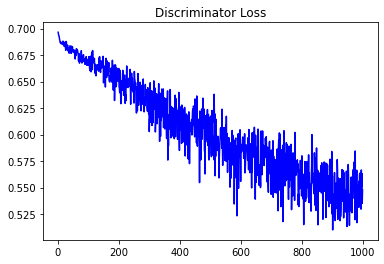

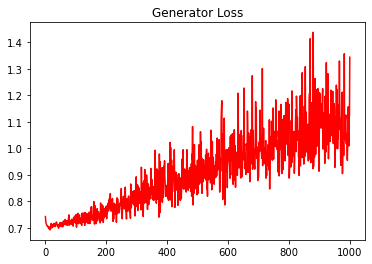

In [8]:
performanceMetrics.plotTrainingLoss2(discLossG1,genLossG1,np.linspace(1,n_epochs,n_epochs).astype(int))

In [9]:
GAN1_metrics = train_test.test_generator(generator,test_data,device)
sb.glue("GAN_1 Metrics",GAN1_metrics)

tensor([[ 0.1882],
        [ 0.7534],
        [ 0.5761],
        [ 0.7382],
        [ 0.2587],
        [-0.1361],
        [-1.9141],
        [ 1.4270],
        [-0.7084],
        [ 0.1380],
        [ 0.1868],
        [ 0.6081],
        [ 0.1496],
        [-1.1230],
        [ 0.3062],
        [ 0.9529],
        [-0.0420],
        [ 0.4770],
        [ 0.3592],
        [ 0.6649]], grad_fn=<MmBackward>)
tensor([[ 8.7158e-02],
        [ 6.8548e-01],
        [ 8.3043e-01],
        [ 5.2013e-01],
        [ 5.3334e-01],
        [ 3.2548e-01],
        [-2.1829e+00],
        [ 7.1889e-01],
        [-7.8634e-01],
        [ 3.5621e-01],
        [ 1.7532e-01],
        [-1.2642e+00],
        [ 2.7576e-01],
        [-1.2017e+00],
        [ 3.8092e-01],
        [ 9.5009e-01],
        [ 1.8797e-03],
        [ 5.0160e-01],
        [ 5.0289e-01],
        [ 7.3177e-01]], grad_fn=<MmBackward>)
tensor([[ 0.0464],
        [ 0.6541],
        [ 0.5722],
        [ 0.5270],
        [ 0.1187],
        [ 0.0517],


tensor([[ 0.1229],
        [ 0.8447],
        [ 0.7077],
        [ 0.9542],
        [ 0.4543],
        [-0.1280],
        [-1.3869],
        [ 1.0412],
        [-0.4036],
        [ 0.3156],
        [ 0.2183],
        [-1.5288],
        [ 0.3362],
        [-1.1735],
        [ 0.3666],
        [ 0.8140],
        [ 0.1129],
        [ 0.4512],
        [ 0.4859],
        [ 0.8311]], grad_fn=<MmBackward>)
tensor([[ 0.0885],
        [ 0.8527],
        [ 0.7008],
        [ 0.6751],
        [-0.1261],
        [ 0.0056],
        [-1.6055],
        [ 1.0012],
        [-0.9024],
        [ 0.4129],
        [ 0.2385],
        [-1.2180],
        [ 0.2023],
        [-1.0888],
        [ 0.4244],
        [ 0.5021],
        [ 0.0106],
        [ 0.4662],
        [ 0.5304],
        [ 0.7669]], grad_fn=<MmBackward>)
tensor([[ 0.0650],
        [ 0.8146],
        [ 0.6611],
        [ 0.5643],
        [ 0.3575],
        [ 0.1087],
        [-1.5051],
        [ 1.2585],
        [-0.8022],
        [ 0.3713],
    

tensor([[-0.0174],
        [ 0.6746],
        [ 0.8709],
        [ 0.7522],
        [ 0.8469],
        [ 0.0228],
        [-1.3918],
        [ 0.4810],
        [-0.3804],
        [ 0.3336],
        [ 0.3111],
        [-1.4969],
        [ 0.3315],
        [-1.2610],
        [ 0.4115],
        [ 0.8020],
        [-0.0106],
        [ 0.4554],
        [ 0.4048],
        [ 0.7576]], grad_fn=<MmBackward>)
tensor([[ 0.0381],
        [ 0.8345],
        [ 0.5999],
        [ 0.3891],
        [ 1.0756],
        [-0.1015],
        [-1.5961],
        [ 1.1870],
        [-0.4635],
        [ 0.2480],
        [ 0.2169],
        [ 0.4007],
        [ 0.1752],
        [-1.1723],
        [ 0.3416],
        [ 0.5967],
        [-0.0786],
        [ 0.4815],
        [ 0.3783],
        [ 0.7137]], grad_fn=<MmBackward>)
tensor([[ 0.0567],
        [ 0.6868],
        [ 0.5874],
        [ 0.6162],
        [ 0.6766],
        [ 0.0386],
        [-1.6987],
        [ 0.5584],
        [-0.8036],
        [ 0.3863],
    

tensor([[ 0.1539],
        [ 0.7216],
        [ 0.5889],
        [ 0.8532],
        [ 0.6203],
        [ 0.0154],
        [-1.6270],
        [ 0.4202],
        [-0.6647],
        [ 0.3498],
        [ 0.1496],
        [-1.6401],
        [ 0.8232],
        [-0.9414],
        [ 0.3474],
        [ 0.8117],
        [-0.0223],
        [ 0.4583],
        [ 0.3687],
        [ 0.7953]], grad_fn=<MmBackward>)
tensor([[ 0.0170],
        [ 0.8427],
        [ 0.6539],
        [ 0.6421],
        [ 0.2682],
        [ 0.0254],
        [-1.3850],
        [ 0.4864],
        [-0.7176],
        [ 0.3749],
        [ 0.3503],
        [-1.3741],
        [ 0.3076],
        [-1.1043],
        [ 0.4167],
        [ 0.9869],
        [ 0.2179],
        [ 0.5958],
        [ 0.4633],
        [ 0.7306]], grad_fn=<MmBackward>)
tensor([[ 0.0029],
        [ 0.8248],
        [ 0.6108],
        [ 0.4253],
        [ 0.5098],
        [ 0.3406],
        [-0.9415],
        [ 0.4701],
        [-0.3908],
        [ 0.3882],
    

tensor([[ 0.0402],
        [ 0.7236],
        [ 0.6941],
        [ 0.6420],
        [ 0.5688],
        [-0.0807],
        [-1.9024],
        [ 0.4276],
        [-0.8212],
        [ 0.3636],
        [ 0.3922],
        [-1.4129],
        [ 0.2908],
        [-0.9026],
        [ 0.4256],
        [ 0.9646],
        [-0.0765],
        [ 0.4818],
        [ 0.4731],
        [ 0.7510]], grad_fn=<MmBackward>)
tensor([[-0.0419],
        [ 0.8497],
        [ 0.8930],
        [ 0.8036],
        [ 0.7081],
        [ 0.0363],
        [-1.2122],
        [ 0.3694],
        [-0.2069],
        [ 0.3504],
        [ 0.2122],
        [-1.7904],
        [ 0.3525],
        [-0.4087],
        [ 0.3761],
        [ 0.8409],
        [-0.0300],
        [ 0.6239],
        [ 0.4018],
        [ 0.7858]], grad_fn=<MmBackward>)
tensor([[ 0.1312],
        [ 0.7326],
        [ 0.9024],
        [ 0.6628],
        [ 0.5361],
        [ 0.4219],
        [-1.5486],
        [ 0.6212],
        [-0.6182],
        [ 0.4371],
    

tensor([[ 0.1035],
        [ 0.6766],
        [ 0.7277],
        [ 0.6751],
        [ 0.4705],
        [ 0.0020],
        [-0.9930],
        [ 0.4960],
        [-0.4197],
        [ 0.4183],
        [ 0.3264],
        [-1.3661],
        [ 0.3731],
        [-0.6454],
        [ 0.3785],
        [ 0.9678],
        [ 0.0202],
        [ 0.3973],
        [ 0.5193],
        [ 0.8495]], grad_fn=<MmBackward>)
tensor([[-0.1204],
        [ 0.8937],
        [ 0.8408],
        [ 0.7665],
        [ 0.4164],
        [ 0.1061],
        [-1.5151],
        [ 0.4132],
        [-0.3730],
        [ 0.4789],
        [ 0.1183],
        [-1.7215],
        [ 0.3234],
        [-1.3389],
        [ 0.4802],
        [ 0.7992],
        [ 0.0594],
        [ 0.5140],
        [ 0.5539],
        [ 0.8561]], grad_fn=<MmBackward>)
tensor([[ 0.0606],
        [ 0.6448],
        [ 0.7664],
        [ 0.4598],
        [ 0.8417],
        [ 0.0237],
        [-1.2172],
        [ 0.4594],
        [-0.6142],
        [ 0.3677],
    

tensor([[ 0.0514],
        [ 0.6615],
        [ 0.5990],
        [ 0.7346],
        [ 0.4080],
        [ 0.0753],
        [-1.4530],
        [ 0.5089],
        [-0.5215],
        [ 0.3746],
        [ 0.3710],
        [-1.5672],
        [ 0.2851],
        [-1.1087],
        [ 0.3924],
        [ 0.9609],
        [ 0.0114],
        [ 0.4789],
        [ 0.4642],
        [ 0.7651]], grad_fn=<MmBackward>)
tensor([[-0.0755],
        [ 0.7530],
        [ 0.5375],
        [ 0.9211],
        [ 0.7065],
        [ 0.1707],
        [-1.3682],
        [ 1.1760],
        [-0.7139],
        [ 0.4525],
        [ 0.1660],
        [-0.2040],
        [ 0.2000],
        [-1.3135],
        [ 0.3443],
        [ 0.8392],
        [-0.0501],
        [ 0.4727],
        [ 0.4411],
        [ 0.6843]], grad_fn=<MmBackward>)
tensor([[ 0.0613],
        [ 0.6825],
        [ 1.0193],
        [ 0.4437],
        [ 0.6933],
        [ 0.0145],
        [-1.3936],
        [ 0.5397],
        [-0.2299],
        [ 0.3008],
    

tensor([[ 0.1694],
        [ 0.7426],
        [ 0.6032],
        [ 0.8154],
        [ 0.5749],
        [ 0.1405],
        [-1.8528],
        [ 0.6807],
        [-0.2935],
        [ 0.3488],
        [ 0.3680],
        [-1.3088],
        [ 0.4500],
        [-0.4622],
        [ 0.3823],
        [ 1.1073],
        [-0.0690],
        [ 0.4963],
        [ 0.5274],
        [ 0.8090]], grad_fn=<MmBackward>)
tensor([[ 0.0462],
        [ 0.7742],
        [ 0.9136],
        [ 0.8581],
        [ 0.4722],
        [-0.0032],
        [-1.2106],
        [ 0.8371],
        [-0.4338],
        [ 0.4083],
        [ 0.1868],
        [-1.2994],
        [ 0.2835],
        [-0.7924],
        [ 0.3656],
        [ 0.3814],
        [-0.1647],
        [ 0.4317],
        [ 0.5160],
        [ 0.7702]], grad_fn=<MmBackward>)
tensor([[ 0.0286],
        [ 0.6742],
        [ 0.8730],
        [ 0.5750],
        [ 0.7187],
        [ 0.0283],
        [-1.4122],
        [ 0.7084],
        [-0.5410],
        [ 0.4194],
    

tensor([[ 0.1579],
        [ 0.6188],
        [ 0.5765],
        [ 0.6618],
        [ 0.1764],
        [ 0.1354],
        [-1.6705],
        [ 1.2237],
        [-0.7320],
        [ 0.3594],
        [ 0.1915],
        [-1.2112],
        [ 0.1938],
        [-1.2071],
        [ 0.3777],
        [ 0.9588],
        [-0.0609],
        [ 0.4564],
        [ 0.4586],
        [ 0.7783]], grad_fn=<MmBackward>)
tensor([[ 0.0383],
        [ 0.5691],
        [ 1.0294],
        [ 0.5620],
        [ 0.3742],
        [ 0.2252],
        [-1.5210],
        [ 0.4437],
        [-0.7176],
        [ 0.4103],
        [ 0.2994],
        [-1.5334],
        [ 0.3046],
        [-0.9229],
        [ 0.4094],
        [ 0.8265],
        [-0.1071],
        [ 0.4257],
        [ 0.5653],
        [ 0.7439]], grad_fn=<MmBackward>)
tensor([[ 0.0127],
        [ 0.8734],
        [ 0.6895],
        [ 0.6423],
        [ 0.6797],
        [ 0.0932],
        [-1.4640],
        [ 0.4951],
        [-0.2067],
        [ 0.3427],
    

tensor([[ 0.0345],
        [ 0.9169],
        [ 0.6209],
        [ 0.7184],
        [ 0.2331],
        [ 0.2721],
        [-1.4487],
        [ 0.6665],
        [-0.1650],
        [ 0.2252],
        [ 0.1892],
        [-1.0186],
        [ 0.2112],
        [-1.2886],
        [ 0.3760],
        [ 0.5653],
        [-0.0055],
        [ 0.6906],
        [ 0.3151],
        [ 0.6335]], grad_fn=<MmBackward>)
tensor([[-0.0444],
        [ 0.8211],
        [ 0.7456],
        [ 0.4457],
        [ 0.7570],
        [ 0.0431],
        [-1.6098],
        [ 0.6250],
        [-0.7332],
        [ 0.3102],
        [ 0.2944],
        [ 0.6299],
        [ 0.1521],
        [-1.2749],
        [ 0.3035],
        [ 0.7698],
        [-0.0594],
        [ 0.5453],
        [ 0.3209],
        [ 0.7634]], grad_fn=<MmBackward>)
tensor([[ 0.0562],
        [ 0.8113],
        [ 0.6591],
        [ 0.5664],
        [ 0.6476],
        [ 0.1186],
        [-1.5080],
        [ 0.5896],
        [-0.4473],
        [ 0.3230],
    

tensor([[ 2.0583e-01],
        [ 7.2518e-01],
        [ 8.7324e-01],
        [ 8.5791e-01],
        [ 6.6291e-01],
        [ 1.3335e-03],
        [-1.0767e+00],
        [ 5.2092e-01],
        [-5.8795e-01],
        [ 3.8856e-01],
        [ 1.6104e-01],
        [-1.4225e+00],
        [ 3.1060e-01],
        [-1.1537e+00],
        [ 3.9681e-01],
        [ 5.3067e-01],
        [-6.5530e-02],
        [ 4.6767e-01],
        [ 4.8646e-01],
        [ 8.8687e-01]], grad_fn=<MmBackward>)
tensor([[ 0.0347],
        [ 0.7085],
        [ 0.5259],
        [ 0.9760],
        [ 0.3736],
        [-0.0473],
        [-1.8850],
        [ 0.4706],
        [-0.7937],
        [ 0.2300],
        [ 0.2404],
        [ 0.8096],
        [ 0.1659],
        [-0.8827],
        [ 0.1934],
        [ 0.8064],
        [-0.0454],
        [ 0.3819],
        [ 0.3325],
        [ 0.7011]], grad_fn=<MmBackward>)
tensor([[ 0.0922],
        [ 0.7858],
        [ 0.7008],
        [ 0.6872],
        [ 0.4433],
        [-0.0604],


tensor([[ 0.0740],
        [ 0.7270],
        [ 0.6708],
        [ 0.6088],
        [ 0.9055],
        [ 0.0042],
        [-1.4425],
        [ 0.6027],
        [-0.5409],
        [ 0.3351],
        [ 0.2385],
        [-1.3537],
        [ 0.1987],
        [-1.0856],
        [ 0.2775],
        [ 0.9386],
        [-0.0311],
        [ 0.4322],
        [ 0.4296],
        [ 0.7854]], grad_fn=<MmBackward>)
tensor([[-0.0119],
        [ 0.8000],
        [ 0.6958],
        [ 0.5601],
        [ 0.8205],
        [ 0.2090],
        [-1.5410],
        [ 0.4338],
        [-0.4883],
        [ 0.3462],
        [ 0.2791],
        [-1.5293],
        [ 0.3365],
        [-0.4539],
        [ 0.3540],
        [ 0.9001],
        [ 0.0034],
        [ 0.6583],
        [ 0.4664],
        [ 0.7782]], grad_fn=<MmBackward>)
tensor([[ 0.0033],
        [ 0.9216],
        [ 0.7664],
        [ 0.5812],
        [ 0.5894],
        [-0.0186],
        [-1.8629],
        [ 0.9831],
        [-0.5390],
        [ 0.2671],
    

tensor([[ 0.0450],
        [ 0.9154],
        [ 0.6859],
        [ 0.7093],
        [-0.0575],
        [-0.0148],
        [-1.4429],
        [ 1.5778],
        [-0.4263],
        [ 0.3385],
        [ 0.1794],
        [-0.4159],
        [ 0.2829],
        [-1.1432],
        [ 0.2653],
        [ 0.8904],
        [-0.0571],
        [ 0.4411],
        [ 0.3196],
        [ 0.7082]], grad_fn=<MmBackward>)
tensor([[-0.0252],
        [ 0.7499],
        [ 1.0449],
        [ 0.5868],
        [ 0.6715],
        [ 0.0094],
        [-0.9411],
        [ 0.2141],
        [ 0.1201],
        [ 0.3514],
        [ 0.1593],
        [-1.8693],
        [ 0.3100],
        [-0.9003],
        [ 0.3492],
        [ 0.8763],
        [-0.1567],
        [ 0.6152],
        [ 0.4061],
        [ 0.8020]], grad_fn=<MmBackward>)
tensor([[-0.0497],
        [ 0.8355],
        [ 0.7052],
        [ 0.6205],
        [ 0.7561],
        [ 0.3009],
        [-1.4035],
        [ 0.5973],
        [-0.3081],
        [ 0.3619],
    

tensor([[ 0.0817],
        [ 0.9029],
        [ 0.8473],
        [ 0.5087],
        [ 0.4392],
        [ 0.0369],
        [-1.2939],
        [ 0.4411],
        [-0.5207],
        [ 0.3910],
        [ 0.2655],
        [-1.4677],
        [ 0.2937],
        [-0.8705],
        [ 0.4218],
        [ 1.0050],
        [-0.0066],
        [ 0.5543],
        [ 0.5044],
        [ 0.7518]], grad_fn=<MmBackward>)
tensor([[ 0.0086],
        [ 0.7817],
        [ 0.5643],
        [ 0.7642],
        [ 0.3977],
        [-0.0128],
        [-1.7367],
        [ 1.5947],
        [-0.4070],
        [ 0.1969],
        [ 0.0898],
        [ 0.6559],
        [ 0.2129],
        [-0.9767],
        [ 0.2957],
        [ 0.6170],
        [-0.0632],
        [ 0.4553],
        [ 0.2791],
        [ 0.8024]], grad_fn=<MmBackward>)
tensor([[ 0.0849],
        [ 0.7818],
        [ 0.7584],
        [ 0.6032],
        [ 0.7548],
        [-0.0031],
        [-1.4305],
        [ 0.5844],
        [-0.7940],
        [ 0.4120],
    

tensor([[ 0.1536],
        [ 0.7603],
        [ 0.8379],
        [ 0.7647],
        [ 0.4059],
        [ 0.0338],
        [-0.7957],
        [ 1.0019],
        [-0.5288],
        [ 0.4485],
        [ 0.1928],
        [-1.2480],
        [ 0.3274],
        [-0.9038],
        [ 0.3920],
        [ 0.6050],
        [-0.1970],
        [ 0.5494],
        [ 0.6495],
        [ 0.7552]], grad_fn=<MmBackward>)
tensor([[ 0.0425],
        [ 0.8273],
        [ 0.6304],
        [ 0.6175],
        [ 0.7743],
        [ 0.0482],
        [-1.6456],
        [ 0.5948],
        [-0.8275],
        [ 0.3894],
        [ 0.3698],
        [-1.3749],
        [ 0.2618],
        [-1.1387],
        [ 0.3879],
        [ 0.8291],
        [ 0.0340],
        [ 0.6059],
        [ 0.5143],
        [ 0.8274]], grad_fn=<MmBackward>)
tensor([[ 0.0738],
        [ 0.8191],
        [ 0.8653],
        [ 0.8976],
        [ 0.1808],
        [ 0.0565],
        [-1.1132],
        [ 0.9645],
        [-0.5927],
        [ 0.3322],
    

tensor([[ 0.2259],
        [ 0.8724],
        [ 0.6810],
        [ 0.9241],
        [ 0.3917],
        [-0.0775],
        [-1.2720],
        [ 1.0422],
        [-0.6043],
        [ 0.2810],
        [ 0.1902],
        [-1.6108],
        [ 0.2662],
        [-0.7280],
        [ 0.3526],
        [ 0.5562],
        [-0.1216],
        [ 0.4032],
        [ 0.4231],
        [ 0.8224]], grad_fn=<MmBackward>)
tensor([[ 0.1356],
        [ 0.4504],
        [ 0.5820],
        [ 0.6993],
        [ 0.1937],
        [ 0.0349],
        [-1.4929],
        [ 0.4074],
        [-0.7239],
        [ 0.4526],
        [ 0.1775],
        [-1.5116],
        [ 0.3345],
        [-0.8211],
        [ 0.4754],
        [ 1.0162],
        [-0.1195],
        [ 0.4549],
        [ 0.6886],
        [ 0.7784]], grad_fn=<MmBackward>)
tensor([[-4.4811e-02],
        [ 8.0906e-01],
        [ 9.1066e-01],
        [ 5.9181e-01],
        [ 5.4875e-01],
        [ 3.4633e-01],
        [-1.7685e+00],
        [ 5.6152e-01],
        [-

tensor([[-0.0054],
        [ 0.7195],
        [ 0.6666],
        [ 0.7525],
        [ 0.6504],
        [ 0.0483],
        [-1.5596],
        [ 0.5126],
        [-0.8418],
        [ 0.4910],
        [ 0.4782],
        [-1.4730],
        [ 0.3007],
        [-1.1304],
        [ 0.5044],
        [ 0.8422],
        [-0.0361],
        [ 0.6392],
        [ 0.4696],
        [ 0.8013]], grad_fn=<MmBackward>)
tensor([[ 0.1148],
        [ 0.6854],
        [ 0.8929],
        [ 0.4178],
        [ 0.6148],
        [ 0.0947],
        [-1.5980],
        [ 0.4673],
        [-0.5894],
        [ 0.3521],
        [ 0.1450],
        [-1.4928],
        [ 0.2839],
        [-1.0969],
        [ 0.4141],
        [ 0.9340],
        [ 0.0918],
        [ 0.4408],
        [ 0.4262],
        [ 0.7155]], grad_fn=<MmBackward>)
tensor([[ 0.0688],
        [ 0.7098],
        [ 0.6248],
        [ 0.5053],
        [ 0.8194],
        [ 0.0384],
        [-1.2829],
        [ 0.4047],
        [-0.6687],
        [ 0.3383],
    

tensor([[-2.4289e-06],
        [ 6.6694e-01],
        [ 8.5298e-01],
        [ 6.7321e-01],
        [ 6.7343e-01],
        [-2.2146e-03],
        [-1.0606e+00],
        [ 4.2445e-01],
        [-3.3500e-01],
        [ 3.0011e-01],
        [ 3.0052e-01],
        [-1.6724e+00],
        [ 2.9368e-01],
        [-1.2946e+00],
        [ 3.6799e-01],
        [ 7.0595e-01],
        [ 7.8899e-03],
        [ 7.5282e-01],
        [ 3.6732e-01],
        [ 8.7524e-01]], grad_fn=<MmBackward>)
tensor([[ 0.0419],
        [ 0.8058],
        [ 0.5321],
        [ 0.6325],
        [ 0.7001],
        [-0.0287],
        [-1.9488],
        [ 0.5536],
        [-0.6460],
        [ 0.3114],
        [ 0.1979],
        [ 0.7261],
        [ 0.1540],
        [-0.4469],
        [ 0.2862],
        [ 0.7963],
        [-0.0815],
        [ 0.5519],
        [ 0.3887],
        [ 0.7480]], grad_fn=<MmBackward>)
tensor([[ 0.0670],
        [ 0.7408],
        [ 0.5496],
        [ 0.6240],
        [ 0.5763],
        [ 0.0224],


tensor([[ 0.1567],
        [ 0.8644],
        [ 0.6182],
        [ 0.2122],
        [ 0.5081],
        [ 0.0211],
        [-1.4968],
        [ 0.5433],
        [-0.7294],
        [ 0.3561],
        [ 0.2331],
        [-1.3970],
        [ 0.2268],
        [-1.1124],
        [ 0.4357],
        [ 0.9955],
        [-0.0088],
        [ 0.5201],
        [ 0.4983],
        [ 0.8472]], grad_fn=<MmBackward>)
tensor([[ 0.0544],
        [ 0.7352],
        [ 0.6389],
        [ 0.5604],
        [ 0.8092],
        [ 0.2730],
        [-1.9486],
        [ 0.9308],
        [-0.7053],
        [ 0.4073],
        [ 0.3449],
        [-0.9719],
        [ 0.3218],
        [-1.3036],
        [ 0.4231],
        [ 0.7540],
        [ 0.0681],
        [ 0.5852],
        [ 0.5273],
        [ 0.6520]], grad_fn=<MmBackward>)
tensor([[ 2.0278e-01],
        [ 7.6559e-01],
        [ 6.3395e-01],
        [ 6.7709e-01],
        [ 7.5386e-01],
        [ 1.7937e-01],
        [-1.8815e+00],
        [ 5.0929e-01],
        [-

tensor([[ 0.1469],
        [ 0.7696],
        [ 0.6810],
        [ 0.5777],
        [ 0.6852],
        [ 0.0471],
        [-2.2379],
        [ 0.6294],
        [-0.5426],
        [ 0.4003],
        [-0.0396],
        [-1.2676],
        [ 0.3317],
        [-1.1190],
        [ 0.4094],
        [ 1.0593],
        [ 0.1481],
        [ 0.5808],
        [ 0.5304],
        [ 0.8029]], grad_fn=<MmBackward>)
tensor([[ 0.0085],
        [ 0.7533],
        [ 1.0251],
        [ 0.5863],
        [ 0.6621],
        [-0.0396],
        [-1.8563],
        [ 0.4479],
        [-0.4971],
        [ 0.3950],
        [ 0.2889],
        [-1.4267],
        [ 0.2693],
        [-0.9476],
        [ 0.3667],
        [ 0.8109],
        [-0.0042],
        [ 0.4614],
        [ 0.4693],
        [ 0.8018]], grad_fn=<MmBackward>)
tensor([[ 0.1819],
        [ 0.4602],
        [ 0.5940],
        [ 0.5588],
        [ 0.6623],
        [ 0.2504],
        [-1.5201],
        [ 0.7451],
        [-0.6437],
        [ 0.3761],
    

tensor([[ 0.0851],
        [ 0.5826],
        [ 0.7170],
        [ 0.3915],
        [ 0.6786],
        [ 0.3948],
        [-1.6395],
        [ 0.7753],
        [-0.4983],
        [ 0.4337],
        [ 0.4092],
        [-1.4074],
        [ 0.2781],
        [-1.0883],
        [ 0.3720],
        [ 0.8597],
        [ 0.0058],
        [ 0.4802],
        [ 0.5632],
        [ 0.7926]], grad_fn=<MmBackward>)
tensor([[ 0.0063],
        [ 0.9112],
        [ 0.6693],
        [ 0.5439],
        [ 0.3092],
        [ 0.2458],
        [-2.0241],
        [ 0.4948],
        [-0.7070],
        [ 0.4424],
        [-0.1359],
        [-1.2449],
        [ 0.3415],
        [-1.1464],
        [ 0.5146],
        [ 0.7306],
        [ 0.1094],
        [ 0.6430],
        [ 0.5853],
        [ 0.9007]], grad_fn=<MmBackward>)
tensor([[-0.0302],
        [ 0.8202],
        [ 0.6469],
        [ 0.7420],
        [ 0.4399],
        [ 0.0462],
        [-2.1355],
        [ 0.4107],
        [-0.5110],
        [ 0.3994],
    

tensor([[ 0.0851],
        [ 0.7061],
        [ 0.6184],
        [ 0.5369],
        [ 0.7196],
        [ 0.0449],
        [-1.9166],
        [ 0.6613],
        [-0.7072],
        [ 0.4164],
        [ 0.3249],
        [-1.1074],
        [ 0.2675],
        [-0.9829],
        [ 0.4360],
        [ 0.8697],
        [-0.0211],
        [ 0.6883],
        [ 0.5409],
        [ 0.6170]], grad_fn=<MmBackward>)
tensor([[ 0.0743],
        [ 0.7143],
        [ 0.6450],
        [ 0.4569],
        [ 0.9518],
        [ 0.1267],
        [-1.4655],
        [ 0.6865],
        [-0.7729],
        [ 0.3501],
        [ 0.2485],
        [-1.3768],
        [ 0.2396],
        [-1.1819],
        [ 0.4199],
        [ 0.8321],
        [-0.0691],
        [ 0.4499],
        [ 0.5214],
        [ 0.8137]], grad_fn=<MmBackward>)
tensor([[ 0.0160],
        [ 0.8887],
        [ 0.7197],
        [ 0.9572],
        [ 0.2644],
        [ 0.0153],
        [-1.0134],
        [ 0.4369],
        [-0.4158],
        [ 0.3458],
    

tensor([[-0.0045],
        [ 0.9129],
        [ 0.6446],
        [ 1.0014],
        [ 0.3427],
        [-0.0869],
        [-1.8719],
        [ 0.4395],
        [-0.6589],
        [ 0.2325],
        [ 0.1737],
        [ 0.6041],
        [ 0.1449],
        [-1.2485],
        [ 0.1548],
        [ 0.8298],
        [-0.0525],
        [ 0.6041],
        [ 0.3527],
        [ 0.6397]], grad_fn=<MmBackward>)
tensor([[-0.0133],
        [ 0.7821],
        [ 0.7427],
        [ 0.8116],
        [ 0.0893],
        [-0.0232],
        [-2.2377],
        [ 0.8623],
        [-0.7066],
        [ 0.2878],
        [ 0.1834],
        [ 0.7338],
        [ 0.1740],
        [-1.0252],
        [ 0.2587],
        [ 1.0862],
        [ 0.0109],
        [ 0.5048],
        [ 0.4004],
        [ 0.6000]], grad_fn=<MmBackward>)
tensor([[ 0.0672],
        [ 0.7447],
        [ 0.6680],
        [ 0.6961],
        [ 0.6826],
        [-0.0430],
        [-2.1668],
        [ 0.4896],
        [-0.7277],
        [ 0.3797],
    

tensor([[ 0.1405],
        [ 0.8951],
        [ 0.6378],
        [ 0.4726],
        [ 0.3010],
        [ 0.0609],
        [-1.7975],
        [ 0.5334],
        [-0.7614],
        [ 0.3877],
        [ 0.3105],
        [-1.2878],
        [ 0.2794],
        [-0.7799],
        [ 0.4493],
        [ 0.8666],
        [-0.0097],
        [ 0.4936],
        [ 0.5887],
        [ 0.8440]], grad_fn=<MmBackward>)
tensor([[ 0.1445],
        [ 0.9872],
        [ 0.5295],
        [ 0.6612],
        [ 0.3754],
        [ 0.1421],
        [-0.9088],
        [ 0.4848],
        [-0.6791],
        [ 0.3656],
        [ 0.2475],
        [-1.0229],
        [ 0.2147],
        [-1.0332],
        [ 0.2504],
        [ 0.9987],
        [-0.1273],
        [ 0.3872],
        [ 0.4512],
        [ 0.7398]], grad_fn=<MmBackward>)
tensor([[ 0.0887],
        [ 0.6133],
        [ 0.5861],
        [ 0.7740],
        [ 0.4868],
        [-0.0560],
        [-1.5371],
        [ 0.5657],
        [-0.5633],
        [ 0.3679],
    

tensor([[ 0.0588],
        [ 0.8741],
        [ 0.6828],
        [ 0.7167],
        [ 0.2724],
        [ 0.2979],
        [-1.5199],
        [ 1.0480],
        [-0.5044],
        [ 0.3230],
        [ 0.1872],
        [-1.3773],
        [ 0.2992],
        [-0.5685],
        [ 0.3727],
        [ 0.6584],
        [-0.0681],
        [ 0.6426],
        [ 0.4396],
        [ 0.7903]], grad_fn=<MmBackward>)
tensor([[ 0.1748],
        [ 0.6172],
        [ 0.6023],
        [ 0.5905],
        [ 0.6703],
        [-0.0091],
        [-1.4656],
        [ 0.3975],
        [-0.4492],
        [ 0.3988],
        [ 0.3231],
        [-1.4189],
        [ 0.3006],
        [-0.8624],
        [ 0.3599],
        [ 0.8486],
        [ 0.1086],
        [ 0.4734],
        [ 0.3825],
        [ 0.8890]], grad_fn=<MmBackward>)
tensor([[ 0.2063],
        [ 0.8969],
        [ 0.6992],
        [ 0.7148],
        [ 0.2515],
        [ 0.1374],
        [-1.5271],
        [ 1.4821],
        [-0.4934],
        [ 0.4471],
    

tensor([[ 0.1660],
        [ 0.6881],
        [ 0.7400],
        [ 0.7330],
        [ 0.7539],
        [-0.2281],
        [-1.1987],
        [ 0.8269],
        [-0.5001],
        [ 0.4891],
        [ 0.2556],
        [-1.4276],
        [ 0.3132],
        [-1.2091],
        [ 0.4198],
        [ 0.5858],
        [-0.0251],
        [ 0.4404],
        [ 0.6845],
        [ 0.8048]], grad_fn=<MmBackward>)
tensor([[ 0.0113],
        [ 0.8620],
        [ 1.0255],
        [ 0.5534],
        [ 0.2955],
        [ 0.0994],
        [-1.7222],
        [ 0.4635],
        [-0.5920],
        [ 0.3671],
        [ 0.0966],
        [-1.5013],
        [ 0.2406],
        [-1.0893],
        [ 0.4112],
        [ 1.0041],
        [-0.0303],
        [ 0.5328],
        [ 0.4254],
        [ 0.7643]], grad_fn=<MmBackward>)
tensor([[-0.0047],
        [ 0.7530],
        [ 0.7660],
        [ 0.9957],
        [ 0.6519],
        [ 0.0720],
        [-1.9051],
        [ 0.4814],
        [-0.4411],
        [ 0.3589],
    

tensor([[ 0.1234],
        [ 0.8328],
        [ 0.5866],
        [ 0.3217],
        [ 0.6392],
        [ 0.1503],
        [-1.6451],
        [ 0.6996],
        [-0.4935],
        [ 0.4146],
        [ 0.4092],
        [-1.1094],
        [ 0.3018],
        [-1.0815],
        [ 0.3947],
        [ 0.9291],
        [-0.0285],
        [ 0.5207],
        [ 0.5174],
        [ 0.8094]], grad_fn=<MmBackward>)
tensor([[ 2.5464e-02],
        [ 8.8276e-01],
        [ 7.1516e-01],
        [ 7.4515e-01],
        [ 6.5564e-01],
        [ 1.5107e-01],
        [-1.5953e+00],
        [ 6.1020e-01],
        [-5.1606e-01],
        [ 3.2828e-01],
        [ 6.3172e-04],
        [-1.5153e+00],
        [ 2.1917e-01],
        [-1.3012e+00],
        [ 4.4391e-01],
        [ 1.0644e+00],
        [ 5.7983e-02],
        [ 5.4802e-01],
        [ 5.0096e-01],
        [ 8.3869e-01]], grad_fn=<MmBackward>)
tensor([[ 0.0541],
        [ 0.8417],
        [ 0.6984],
        [ 0.6751],
        [ 0.6390],
        [ 0.3252],


tensor([[ 0.1163],
        [ 0.7739],
        [ 1.0715],
        [ 0.6637],
        [ 0.4729],
        [-0.0293],
        [-1.5596],
        [ 0.1287],
        [-0.7694],
        [ 0.2736],
        [ 0.1649],
        [-1.3604],
        [ 0.2423],
        [-0.8781],
        [ 0.3176],
        [ 0.7067],
        [-0.0191],
        [ 0.4172],
        [ 0.4315],
        [ 0.8084]], grad_fn=<MmBackward>)
tensor([[ 0.0648],
        [ 0.8230],
        [ 0.9588],
        [ 0.8028],
        [ 0.3268],
        [-0.1248],
        [-1.6133],
        [ 0.5628],
        [-0.7997],
        [ 0.3378],
        [ 0.1990],
        [-1.3500],
        [ 0.2511],
        [-1.1112],
        [ 0.3756],
        [ 0.9395],
        [-0.0374],
        [ 0.4269],
        [ 0.4438],
        [ 0.7219]], grad_fn=<MmBackward>)
tensor([[ 0.0085],
        [ 0.7452],
        [ 0.6644],
        [ 0.5436],
        [ 0.6985],
        [ 0.0674],
        [-1.5113],
        [ 0.6432],
        [-0.4630],
        [ 0.4254],
    

tensor([[ 0.0637],
        [ 0.8278],
        [ 0.5885],
        [ 0.5216],
        [ 0.7298],
        [ 0.0191],
        [-1.7949],
        [ 0.5286],
        [-0.8687],
        [ 0.4149],
        [ 0.3113],
        [-1.5492],
        [ 0.2853],
        [-1.0862],
        [ 0.3465],
        [ 0.8716],
        [ 0.0493],
        [ 0.8454],
        [ 0.4463],
        [ 0.8197]], grad_fn=<MmBackward>)
tensor([[ 0.1108],
        [ 0.7331],
        [ 0.8408],
        [ 0.9540],
        [ 0.4963],
        [-0.0559],
        [-1.0730],
        [ 0.9551],
        [-0.8491],
        [ 0.3378],
        [ 0.1242],
        [-1.4693],
        [ 0.7985],
        [-1.1097],
        [ 0.3136],
        [ 0.5606],
        [-0.0683],
        [ 0.7183],
        [ 0.4421],
        [ 0.8453]], grad_fn=<MmBackward>)
tensor([[-0.0869],
        [ 0.8732],
        [ 0.9851],
        [ 0.7914],
        [ 0.5511],
        [ 0.0893],
        [-1.2797],
        [ 0.2350],
        [-0.4272],
        [ 0.3951],
    

tensor([[ 0.4673],
        [ 0.6923],
        [ 0.6125],
        [ 0.6488],
        [ 0.8916],
        [-0.0971],
        [-2.0973],
        [ 0.3731],
        [-0.6188],
        [ 0.3278],
        [ 0.2991],
        [-1.2584],
        [ 0.2107],
        [-1.0225],
        [ 0.3709],
        [ 1.1461],
        [-0.0188],
        [ 0.5819],
        [ 0.5003],
        [ 0.7774]], grad_fn=<MmBackward>)
tensor([[ 0.1466],
        [ 0.5105],
        [ 0.6847],
        [ 0.8260],
        [ 0.1015],
        [-0.1513],
        [-1.8278],
        [ 0.3646],
        [-0.8372],
        [ 0.3826],
        [ 0.2419],
        [ 0.4932],
        [ 0.2453],
        [-1.0328],
        [ 0.3920],
        [ 0.6247],
        [-0.0145],
        [ 0.5438],
        [ 0.3806],
        [ 0.7088]], grad_fn=<MmBackward>)
tensor([[-0.0320],
        [ 0.7084],
        [ 0.6742],
        [ 0.5031],
        [ 0.8014],
        [ 0.1652],
        [-1.2045],
        [ 0.3935],
        [ 0.0991],
        [ 0.3289],
    

tensor([[ 0.0309],
        [ 0.7641],
        [ 0.6608],
        [ 0.6656],
        [ 0.3200],
        [ 0.0948],
        [-1.4862],
        [ 0.4764],
        [-0.4654],
        [ 0.3482],
        [ 0.3058],
        [-1.5400],
        [ 0.2774],
        [-0.9900],
        [ 0.3649],
        [ 0.8279],
        [ 0.1037],
        [ 0.7478],
        [ 0.4175],
        [ 0.7784]], grad_fn=<MmBackward>)
tensor([[ 0.0229],
        [ 0.6759],
        [ 0.7268],
        [ 0.3639],
        [ 0.5900],
        [ 0.0469],
        [-1.6664],
        [ 0.3936],
        [-0.8458],
        [ 0.4011],
        [ 0.4212],
        [-1.4833],
        [ 0.2737],
        [-0.9877],
        [ 0.4430],
        [ 0.8628],
        [ 0.0117],
        [ 0.6533],
        [ 0.5385],
        [ 0.7891]], grad_fn=<MmBackward>)
tensor([[ 0.0180],
        [ 0.6386],
        [ 0.6760],
        [ 0.6403],
        [ 0.3267],
        [ 0.2384],
        [-2.1138],
        [ 0.4981],
        [-0.7668],
        [ 0.4076],
    

tensor([[ 0.1019],
        [ 0.7250],
        [ 0.7122],
        [ 0.7824],
        [ 0.6154],
        [-0.0329],
        [-1.3846],
        [ 0.5614],
        [-0.4748],
        [ 0.4113],
        [ 0.3760],
        [-1.1915],
        [ 0.2806],
        [-0.8240],
        [ 0.4194],
        [ 0.6387],
        [-0.0187],
        [ 0.4678],
        [ 0.5495],
        [ 0.7666]], grad_fn=<MmBackward>)
tensor([[-0.0211],
        [ 0.8346],
        [ 0.5415],
        [ 0.7048],
        [ 0.6495],
        [ 0.0888],
        [-1.7750],
        [ 0.5470],
        [-0.5076],
        [ 0.3785],
        [ 0.2909],
        [-1.3094],
        [ 0.3070],
        [-0.1302],
        [ 0.4771],
        [ 0.7965],
        [-0.0574],
        [ 0.6578],
        [ 0.5475],
        [ 0.7506]], grad_fn=<MmBackward>)
tensor([[ 0.0439],
        [ 0.8357],
        [ 0.7391],
        [ 0.6665],
        [ 0.3626],
        [ 0.0072],
        [-1.5591],
        [ 0.5072],
        [-0.8175],
        [ 0.3412],
    

tensor([[ 2.2752e-01],
        [ 8.4941e-01],
        [ 5.9205e-01],
        [ 1.0278e+00],
        [-1.1958e-01],
        [-9.7841e-02],
        [-1.5713e+00],
        [ 1.0843e+00],
        [-7.3798e-01],
        [ 2.3564e-01],
        [ 1.4557e-01],
        [ 3.0374e-01],
        [ 1.7686e-01],
        [-1.2920e+00],
        [ 3.9191e-01],
        [ 1.0808e+00],
        [ 3.3891e-04],
        [ 4.8815e-01],
        [ 3.6386e-01],
        [ 7.0406e-01]], grad_fn=<MmBackward>)
tensor([[ 0.1025],
        [ 0.7719],
        [ 0.6174],
        [ 0.7361],
        [ 0.4095],
        [ 0.1016],
        [-1.5131],
        [ 0.6960],
        [-0.4572],
        [ 0.3784],
        [ 0.2545],
        [-1.3407],
        [ 0.2609],
        [-1.1971],
        [ 0.4069],
        [ 0.9951],
        [-0.0192],
        [ 0.4919],
        [ 0.4842],
        [ 0.8054]], grad_fn=<MmBackward>)
tensor([[ 0.1199],
        [ 0.7528],
        [ 0.5838],
        [ 0.5735],
        [ 0.5683],
        [-0.0731],


tensor([[ 0.0079],
        [ 0.7287],
        [ 0.9728],
        [ 0.4369],
        [ 0.7825],
        [-0.0890],
        [-1.9213],
        [ 0.4634],
        [-0.3909],
        [ 0.3452],
        [ 0.2150],
        [-1.2870],
        [ 0.2808],
        [-0.6329],
        [ 0.3455],
        [ 0.6953],
        [-0.1062],
        [ 0.4078],
        [ 0.4759],
        [ 0.7852]], grad_fn=<MmBackward>)
tensor([[ 0.0761],
        [ 0.7518],
        [ 0.6545],
        [ 0.8656],
        [ 0.3488],
        [-0.1920],
        [-1.7353],
        [ 0.4242],
        [-0.5176],
        [ 0.3492],
        [ 0.2034],
        [-1.4158],
        [ 0.2520],
        [-1.0659],
        [ 0.3922],
        [ 0.8435],
        [-0.0442],
        [ 0.4690],
        [ 0.6090],
        [ 0.8414]], grad_fn=<MmBackward>)
tensor([[-0.0690],
        [ 1.2138],
        [ 0.6639],
        [ 0.9016],
        [ 0.1645],
        [-0.0137],
        [-1.9647],
        [ 0.4826],
        [-0.6380],
        [ 0.3226],
    

tensor([[-0.0412],
        [ 0.7177],
        [ 0.6985],
        [ 0.5347],
        [ 0.7055],
        [ 0.0093],
        [-1.4126],
        [ 0.4829],
        [-0.4313],
        [ 0.2952],
        [ 0.2903],
        [-1.4553],
        [ 0.2495],
        [-1.1754],
        [ 0.3893],
        [ 1.0016],
        [-0.0316],
        [ 0.4327],
        [ 0.4919],
        [ 0.7685]], grad_fn=<MmBackward>)
tensor([[ 0.1581],
        [ 0.7659],
        [ 0.4976],
        [ 0.7188],
        [ 0.5383],
        [-0.0499],
        [-0.8074],
        [ 0.3935],
        [-0.8245],
        [ 0.4103],
        [ 0.2182],
        [-1.4314],
        [ 0.2939],
        [-0.7585],
        [ 0.3954],
        [ 0.7369],
        [-0.0784],
        [ 0.4214],
        [ 0.5125],
        [ 0.8320]], grad_fn=<MmBackward>)
tensor([[ 0.0822],
        [ 0.7389],
        [ 0.9112],
        [ 0.5558],
        [ 0.3424],
        [ 0.0624],
        [-1.6008],
        [ 0.5636],
        [-0.5839],
        [ 0.3589],
    

tensor([[ 0.0109],
        [ 0.9492],
        [ 0.8012],
        [ 0.6372],
        [ 0.4458],
        [ 0.1170],
        [-1.5018],
        [ 0.5506],
        [-0.4860],
        [ 0.3393],
        [ 0.3131],
        [-1.6388],
        [ 0.3523],
        [-1.1528],
        [ 0.3742],
        [ 0.4771],
        [ 0.0124],
        [ 0.7941],
        [ 0.3666],
        [ 0.7378]], grad_fn=<MmBackward>)
tensor([[ 0.0223],
        [ 0.8451],
        [ 0.5604],
        [ 0.6857],
        [ 0.4015],
        [-0.0834],
        [-1.1839],
        [ 0.3136],
        [-0.5667],
        [ 0.3911],
        [ 0.2826],
        [-1.5417],
        [ 0.2385],
        [-0.9851],
        [ 0.3664],
        [ 0.8312],
        [-0.0177],
        [ 0.8212],
        [ 0.4610],
        [ 0.7634]], grad_fn=<MmBackward>)
tensor([[ 0.0828],
        [ 0.5925],
        [ 0.5606],
        [ 0.7516],
        [ 1.1165],
        [-0.2630],
        [-1.6099],
        [ 1.1842],
        [-0.6017],
        [ 0.1711],
    

tensor([[ 0.0412],
        [ 0.7455],
        [ 0.6349],
        [ 0.9346],
        [ 0.3373],
        [-0.0176],
        [-0.8726],
        [ 0.4535],
        [-0.8627],
        [ 0.3777],
        [ 0.3923],
        [-1.7157],
        [ 0.2333],
        [-1.1334],
        [ 0.4009],
        [ 0.9974],
        [-0.0995],
        [ 0.4125],
        [ 0.5038],
        [ 0.7606]], grad_fn=<MmBackward>)
tensor([[ 0.1182],
        [ 0.8209],
        [ 0.8141],
        [ 0.7463],
        [ 0.5192],
        [ 0.1770],
        [-0.8527],
        [ 0.5350],
        [ 0.0550],
        [ 0.3448],
        [ 0.1073],
        [-1.6273],
        [ 0.3223],
        [-0.9378],
        [ 0.3978],
        [ 0.5102],
        [-0.1308],
        [ 0.3319],
        [ 0.5167],
        [ 0.8645]], grad_fn=<MmBackward>)
tensor([[ 0.1822],
        [ 0.7090],
        [ 0.6313],
        [ 0.7856],
        [ 0.8981],
        [-0.1273],
        [-1.7290],
        [ 0.5628],
        [-0.6515],
        [ 0.3324],
    

tensor([[ 0.2329],
        [ 0.8637],
        [ 0.5928],
        [ 0.7313],
        [ 0.4411],
        [-0.0047],
        [-1.4800],
        [ 1.5897],
        [-0.5391],
        [ 0.2946],
        [ 0.2089],
        [ 0.3279],
        [ 0.1996],
        [-0.8699],
        [ 0.3494],
        [ 0.8429],
        [-0.0741],
        [ 0.4992],
        [ 0.3676],
        [ 0.7006]], grad_fn=<MmBackward>)
tensor([[ 0.0957],
        [ 0.8292],
        [ 0.9414],
        [ 0.4702],
        [ 0.3544],
        [ 0.0948],
        [-1.8614],
        [ 0.5556],
        [-0.7488],
        [ 0.3621],
        [ 0.2188],
        [-1.2738],
        [ 0.2848],
        [-1.0256],
        [ 0.4004],
        [ 0.8141],
        [-0.1048],
        [ 0.4275],
        [ 0.5629],
        [ 0.7548]], grad_fn=<MmBackward>)
tensor([[ 0.0518],
        [ 0.7578],
        [ 0.6599],
        [ 0.4586],
        [ 0.8219],
        [ 0.3308],
        [-2.1918],
        [ 0.6701],
        [-0.7937],
        [ 0.4445],
    

tensor([[ 0.0813],
        [ 0.9337],
        [ 0.4917],
        [ 0.7162],
        [-0.0059],
        [ 0.0111],
        [-1.1526],
        [ 1.2187],
        [-0.7402],
        [ 0.2697],
        [ 0.1782],
        [ 0.5480],
        [ 0.1772],
        [-1.3423],
        [ 0.3467],
        [ 1.0827],
        [-0.0950],
        [ 0.5780],
        [ 0.3715],
        [ 0.7810]], grad_fn=<MmBackward>)
tensor([[ 0.0946],
        [ 0.7427],
        [ 0.8059],
        [-0.1943],
        [ 0.6899],
        [ 0.2428],
        [-1.1614],
        [ 0.4920],
        [-0.6194],
        [ 0.4162],
        [ 0.4339],
        [-1.2643],
        [ 0.3268],
        [-1.0296],
        [ 0.4683],
        [ 0.6063],
        [-0.0968],
        [ 0.4394],
        [ 0.6011],
        [ 0.7091]], grad_fn=<MmBackward>)
tensor([[-0.0280],
        [ 0.8614],
        [ 0.7784],
        [ 0.8313],
        [ 0.1913],
        [ 0.0920],
        [-1.1353],
        [ 0.4333],
        [-0.5470],
        [ 0.4091],
    

tensor([[ 0.1474],
        [ 0.6697],
        [ 0.6500],
        [ 0.6792],
        [ 0.7800],
        [-0.0137],
        [-2.1471],
        [ 0.6727],
        [-0.7210],
        [ 0.3814],
        [ 0.2706],
        [-1.3224],
        [ 0.7412],
        [-1.2321],
        [ 0.3242],
        [ 0.9119],
        [ 0.0639],
        [ 0.4933],
        [ 0.4874],
        [ 0.7682]], grad_fn=<MmBackward>)
tensor([[ 0.0561],
        [ 0.6969],
        [ 0.5848],
        [ 0.5625],
        [ 0.7502],
        [-0.1168],
        [-2.0478],
        [ 0.6021],
        [-0.7885],
        [ 0.4150],
        [ 0.3337],
        [-1.2668],
        [ 0.2492],
        [-1.1074],
        [ 0.3870],
        [ 0.8743],
        [ 0.0056],
        [ 0.7155],
        [ 0.5658],
        [ 0.7925]], grad_fn=<MmBackward>)
tensor([[-0.0607],
        [ 0.8820],
        [ 0.6482],
        [ 0.5319],
        [ 0.2833],
        [ 0.1576],
        [-1.9720],
        [ 0.4545],
        [-0.7817],
        [ 0.4493],
    

tensor([[ 0.1905],
        [ 0.8670],
        [ 0.5815],
        [ 0.7803],
        [ 0.7425],
        [ 0.2974],
        [-1.0086],
        [ 0.5177],
        [-0.5057],
        [ 0.3177],
        [ 0.2034],
        [-1.2751],
        [ 0.7834],
        [-0.7182],
        [ 0.3886],
        [ 0.8747],
        [-0.0899],
        [ 0.5144],
        [ 0.4767],
        [ 0.8377]], grad_fn=<MmBackward>)
tensor([[ 0.0147],
        [ 0.7862],
        [ 0.6821],
        [-0.0075],
        [ 0.6730],
        [ 0.3724],
        [-2.1841],
        [ 0.6599],
        [-0.6829],
        [ 0.4226],
        [ 0.2361],
        [-1.2631],
        [ 0.3179],
        [-1.0915],
        [ 0.4951],
        [ 0.8830],
        [-0.0058],
        [ 0.5668],
        [ 0.5839],
        [ 0.7609]], grad_fn=<MmBackward>)
tensor([[ 0.0643],
        [ 0.8691],
        [ 0.6559],
        [ 0.8828],
        [ 0.6274],
        [-0.0607],
        [-1.1842],
        [ 0.4804],
        [-0.1232],
        [ 0.3621],
    

tensor([[ 0.0621],
        [ 0.5046],
        [ 0.7063],
        [ 0.6254],
        [ 0.4175],
        [ 0.2882],
        [-1.3933],
        [ 1.4580],
        [-0.6580],
        [ 0.4549],
        [ 0.2202],
        [-1.6342],
        [ 0.8348],
        [-1.1961],
        [ 0.3481],
        [ 0.8821],
        [-0.0447],
        [ 0.4774],
        [ 0.5915],
        [ 0.7362]], grad_fn=<MmBackward>)
tensor([[-0.0086],
        [ 0.8662],
        [ 0.6441],
        [ 0.6871],
        [ 0.3698],
        [ 0.2780],
        [-1.7054],
        [ 0.5428],
        [-0.7362],
        [ 0.3654],
        [ 0.2567],
        [-1.4234],
        [ 0.2352],
        [-1.2288],
        [ 0.4360],
        [ 0.9073],
        [-0.0113],
        [ 0.4981],
        [ 0.5204],
        [ 0.8078]], grad_fn=<MmBackward>)
tensor([[ 0.1264],
        [ 0.9955],
        [ 0.4245],
        [ 0.1954],
        [ 0.5706],
        [-0.0390],
        [-1.0609],
        [ 0.3604],
        [-0.4914],
        [ 0.4198],
    

tensor([[ 0.1496],
        [ 0.8332],
        [ 0.7304],
        [ 0.7641],
        [ 0.2726],
        [-0.0354],
        [-1.0992],
        [ 1.5536],
        [ 0.0299],
        [ 0.3618],
        [ 0.1424],
        [-1.3526],
        [ 0.1799],
        [-1.4258],
        [ 0.3055],
        [ 0.7925],
        [-0.0769],
        [ 0.4244],
        [ 0.3068],
        [ 0.7827]], grad_fn=<MmBackward>)
tensor([[ 0.0753],
        [ 0.6843],
        [ 0.8138],
        [ 0.5631],
        [ 0.2601],
        [ 0.1336],
        [-1.1678],
        [ 0.6722],
        [-0.7694],
        [ 0.3817],
        [ 0.2430],
        [-1.3690],
        [ 0.2820],
        [-1.3010],
        [ 0.4332],
        [ 0.9303],
        [-0.0651],
        [ 0.3851],
        [ 0.5581],
        [ 0.6890]], grad_fn=<MmBackward>)
tensor([[ 0.1005],
        [ 0.9953],
        [ 0.5328],
        [ 0.7972],
        [-0.0571],
        [-0.1603],
        [-1.3483],
        [ 1.6970],
        [-0.5887],
        [ 0.2570],
    

tensor([[ 0.0957],
        [ 0.8437],
        [ 0.7865],
        [ 0.5884],
        [ 0.6194],
        [-0.0368],
        [-1.1946],
        [ 0.4188],
        [-0.4720],
        [ 0.2676],
        [ 0.2676],
        [-1.6194],
        [ 0.2317],
        [-1.0311],
        [ 0.3740],
        [ 0.4712],
        [-0.1559],
        [ 0.5427],
        [ 0.3783],
        [ 0.9112]], grad_fn=<MmBackward>)
tensor([[ 0.0807],
        [ 0.8216],
        [ 0.9806],
        [ 0.6226],
        [ 0.5131],
        [ 0.2135],
        [-1.2496],
        [ 0.5760],
        [-0.7430],
        [ 0.3496],
        [ 0.2086],
        [-1.3585],
        [ 0.2614],
        [-1.1333],
        [ 0.3876],
        [ 0.8098],
        [-0.1748],
        [ 0.3772],
        [ 0.4632],
        [ 0.7410]], grad_fn=<MmBackward>)
tensor([[-1.7979e-03],
        [ 8.1300e-01],
        [ 7.4085e-01],
        [ 8.5949e-01],
        [ 5.5034e-01],
        [ 1.8281e-02],
        [-2.0477e+00],
        [ 5.3256e-01],
        [-

tensor([[ 0.0297],
        [ 0.7160],
        [ 0.6527],
        [ 0.4474],
        [ 0.6710],
        [-0.0124],
        [-1.8788],
        [ 0.2872],
        [-0.8181],
        [ 0.4214],
        [ 0.3182],
        [-1.5350],
        [ 0.2932],
        [-1.0629],
        [ 0.3990],
        [ 0.8297],
        [-0.0279],
        [ 0.7574],
        [ 0.4571],
        [ 0.7312]], grad_fn=<MmBackward>)
tensor([[ 0.0088],
        [ 0.7361],
        [ 0.6641],
        [ 0.4166],
        [ 0.6527],
        [ 0.0189],
        [-1.1433],
        [ 0.4418],
        [-0.6999],
        [ 0.3799],
        [ 0.3849],
        [-1.5458],
        [ 0.2420],
        [-1.0728],
        [ 0.4099],
        [ 1.0478],
        [-0.0655],
        [ 0.4681],
        [ 0.4282],
        [ 0.8488]], grad_fn=<MmBackward>)
tensor([[-0.0275],
        [ 0.7633],
        [ 0.8056],
        [ 0.6381],
        [ 0.6222],
        [ 0.0647],
        [-1.6410],
        [ 0.5482],
        [-0.4864],
        [ 0.3959],
    

tensor([[-1.2547e-03],
        [ 8.4896e-01],
        [ 5.9291e-01],
        [ 7.3903e-01],
        [ 4.6388e-01],
        [ 5.9719e-02],
        [-1.1907e+00],
        [ 3.5841e-01],
        [-1.0183e-01],
        [ 4.2391e-01],
        [ 1.5143e-01],
        [-1.5368e+00],
        [ 3.0086e-01],
        [-1.1066e+00],
        [ 3.6864e-01],
        [ 9.1933e-01],
        [-1.2958e-01],
        [ 5.6467e-01],
        [ 4.6890e-01],
        [ 7.8899e-01]], grad_fn=<MmBackward>)
tensor([[ 0.1424],
        [ 0.7724],
        [ 0.5157],
        [ 0.7709],
        [ 0.6717],
        [ 0.2169],
        [-1.0937],
        [ 0.6537],
        [-0.2417],
        [ 0.3643],
        [ 0.2674],
        [-1.4151],
        [ 0.3720],
        [-0.5446],
        [ 0.3517],
        [ 0.8245],
        [-0.1389],
        [ 0.7318],
        [ 0.5217],
        [ 0.8381]], grad_fn=<MmBackward>)
tensor([[ 0.0388],
        [ 0.7129],
        [ 0.6145],
        [ 0.4222],
        [ 0.8471],
        [ 0.1871],


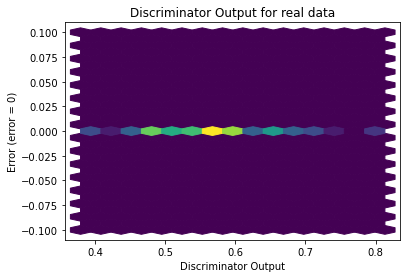

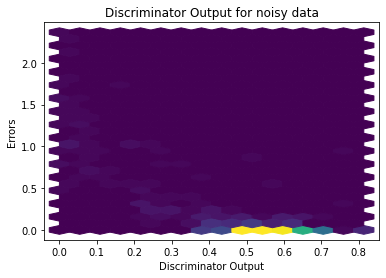

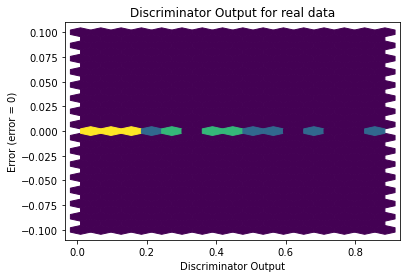

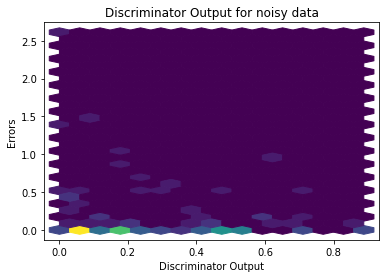

In [10]:
sanityChecks.discProbVsError(train_data,discriminator,device)
sanityChecks.discProbVsError(test_data,discriminator,device)